<a href="https://colab.research.google.com/github/sarah127/project/blob/master/Copy_of_optuna_EarlyStopping_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --quiet optuna

     |████████████████████████████████| 235kB 2.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 5.4MB/s 
     |████████████████████████████████| 163kB 7.1MB/s 
     |████████████████████████████████| 133kB 8.7MB/s 
     |████████████████████████████████| 112kB 12.8MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
     |████████████████████████████████| 81kB 6.4MB/s 


In [2]:
import optuna

In [ ]:
OPTUNE_EARLY_STOPING = 30

class EarlyStoppingExceeded(optuna.exceptions.OptunaError):
    early_stop = OPTUNE_EARLY_STOPING
    early_stop_count = 0
    best_score = None

def early_stopping_opt(study, trial):
    if EarlyStoppingExceeded.best_score == None:
      EarlyStoppingExceeded.best_score = study.best_value

    if study.best_value < EarlyStoppingExceeded.best_score:
        EarlyStoppingExceeded.best_score = study.best_value
        EarlyStoppingExceeded.early_stop_count = 0
    else:
      if EarlyStoppingExceeded.early_stop_count > EarlyStoppingExceeded.early_stop:
            EarlyStoppingExceeded.early_stop_count = 0
            best_score = None
            raise EarlyStoppingExceeded()
      else:
            EarlyStoppingExceeded.early_stop_count=EarlyStoppingExceeded.early_stop_count+1
    print(f'EarlyStop counter: {EarlyStoppingExceeded.early_stop_count}, Best score: {study.best_value} and {EarlyStoppingExceeded.best_score}')
    return

In [ ]:
import sklearn.svm
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from optuna.samplers import TPESampler
sampler = TPESampler(seed=10)
def objective(trial):
    iris = sklearn.datasets.load_iris()

    classifier = trial.suggest_categorical('classifier', ['RandomForest', 'SVC'])
    
    if classifier == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 2, 150)
        max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
        max_features = trial.suggest_uniform('max_features', 0.15, 1.0)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 14)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 14)
        max_samples = trial.suggest_uniform('max_samples', 0.6, 0.99)
        clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,max_features=max_features,
                                                     min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,max_samples=max_samples)
    else:
        c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True)
        
        clf = sklearn.svm.SVC(C=c, gamma='auto')

    return sklearn.model_selection.cross_val_score(
        clf, iris.data, iris.target, n_jobs=-1, cv=3).mean()

In [ ]:
study = optuna.create_study(direction='maximize')
try:
    study.optimize(objective,n_trials=50, timeout=60, callbacks=[early_stopping_opt])
except EarlyStoppingExceeded:
    print(f'EarlyStopping Exceeded: No new best scores on iters {OPTUNE_EARLY_STOPING}')
best_trial = study.best_trial
print('params: {}'.format(best_trial.params))
print('value: {}'.format(best_trial.value))

[I 2020-08-10 10:37:47,589] Trial 0 finished with value: 0.32 and parameters: {'classifier': 'SVC', 'svc_c': 5.516165055546694e-10}. Best is trial 0 with value: 0.32.


EarlyStop counter: 1, Best score: 0.32 and 0.32


[I 2020-08-10 10:37:48,143] Trial 1 finished with value: 0.96 and parameters: {'classifier': 'RandomForest', 'n_estimators': 133, 'max_depth': 11.539618910392067, 'max_features': 0.5133479582637129, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_samples': 0.6038019373775906}. Best is trial 1 with value: 0.96.


EarlyStop counter: 2, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:48,630] Trial 2 finished with value: 0.96 and parameters: {'classifier': 'RandomForest', 'n_estimators': 130, 'max_depth': 4.92385808298149, 'max_features': 0.5533195809271105, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_samples': 0.6794415374103487}. Best is trial 1 with value: 0.96.


EarlyStop counter: 3, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:48,749] Trial 3 finished with value: 0.96 and parameters: {'classifier': 'RandomForest', 'n_estimators': 27, 'max_depth': 12.835490902441789, 'max_features': 0.48986870864985, 'min_samples_split': 11, 'min_samples_leaf': 5, 'max_samples': 0.9014921998396017}. Best is trial 1 with value: 0.96.


EarlyStop counter: 4, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:48,777] Trial 4 finished with value: 0.8933333333333332 and parameters: {'classifier': 'SVC', 'svc_c': 0.04785816740673071}. Best is trial 1 with value: 0.96.


EarlyStop counter: 5, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:48,813] Trial 5 finished with value: 0.96 and parameters: {'classifier': 'RandomForest', 'n_estimators': 2, 'max_depth': 4.926475010170501, 'max_features': 0.804624200614455, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_samples': 0.9099419601549265}. Best is trial 1 with value: 0.96.


EarlyStop counter: 6, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:49,154] Trial 6 finished with value: 0.9533333333333333 and parameters: {'classifier': 'RandomForest', 'n_estimators': 90, 'max_depth': 1.3682236035869768, 'max_features': 0.7861911189582139, 'min_samples_split': 7, 'min_samples_leaf': 7, 'max_samples': 0.9431611727805153}. Best is trial 1 with value: 0.96.


EarlyStop counter: 7, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:49,604] Trial 7 finished with value: 0.96 and parameters: {'classifier': 'RandomForest', 'n_estimators': 119, 'max_depth': 1.542662957376161, 'max_features': 0.6875079753839501, 'min_samples_split': 12, 'min_samples_leaf': 3, 'max_samples': 0.843783207025208}. Best is trial 1 with value: 0.96.


EarlyStop counter: 8, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:49,636] Trial 8 finished with value: 0.32 and parameters: {'classifier': 'SVC', 'svc_c': 0.00015631913023159204}. Best is trial 1 with value: 0.96.


EarlyStop counter: 9, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:49,662] Trial 9 finished with value: 0.32 and parameters: {'classifier': 'SVC', 'svc_c': 3.141146509811198e-09}. Best is trial 1 with value: 0.96.


EarlyStop counter: 10, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:50,216] Trial 10 finished with value: 0.94 and parameters: {'classifier': 'RandomForest', 'n_estimators': 150, 'max_depth': 25.1408977757362, 'max_features': 0.19234247242661612, 'min_samples_split': 2, 'min_samples_leaf': 13, 'max_samples': 0.60807975058437}. Best is trial 1 with value: 0.96.


EarlyStop counter: 11, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:50,765] Trial 11 finished with value: 0.9533333333333333 and parameters: {'classifier': 'RandomForest', 'n_estimators': 150, 'max_depth': 5.5967227410044105, 'max_features': 0.41064036455046765, 'min_samples_split': 5, 'min_samples_leaf': 12, 'max_samples': 0.6290934846429277}. Best is trial 1 with value: 0.96.


EarlyStop counter: 12, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:51,204] Trial 12 finished with value: 0.94 and parameters: {'classifier': 'RandomForest', 'n_estimators': 114, 'max_depth': 11.316769354936312, 'max_features': 0.3443077643446759, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_samples': 0.7087227454553686}. Best is trial 1 with value: 0.96.


EarlyStop counter: 13, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:51,670] Trial 13 finished with value: 0.9533333333333333 and parameters: {'classifier': 'RandomForest', 'n_estimators': 125, 'max_depth': 2.7037778158219075, 'max_features': 0.600860504939773, 'min_samples_split': 7, 'min_samples_leaf': 10, 'max_samples': 0.7182784033047749}. Best is trial 1 with value: 0.96.


EarlyStop counter: 14, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:51,914] Trial 14 finished with value: 0.9533333333333333 and parameters: {'classifier': 'RandomForest', 'n_estimators': 60, 'max_depth': 12.226592904886633, 'max_features': 0.9705548519214475, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_samples': 0.6832734899878046}. Best is trial 1 with value: 0.96.


EarlyStop counter: 15, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:52,469] Trial 15 finished with value: 0.9533333333333333 and parameters: {'classifier': 'RandomForest', 'n_estimators': 147, 'max_depth': 24.27766566992081, 'max_features': 0.5663297832446205, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_samples': 0.6018658109539603}. Best is trial 1 with value: 0.96.


EarlyStop counter: 16, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:52,809] Trial 16 finished with value: 0.96 and parameters: {'classifier': 'RandomForest', 'n_estimators': 88, 'max_depth': 3.1750479479522777, 'max_features': 0.2330797108568961, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_samples': 0.7842040970729127}. Best is trial 1 with value: 0.96.


EarlyStop counter: 17, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:53,110] Trial 17 finished with value: 0.9466666666666667 and parameters: {'classifier': 'RandomForest', 'n_estimators': 78, 'max_depth': 2.6260874910221306, 'max_features': 0.15652036652777546, 'min_samples_split': 6, 'min_samples_leaf': 4, 'max_samples': 0.790437315096137}. Best is trial 1 with value: 0.96.


EarlyStop counter: 18, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:53,601] Trial 18 finished with value: 0.9533333333333333 and parameters: {'classifier': 'RandomForest', 'n_estimators': 132, 'max_depth': 8.150125167941377, 'max_features': 0.3600931959240047, 'min_samples_split': 9, 'min_samples_leaf': 9, 'max_samples': 0.6590730201236644}. Best is trial 1 with value: 0.96.


EarlyStop counter: 19, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:53,992] Trial 19 finished with value: 0.9466666666666667 and parameters: {'classifier': 'RandomForest', 'n_estimators': 102, 'max_depth': 18.59611881462346, 'max_features': 0.49784255993779264, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_samples': 0.7532351302193416}. Best is trial 1 with value: 0.96.


EarlyStop counter: 20, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:54,172] Trial 20 finished with value: 0.9533333333333333 and parameters: {'classifier': 'RandomForest', 'n_estimators': 43, 'max_depth': 2.90328661055235, 'max_features': 0.2994848176818321, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_samples': 0.8538329836147138}. Best is trial 1 with value: 0.96.


EarlyStop counter: 21, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:54,259] Trial 21 finished with value: 0.9333333333333332 and parameters: {'classifier': 'RandomForest', 'n_estimators': 11, 'max_depth': 8.957063821214602, 'max_features': 0.4709101214807772, 'min_samples_split': 13, 'min_samples_leaf': 5, 'max_samples': 0.8767701747785793}. Best is trial 1 with value: 0.96.


EarlyStop counter: 22, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:54,629] Trial 22 finished with value: 0.9533333333333333 and parameters: {'classifier': 'RandomForest', 'n_estimators': 99, 'max_depth': 4.285369897951755, 'max_features': 0.2458265909040871, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_samples': 0.8122238304137954}. Best is trial 1 with value: 0.96.


EarlyStop counter: 23, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:54,758] Trial 23 finished with value: 0.9533333333333333 and parameters: {'classifier': 'RandomForest', 'n_estimators': 26, 'max_depth': 15.466250445980377, 'max_features': 0.6321008795279752, 'min_samples_split': 11, 'min_samples_leaf': 5, 'max_samples': 0.9878970068789843}. Best is trial 1 with value: 0.96.


EarlyStop counter: 24, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:55,265] Trial 24 finished with value: 0.9533333333333333 and parameters: {'classifier': 'RandomForest', 'n_estimators': 136, 'max_depth': 7.968553453447159, 'max_features': 0.47814572939782846, 'min_samples_split': 10, 'min_samples_leaf': 8, 'max_samples': 0.6530885520751107}. Best is trial 1 with value: 0.96.


EarlyStop counter: 25, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:55,495] Trial 25 finished with value: 0.96 and parameters: {'classifier': 'RandomForest', 'n_estimators': 55, 'max_depth': 6.457892158892242, 'max_features': 0.7333602855679913, 'min_samples_split': 14, 'min_samples_leaf': 6, 'max_samples': 0.9528259170876817}. Best is trial 1 with value: 0.96.


EarlyStop counter: 26, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:55,521] Trial 26 finished with value: 0.96 and parameters: {'classifier': 'SVC', 'svc_c': 2848743781.142487}. Best is trial 1 with value: 0.96.


EarlyStop counter: 27, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:55,548] Trial 27 finished with value: 0.96 and parameters: {'classifier': 'SVC', 'svc_c': 4627460690.785098}. Best is trial 1 with value: 0.96.


EarlyStop counter: 28, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:55,575] Trial 28 finished with value: 0.96 and parameters: {'classifier': 'SVC', 'svc_c': 3504451914.0294876}. Best is trial 1 with value: 0.96.


EarlyStop counter: 29, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:55,603] Trial 29 finished with value: 0.96 and parameters: {'classifier': 'SVC', 'svc_c': 47114.44610407489}. Best is trial 1 with value: 0.96.


EarlyStop counter: 30, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:55,630] Trial 30 finished with value: 0.96 and parameters: {'classifier': 'SVC', 'svc_c': 13866.576353162687}. Best is trial 1 with value: 0.96.


EarlyStop counter: 31, Best score: 0.96 and 0.32


[I 2020-08-10 10:37:55,658] Trial 31 finished with value: 0.96 and parameters: {'classifier': 'SVC', 'svc_c': 17229.71852860219}. Best is trial 1 with value: 0.96.


EarlyStopping Exceeded: No new best scores on iters 30
params: {'classifier': 'RandomForest', 'n_estimators': 133, 'max_depth': 11.539618910392067, 'max_features': 0.5133479582637129, 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_samples': 0.6038019373775906}
value: 0.96


In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
BaggingClassifier()

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sarahali","key":"07ee236c6dd59b6ec1c3d399626f2081"}'}

In [ ]:
!mkdir -p ~/.kaggle
! cp kaggle.json  ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d himanshupoddar/zomato-bangalore-restaurants

 93% 83.0M/89.0M [00:02<00:00, 31.3MB/s]
100% 89.0M/89.0M [00:02<00:00, 42.0MB/s]


In [ ]:
!kaggle datasets download -d uciml/forest-cover-type-dataset

 45% 5.00M/11.2M [00:00<00:00, 51.1MB/s]
100% 11.2M/11.2M [00:00<00:00, 71.6MB/s]


In [ ]:
!unzip zomato-bangalore-restaurants.zip 

Archive:  zomato-bangalore-restaurants.zip
  inflating: zomato.csv              


In [ ]:
!kaggle competitions download -c santander-customer-satisfaction

403 - Forbidden


In [ ]:
import pandas as pd
data=pd.read_csv('zomato.csv' )

In [ ]:
import pandas as pd
data=pd.read_csv('covtype.csv' )

In [ ]:
len(data)

51717

In [ ]:
data[data.columns[5]].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]]

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression

#X,y = fetch_covtype(download_if_missing=True, shuffle=True,random_state=66,return_X_y=True)
#X = check_array(data['data'], dtype=np.float32, order='C')
#y = (data['target'] != 1).astype(np.int)
Xtrain, Xtest, ytrain, ytest = train_test_split(data.drop(data.columns[-1], axis=1),data[data.columns[-1]], random_state=0)
dtc = DecisionTreeClassifier(criterion="entropy")
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(Xtrain,ytrain)


#ytest_pred=bag_model.predict(Xtest)
#print(bag_model.score(Xtest, ytest))
#print(confusion_matrix(ytest, ytest_pred)) 


lr = LogisticRegression();
bnb = BernoulliNB()
gnb = GaussianNB()

base_methods=[lr, bnb, gnb, dtc]
for bm  in base_methods:
    print("Method: ", bm)
    bag_model=BaggingClassifier(base_estimator=bm,n_estimators=100,bootstrap=True)
    bag_model=bag_model.fit(Xtrain,ytrain)
    ytest_pred=bag_model.predict(Xtest)
    print(bag_model.score(Xtest, ytest))
    print(confusion_matrix(ytest, ytest_pred))

Method:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/lin

0.6193744707510344
[[33490 19313    99     0     0     0    41]
 [15718 54735   435     0     0     1     8]
 [  188  6929  1739     0     0    34     0]
 [    0   590   114     0     0     0     0]
 [  242  2076    22     0     0     0     0]
 [  251  3730   401     0     0     2     0]
 [ 4524   571     0     0     0     0     0]]
Method:  BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
0.6312365321198186
[[25340 25738    49     0    50   231  1535]
 [12135 53962  1969    13   265  2269   284]
 [    0   322  7822   121    46   579     0]
 [    0     0   373   297     0    34     0]
 [  234  1668   213     0   148    77     0]
 [   81   498  2582    63   166   994     0]
 [ 1304   635    30     0     0     0  3126]]
Method:  GaussianNB(priors=None, var_smoothing=1e-09)
0.457814984888436
[[41359  2035   290     0  2882   136  6241]
 [39993 11195  4993    52 13534   386   744]
 [   11     2  7294  1412   127    44     0]
 [    0     0   107   597     0     0     0

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import lightgbm as lgb
import optuna, os, uuid, pickle

def train_RandomForest(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    #preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_RandomForest(trial):
        # set UUID
        #trial_uuid = str(uuid.uuid4())
        #trial.set_user_attr("uuid", trial_uuid)
        n_estimators = trial.suggest_int('n_estimators', 2,250)
        #max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
        max_features = trial.suggest_uniform('max_features', 0.15, 1.0)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 14)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 14)
        max_samples = trial.suggest_uniform('max_samples', 0.6, 0.99)
        'max_features': hp.choice('c0_max_features', ['auto', 'sqrt', 'log2']),
            'min_samples_split': ho_scope.int(hp.quniform('c0_min_samples_split', 3, 15,3)),
            'min_samples_leaf': ho_scope.int(hp.quniform('c0_min_samples_leaf', 3, 15,3))  
            params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

        clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, 
                                max_features=max_features,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_samples=max_samples)
            
        #model4 = make_pipeline(preprocessor,clf)
        clf.fit(X_train,y_train)
        y_true, y_pred  =y_test, clf.predict(X_test)
        return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize')
    study.optimize(objective_RandomForest, n_trials=7)
    trial = study.best_trial
    #return trial.value,trial.params,type(RandomForestClassifier()).__name__
    print('Number of finished trials: {}'.format(len(study.trials)))

    print('Best trial:')
    trial = study.best_trial

    print('  Value: {}'.format(trial.value))

    print('  Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))

SyntaxError: ignored

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
train_RandomForest(data.drop(data.columns[-1], axis=1),data[data.columns[-1]])

[I 2020-08-10 19:46:21,463] Trial 0 finished with value: 0.9635723690438285 and parameters: {'n_estimators': 191, 'max_features': 0.5628720305723955, 'min_samples_split': 9, 'min_samples_leaf': 2, 'max_samples': 0.7470332005152048}. Best is trial 0 with value: 0.9635723690438285.
[I 2020-08-10 19:49:38,409] Trial 1 finished with value: 0.9400531827921826 and parameters: {'n_estimators': 92, 'max_features': 0.27090267342992136, 'min_samples_split': 12, 'min_samples_leaf': 10, 'max_samples': 0.8910246433551736}. Best is trial 0 with value: 0.9635723690438285.
[I 2020-08-10 19:51:02,309] Trial 2 finished with value: 0.9552507250243109 and parameters: {'n_estimators': 36, 'max_features': 0.2697877378091076, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_samples': 0.9604363775981369}. Best is trial 0 with value: 0.9635723690438285.
[I 2020-08-10 19:54:52,889] Trial 3 finished with value: 0.9368174659862482 and parameters: {'n_estimators': 115, 'max_features': 0.2627982948507155, 'min_s

Number of finished trials: 7
Best trial:
  Value: 0.9635723690438285
  Params: 
    n_estimators: 191
    max_features: 0.5628720305723955
    min_samples_split: 9
    min_samples_leaf: 2
    max_samples: 0.7470332005152048


In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import optuna, os, uuid, pickle
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from optuna.samplers import TPESampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

def train_BaggingClassifier(data,target,base_estimator='DecisionTreeClassifier'):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    #sampler = TPESampler(seed=10)
    def objective_BaggingClassifier(trial):           
       param = {
        'n_estimators':trial.suggest_int('n_estimators', 10, 50),
        'max_features': trial.suggest_uniform('max_features', 0.15, 1.0),
        'max_samples': trial.suggest_uniform('max_samples', 0.6, 0.99),   
             }

       if base_estimator == 'DecisionTreeClassifier' :
         param0={ 
           'max_depth' : trial.suggest_int('max_depth', 1, 9),
          'criterion': trial.suggest_categorical('criterion',["gini", "entropy"]),
           'splitter': trial.suggest_categorical('splitter',["best", "random"]),
           # 'max_features': trial.suggest_uniform('max_features', 0.15, 1.0),
           #'min_samples_split': trial.suggest_int('min_samples_split', 2, 14),
           #'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 14),
           #'min_weight_fraction_leaf': trial.suggest_uniform('max_samples', 0.6, 0.99),
           #     }
                }
         param['base_estimator']:DecisionTreeClassifier(**param0) 

       elif base_estimator =='LinearSVC':
          param1={ 
                 'C': trial.suggest_float('C', 1e-10, 1e10, log=True),
                 #'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly']),
                
                }
          param['base_estimator']:LinearSVC(**param1)
        
       clf =  BaggingClassifier(**param) 
       model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, model4.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))#,sampler=sampler)
    study.optimize(objective_BaggingClassifier,n_trials=3)
    trial = study.best_trial
    return  trial.value,trial.params,BaggingClassifier()

In [ ]:
train_BaggingClassifier(data.drop(data.columns[-1], axis=1),data[data.columns[-1]])

[I 2020-08-10 21:34:48,964] Trial 0 finished with value: 0.9323597497482853 and parameters: {'max_depth': 3, 'criterion': 'entropy', 'splitter': 'best', 'max_features': 0.49480196413392374, 'min_samples_split': 13, 'min_samples_leaf': 8, 'max_samples': 0.7668134598769365, 'n_estimators': 21}. Best is trial 0 with value: 0.9323597497482853.
[I 2020-08-10 21:37:04,134] Trial 1 finished with value: 0.9444592652513274 and parameters: {'max_depth': 1, 'criterion': 'entropy', 'splitter': 'random', 'max_features': 0.5606735927371305, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_samples': 0.9422613349354585, 'n_estimators': 29}. Best is trial 1 with value: 0.9444592652513274.
[I 2020-08-10 21:37:24,151] Trial 2 finished with value: 0.6811958383174272 and parameters: {'max_depth': 7, 'criterion': 'entropy', 'splitter': 'best', 'max_features': 0.1692605941941449, 'min_samples_split': 14, 'min_samples_leaf': 4, 'max_samples': 0.8524399107552008, 'n_estimators': 16}. Best is trial 1 with va

Number of finished trials: 8
Best trial:
  Value: 0.9651127767785685
  Params: 
    max_depth: 2
    criterion: gini
    splitter: random
    max_features: 0.7258158415926435
    min_samples_split: 3
    min_samples_leaf: 3
    max_samples: 0.8321672440024384
    n_estimators: 20


In [ ]:
train_BaggingClassifier(data.drop(data.columns[-1], axis=1),data[data.columns[-1]])

[I 2020-08-10 22:05:53,498] Trial 0 finished with value: 0.671996420058002 and parameters: {'n_estimators': 42, 'max_features': 0.1683976314530221, 'max_samples': 0.8407772345057275}. Best is trial 0 with value: 0.671996420058002.
[I 2020-08-10 22:06:39,710] Trial 1 finished with value: 0.9435384628624046 and parameters: {'n_estimators': 12, 'max_features': 0.6240620042149928, 'max_samples': 0.7212131266460223}. Best is trial 1 with value: 0.9435384628624046.
[I 2020-08-10 22:10:48,822] Trial 2 finished with value: 0.9660335791674913 and parameters: {'n_estimators': 46, 'max_features': 0.7860624818853772, 'max_samples': 0.7947787518568376}. Best is trial 2 with value: 0.9660335791674913.
[I 2020-08-10 22:12:17,526] Trial 3 finished with value: 0.9632539607411168 and parameters: {'n_estimators': 16, 'max_features': 0.781544245856859, 'max_samples': 0.9060866331696229}. Best is trial 2 with value: 0.9660335791674913.
[I 2020-08-10 22:15:10,686] Trial 4 finished with value: 0.959303976661

Number of finished trials: 8
Best trial:
  Value: 0.9668252971093689
  Params: 
    n_estimators: 30
    max_features: 0.8638039844261872
    max_samples: 0.9042391925764193


In [ ]:
train_BaggingClassifier(data.drop(data.columns[-1], axis=1),data[data.columns[-1]])

[I 2020-08-10 22:21:56,838] Trial 0 finished with value: 0.8135332134282247 and parameters: {'max_depth': 9, 'criterion': 'entropy', 'splitter': 'best', 'n_estimators': 10, 'max_features': 0.3417278708545118, 'max_samples': 0.7860964230343119}. Best is trial 0 with value: 0.8135332134282247.
[I 2020-08-10 22:23:53,231] Trial 1 finished with value: 0.9027822001153154 and parameters: {'max_depth': 2, 'criterion': 'entropy', 'splitter': 'best', 'n_estimators': 39, 'max_features': 0.3703988657973427, 'max_samples': 0.9583722123045959}. Best is trial 1 with value: 0.9027822001153154.
[I 2020-08-10 22:26:47,056] Trial 2 finished with value: 0.9491407278641687 and parameters: {'max_depth': 3, 'criterion': 'gini', 'splitter': 'best', 'n_estimators': 47, 'max_features': 0.4697438543774115, 'max_samples': 0.8517117004922112}. Best is trial 2 with value: 0.9491407278641687.
[I 2020-08-10 22:28:00,932] Trial 3 finished with value: 0.869400962109412 and parameters: {'max_depth': 6, 'criterion': 'en

Number of finished trials: 8
Best trial:
  Value: 0.9662745368019758
  Params: 
    max_depth: 2
    criterion: entropy
    splitter: random
    n_estimators: 29
    max_features: 0.9052945984628001
    max_samples: 0.9889200690423505


In [ ]:
sklearn.ensemble._forest.RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
base=type(LinearSVC()).__name__
train_BaggingClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]],base)

[I 2020-08-15 15:17:11,437] Trial 0 finished with value: 0.8994002518360009 and parameters: {'n_estimators': 25, 'max_features': 0.9889093977747802, 'max_samples': 0.9124830679705942, 'C': 7.035067506011329e-07}. Best is trial 0 with value: 0.8994002518360009.
[I 2020-08-15 15:18:20,262] Trial 1 finished with value: 0.7815213514713482 and parameters: {'n_estimators': 20, 'max_features': 0.1799975623434452, 'max_samples': 0.7335492309952615, 'C': 1083452926.5824566}. Best is trial 0 with value: 0.8994002518360009.
[I 2020-08-15 15:24:56,783] Trial 2 finished with value: 0.8863135139856323 and parameters: {'n_estimators': 50, 'max_features': 0.35748062749650267, 'max_samples': 0.7682676206889666, 'C': 5.144573180334027e-08}. Best is trial 0 with value: 0.8994002518360009.


Number of finished trials: 3
Best trial:
  Value: 0.8994002518360009
  Params: 
    n_estimators: 25
    max_features: 0.9889093977747802
    max_samples: 0.9124830679705942
    C: 7.035067506011329e-07


In [ ]:
LinearSVC()

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
inner={'C': 7.035067506011329e-07}
outer={'n_estimators': 25,
    'max_features':0.9889093977747802,
    'max_samples': 0.9124830679705942}
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,BaggingClassifier(base_estimator=LinearSVC(**inner),**outer))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Li

In [ ]:
  Params={ 
    'n_estimators': 45,
    'max_features': 0.700426494751465,
    'max_samples': 0.7747804031103832,
    'C': 1.413473852307566e-08,
    'kernel': 'rbf',
 }
truned=list(Params.keys())
bb=BaggingClassifier()
all=list(bb.get_params().keys())
outer={}
estamator=[value for value in all if value in truned] 
for k,v in Params.items():
  for i in range(len(estamator)):
    if estamator[i]==k:
      outer[k]=v
inner = {k:v for k,v in Params.items() if k not in outer}


{'C': 1.413473852307566e-08, 'kernel': 'rbf'}

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import optuna, os, uuid, pickle
from sklearn.tree import DecisionTreeClassifier
from optuna.samplers import TPESampler
from sklearn.svm import LinearSVC

def train_AdaBoostClassifier(data,target,base_estimator='DecisionTreeClassifier'):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    #sampler = TPESampler(seed=10)
    def objective_AdaBoostClassifier(trial):
       #param0={ 
        #    'max_depth' : trial.suggest_int('max_depth', 1, 9),
         #   'criterion': trial.suggest_categorical('criterion',["gini", "entropy"]),
          #   'splitter': trial.suggest_categorical('splitter',["best", "random"]),
           #          }
       param = {
        'n_estimators':trial.suggest_int('n_estimators', 10, 90),
        'learning_rate':trial.suggest_loguniform('learning_rate', 1e-5, 1e-2),
        'algorithm':trial.suggest_categorical('algorithm', ['SAMME']),
             }

       if base_estimator == 'DecisionTreeClassifier' :
         param0={
         'max_depth' : trial.suggest_int('max_depth', 1, 9),
          'criterion': trial.suggest_categorical('criterion',["gini", "entropy"]),
           'splitter': trial.suggest_categorical('splitter',["best", "random"]),
         }
         param['base_estimator']:DecisionTreeClassifier(**param0) 
       elif base_estimator == 'LinearSVC':
          param1={ 
                 'C': trial.suggest_float('C', 1e-10, 1e10, log=True),
                 #'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly']),
                
                }
          param['base_estimator']=LinearSVC(**param1)
               #param['max_depth'] = trial.suggest_int('max_depth', 1, 9)
             #param['min_samples_splits'] = trial.suggest_float('min_samples_splits', 0.1, 1)
             #param['min_samples_leafs'] = trial.suggest_float('min_samples_leafs', 0.1, 0.5)
      # if param["base_estimator"] == 'SVC':
            #param['c'] = trial.suggest_float('c', 1e-10, 1e10, log=True)
      #      param['kernels'] = trial.suggest_categorical('kernels', ['linear', 'rbf', 'poly'])
            
     

       clf =  AdaBoostClassifier(**param) 
       model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, model4.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))#,sampler=sampler)
    study.optimize(objective_AdaBoostClassifier,n_trials=5)
    trial = study.best_trial
    return trial.value,trial.params,type(AdaBoostClassifier()).__name__

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
def check_target_type(dataframe):
  if type(dataframe[dataframe.columns[-1]][0])==str:
    from sklearn.preprocessing import LabelEncoder
    labelencoder = LabelEncoder()
    dataframe[dataframe.columns[-1]] = labelencoder.fit_transform(dataframe[dataframe.columns[-1]])  
    return dataframe,type(dataframe[dataframe.columns[-1]][0])
  elif type((dataframe[dataframe.columns[-1]].unique())[0])is np.int64 or int or np.int32:
    dataframe[dataframe.columns[-1]]=dataframe[dataframe.columns[-1]].astype(int)
    return dataframe ,type(dataframe[dataframe.columns[-1]][0])
  else:
    return dataframe,type(dataframe[dataframe.columns[-1]][0])

def trim_frist_col(dataframe):
  if dataframe.columns[0].startswith('Unnamed'):
    dataframe=dataframe[dataframe.columns[1:]]
    return dataframe   
import pandas as pd
#data1=pd.read_csv("/content/drive/My Drive/Housing_list.csv")  
#Traffic_Violations_in_Maryland_County.csv  
#data1,_=check_target_type(data1)


In [7]:
data1=pd.read_csv("/content/drive/My Drive/AirlinesCodrnaAdult.csv")
data1,_=check_target_type(data1) 

In [ ]:
data0=pd.read_csv("/content/drive/My Drive/data1_2.csv")    
data0,_=check_target_type(data0)
data0=trim_frist_col(data0)

In [ ]:
data0[data0.columns[4]].unique()

array([3., 2., 1., 4.])

In [ ]:
data1=pd.read_csv("/content/drive/My Drive/training_data.csv")  

In [ ]:
data1.columns

Index(['Unnamed: 0', 'event_time', 'event_type', 'product_id', 'category_id',
       'category_code', 'brand', 'price', 'user_id', 'user_session',
       'is_purchased', 'event_weekday', 'category_code_level1',
       'category_code_level2', 'activity_count'],
      dtype='object')

In [ ]:
len(data1)

1408569

In [ ]:
data1[data1.columns[7]].nunique()

21145

In [ ]:
data0.head()

In [ ]:
data0['Date Of Stop'] = pd.to_datetime(data0['Date Of Stop'].str.strip(), format='%m/%d/%Y')

In [ ]:
data0['Date Of Stop'] = pd.to_datetime(data0['Date Of Stop']).astype(np.int64)

In [ ]:
data0['Time Of Stop'] = pd.to_datetime(data0['Time Of Stop'], format='%H:%M:%S')

In [ ]:
data0['Time Of Stop'] = pd.to_datetime(data0['Time Of Stop']).astype(np.int64)

In [ ]:
data0.isnull().mean()

Description                0.000007
Charge                     0.000000
Location                   0.000002
Geolocation                0.073781
Contributed To Accident    0.000000
Arrest Type                0.000000
SubAgency                  0.000008
Date Of Stop               0.000000
Race                       0.000000
Time Of Stop               0.000000
Year                       0.006247
Model                      0.000145
Make                       0.000044
DL State                   0.000719
Latitude                   0.073781
Longitude                  0.073781
Color                      0.012478
Gender                     0.000000
State                      0.000046
Driver City                0.000168
VehicleType                0.000000
Article                    0.050425
Driver State               0.000009
ViolationType_labels       0.000000
dtype: float64

In [ ]:
data1[data1.columns[-1]].nunique()/data1[data1.columns[-1]].count()

0.14106182076390322

In [ ]:
data1[data1.columns[-1]].nunique()

3961

In [ ]:
data1[data1.columns[-1]].median(),data1[data1.columns[-1]].min()

(1036.0, 0)

In [ ]:
data1[data1.columns[-1]].value_counts()


TypeError: ignored

In [ ]:
import numpy as np 
from sklearn.linear_model import LinearRegression 
from sklearn import linear_model 
# import statsmodels.api as sm 
import statistics 
import math 
from collections import OrderedDict 
  
  

x = list(data1[data1.columns[2]])
  
print("enter the number of bins") 
bi = int(input()) 
  
# X_dict will store the data in sorted order 
X_dict = OrderedDict() 
# x_old will store the original data 
x_old ={} 
# x_new will store the data after binning 
x_new ={} 
  
for i in range(len(x)): 
    X_dict[i]= x[i] 
    x_old[i]= x[i] 
  
x_dict = sorted(X_dict.items(), key = lambda x: x[1]) 
  
  
# list of lists(bins) 
binn =[] 
# a variable to find the mean of each bin 
avrg =[] 
  
i = 0
k = 0
num_of_data_in_each_bin = int(math.ceil(len(x)/bi)) 
# performing binning 
for g, h in X_dict.items(): 
    if(i<num_of_data_in_each_bin): 
        avrg.append(h) 
        i = i + 1
    elif(i == num_of_data_in_each_bin): 
        k = k + 1
        i = 0
        binn.append(statistics.median(avrg)) 
        avrg =[] 
        avrg.append(h) 
        i = i + 1
  
binn.append(statistics.median(avrg)) 
  
# store the new value of each data 
i = 0
j = 0
for g, h in X_dict.items(): 
    if(i<num_of_data_in_each_bin): 
        x_new[g]= round(binn[j], 3) 
        i = i + 1
    else: 
        i = 0
        j = j + 1
        x_new[g]= round(binn[j], 3) 
        i = i + 1
  
print("number of data in each bin") 
print(math.ceil(len(x)/bi)) 
for i in range(0, len(x)): 
    print('index {2} old value {0} new value {1}'.format(x_old[i], x_new[i], i)) 

In [ ]:
data1[data1.columns[-1]].value_counts()

-97.9404     1313
-84.8980      779
-77.4597      742
-101.8840     656
-90.2309      638
             ... 
-86.7171        1
-89.4911        1
-116.3590       1
-78.4679        1
-78.4978        1
Name: long, Length: 54035, dtype: int64

In [ ]:
!pip install optbinning

     |████████████████████████████████| 112kB 2.8MB/s 
     |████████████████████████████████| 32.7MB 98kB/s 
     |████████████████████████████████| 184kB 21.6MB/s 
  Created wheel for pympler: filename=Pympler-0.8-cp36-none-any.whl size=164714 sha256=9ca0761802747ca0d1bf73ef9768b832166b4a2d91168479d285fc264e4e38f2
  Stored in directory: /root/.cache/pip/wheels/6c/61/cc/4bdf1e8c8b1c04d8104322eb2508b6a21d4d3a4d1b44fdd510
Successfully built pympler


In [ ]:
data1=data1[['id', 'region',  'type', 'sqfeet', 'beds', 'baths',
       'cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'lat', 'long','price']]

In [ ]:
data1.columns

Index(['id', 'region', 'type', 'sqfeet', 'beds', 'baths', 'cats_allowed',
       'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
       'electric_vehicle_charge', 'comes_furnished', 'laundry_options',
       'parking_options', 'lat', 'long', 'price'],
      dtype='object')

In [ ]:
as2=data1[data1.columns[-1]].unique()
min(list(as2))

0

In [ ]:
data1[data1.columns[-1]].describe()

count    3.849770e+05
mean     8.825722e+03
std      4.462200e+06
min      0.000000e+00
25%      8.050000e+02
50%      1.036000e+03
75%      1.395000e+03
max      2.768307e+09
Name: price, dtype: float64

In [ ]:
len(data1[data1.columns[-1]].values),data1[data1.columns[-1]]

384977

In [ ]:
import numpy as np
yy=list(data1[data1.columns[-1]].unique()).sort()
np.sort(data1[data1.columns[-1]].unique())[::-1]

array([2768307249,   21701907,   18502000, ...,          2,          1,
                0])

In [ ]:
list(data1[data1.columns[-1]].value_counts().index)
sorted_directions = sorted(list(data1[data1.columns[-1]].value_counts().index))

def count(iterable):
    return sum(1 for _ in iterable)
count(p for p in sorted_directions if p <3000 and p>=1500),count(p for p in sorted_directions if p <1500 ),count(p for p in sorted_directions if p >=3000  ),len(sorted_directions)

(1437, 1335, 1189, 3961)

In [ ]:
bins = [0, 1500,3000,5000]
data1['bin'] = pd.cut(x=data1[data1.columns[-1]], bins=bins, labels=['[0-1500)', '[1500-3000)','[3000-5000)'])

In [ ]:
bins = [0, 1,1500, 3000 ]
labels = ['0-1500','1500-3000','3000-']
data1['binned3'] = pd.cut(data1[data1.columns[-1]], bins=bins, labels=labels)

In [ ]:
bins = [0, 1,1500, 3000 ]
labels = ['0-1500','1500-3000','3000-']
data1['binned'] = pd.cut(data1[data1.columns[-1]], bins=bins, labels=labels)
orted_directions2 = sorted(list(data1['binned'].value_counts().index))
def count(iterable):
    return sum(1 for _ in iterable)
count(p for p in sorted_directions2 if p <3000 and p>=1500),count(p for p in sorted_directions if p <1500 ),count(p for p in sorted_directions if p >=3000  ),len(sorted_directions)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
from sklearn.linear_model import HuberRegressor

from optbinning import BinningProcess
from optbinning import Scorecard
binning_process = BinningProcess(X)

estimator = HuberRegressor(max_iter=200)

scorecard = Scorecard(binning_process=binning_process, target=y,
                      estimator=estimator, scaling_method="min_max",
                      scaling_method_params={"min": 0, "max": 100},
                      reverse_scorecard=True)

scorecard.fit(data1)

TypeError: ignored

In [8]:
count_unique1=[]
for i in range(len(data1.columns)):
  if (data1[data1.columns[i]].nunique())<=7  :
     count_unique1.append([data1.columns[i],(data1[data1.columns[i]].nunique())])
                          
uu=[]
for i in range(len(count_unique1)):
  uu.append(count_unique1[i][0])
count_unique2=[]
for i in range(len(data1.columns)):
  if (data1[data1.columns[i]].nunique())<=50  and (data1[data1.columns[i]].nunique())>7:
     count_unique2.append([data1.columns[i],(data1[data1.columns[i]].nunique())])
                          
aa=[]
for i in range(len(count_unique2)):
  aa.append(count_unique2[i][0])
count_unique3=[]
for i in range(len(data1.columns)):
  if (data1[data1.columns[i]].nunique())>50:
     count_unique3.append([data1.columns[i],(data1[data1.columns[i]].nunique())])
                          
ff=[]
for i in range(len(count_unique3)):
  ff.append(count_unique3[i][0])
  

In [9]:
! pip install category_encoders

     |████████████████████████████████| 81kB 2.2MB/s 


In [ ]:
data0.columns

Index(['Description', 'Charge', 'Location', 'Geolocation',
       'Contributed To Accident', 'Arrest Type', 'SubAgency', 'Date Of Stop',
       'Race', 'Time Of Stop', 'Year', 'Model', 'Make', 'DL State', 'Latitude',
       'Longitude', 'Color', 'Gender', 'State', 'Driver City', 'VehicleType',
       'Article', 'Driver State', 'ViolationType_labels'],
      dtype='object')

In [ ]:
data1=data0[['Description', 'Charge', 'Location', 'Geolocation',
       'Contributed To Accident', 'Arrest Type', 'SubAgency', 'Date Of Stop',
       'Race', 'Time Of Stop', 'Year', 'Model', 'Make', 'Latitude',
       'Longitude', 'Color', 'Gender', 'State', 'Driver City', 'VehicleType',
       'Article', 'Driver State', 'ViolationType_labels']]

In [10]:
catorical_col=data1.select_dtypes(include='object')

In [11]:
s1=[x for x in catorical_col if x in uu]
s2=[x for x in catorical_col if x in aa]
s3=[x for x in catorical_col if x in ff]
sl=s2+s3

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPClassifier
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import optuna, os, uuid, pickle
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from optuna.samplers import TPESampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.compose import make_column_transformer
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import optuna, os, uuid, pickle
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from optuna.samplers import TPESampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

def train_MLPClassifier(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_MLPClassifier(trial):        
       n_layers = trial.suggest_int('n_layers', 1, 8)
       layers = []
       for i in range(n_layers):
            layers.append(trial.suggest_int(f'n_units_{i}', 1, 150))
      
       activation=trial.suggest_categorical('activation', ['identity', 'logistic', 'tanh', 'relu'])
       solver=trial.suggest_categorical('solver', ['lbfgs', 'sgd', 'adam'])
       alpha=trial.suggest_loguniform('alpha', 1e-5, 1e-2)
       learning_rate=trial.suggest_categorical('learning_rate',  ['constant','adaptive']) 
       max_iter=trial.suggest_categorical('max_iter',  ['200', '1000', '5000', '10000'])
       clf =  MLPClassifier(hidden_layer_sizes=tuple(layers),activation=activation,solver=solver,alpha=alpha,learning_rate=learning_rate) 
       model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, model4.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))#,sampler=sampler)
    study.optimize(objective_MLPClassifier,n_trials=4)
    trial = study.best_trial
    print('Number of finished trials: {}'.format(len(study.trials)))

    print('Best trial:')
    trial = study.best_trial

    print('  Value: {}'.format(trial.value))

    print('  Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))


In [ ]:
>>> from sklearn.datasets import load_iris
>>> data = load_iris()
>>> data.target[[10, 25, 50]]
array([0, 0, 1])
>>> list(data.target_names)
['setosa', 'versicolor', 'virginica']

In [ ]:
train_MLPClassifier(data4.drop(data4.columns[-1], axis=1),data4[data4.columns[-1]])

[I 2020-08-27 18:50:14,163] Trial 0 finished with value: 0.2317464640103484 and parameters: {'n_layers': 8, 'n_units_0': 86, 'n_units_1': 124, 'n_units_2': 76, 'n_units_3': 116, 'n_units_4': 51, 'n_units_5': 48, 'n_units_6': 37, 'n_units_7': 40, 'activation': 'relu', 'solver': 'adam', 'alpha': 0.00023333051276106567, 'learning_rate': 'constant', 'max_iter': '10000'}. Best is trial 0 with value: 0.2317464640103484.
/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_base.py:92: RuntimeWarning:

invalid value encountered in subtract

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning:

Training interrupted by user.



KeyboardInterrupt: ignored

In [ ]:
train_QuadraticDiscriminantAnalysis(data.drop(data.columns[-1], axis=1),data[data.columns[-1]])

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning:

Variables are collinear

[I 2020-08-11 13:24:10,365] Trial 0 finished with value: 0.08417166510331059 and parameters: {}. Best is trial 0 with value: 0.08417166510331059.
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning:

Variables are collinear

[I 2020-08-11 13:24:14,359] Trial 1 finished with value: 0.08417166510331059 and parameters: {}. Best is trial 0 with value: 0.08417166510331059.
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning:

Variables are collinear

[I 2020-08-11 13:24:18,437] Trial 2 finished with value: 0.08417166510331059 and parameters: {}. Best is trial 0 with value: 0.08417166510331059.
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning:

Variables are collinear

[I 2020-08-11 13:24:22,436] Trial 3 finished with value: 0.08417166510331059 and parameters: {}. B

Number of finished trials: 8
Best trial:
  Value: 0.08417166510331059
  Params: 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(data.columns[-1], axis=1),data[data.columns[-1]],test_size=0.2)
model4=LinearDiscriminantAnalysis()
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6798533600681566


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(data.columns[-1], axis=1),data[data.columns[-1]],test_size=0.2)
model4=QuadraticDiscriminantAnalysis()
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning:

Variables are collinear



0.08331110212300888


In [ ]:
param={n_layers: 1
n_units_0: 47
activation: tanh
solver: adam
alpha: 7.314083742386191e-05
learning_rate: adaptive}

In [ ]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]],test_size=0.2)
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,MLPClassifier(hidden_layer_sizes=(1, 47), max_iter=150, alpha=7.314083742386191e-05,solver='adam', learning_rate='adaptive', random_state=1))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.6945178359572316


In [ ]:
  n_layers: 2
    n_units_0: 147
    n_units_1: 122
    activation: relu
    solver: adam
    alpha: 0.00020451739790167773
    learning_rate: constant
    max_iter: 200

In [ ]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]],test_size=0.2)
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,
                     MLPClassifier(hidden_layer_sizes=(147, 122), activation='relu',solver='adam',
                                   alpha=0.00020451739790167773,learning_rate='constant',max_iter= 200))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8056495694768944


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPClassifier
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import optuna, os, uuid, pickle
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from optuna.samplers import TPESampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

def train_MLPClassifier(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    ##preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    #sampler = TPESampler(seed=10)
    def objective_MLPClassifier(trial):   
       #parameters = {'solver': ['lbfgs'], 'max_iter': [500,1000,1500],
       #      'alpha': 10.0 ** -np.arange(1, 7), 
       #     'hidden_layer_sizes':np.arange(5, 12),
       #    'random_state':[0,1,2,3,4,5,6,7,8,9]
       #   }           
      # param0={ 
       #    'max_depth' : trial.suggest_int('max_depth', 1, 9),
        #  'criterion': trial.suggest_categorical('criterion',["gini", "entropy"]),
         #  'splitter': trial.suggest_categorical('splitter',["best", "random"]),
           # 'max_features': trial.suggest_uniform('max_features', 0.15, 1.0),
           #'min_samples_split': trial.suggest_int('min_samples_split', 2, 14),
           #'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 14),
           #'min_weight_fraction_leaf': trial.suggest_uniform('max_samples', 0.6, 0.99),
           #     }
          #             }   
       
       n_layers = trial.suggest_int('n_layers', 1, 8)
       layers = []
       for i in range(n_layers):
            layers.append(trial.suggest_int(f'n_units_{i}', 1, 150))
       clf =  MLPClassifier(hidden_layer_sizes=tuple(layers)) 
       #model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       clf.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, clf.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))#,sampler=sampler)
    study.optimize(objective_MLPClassifier,n_trials=2)
    trial = study.best_trial
    print('Number of finished trials: {}'.format(len(study.trials)))

    print('Best trial:')
    trial = study.best_trial

    print('  Value: {}'.format(trial.value))

    print('  Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))

In [ ]:
train_MLPClassifier(data.drop(data.columns[-1], axis=1),data[data.columns[-1]])

[I 2020-08-11 15:19:09,156][I 2020-08-11 15:19:09,156] Trial 0 finished with value: 0.7315645895544866 and parameters: {'n_layers': 3, 'n_units_0': 71, 'n_units_1': 76, 'n_units_2': 92}. Best is trial 0 with value: 0.7315645895544866. Trial 0 finished with value: 0.7315645895544866 and parameters: {'n_layers': 3, 'n_units_0': 71, 'n_units_1': 76, 'n_units_2': 92}. Best is trial 0 with value: 0.7315645895544866.

[I 2020-08-11 15:44:12,134][I 2020-08-11 15:44:12,134] Trial 1 finished with value: 0.7595587033037012 and parameters: {'n_layers': 4, 'n_units_0': 90, 'n_units_1': 56, 'n_units_2': 16, 'n_units_3': 93}. Best is trial 1 with value: 0.7595587033037012. Trial 1 finished with value: 0.7595587033037012 and parameters: {'n_layers': 4, 'n_units_0': 90, 'n_units_1': 56, 'n_units_2': 16, 'n_units_3': 93}. Best is trial 1 with value: 0.7595587033037012.

[I 2020-08-11 15:57:00,838][I 2020-08-11 15:57:00,838] Trial 2 finished with value: 0.7554796347770711 and parameters: {'n_layers': 1,

Number of finished trials: 8Number of finished trials: 8

Best trial:Best trial:

  Value: 0.7731211758732562  Value: 0.7731211758732562

  Params:   Params: 

    n_layers: 3    n_layers: 3

    n_units_0: 37    n_units_0: 37

    n_units_1: 37    n_units_1: 37

    n_units_2: 95    n_units_2: 95



In [ ]:
train_MLPClassifier(data.drop(data.columns[-1], axis=1),data[data.columns[-1]])

[I 2020-08-11 20:08:00,842] Trial 0 finished with value: 0.8269063621421133 and parameters: {'n_layers': 4, 'n_units_0': 27, 'n_units_1': 44, 'n_units_2': 24, 'n_units_3': 100}. Best is trial 0 with value: 0.8269063621421133.
[I 2020-08-11 21:25:23,802] Trial 1 finished with value: 0.7491889193910657 and parameters: {'n_layers': 6, 'n_units_0': 17, 'n_units_1': 3, 'n_units_2': 50, 'n_units_3': 41, 'n_units_4': 80, 'n_units_5': 79}. Best is trial 0 with value: 0.8269063621421133.


Number of finished trials: 2
Best trial:
  Value: 0.8269063621421133
  Params: 
    n_layers: 4
    n_units_0: 27
    n_units_1: 44
    n_units_2: 24
    n_units_3: 100


In [ ]:
train_MLPClassifier(data.drop(data.columns[-1], axis=1),data[data.columns[-1]])

[I 2020-08-12 12:43:12,649] Trial 0 finished with value: 0.8004870786468508 and parameters: {'n_layers': 2, 'n_units_0': 88, 'n_units_1': 26}. Best is trial 0 with value: 0.8004870786468508.
[I 2020-08-12 16:28:38,284] Trial 1 finished with value: 0.9149247437673727 and parameters: {'n_layers': 8, 'n_units_0': 41, 'n_units_1': 150, 'n_units_2': 80, 'n_units_3': 137, 'n_units_4': 29, 'n_units_5': 73, 'n_units_6': 110, 'n_units_7': 87}. Best is trial 1 with value: 0.9149247437673727.


Number of finished trials: 2
Best trial:
  Value: 0.9149247437673727
  Params: 
    n_layers: 8
    n_units_0: 41
    n_units_1: 150
    n_units_2: 80
    n_units_3: 137
    n_units_4: 29
    n_units_5: 73
    n_units_6: 110
    n_units_7: 87


In [ ]:
Params={ 
    'n_layers': 8,
    'n_units_0': 41,
    'n_units_1': 150,
    'n_units_2': 80,
    'n_units_3': 137,
    'n_units_4': 29,
    'n_units_5': 73,
    'n_units_6': 110,
    'n_units_7': 87,
}
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(data.drop(data.columns[-1], axis=1),data[data.columns[-1]],test_size=0.2)
model4=MLPClassifier(hidden_layer_sizes=tuple(list(Params.values())), max_iter=150, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_base.py:92: RuntimeWarning:

invalid value encountered in subtract



Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan
Iteration 31, loss = nan
Iteration 32, loss = nan
Iteration 33, loss = nan
Iteration 34, loss = nan
Iteration 35, loss = nan
Iteration 36, loss = nan
Iteration 37, loss = nan
Iteration 38, loss = nan
Iteration 39, loss = nan
Iteration 40, loss = nan
Iteration

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (150) reached and the optimization hasn't converged yet.



0.36602325241172773


In [ ]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(data.drop(data.columns[-1], axis=1),data[data.columns[-1]],test_size=0.2)
model4=MLPClassifier(hidden_layer_sizes=tuple(list(Params.values())))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning:

Training interrupted by user.



0.8571121227507035


In [ ]:
'activation' : ['identity', 'logistic', 'tanh', 'relu'],
            'solver' : ['lbfgs', 'sgd', 'adam'],
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPClassifier
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import optuna, os, uuid, pickle

from sklearn.model_selection import train_test_split

def train_MLPClassifier(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    ##preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    #sampler = TPESampler(seed=10)
    def objective_MLPClassifier(trial):   
       #parameters = {'solver': ['lbfgs'], 'max_iter': [500,1000,1500],
       #      'alpha': 10.0 ** -np.arange(1, 7), 
       #     'hidden_layer_sizes':np.arange(5, 12),
       #    'random_state':[0,1,2,3,4,5,6,7,8,9]
       #   }           
       param0={ 
             'activation': trial.suggest_categorical('activation',['identity', 'logistic', 'tanh', 'relu']),
             'solver': trial.suggest_categorical('solver',['lbfgs', 'sgd', 'adam']),
              }   
     
       #n_layers = trial.suggest_int('n_layers', 1, 8)
       #layers = []
       #for i in range(n_layers):
        #    layers.append(trial.suggest_int(f'n_units_{i}', 1, 150))
       clf =  MLPClassifier(hidden_layer_sizes=tuple(list(Params.values())),**param0) 
       #model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       clf.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, clf.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))#,sampler=sampler)
    study.optimize(objective_MLPClassifier,n_trials=2)
    trial = study.best_trial
    print('Number of finished trials: {}'.format(len(study.trials)))

    print('Best trial:')
    trial = study.best_trial

    print('  Value: {}'.format(trial.value))

    print('  Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))            

In [ ]:
def trim_frist_col(dataframe):
  if dataframe.columns[0].startswith('Unnamed'):
    dataframe=dataframe[dataframe.columns[1:]]
    return dataframe

In [ ]:
data12=pd.read_csv("/content/drive/My Drive/Flights.csv") 
data12,_=check_target_type(data12)
data12=trim_frist_col(data12)

In [ ]:
count_unique1

In [ ]:
count_unique1=[]
for i in range(len(data12.columns)):
  if (data12[data12.columns[i]].nunique())<=7  :
     count_unique1.append([data12.columns[i],(data12[data12.columns[i]].nunique())])
                          
uu=[]
for i in range(len(count_unique1)):
  uu.append(count_unique1[i][0])

In [ ]:
count_unique2=[]
for i in range(len(data12.columns)):
  if (data12[data12.columns[i]].nunique())<=50  and (data12[data12.columns[i]].nunique())>7:
     count_unique2.append([data12.columns[i],(data12[data12.columns[i]].nunique())])
                          
aa=[]
for i in range(len(count_unique2)):
  aa.append(count_unique2[i][0])
aa

['AIRLINE']

In [ ]:
count_unique3=[]
for i in range(len(data12.columns)):
  if (data12[data12.columns[i]].nunique())>50:
     count_unique3.append([data12.columns[i],(data12[data12.columns[i]].nunique())])
                          
ff=[]
for i in range(len(count_unique3)):
  ff.append(count_unique3[i][0])

In [ ]:
! pip install category_encoders

In [ ]:
catorical_col=data12.select_dtypes(include='object')

In [ ]:
s1=[x for x in catorical_col if x in uu]
s2=[x for x in catorical_col if x in aa]
s3=[x for x in catorical_col if x in ff]
sl=s2+s3

In [ ]:
s3

['Description',
 'Charge',
 'Location',
 'Geolocation',
 'Model',
 'Make',
 'DL State',
 'State',
 'Driver City',
 'Driver State']

In [ ]:
len(data0)

1292399

In [ ]:
data1=data0[['Description', 'Charge', 'Location', 'Geolocation',
       'Contributed To Accident', 'Arrest Type', 'SubAgency', 'Date Of Stop',
       'Race', 'Time Of Stop', 'Year', 'Model', 'Make', 'Latitude',
       'Longitude', 'Color', 'Gender', 'State', 'Driver City', 'VehicleType',
       'Article', 'Driver State', 'ViolationType_labels']]

In [ ]:
data0.columns

Index(['Description', 'Charge', 'Location', 'Geolocation',
       'Contributed To Accident', 'Arrest Type', 'SubAgency', 'Date Of Stop',
       'Race', 'Time Of Stop', 'Year', 'Model', 'Make', 'DL State', 'Latitude',
       'Longitude', 'Color', 'Gender', 'State', 'Driver City', 'VehicleType',
       'Article', 'Driver State', 'ViolationType_labels'],
      dtype='object')

In [ ]:
data2.columns

Index(['Description', 'Charge', 'Location', 'Geolocation',
       'Contributed To Accident', 'Arrest Type', 'SubAgency', 'Date Of Stop',
       'Race', 'Time Of Stop', 'Year', 'Model', 'Make', 'Latitude',
       'Longitude', 'Color', 'Gender', 'State', 'Driver City', 'VehicleType',
       'Article', 'Driver State', 'ViolationType_labels'],
      dtype='object')

In [13]:
import category_encoders as ce
X = data1.iloc[:,:-1]  #independent columns
y=data1.iloc[:,-1]
ce_ord = ce.ordinal.OrdinalEncoder(cols = s1)
data2=ce_ord.fit_transform(X, y)
data2[data1.columns[-1]]=data1.iloc[:,-1]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
data1.columns

Index(['Description', 'Charge', 'Location', 'Geolocation',
       'Contributed To Accident', 'Arrest Type', 'SubAgency', 'Date Of Stop',
       'Race', 'Time Of Stop', 'Year', 'Model', 'Make', 'Latitude',
       'Longitude', 'Color', 'Gender', 'State', 'Driver City', 'VehicleType',
       'Article', 'Driver State', 'ViolationType_labels'],
      dtype='object')

In [14]:
import numpy as np
numeric=data2.select_dtypes(include=[np.number]).columns
catorical=data2.select_dtypes(include='object').columns

In [15]:
#numeric_columns = data112.select_dtypes(include=['number']).columns
data2[numeric]=data2[numeric].fillna(data2.median().iloc[0])
#cat_columns = data112.select_dtypes(exclude=['number']).columns
data2[catorical]=data2[catorical].fillna(data2.mode().iloc[0])

In [16]:
enc2=[ce.BinaryEncoder,ce.OrdinalEncoder,ce.PolynomialEncoder,ce.LeaveOneOutEncoder,ce.HashingEncoder,ce.BaseNEncoder,ce.MEstimateEncoder,ce.HelmertEncoder,
 ce.JamesSteinEncoder,ce.CatBoostEncoder,ce.OneHotEncoder,ce.BackwardDifferenceEncoder,ce.TargetEncoder,ce.GLMMEncoder,ce.SumEncoder,ce.WOEEncoder]

In [ ]:
# make a new df made of all the columns, except the target class
X = data12.iloc[:,:-1]  #independent columns
y=data12.iloc[:,-1]
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
X_res, y_res = sm.fit_resample(X, y)

SyntaxError: ignored

In [17]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
#from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
import category_encoders as ce
from sklearn.utils import resample
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

X = data2.drop(data2.columns[-1], axis=1)
y = data2.iloc[:,-1]
#sm = SMOTE(sampling_strategy='auto',  random_state=48)
#X_res, y_res = sm.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
train, test = train_test_split(data2, test_size=0.2)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



In [18]:
def check_target_value(y_train,enc2):
  binary_enc=[ce.WOEEncoder]
  if  y_train.nunique()>2:
    return (list(set(enc2) - set(binary_enc)))
  else:
    return  enc2

In [19]:
enc3=check_target_value(y_train,enc2)

In [20]:
import random
import math
list_train=[]
for i in range(len(enc3)):
  list_train.append(train.sample(frac=1/len(enc3),random_state=99)) 
list_test=[]
for i in range(len(enc3)):
  list_test.append(test.sample(frac=1/len(enc3),random_state=33))

In [21]:
list_X_train=[]
list_y_train=[]
for i in range(len(list_train)):
  list_X_train.append(list_train[i].drop(list_train[i].columns[-1], axis=1)) 
  list_y_train.append(list_train[i].iloc[:,-1]) 

list_X_test=[]
list_y_test=[]
for i in range(len(list_test)):
  list_X_test.append(list_test[i].drop(list_test[i].columns[-1], axis=1)) 
  list_y_test.append(list_test[i].iloc[:,-1]) 

In [ ]:
pd.to_datetime('13000101', format='%Y%m%d', errors='ignore')

In [ ]:
data1=data0[['Description', 'Charge', 'Location', 'Geolocation',
       'Contributed To Accident', 'Arrest Type', 'SubAgency', 'Date Of Stop',
       'Race', 'Time Of Stop', 'Year', 'Model', 'Make',  'Latitude',
       'Longitude', 'Color', 'Gender', 'State', 'Driver City', 'VehicleType',
       'Article', 'Driver State', 'ViolationType_labels']]

In [ ]:
data2['DL State'].nunique()

70

In [ ]:
data2['DL State'].unique()

array(['MD', 'VA', 'WV', 'DC', 'MN', 'XX', 'NY', 'CA', 'SC', 'PA', 'IA',
       'WA', 'AK', 'NJ', 'GA', 'LA', 'US', 'IN', 'NC', 'FL', 'MA', 'OH',
       'AZ', 'ME', 'IL', 'AR', 'VI', 'OK', 'CT', 'HI', 'KY', 'TX', 'DE',
       'UT', 'NV', 'MO', 'MI', 'AL', 'ON', 'OR', 'ND', 'TN', 'CO', 'RI',
       'NH', 'PR', 'ID', 'NM', 'KS', 'WI', 'MS', 'AB', 'VT', 'MB', 'NE',
       'MT', 'SD', 'SK', 'IT', 'QC', 'WY', 'PE', 'GU', 'MH', 'AS', 'NB',
       'BC', 'NS', 'PQ', 'NF'], dtype=object)

In [ ]:
data2.dtypes

Description                 object
Charge                      object
Location                    object
Geolocation                 object
Contributed To Accident      int64
Arrest Type                 object
SubAgency                    int64
Date Of Stop                 int64
Race                         int64
Time Of Stop                 int64
Year                       float64
Model                       object
Make                        object
DL State                    object
Latitude                   float64
Longitude                  float64
Color                       object
Gender                       int64
State                       object
Driver City                 object
VehicleType                 object
Article                      int64
Driver State                object
dtype: object

In [ ]:
enc3

In [ ]:
enc3=[ce.ordinal.OrdinalEncoder,
 ce.james_stein.JamesSteinEncoder,
 #ce.m_estimate.MEstimateEncoder,
 ce.target_encoder.TargetEncoder,
 ce.leave_one_out.LeaveOneOutEncoder,
 ce.basen.BaseNEncoder,
 ce.polynomial.PolynomialEncoder,
 ce.sum_coding.SumEncoder,
 ce.one_hot.OneHotEncoder,
 ce.helmert.HelmertEncoder,
 ce.hashing.HashingEncoder,
 ce.binary.BinaryEncoder,
 ce.backward_difference.BackwardDifferenceEncoder]

In [ ]:
len(enc3),len(training_numeric_dataset)

(12, 2)

In [ ]:
training_numeric_dataset

JamesSteinEncoder(cols=['Arrest Type', 'Color', 'VehicleType'],
                  drop_invariant=False, handle_missing='value',
                  handle_unknown='value', model='independent',
                  random_state=None, randomized=False, return_df=True,
                  sigma=0.05, verbose=0)

In [ ]:
training_numeric_dataset=[]
intermidate=[]
testing_numeric_dataset=[]
for i,encoder in enumerate(enc3):
     training_numeric_dataset.append(enc3[i](cols=s2))
     if enc3[i]==ce.glmm.GLMMEncoder:
       intermidate.append(training_numeric_dataset[i].fit_transform(X_train,y_train))
     else:
       intermidate.append(training_numeric_dataset[i].fit_transform(list_X_train[i],list_y_train[i]))

In [ ]:
xx=[]
for i in range(len(enc3)):
  if len(intermidate[i].columns)<=len(X_train.columns):
    xx.append(enc3[i])
xx

[category_encoders.ordinal.OrdinalEncoder,
 category_encoders.leave_one_out.LeaveOneOutEncoder,
 category_encoders.m_estimate.MEstimateEncoder,
 category_encoders.james_stein.JamesSteinEncoder,
 category_encoders.cat_boost.CatBoostEncoder,
 category_encoders.target_encoder.TargetEncoder,
 category_encoders.glmm.GLMMEncoder,
 category_encoders.woe.WOEEncoder]

In [ ]:
enc4=[i for i in enc3 if i  in xx]

NameError: ignored

In [22]:
def check_imblanced(y_train):
  if (y_train.value_counts(normalize=True).values.min()<1/len(y_train.value_counts(normalize=True).values)*100) or (y_train.value_counts(normalize=True).values.max()>(len(y_train.value_counts(normalize=True).values)-1)/len(y_train.value_counts(normalize=True).values)*100):
    return True
  else:
    return False  

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

my_dict2={}
for i in range (len(enc4)):
  model = Pipeline(steps=[('preprocessor',enc4[i]()),('classifier',RandomForestClassifier())]) 
  y_score2 = model.fit(X_train,y_train)
  y_true2,y_pred2 =y_test, model.predict(X_test)
  if y_train.nunique()>2:
      if check_imblanced(y_train):
          my_dict2[enc4[i]]= [accuracy_score(y_test, y_pred2),precision_score(y_test, y_pred2, average='weighted'),
                           recall_score(y_test, y_pred2, average='weighted'),f1_score(y_test, y_pred2, average='weighted')]
      else:
        my_dict2[enc4[i]]= [accuracy_score(y_test, y_pred2),precision_score(y_test, y_pred2, average='macro'),
                           recall_score(y_test, y_pred2, average='macro'),f1_score(y_test, y_pred2, average='macro')]
  else:
     my_dict2[enc4[i]]= [accuracy_score(y_test, y_pred2),precision_score(y_test, y_pred2,average='binary'),
                           recall_score(y_test, y_pred2, average='binary'),f1_score(y_test, y_pred2, average='binary')]

In [23]:
my_dict2={ce.cat_boost.CatBoostEncoder: [0.8038289731516823,
  0.8512979913437124,
  0.7850904969834339,
  0.8168548824103176],
 ce.glmm.GLMMEncoder: [0.7912684924637116,
  0.8147731848074083,
  0.8094230192326922,
  0.8120892901931277],
 ce.james_stein.JamesSteinEncoder: [0.79230862099388,
  0.8156067619239283,
  0.8105229825672478,
  0.8130569255203545],
ce.leave_one_out.LeaveOneOutEncoder: [0.5572302863139517,
  0.5572302863139517,
  1.0,
  0.7156684418628229],
ce.m_estimate.MEstimateEncoder: [0.7913892216681061,
  0.8146288722006169,
  0.8099313356221459,
  0.8122733122733122],
 ce.ordinal.OrdinalEncoder: [0.7909991734692929,
  0.8143295443114374,
  0.8094980167327755,
  0.8119065926718374],
 ce.target_encoder.TargetEncoder: [0.7914820902868711,
  0.8150612518879007,
  0.8094646845105163,
  0.8122533279818048],
  ce.woe.WOEEncoder: [0.7912499187399585,
  0.8145031514013679,
  0.8098063397886737,
  0.8121479550050978]}

In [ ]:
my_dict2={
  ce.cat_boost.CatBoostEncoder: [0.8687519343856391,
  0.8720343982324288,
  0.8687519343856391,
  0.8683548523646335],
 ce.glmm.GLMMEncoder: [0.858136025998143,
  0.8614981586438188,
  0.858136025998143,
  0.8576829493296273],
 ce.james_stein.JamesSteinEncoder: [0.8424133395233674,
  0.8432048648465494,
  0.8424133395233674,
  0.8424384983850385],
 ce.leave_one_out.LeaveOneOutEncoder: [0.24826292169606934,
  0.46318702202963286,
  0.24826292169606934,
  0.2599714522763842],
 ce.m_estimate.MEstimateEncoder: [0.8448390591148252,
  0.8454000012557493,
  0.8448390591148252,
  0.8448390591148252],
  ce.cat_boost.CatBoostEncoder: [0.8687519343856391,
  0.8720343982324288,
  0.8687519343856391,
  0.8683548523646335],
 ce.glmm.GLMMEncoder: [0.858136025998143,
  0.8614981586438188,
  0.858136025998143,
  0.8576829493296273],
 ce.james_stein.JamesSteinEncoder: [0.8424133395233674,
  0.8432048648465494,
  0.8424133395233674,
  0.8424384983850385],
 ce.leave_one_out.LeaveOneOutEncoder: [0.24826292169606934,
  0.46318702202963286,
  0.24826292169606934,
  0.2599714522763842],
 ce.m_estimate.MEstimateEncoder: [0.8448390591148252,
  0.8454000012557493,
  0.8448390591148252,
  0.8448146897963843],
 ce.ordinal.OrdinalEncoder: [0.8218314763231198,
  0.821915798348425,
  0.8218314763231198,
  0.8217863043253184],
 ce.target_encoder.TargetEncoder: [0.8692510058805324,
  0.8708448295603672,
  0.8692510058805324,
  0.8690400091728583],
   }

In [ ]:
my_dict2={ce.cat_boost.CatBoostEncoder: [0.8685546270504487,
  0.8713801867998767,
  0.8685546270504487,
  0.8682186180989554],
 ce.glmm.GLMMEncoder: [0.8574473847106159,
  0.8607470799368261,
  0.8574473847106159,
  0.8570144000246195],
 ce.james_stein.JamesSteinEncoder: [0.8400147013308573,
  0.8415547145858033,
  0.8400147013308573,
  0.8401899156616589],
 ce.leave_one_out.LeaveOneOutEncoder: [0.43050139275766014,
  0.5335562604764515,
  0.43050139275766014,
  0.33165605038355717],
 ce.m_estimate.MEstimateEncoder: [0.8440111420612814,
  0.8446798455335158,
  0.8440111420612814,
  0.8439700780353929],
 ce.ordinal.OrdinalEncoder: [0.8167633859486227,
  0.8168695697676155,
  0.8167633859486227,
  0.8167202607803214],
 ce.target_encoder.TargetEncoder: [0.8681445372949551,
  0.8697620536835643,
  0.8681445372949551,
  0.8679381404696083]}

In [ ]:
my_dict2

{category_encoders.cat_boost.CatBoostEncoder: [0.8687519343856391,
  0.8720343982324288,
  0.8687519343856391,
  0.8683548523646335],
 category_encoders.glmm.GLMMEncoder: [0.858136025998143,
  0.8614981586438188,
  0.858136025998143,
  0.8576829493296273],
 category_encoders.james_stein.JamesSteinEncoder: [0.8424133395233674,
  0.8432048648465494,
  0.8424133395233674,
  0.8424384983850385],
 category_encoders.leave_one_out.LeaveOneOutEncoder: [0.24826292169606934,
  0.46318702202963286,
  0.24826292169606934,
  0.2599714522763842],
 category_encoders.m_estimate.MEstimateEncoder: [0.8448390591148252,
  0.8454000012557493,
  0.8448390591148252,
  0.8448146897963843],
 category_encoders.ordinal.OrdinalEncoder: [0.8218314763231198,
  0.821915798348425,
  0.8218314763231198,
  0.8217863043253184],
 category_encoders.target_encoder.TargetEncoder: [0.8692510058805324,
  0.8708448295603672,
  0.8692510058805324,
  0.8690400091728583]}

In [ ]:
data4.info()

In [ ]:
my_dict2

{category_encoders.cat_boost.CatBoostEncoder: [0.8690266171463943,
  0.8719089478646234,
  0.8690266171463943,
  0.8686833218219657],
 category_encoders.glmm.GLMMEncoder: [0.8584029712163417,
  0.8614526708419573,
  0.8584029712163417,
  0.857999316055127],
 category_encoders.james_stein.JamesSteinEncoder: [0.8438060971835345,
  0.8447626446316895,
  0.8438060971835345,
  0.8438697660726372],
 category_encoders.leave_one_out.LeaveOneOutEncoder: [0.3421734757041164,
  0.4467893286034943,
  0.3421734757041164,
  0.3486347973106119],
 category_encoders.m_estimate.MEstimateEncoder: [0.8454155060352831,
  0.8460480624024997,
  0.8454155060352831,
  0.845381764515445],
 category_encoders.ordinal.OrdinalEncoder: [0.8148986381925101,
  0.8152686867490481,
  0.8148986381925101,
  0.8147910861488619],
 category_encoders.target_encoder.TargetEncoder: [0.8699976787372331,
  0.8716007252565612,
  0.8699976787372331,
  0.8697949659260912]}

In [ ]:
my_dict2

{category_encoders.cat_boost.CatBoostEncoder: [0.9984647592463364,
  0.9985056613155265,
  0.9984647592463364,
  0.9982793814113998],
 category_encoders.glmm.GLMMEncoder: [0.9977873470290879,
  0.9977994610641544,
  0.9977873470290879,
  0.9975768680383681],
 category_encoders.james_stein.JamesSteinEncoder: [0.9984477388388678,
  0.9984569075794544,
  0.9984477388388678,
  0.9983436480516035],
 category_encoders.leave_one_out.LeaveOneOutEncoder: [0.8095552567528467,
  0.8890403517871909,
  0.8095552567528467,
  0.7818783594174189],
 category_encoders.m_estimate.MEstimateEncoder: [0.9983524245570439,
  0.9983675712179277,
  0.9983524245570439,
  0.9982129709454223],
 category_encoders.ordinal.OrdinalEncoder: [0.997538849080047,
  0.9975806095933192,
  0.997538849080047,
  0.9971557763787873],
 category_encoders.target_encoder.TargetEncoder: [0.9984613551648427,
  0.9984794161302887,
  0.9984613551648427,
  0.9983246379048505]}

In [24]:
Accepted2=[]
for i in range(len(list(my_dict2.keys()))):
  if list(my_dict2.values())[i][0]>=.79:
    Accepted2.append(list(my_dict2.keys())[i])
Accepted2

[category_encoders.cat_boost.CatBoostEncoder,
 category_encoders.glmm.GLMMEncoder,
 category_encoders.james_stein.JamesSteinEncoder,
 category_encoders.m_estimate.MEstimateEncoder,
 category_encoders.ordinal.OrdinalEncoder,
 category_encoders.target_encoder.TargetEncoder,
 category_encoders.woe.WOEEncoder]

In [ ]:
my_dict2={ce.cat_boost.CatBoostEncoder: [0.8778668180594071,
  0.8755070919283814,
  0.8778668180594071,
  0.8739464609864149],
 ce.glmm.GLMMEncoder: [0.8849815490097604,
  0.8830450472177233,
  0.8849815490097604,
  0.8822274210832611],
 ce.james_stein.JamesSteinEncoder: [0.8858695256603416,
  0.8840364616122708,
  0.8858695256603416,
  0.8830732743597167],
 ce.leave_one_out.LeaveOneOutEncoder: [0.7051226062842544,
  0.6836999990806198,
  0.7051226062842544,
  0.6199605441875711],
 ce.m_estimate.MEstimateEncoder: [0.8857931014404146,
  0.8838888614602907,
  0.8857931014404146,
  0.8830465636378292],
 ce.ordinal.OrdinalEncoder: [0.8847522763499792,
  0.8829112779357566,
  0.8847522763499792,
  0.8819668546077483],
 ce.target_encoder.TargetEncoder: [0.885181707680998,
  0.8832391942626158,
  0.885181707680998,
  0.882412528319751]}

In [ ]:
my_dict2={ce.cat_boost.CatBoostEncoder: [0.9984647592463364,
  0.9985056613155265,
  0.9984647592463364,
  0.9982793814113998],
 ce.glmm.GLMMEncoder: [0.9977873470290879,
  0.9977994610641544,
  0.9977873470290879,
  0.9975768680383681],
 ce.james_stein.JamesSteinEncoder: [0.9984477388388678,
  0.9984569075794544,
  0.9984477388388678,
  0.9983436480516035],
 ce.leave_one_out.LeaveOneOutEncoder: [0.8095552567528467,
  0.8890403517871909,
  0.8095552567528467,
  0.7818783594174189],
 ce.m_estimate.MEstimateEncoder: [0.9983524245570439,
  0.9983675712179277,
  0.9983524245570439,
  0.9982129709454223],
  ce.ordinal.OrdinalEncoder: [0.997538849080047,
  0.9975806095933192,
  0.997538849080047,
  0.9971557763787873],
 ce.target_encoder.TargetEncoder: [0.9984613551648427,
  0.9984794161302887,
  0.9984613551648427,
  0.9983246379048505]}

In [ ]:
Accepted2=[ce.target_encoder.TargetEncoder,
 ce.ordinal.OrdinalEncoder,
 ce.glmm.GLMMEncoder,
 ce.cat_boost.CatBoostEncoder,
 ce.james_stein.JamesSteinEncoder,
 ce.m_estimate.MEstimateEncoder]

In [25]:
! pip  install catboost 

     |████████████████████████████████| 66.1MB 73kB/s 


In [26]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score
import lightgbm as lgb
import numpy as np
import warnings
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA 
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_transformer
from mlxtend.classifier import StackingCVClassifier


In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import optuna, os, uuid, pickle
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from optuna.samplers import TPESampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

def train_LogisticRegression(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    #sampler = TPESampler(seed=10)
    def objective_LogisticRegression(trial):           
       param={
               'random_state': 55,
                'C': trial.suggest_loguniform("C", 2 ** -10, 2 ** 15),
              }
      
       clf=LogisticRegression(**param)
       model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, model4.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))#,sampler=sampler)
    study.optimize(objective_LogisticRegression,n_trials=8)
    trial = study.best_trial
    print('Number of finished trials: {}'.format(len(study.trials)))

    print('Best trial:')
    trial = study.best_trial

    print('  Value: {}'.format(trial.value))

    print('  Params: ')
    for key, value in trial.params.items():
        print('    {}: {}'.format(key, value))

In [ ]:
sl=s2+s3

In [ ]:
train_LogisticRegression(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

[I 2020-08-23 21:42:57,757] Trial 0 finished with value: 0.7280935432451907 and parameters: {'C': 3716.860244421249}. Best is trial 0 with value: 0.7280935432451907.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation

Number of finished trials: 8
Best trial:
  Value: 0.7327918131464215
  Params: 
    C: 0.0009967414279159475


In [ ]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]],test_size=0.2)
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,LogisticRegression(C=0.0009967414279159475))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.7242614145031334


In [ ]:
from sklearn.neural_network import MLPClassifier
X_train, X_test, y_train, y_test = train_test_split(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]],test_size=0.2)
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,LogisticRegression())
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.7299058890320327


In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import xgboost as xgb
import optuna, os, uuid, pickle
from catboost import CatBoostClassifier, Pool, cv

def train_CatBoostClassifier(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[0]()), sl),remainder='passthrough') 
    def objective_CatBoostClassifier(trial):
      param={
            'use_best_model':False,
            'learning_rate':trial.suggest_loguniform('learning_rate',1e-3, 5e-1),
            'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 0, 10),
            'max_depth': int(trial.suggest_float('max_depth', 1, 16, log=True)),
            'border_count':trial.suggest_int('border_count', 30, 220),
            'logging_level': 'Silent',
             'eval_metric':'Accuracy',
             'iterations':trial.suggest_int('iterations', 50, 1000),
             'boosting_type':  "Plain",
             "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bernoulli", "MVS"]),
             "subsample" : trial.suggest_float("subsample", 0.1, 1),
             }

      #if param["bootstrap_type"] == "Bernoulli":
      #    param["subsample"] = trial.suggest_float("subsample", 0.1, 1)
      #elif param["bootstrap_type"] == "MVS":
       #  param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

      clf =  CatBoostClassifier(**param) 
      model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
      model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
      y_true, y_pred  =y_test, model4.predict(X_test)
      return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))
    study.optimize(objective_CatBoostClassifier,n_trials=7)
    trial = study.best_trial
    results={'model':type(CatBoostClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
from optuna import Trial
def objective(trial: Trial, fast_check=True, target_meter=0, return_info=False):
    folds = 5
    seed = 666
    shuffle = False
    kf = KFold(n_splits=folds, shuffle=shuffle, random_state=seed)

    X_train, y_train = create_X_y(train_df, target_meter=target_meter)
    y_valid_pred_total = np.zeros(X_train.shape[0])
    gc.collect()
    print('target_meter', target_meter, X_train.shape)

    cat_features = [X_train.columns.get_loc(cat_col) for cat_col in category_cols]
    print('cat_features', cat_features)
    models = []
    valid_score = 0
    for train_idx, valid_idx in kf.split(X_train, y_train):
        train_data = X_train.iloc[train_idx,:], y_train[train_idx]
        valid_data = X_train.iloc[valid_idx,:], y_train[valid_idx]

        print('train', len(train_idx), 'valid', len(valid_idx))
    #     model, y_pred_valid, log = fit_cb(train_data, valid_data, cat_features=cat_features, devices=[0,])
        model, y_pred_valid, log = fit_lgbm(trial, train_data, valid_data, cat_features=category_cols,
                                            num_rounds=1000)
        y_valid_pred_total[valid_idx] = y_pred_valid
        models.append(model)
        gc.collect()
        valid_score += log["valid/l2"]
        if fast_check:
            break
    valid_score /= len(models)
    if return_info:
        return valid_score, models, y_pred_valid, y_train
    else:
        return valid_score

In [ ]:
import lightgbm as lgb
import numpy as np
import sklearn.datasets
import sklearn.metrics
from sklearn.model_selection import train_test_split

import optuna


# FYI: Objective functions can take additional arguments
# (https://optuna.readthedocs.io/en/stable/faq.html#objective-func-additional-args).
def objective(trial):
    data, target = data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]]
    train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.25)
    dtrain = lgb.Dataset(train_x, label=train_y)

    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
    }

    gbm = lgb.train(param, dtrain,feature_name=sl, categorical_feature=sl)
    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.accuracy_score(valid_y, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=4)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning:

categorical_feature in Dataset is overridden.
New categorical_feature is ['City', 'County', 'State', 'Weather_Condition', 'Wind_Direction']

[W 2020-08-24 19:54:10,815] Trial 0 failed because of the following error: ValueError('DataFrame.dtypes for data must be int, float or bool.\nDid not expect the data types in fields City, County, State, Wind_Direction, Weather_Condition',)
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/optuna/study.py", line 709, in _run_trial
    result = func(trial)
  File "<ipython-input-35-c18fe0adb01f>", line 31, in objective
    gbm = lgb.train(param, dtrain,feature_name=sl, categorical_feature=sl)
  File "/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py", line 197, in train
    booster = Booster(params=params, train_set=train_set)
  File "/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py", line 1552, in __init__
    train_set.const

ValueError: ignored

In [ ]:
res=train_CatBoostClassifier(data4.drop(data4.columns[-1], axis=1),data4[data4.columns[-1]])#catboostencoder

[I 2020-08-27 17:21:06,453][I 2020-08-27 17:21:06,453][I 2020-08-27 17:21:06,453] Trial 0 finished with value: 1.0 and parameters: {'learning_rate': 0.49132664945962523, 'l2_leaf_reg': 7, 'max_depth': 1.5899364039790764, 'border_count': 88, 'iterations': 651, 'bootstrap_type': 'Bernoulli', 'subsample': 0.4854522090511898}. Best is trial 0 with value: 1.0. Trial 0 finished with value: 1.0 and parameters: {'learning_rate': 0.49132664945962523, 'l2_leaf_reg': 7, 'max_depth': 1.5899364039790764, 'border_count': 88, 'iterations': 651, 'bootstrap_type': 'Bernoulli', 'subsample': 0.4854522090511898}. Best is trial 0 with value: 1.0. Trial 0 finished with value: 1.0 and parameters: {'learning_rate': 0.49132664945962523, 'l2_leaf_reg': 7, 'max_depth': 1.5899364039790764, 'border_count': 88, 'iterations': 651, 'bootstrap_type': 'Bernoulli', 'subsample': 0.4854522090511898}. Best is trial 0 with value: 1.0.




KeyboardInterrupt: ignored

KeyboardInterrupt: ignored

KeyboardInterrupt: ignored

In [ ]:
res=train_CatBoostClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])#any encoder

[I 2020-08-24 11:38:06,234] Trial 0 finished with value: 0.8172842471486488 and parameters: {'learning_rate': 0.30935826258689025, 'l2_leaf_reg': 4, 'max_depth': 2.846267233349276, 'border_count': 102, 'iterations': 978, 'bootstrap_type': 'Bernoulli', 'subsample': 0.1795828485395578}. Best is trial 0 with value: 0.8172842471486488.
[I 2020-08-24 11:42:09,933] Trial 1 finished with value: 0.7893857676267004 and parameters: {'learning_rate': 0.1746280888402846, 'l2_leaf_reg': 8, 'max_depth': 1.5532641298598708, 'border_count': 157, 'iterations': 401, 'bootstrap_type': 'Bernoulli', 'subsample': 0.41626295278842285}. Best is trial 0 with value: 0.8172842471486488.
[I 2020-08-24 11:49:19,854] Trial 2 finished with value: 0.7564760428266771 and parameters: {'learning_rate': 0.003894951512262152, 'l2_leaf_reg': 5, 'max_depth': 1.857423108927839, 'border_count': 53, 'iterations': 817, 'bootstrap_type': 'MVS', 'subsample': 0.31238281937433177}. Best is trial 0 with value: 0.8172842471486488.
[I

In [ ]:
def fit_lgbm_with_pruning(trial, train, val, devices=(-1,), seed=None, cat_features=None, num_rounds=1500):
    """Train Light GBM model"""
    X_train, y_train = train
    X_valid, y_valid = val
    metric = 'l2'
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'objective': 'regression',
#               'max_depth': -1,
        'learning_rate': 0.1,
        "boosting": "gbdt",
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        "bagging_freq": 5,
        "bagging_fraction": trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
        "feature_fraction": trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        "metric": metric,
        "verbosity": -1,
    }
    device = devices[0]
    if device == -1:
        # use cpu
        pass
    else:
        # use gpu
        print(f'using gpu device_id {device}...')
        params.update({'device': 'gpu', 'gpu_device_id': device})

    params['seed'] = seed

    early_stop = 20
    verbose_eval = 20

    d_train = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_features)
    d_valid = lgb.Dataset(X_valid, label=y_valid, categorical_feature=cat_features)
    watchlist = [d_train, d_valid]
  # Add a callback for pruning.
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, 'l2', valid_name='valid_1')    
    print('training LGB:')
    model = lgb.train(params,
                      train_set=d_train,
                      num_boost_round=num_rounds,
                      valid_sets=watchlist,
                      verbose_eval=verbose_eval,
                      early_stopping_rounds=early_stop,
                      callbacks=[pruning_callback])

    # predictions
    y_pred_valid = model.predict(X_valid, num_iteration=model.best_iteration)
    
    print('best_score', model.best_score)
    log = {'train/l2': model.best_score['training']['l2'],
           'valid/l2': model.best_score['valid_1']['l2']}
    return model, y_pred_valid, log

In [ ]:
fit_lgbm_with_pruning(trial, train, val, devices=(-1,), seed=None, cat_features=None, num_rounds=1500)

In [ ]:
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import optuna, os, uuid, pickle
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

def train_BaggingClassifier(data,target,base_estimator=DecisionTreeClassifier()):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    #sampler = TPESampler(seed=10)
    def objective_BaggingClassifier(trial):           
       param = {
        'n_estimators':trial.suggest_int('n_estimators', 10, 50),
        'max_features': trial.suggest_uniform('max_features', 0.15, 1.0),
        'max_samples': trial.suggest_uniform('max_samples', 0.6, 0.99),   
             }

       if base_estimator == DecisionTreeClassifier() :
         param0={ 
           'max_depth' : trial.suggest_int('max_depth', 1, 9),
          'criterion': trial.suggest_categorical('criterion',["gini", "entropy"]),
           'splitter': trial.suggest_categorical('splitter',["best", "random"]),
           # 'max_features': trial.suggest_uniform('max_features', 0.15, 1.0),
           #'min_samples_split': trial.suggest_int('min_samples_split', 2, 14),
           #'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 14),
           #'min_weight_fraction_leaf': trial.suggest_uniform('max_samples', 0.6, 0.99),
           #     }
                }
         param['base_estimator']:DecisionTreeClassifier(**param0) 

       elif base_estimator ==LinearSVC():
          param1={ 
                 'C': trial.suggest_float('C', 1e-10, 1e10, log=True),
                 'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly']),
                
                }
          param['base_estimator']:LinearSVC(**param1)
        
       clf =  BaggingClassifier(**param) 
       model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, model4.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))#,sampler=sampler)
    study.optimize(objective_BaggingClassifier,n_trials=1)
    trial = study.best_trial
    results={'model':type(BaggingClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':type(base_estimator)}
    return results

In [ ]:
from sklearn.ensemble import BaggingClassifier
BaggingClassifier()

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [ ]:
sl

['State', 'Wind_Direction', 'City', 'County', 'Weather_Condition']

In [ ]:
Accepted2

[category_encoders.cat_boost.CatBoostEncoder,
 category_encoders.glmm.GLMMEncoder,
 category_encoders.james_stein.JamesSteinEncoder,
 category_encoders.m_estimate.MEstimateEncoder,
 category_encoders.ordinal.OrdinalEncoder,
 category_encoders.target_encoder.TargetEncoder]

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import lightgbm as lgb
import optuna, os, uuid, pickle

def train_LGBMClassifier(data,target,encoder,cat_feature):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( encoder()), cat_feature),remainder='passthrough') 
    def objective_LGBMClassifier(trial):
      params={
            'boosting_type':"gbdt",
            'colsample_bytree':trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1),
            'learning_rate':trial.suggest_loguniform('learning_rate', 0.02, 0.23),
            'max_depth': int(trial.suggest_float('max_depth', 1, 90, log=True)),
            'min_child_weight':trial.suggest_int('min_child_weight', 1, 20),
            'n_estimators':trial.suggest_int('n_estimators', 2, 250),  
            'num_leaves':trial.suggest_int('num_leaves', 2, 250),
            #num_iterations=trial.suggest_int('num_iterations', 100, 500)
           # 'early_stopping_round':trial.suggest_int('early_stopping_round', 1, 100),
            'scale_pos_weight': trial.suggest_int('scale_pos_weight', 1, 100),
            'subsample':trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1),
            'reg_alpha':trial.suggest_uniform('reg_alpha', 0.1, 0.7),
            'reg_lambda':trial.suggest_uniform('reg_lambda', 0.1, 0.7),
            'subsample_freq':trial.suggest_int('subsample_freq', 4, 15),
          #lgbc__learning_rate = trial.suggest_loguniform('learning_rate', 0.02, 0.23)
          #lgbc__max_depth = trial.suggest_int('max_depth', 35, 90)
          #lgbc__num_leaves = trial.suggest_int('num_leaves', 140, 250)
          #lgbc__min_data_in_leaf = trial.suggest_int('min_data_in_leaf', 5, 80)
          #lgbc__feature_fraction = trial.suggest_uniform('feature_fraction', 0.6, 1.0)
          #lgbc__subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
          #lgbc__min_child_samples = trial.suggest_int('min_child_samples', 30, 90)
          #lgbc__subsample_freq = trial.suggest_int('subsample_freq', 4, 15)
          #lgbc__reg_alpha = trial.suggest_uniform('reg_alpha', 0.1, 0.7)
          #lgbc__reg_lambda = trial.suggest_uniform('reg_lambda', 0.1, 0.7)
          #lgbc__colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.3, 0.8)  
               }
      clf = lgb.LGBMClassifier(**params)
               # objective=None, random_state=None,  silent=True,subsample_for_bin=200000, 
      #lgbmPruningCallback = optuna.integration.LightGBMPruningCallback(trial)  
      #model2 = lgb.train(params, d_train, categorical_feature = sl)           
      model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
      model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
      y_true, y_pred  =y_test, model4.predict(X_test)
      return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize')#,pruner=optuna.pruners.MedianPruner(n_warmup_steps=10))
    study.optimize(objective_LGBMClassifier, n_trials=2)
    trial = study.best_trial
    results={'model':type(lgb.LGBMClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import lightgbm as lgb
import optuna, os, uuid, pickle

def train_LGBMClassifier(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_LGBMClassifier(trial):
      params={
            'boosting_type':"gbdt",
            'colsample_bytree':trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1),
            'learning_rate':trial.suggest_loguniform('learning_rate', 0.02, 0.23),
            'max_depth': int(trial.suggest_float('max_depth', 1, 90, log=True)),
            'min_child_weight':trial.suggest_int('min_child_weight', 1, 20),
            'n_estimators':trial.suggest_int('n_estimators', 2, 250),  
            'num_leaves':trial.suggest_int('num_leaves', 2, 250),
            #num_iterations=trial.suggest_int('num_iterations', 100, 500)
            'early_stopping_round':trial.suggest_int('early_stopping_round', 1, 100),
            'scale_pos_weight': trial.suggest_int('scale_pos_weight', 1, 100),
            'subsample':trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1),
            'reg_alpha':trial.suggest_uniform('reg_alpha', 0.1, 0.7),
            'reg_lambda':trial.suggest_uniform('reg_lambda', 0.1, 0.7),
            'subsample_freq':trial.suggest_int('subsample_freq', 4, 15),
          #lgbc__learning_rate = trial.suggest_loguniform('learning_rate', 0.02, 0.23)
          #lgbc__max_depth = trial.suggest_int('max_depth', 35, 90)
          #lgbc__num_leaves = trial.suggest_int('num_leaves', 140, 250)
          #lgbc__min_data_in_leaf = trial.suggest_int('min_data_in_leaf', 5, 80)
          #lgbc__feature_fraction = trial.suggest_uniform('feature_fraction', 0.6, 1.0)
          #lgbc__subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
          #lgbc__min_child_samples = trial.suggest_int('min_child_samples', 30, 90)
          #lgbc__subsample_freq = trial.suggest_int('subsample_freq', 4, 15)
          #lgbc__reg_alpha = trial.suggest_uniform('reg_alpha', 0.1, 0.7)
          #lgbc__reg_lambda = trial.suggest_uniform('reg_lambda', 0.1, 0.7)
          #lgbc__colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.3, 0.8)  
               }
      clf = lgb.LGBMClassifier(**params)
               # objective=None, random_state=None,  silent=True,subsample_for_bin=200000, 
      #lgbmPruningCallback = optuna.integration.LightGBMPruningCallback(trial)             
      model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
      model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
      y_true, y_pred  =y_test, model4.predict(X_test)
      return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_warmup_steps=10))
    study.optimize(objective_LGBMClassifier, n_trials=1)
    trial = study.best_trial
    results={'model':type(LGBMClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import lightgbm as lgb
import optuna, os, uuid, pickle

def train_RandomForest(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_RandomForest(trial):
        # set UUID
        #trial_uuid = str(uuid.uuid4())
        #trial.set_user_attr("uuid", trial_uuid)
        params={
                'n_estimators': trial.suggest_int('n_estimators', 25,250),
                #max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
                'max_features':trial.suggest_uniform('max_features', 0.15, 1.0),
                'min_samples_split':trial.suggest_int('min_samples_split', 2, 14),
                'min_samples_leaf':trial.suggest_int('min_samples_leaf', 1, 14),
                'max_samples':trial.suggest_uniform('max_samples', 0.6, 0.99),
                }   
        clf = sklearn.ensemble.RandomForestClassifier(**params)
            
        model4 = make_pipeline(preprocessor,clf)
        model4.fit(X_train,y_train)
        y_true, y_pred  =y_test, model4.predict(X_test)
        return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize')
    study.optimize(objective_RandomForest, n_trials=1)
    trial = study.best_trial
    results={'model':type(RandomForestClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
for c in sl:
    data2[c] = data2[c].astype('category')

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import lightgbm as lgb

def objective(trial):
    train_x, test_x, train_y, test_y = train_test_split(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])
    dtrain = lgb.Dataset(train_x, label = train_y, categorical_feature = sl, free_raw_data = False)
    dtest  = lgb.Dataset(test_x, label = test_y, categorical_feature = sl, free_raw_data = False)
    boosting_list = ['gbdt','goss']
    objective_list_reg = ['huber', 'gamma', 'fair', 'tweedie']
    objective_list_class = ['multiclass']
    param={      
             #'metric': 'softmax',
             'verbosity': -1,
             'boosting_type': 'gbdt',
            'force_row_wise': True,
             'max_depth': -1,
            'colsample_bytree':trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1),
            'learning_rate':trial.suggest_loguniform('learning_rate', 0.02, 0.23),
            'max_depth': int(trial.suggest_float('max_depth', 1, 90, log=True)),
            'min_child_weight':trial.suggest_int('min_child_weight', 1, 20),
            'n_estimators':trial.suggest_int('n_estimators', 2, 250),  
            'num_leaves':trial.suggest_int('num_leaves', 2, 250),
            #num_iterations=trial.suggest_int('num_iterations', 100, 500)
            'early_stopping_round':trial.suggest_int('early_stopping_round', 1, 100),
            'scale_pos_weight': trial.suggest_int('scale_pos_weight', 1, 100),
            'subsample':trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1),
            'reg_alpha':trial.suggest_uniform('reg_alpha', 0.1, 0.7),
            'reg_lambda':trial.suggest_uniform('reg_lambda', 0.1, 0.7),
            'subsample_freq':trial.suggest_int('subsample_freq', 4, 15),
            'objective' : 'multiclass',
            'metric' : 'multi_logloss',
            }
    
    # Add a callback for pruning
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, 'multi_logloss')
    
    gbm = lgb.train(
        param, 
        dtrain, 
        verbose_eval = 20,
        valid_sets = [dtest], 
        callbacks = [pruning_callback], 
        categorical_feature = sl
        )
    
    preds = gbm.predict(test_x)
    #accuracy = sqrt(sklearn.metrics.mean_squared_error(test_y, preds))
    return accuracy_score(test_y, preds)
    
if __name__ == "__main__":
    study = optuna.create_study(direction = 'minimize', pruner = optuna.pruners.MedianPruner(n_warmup_steps = 2))
    study.optimize(objective, n_trials = 3)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning:

Found `early_stopping_round` in params. Will use it instead of argument

[W 2020-08-25 19:23:52,538] Trial 0 failed because of the following error: LightGBMError('Number of classes should be specified and greater than 1 for multiclass training',)
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/optuna/study.py", line 709, in _run_trial
    result = func(trial)
  File "<ipython-input-50-fcb97c802c7c>", line 47, in objective
    categorical_feature = sl
  File "/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py", line 197, in train
    booster = Booster(params=params, train_set=train_set)
  File "/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py", line 1552, in __init__
    train_set.construct().handle,
  File "/usr/local/lib/

LightGBMError: ignored

In [ ]:
import pylab as plt
import seaborn as sns
sns.set(style="whitegrid")
rr=list(my_dict2.keys())#.__name__
ii=[]
for i in range(len(rr)):
  ii.append(rr[i].__name__)
wq=[]
for i in range(len(my_dict2.values())):
  wq.append(list(my_dict2.values())[i][0])
x=list(range(len(ii)))
import pandas as pd
ee=pd.DataFrame([my_dict2])
ee = ee.transpose() 
cc=[]
for i in range(len(wq)):
    cc.append(round(wq[i],5))
#    plt.figure(figsize=(10,8))
from textwrap import wrap
rr = [ '\n'.join(wrap(l, 18)) for l in ii ]
fig, ax1 = plt.subplots(figsize=(30, 9))
pkmn_type_colors = ['#78C850','#C03028', '#F08030','#6890F0', '#A8B820','#A8A878', '#B8A038', '#F8D030', '#E0C068', '#EE99AC',  '#F85888','#A040A0', '#705898','#98D8D8','#7038F8']
ax = sns.barplot(data=ee, x=ii, y=wq, palette=sns.color_palette(pkmn_type_colors, n_colors=7, desat=1),ax=ax1)
def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom',fontsize=20)

autolabel(ax.patches, labels=cc, height_factor=1.00)
ax.set_xticklabels(rr, fontsize=20,rotation=11, ha='center')
plt.setp(ax.get_xticklabels(), fontweight="bold")
plt.setp(ax.get_yticklabels(), fontweight="bold")
plt.ylabel(' Scours  in [%]', fontsize=25)
plt.xlabel('Error-Free Encoders ', fontsize=27)
plt.title('Encoders  Scours ',fontsize=28) 
#plt.xticks(fontsize=20)
plt.yticks(fontsize=19)
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1')
fig = plt.figure(linewidth=3 ,edgecolor='black')
fig.show()
fig.savefig('Encoders_Scours.JPEG', dpi=1300, bbox_inches='tight',edgecolor='black')


In [ ]:
from sklearn.neural_network import MLPClassifier
from optuna import Trial
import optuna
import optuna, os, uuid, pickle
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import optuna, os, uuid, pickle
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

models1=[]
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                               ('RandomForestClassifier',RandomForestClassifier(n_estimators=30))])) 
                               .fit(list_X_train[0], list_y_train[0])) 
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                               ('AdaBoostClassifier',AdaBoostClassifier(n_estimators=25))]))
                               .fit(list_X_train[1], list_y_train[1])) 
models1.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                       ('HistGradientBoostingClassifier', HistGradientBoostingClassifier())])).fit(list_X_train[2], list_y_train[2]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                              ('XGBClassifier',XGBClassifier(max_depth=2,n_estimators=10,objective='binary:logistic'))]))
                            .fit(list_X_train[3], list_y_train[3]))
models1.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                              ('ExtraTreesClassifier',ExtraTreesClassifier(criterion= 'entropy'))]))
                               .fit(list_X_train[4], list_y_train[4]))
models1.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
              ('lightgbm',lgb.LGBMClassifier(n_estimators=5 , num_leaves= 15,
           max_depth=-1,colsample_bytree=0.9,subsample=0.9,learning_rate=0.1))])).fit(list_X_train[5], list_y_train[5]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                     ('LDA', LinearDiscriminantAnalysis())])).fit(list_X_train[6], list_y_train[6]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                     ('MLPClassifier',
                      MLPClassifier(hidden_layer_sizes=(30,50,50,50), max_iter=30, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=1))])).fit(list_X_train[7], list_y_train[7]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                     ('LR', LogisticRegression())])).fit(list_X_train[8], list_y_train[8]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                     ('QDA', QuadraticDiscriminantAnalysis())])).fit(list_X_train[9], list_y_train[9]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                      ('CART', DecisionTreeClassifier())])).fit(list_X_train[10], list_y_train[10]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                       ('NB', GaussianNB())])).fit(list_X_train[11], list_y_train[11]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
   ('BaggingClassifier',BaggingClassifier( DecisionTreeClassifier(random_state=42), n_estimators=100,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42,oob_score = True))])).fit(list_X_train[12], list_y_train[12]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
   ('CatBoostClassifier',CatBoostClassifier())])).fit(list_X_train[13], list_y_train[13]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
   ('LinearSVC',LinearSVC())])).fit(list_X_train[14], list_y_train[14]))
# evaluate each model in turn
results = []
names = []
list_y_true=[]
list_y_pred=[]
scoring = 'accuracy'
for name, model in enumerate(models1):
    list_y_pred.append(model.predict(list_X_test[name]))
    cv_results = accuracy_score(list_y_test[name], list_y_pred[name])
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
ax.set_xticklabels(names)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning:

overflow encountered in matmul

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_base.py:92: RuntimeWarning:

invalid value encountered in subtract



Iteration 1, loss = nan
Iteration 2, loss = nan
Iteration 3, loss = nan
Iteration 4, loss = nan
Iteration 5, loss = nan
Iteration 6, loss = nan
Iteration 7, loss = nan
Iteration 8, loss = nan
Iteration 9, loss = nan
Iteration 10, loss = nan
Iteration 11, loss = nan
Iteration 12, loss = nan
Iteration 13, loss = nan
Iteration 14, loss = nan
Iteration 15, loss = nan
Iteration 16, loss = nan
Iteration 17, loss = nan
Iteration 18, loss = nan
Iteration 19, loss = nan
Iteration 20, loss = nan
Iteration 21, loss = nan
Iteration 22, loss = nan
Iteration 23, loss = nan
Iteration 24, loss = nan
Iteration 25, loss = nan
Iteration 26, loss = nan
Iteration 27, loss = nan
Iteration 28, loss = nan
Iteration 29, loss = nan
Iteration 30, loss = nan


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning:

Variables are collinear



Learning rate set to 0.098193
0:	learn: 1.1194925	total: 117ms	remaining: 1m 57s
1:	learn: 0.9399188	total: 197ms	remaining: 1m 38s
2:	learn: 0.8028282	total: 270ms	remaining: 1m 29s
3:	learn: 0.6939554	total: 341ms	remaining: 1m 24s
4:	learn: 0.6057822	total: 411ms	remaining: 1m 21s
5:	learn: 0.5331738	total: 482ms	remaining: 1m 19s
6:	learn: 0.4728391	total: 550ms	remaining: 1m 18s
7:	learn: 0.4208805	total: 620ms	remaining: 1m 16s
8:	learn: 0.3762351	total: 691ms	remaining: 1m 16s
9:	learn: 0.3377622	total: 762ms	remaining: 1m 15s
10:	learn: 0.3051149	total: 831ms	remaining: 1m 14s
11:	learn: 0.2753448	total: 903ms	remaining: 1m 14s
12:	learn: 0.2492071	total: 972ms	remaining: 1m 13s
13:	learn: 0.2266701	total: 1.04s	remaining: 1m 12s
14:	learn: 0.2062827	total: 1.1s	remaining: 1m 12s
15:	learn: 0.1879097	total: 1.18s	remaining: 1m 12s
16:	learn: 0.1720254	total: 1.25s	remaining: 1m 12s
17:	learn: 0.1575117	total: 1.31s	remaining: 1m 11s
18:	learn: 0.1443727	total: 1.38s	remaining: 

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning:

divide by zero encountered in power

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:715: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:718: RuntimeWarning:

divide by zero encountered in log



NameError: ignored

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier, Pool, cv
models2=[]
classifiers=[
RandomForestClassifier(n_estimators=30),
AdaBoostClassifier(n_estimators=25),
HistGradientBoostingClassifier(),
XGBClassifier(max_depth=2,n_estimators=10,objective='binary:logistic'),
ExtraTreesClassifier(criterion= 'entropy'),
lgb.LGBMClassifier(n_estimators=5 , num_leaves= 15,
           max_depth=-1,colsample_bytree=0.9,subsample=0.9,learning_rate=0.1),
XGBClassifier(max_depth=2,n_estimators=10,objective='binary:logistic'),
ExtraTreesClassifier(criterion= 'entropy'),
lgb.LGBMClassifier(n_estimators=5 , num_leaves= 15,max_depth=-1,colsample_bytree=0.9,subsample=0.9,learning_rate=0.1),
LinearDiscriminantAnalysis(),
MLPClassifier(hidden_layer_sizes=(30,50,50,50), max_iter=30, alpha=0.0001,solver='sgd', verbose=10,  random_state=1),
LogisticRegression(),
QuadraticDiscriminantAnalysis(),
DecisionTreeClassifier(),
GaussianNB(),
BaggingClassifier( DecisionTreeClassifier(random_state=42), n_estimators=100,max_samples=100, bootstrap=True, n_jobs=-1, random_state=42,oob_score = True),
CatBoostClassifier(),
LinearSVC(),
GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0),
]
for i in range(len(list_X_train)):
  models2.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                               (type(classifiers[i]).__name__ ,classifiers[i])])) 
                               .fit(list_X_train[i], list_y_train[i])) 
models2   

Iteration 1, loss = inf
Iteration 2, loss = 18299988781709706596974592.00000000
Iteration 3, loss = 18299938639807761096900608.00000000
Iteration 4, loss = 18299888498042412736708608.00000000
Iteration 5, loss = 18299838356414432463028224.00000000
Iteration 6, loss = 18299788214923850340630528.00000000
Iteration 7, loss = 18299738073570616977391616.00000000
Iteration 8, loss = 18299687932354796797820928.00000000
Iteration 9, loss = 18299637791276361884631040.00000000
Iteration 10, loss = 18299587650335331565174784.00000000
Iteration 11, loss = 18299537509531688659582976.00000000
Iteration 12, loss = 18299487368865405250568192.00000000
Iteration 13, loss = 18299437228336492075548672.00000000
Iteration 14, loss = 18299387087944992084197376.00000000
Iteration 15, loss = 18299336947690879506710528.00000000
Iteration 16, loss = 18299286807574115688382464.00000000
Iteration 17, loss = 18299236667594758611271680.00000000
Iteration 18, loss = 18299186527752791095508992.00000000
Iteration 19, l

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.



[Pipeline(memory=None,
          steps=[('encoder',
                  GLMMEncoder(binomial_target=None,
                              cols=['Airline', 'AirportFrom', 'AirportTo',
                                    'workclass', 'education', 'occupation',
                                    'native-country'],
                              drop_invariant=False, handle_missing='value',
                              handle_unknown='value', random_state=None,
                              randomized=False, return_df=True, sigma=0.05,
                              verbose=0)),
                 ('RandomForestClassifier',
                  RandomForestCla...True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_leaf_nodes=None, max_samples=None,
                                         min_impurity_decrease=0.0,
                 

In [ ]:
len(list_X_train),len(models2),Accepted2

(16, 0, [category_encoders.cat_boost.CatBoostEncoder])

In [ ]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
# evaluate each model in turn
results = []
names = []
list_y_true=[]
list_y_pred=[]
scoring = 'accuracy'
for name, model in enumerate(models2):
    list_y_pred.append(model.predict(list_X_test[name]))
    cv_results = accuracy_score(list_y_test[name], list_y_pred[name])
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
sns.set(style="whitegrid")
ff=[]
for i in range(len(results)):
  ff.append(results[i].mean())
gg=[]
for i in range(len(models2)):
  gg.append(type(models2[i][1]).__name__)
aa=list(range(0,len(enc3)))

In [ ]:
plt.figure(figsize=(13,8))

data = pd.DataFrame({"xlabel_values": gg,"x": aa,"y": ff} )
aa=list(range(0,13))
chart=sns.swarmplot(x="x",  y="y" , hue="xlabel_values",data=data, palette="muted" ,size=15)
ax.set(xlabel='classifiers Scoures ', ylabel='Acracy Scours', title='Initial Perfered Classifiers')
ax.set(ylim=(.65, .85))
plt.ylabel('Acracy Scours in [%]', fontsize=19)
plt.xlabel('classifier ', fontsize=19)
plt.title('The initial Accuracy Scores For Thirteen Classifiers',fontsize=20) 
#plt.xticks(rotation=5)
plt.show()
plt.savefig('Initial_Perfered_Classifiers.JPEG',dpi=1600, bbox_inches='tight')

In [ ]:
models2

In [ ]:
last=[]
for name, model in enumerate(models2):
  last.append([type(model[1]),results[name].mean()])
last
def Sort(sub_li): 
   return(sorted(sub_li, key = lambda x: x[1], reverse=True))     
bb=(Sort(last))
try1=[]
for i in range(len(bb)):
  if bb[i][1]>=0.70:
     try1.append(bb[i])
try1

[[sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  0.7953937592867756],
 [sklearn.ensemble._forest.ExtraTreesClassifier, 0.7828380386329866],
 [sklearn.ensemble._forest.ExtraTreesClassifier, 0.7828380386329866],
 [sklearn.ensemble._forest.RandomForestClassifier, 0.7818722139673105],
 [sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
  0.7592124814264487],
 [sklearn.ensemble._weight_boosting.AdaBoostClassifier, 0.7547548291233284],
 [sklearn.ensemble._bagging.BaggingClassifier, 0.7535661218424963],
 [sklearn.tree._classes.DecisionTreeClassifier, 0.749331352154532],
 [xgboost.sklearn.XGBClassifier, 0.7419019316493314],
 [xgboost.sklearn.XGBClassifier, 0.7419019316493314],
 [lightgbm.sklearn.LGBMClassifier, 0.7398216939078752],
 [lightgbm.sklearn.LGBMClassifier, 0.7398216939078752],
 [sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis,
  0.711887072808321]]

In [27]:
try1=[
 [sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  0.7953937592867756],
 [sklearn.ensemble._forest.ExtraTreesClassifier, 0.7828380386329866],    
 [sklearn.ensemble._forest.ExtraTreesClassifier, 0.7828380386329866],
 [sklearn.ensemble._forest.RandomForestClassifier, 0.7818722139673105],
 [sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
  0.7592124814264487],
 [sklearn.ensemble._weight_boosting.AdaBoostClassifier, 0.7547548291233284],
 [sklearn.ensemble._bagging.BaggingClassifier, 0.7535661218424963],
 [sklearn.tree._classes.DecisionTreeClassifier, 0.749331352154532],
 [XGBClassifier, 0.7419019316493314],
 [lgb.LGBMClassifier, 0.7398216939078752],
 [sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis,
  0.711887072808321]]


In [ ]:
try1=[[sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  0.8118616527390901],
 [sklearn.ensemble._forest.ExtraTreesClassifier, 0.807799442896936],
 [sklearn.ensemble._forest.ExtraTreesClassifier, 0.8061745589600743],
 [sklearn.ensemble._forest.RandomForestClassifier, 0.8037372330547818],
 [lgb.LGBMClassifier, 0.7857474466109564],
 [lgb.LGBMClassifier, 0.7857474466109564],
 [sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
  0.7846448467966574],
 [XGBClassifier, 0.7685120705663882],
 [XGBClassifier, 0.7685120705663882],
 [sklearn.tree._classes.DecisionTreeClassifier, 0.7422818012999072]]

In [28]:
from toolz import unique
best_clf=[]
for i in range(len(try1)):
  best_clf.append(try1[i][0])
best_clf = list(set(best_clf)) 
best_clf 

[xgboost.sklearn.XGBClassifier,
 sklearn.ensemble._weight_boosting.AdaBoostClassifier,
 sklearn.tree._classes.DecisionTreeClassifier,
 sklearn.ensemble._forest.ExtraTreesClassifier,
 sklearn.ensemble._forest.RandomForestClassifier,
 lightgbm.sklearn.LGBMClassifier,
 sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis,
 sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
 sklearn.ensemble._bagging.BaggingClassifier,
 sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier]

In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score
import lightgbm as lgb
import numpy as np
import warnings
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

#numeric_features =  X_train.select_dtypes(include=['int64', 'float64']).columns
#pipe0 = make_pipeline(MinMaxScaler(copy=True, feature_range=(0, 1)))

pipe1 = make_pipeline(Accepted2[0](),HistGradientBoostingClassifier())
pipe2 = make_pipeline(Accepted2[1](),XGBClassifier())
pipe3 = make_pipeline(Accepted2[2](),lgb.LGBMClassifier())
pipe4 = make_pipeline(Accepted2[3](),DecisionTreeClassifier())
pipe5 = make_pipeline(Accepted2[4](),CatBoostClassifier())
pipe6 = make_pipeline(Accepted2[5](),BaggingClassifier())
pipe7 = make_pipeline(Accepted2[6](),RandomForestClassifier())
#preprocessor = ColumnTransformer( transformers=[('num', pipe0, numeric_features),('cat', [pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7], sl)],remainder='passthrough')
#clf = Pipeline(steps=[('preprocessor', preprocessor)])
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7], meta_classifier=LogisticRegression())

model3=sclf2.fit(X_train, y_train)
y_true1, y_pred1  =y_test, model3.predict(X_test)
print("StackingClassifier score: %f" % accuracy_score(y_test, y_pred1))
print('fbeta_score_macro: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='macro', beta=0.5)))
print('fbeta_score_micro: {0:.5f}'.format( fbeta_score(y_true1, y_pred1, average='micro', beta=0.5)  ))
print('fbeta_score_weighted: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='weighted', beta=0.5) ))
# fbeta_score(y_true, y_pred, average=None, beta=0.5)

Learning rate set to 0.113474
0:	learn: 1.3712247	total: 2.04s	remaining: 34m 1s
1:	learn: 1.0673910	total: 3.93s	remaining: 32m 40s
2:	learn: 0.8710490	total: 5.81s	remaining: 32m 9s
3:	learn: 0.7287676	total: 7.69s	remaining: 31m 55s
4:	learn: 0.6195598	total: 9.59s	remaining: 31m 47s
5:	learn: 0.5294694	total: 11.5s	remaining: 31m 37s
6:	learn: 0.4568802	total: 13.3s	remaining: 31m 31s
7:	learn: 0.3979053	total: 15.2s	remaining: 31m 25s
8:	learn: 0.3484584	total: 17.1s	remaining: 31m 23s
9:	learn: 0.3052915	total: 19s	remaining: 31m 18s
10:	learn: 0.2685496	total: 20.9s	remaining: 31m 15s
11:	learn: 0.2370387	total: 22.7s	remaining: 31m 11s
12:	learn: 0.2101792	total: 24.6s	remaining: 31m 9s
13:	learn: 0.1864334	total: 26.5s	remaining: 31m 6s
14:	learn: 0.1651309	total: 28.4s	remaining: 31m 3s
15:	learn: 0.1469700	total: 30.2s	remaining: 30m 59s
16:	learn: 0.1311625	total: 32.1s	remaining: 30m 57s
17:	learn: 0.1167223	total: 34s	remaining: 30m 52s
18:	learn: 0.1043205	total: 35.8s	r

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



StackingClassifier score: 0.989151
fbeta_score_macro: 0.75186
fbeta_score_micro: 0.98915
fbeta_score_weighted: 0.98374


In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import xgboost as xgb
import optuna, os, uuid, pickle

def train_HistGradientBoostingClassifier(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_HistGradientBoostingClassifier(trial):
       param={
       'max_iter': trial.suggest_int('max_iter', 100, 300),
       'max_bins': trial.suggest_int('max_bins', 10, 255),
       'learning_rate': 0.1,
       'max_depth': int(trial.suggest_float('max_depth', 25, 75, log=True)),
       'l2_regularization': 1.5,
       'n_iter_no_change':5 
       }
       clf =  HistGradientBoostingClassifier(**param) 
                     
            
       #model4 = Pipeline(preprocessor,clf)
       model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, model4.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))
    study.optimize(objective_HistGradientBoostingClassifier,n_trials=2)
    trial = study.best_trial
    results={'model':type(HistGradientBoostingClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import xgboost as xgb
import optuna, os, uuid, pickle

def train_xgboost(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_xgboost(trial):
       params={
               'n_estimators':trial.suggest_int('n_estimators', 2, 200), 
                'max_depth': int(trial.suggest_float('max_depth', 1, 40, log=True)),
                'min_child_weight': trial.suggest_int('min_child_weight', 5, 30),
                'learning_rate':trial.suggest_loguniform('learning_rate', 1e-5, 1e-2),
                'scale_pos_weight': trial.suggest_int('scale_pos_weight', 1, 30),
                'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1),
                'min_split_loss':trial.suggest_int('min_split_loss', 5, 30),
                'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1),
                'tree_method':'hist',
       }

       clf =  xgb.XGBClassifier(**params)    
       model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, model4.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))
    study.optimize(objective_xgboost,n_trials=3)
    #functools.partial(objective_xgboost, X_train, y_train, X_test, y_test),
    trial = study.best_trial
    results={'model':type(XGBClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [30]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import optuna, os, uuid, pickle
from sklearn.tree import DecisionTreeClassifier
from optuna.samplers import TPESampler
from sklearn.svm import LinearSVC

def train_AdaBoostClassifier(data,target,base_estimator=DecisionTreeClassifier()):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    #sampler = TPESampler(seed=10)
    def objective_AdaBoostClassifier(trial):
       #param0={ 
        #    'max_depth' : trial.suggest_int('max_depth', 1, 9),
         #   'criterion': trial.suggest_categorical('criterion',["gini", "entropy"]),
          #   'splitter': trial.suggest_categorical('splitter',["best", "random"]),
           #          }
       param = {
        'n_estimators':trial.suggest_int('n_estimators', 10, 90),
        'learning_rate':trial.suggest_loguniform('learning_rate', 1e-5, 1e-2),
        'algorithm':trial.suggest_categorical('algorithm', ['SAMME']),
             }

       if base_estimator == DecisionTreeClassifier() :
         param0={
         'max_depth' : trial.suggest_int('max_depth', 1, 9),
          'criterion': trial.suggest_categorical('criterion',["gini", "entropy"]),
           'splitter': trial.suggest_categorical('splitter',["best", "random"]),
         }
         param['base_estimator']:DecisionTreeClassifier(**param0) 
       elif base_estimator == LinearSVC():
          param1={ 
                 'C': trial.suggest_float('C', 1e-10, 1e10, log=True),
                 #'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly']),
                
                }
          param['base_estimator']=LinearSVC(**param1)
               #param['max_depth'] = trial.suggest_int('max_depth', 1, 9)
             #param['min_samples_splits'] = trial.suggest_float('min_samples_splits', 0.1, 1)
             #param['min_samples_leafs'] = trial.suggest_float('min_samples_leafs', 0.1, 0.5)
      # if param["base_estimator"] == 'SVC':
            #param['c'] = trial.suggest_float('c', 1e-10, 1e10, log=True)
      #      param['kernels'] = trial.suggest_categorical('kernels', ['linear', 'rbf', 'poly'])
            
     

       clf =  AdaBoostClassifier(**param,base_estimator=base_estimator) 
       model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, model4.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))#,sampler=sampler)
    study.optimize(objective_AdaBoostClassifier,n_trials=3)
    trial = study.best_trial
    results={'model':type(AdaBoostClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':base_estimator}
    return results

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import lightgbm as lgb
import optuna, os, uuid, pickle

def train_RandomForest(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_RandomForest(trial):
        # set UUID
        #trial_uuid = str(uuid.uuid4())
        #trial.set_user_attr("uuid", trial_uuid)
        params={
                'n_estimators': trial.suggest_int('n_estimators', 25,250),
                #max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
                'max_features':trial.suggest_uniform('max_features', 0.15, 1.0),
                'min_samples_split':trial.suggest_int('min_samples_split', 2, 14),
                'min_samples_leaf':trial.suggest_int('min_samples_leaf', 1, 14),
                'max_samples':trial.suggest_uniform('max_samples', 0.6, 0.99),
                }   
        clf = sklearn.ensemble.RandomForestClassifier(**params)
            
        model4 = make_pipeline(preprocessor,clf)
        model4.fit(X_train,y_train)
        y_true, y_pred  =y_test, model4.predict(X_test)
        return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize')
    study.optimize(objective_RandomForest, n_trials=3)
    trial = study.best_trial
    results={'model':type(RandomForestClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
sl

['Arrest Type',
 'Color',
 'VehicleType',
 'Description',
 'Charge',
 'Location',
 'Geolocation',
 'Model',
 'Make',
 'State',
 'Driver City',
 'Driver State']

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import lightgbm as lgb
import optuna, os, uuid, pickle

def train_LGBMClassifier(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_LGBMClassifier(trial):
      params={
            'boosting_type':"gbdt",
            'colsample_bytree':trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1),
            'learning_rate':trial.suggest_loguniform('learning_rate', 0.02, 0.23),
            'max_depth': int(trial.suggest_float('max_depth', 1, 90, log=True)),
            'min_child_weight':trial.suggest_int('min_child_weight', 1, 20),
            'n_estimators':trial.suggest_int('n_estimators', 2, 250),  
            'num_leaves':trial.suggest_int('num_leaves', 2, 250),
            #num_iterations=trial.suggest_int('num_iterations', 100, 500)
            #'early_stopping_round':trial.suggest_int('early_stopping_round', 1, 100),
            'scale_pos_weight': trial.suggest_int('scale_pos_weight', 1, 100),
            'subsample':trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1),
            'reg_alpha':trial.suggest_uniform('reg_alpha', 0.1, 0.7),
            'reg_lambda':trial.suggest_uniform('reg_lambda', 0.1, 0.7),
            'subsample_freq':trial.suggest_int('subsample_freq', 4, 15),
          #lgbc__learning_rate = trial.suggest_loguniform('learning_rate', 0.02, 0.23)
          #lgbc__max_depth = trial.suggest_int('max_depth', 35, 90)
          #lgbc__num_leaves = trial.suggest_int('num_leaves', 140, 250)
          #lgbc__min_data_in_leaf = trial.suggest_int('min_data_in_leaf', 5, 80)
          #lgbc__feature_fraction = trial.suggest_uniform('feature_fraction', 0.6, 1.0)
          #lgbc__subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
          #lgbc__min_child_samples = trial.suggest_int('min_child_samples', 30, 90)
          #lgbc__subsample_freq = trial.suggest_int('subsample_freq', 4, 15)
          #lgbc__reg_alpha = trial.suggest_uniform('reg_alpha', 0.1, 0.7)
          #lgbc__reg_lambda = trial.suggest_uniform('reg_lambda', 0.1, 0.7)
          #lgbc__colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.3, 0.8)  
               }
      clf = lgb.LGBMClassifier(**params)
               # objective=None, random_state=None,  silent=True,subsample_for_bin=200000, 
      #lgbmPruningCallback = optuna.integration.LightGBMPruningCallback(trial)             
      model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
      model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
      y_true, y_pred  =y_test, model4.predict(X_test)
      return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_warmup_steps=10))
    study.optimize(objective_LGBMClassifier, n_trials=3)
    trial = study.best_trial
    results={'model':type(lgb.LGBMClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
data2.columns

Index(['Description', 'Charge', 'Location', 'Geolocation',
       'Contributed To Accident', 'Arrest Type', 'SubAgency', 'Date Of Stop',
       'Race', 'Time Of Stop', 'Year', 'Model', 'Make', 'Latitude',
       'Longitude', 'Color', 'Gender', 'State', 'Driver City', 'VehicleType',
       'Article', 'Driver State'],
      dtype='object')

In [ ]:
data3=data2[['Description', 'Charge', 'Location', 'Geolocation',
       'Contributed To Accident', 'Arrest Type', 'SubAgency', 'Date Of Stop',
       'Race', 'Time Of Stop', 'Year', 'Model', 'Make',  'Latitude',
       'Longitude', 'Color', 'Gender', 'State', 'Driver City', 'VehicleType',
       'Article', 'Driver State']]

In [ ]:
sl=['Arrest Type',
 'Color',
 'VehicleType',
 'Description',
 'Charge',
 'Location',
 'Geolocation',
 'Model',
 'Make',
 'State',
 'Driver City',
 'Driver State']

In [ ]:
data1.columns

Index(['Description', 'Charge', 'Location', 'Geolocation',
       'Contributed To Accident', 'Arrest Type', 'SubAgency', 'Date Of Stop',
       'Race', 'Time Of Stop', 'Year', 'Model', 'Make', 'Latitude',
       'Longitude', 'Color', 'Gender', 'State', 'Driver City', 'VehicleType',
       'Article', 'Driver State', 'ViolationType_labels'],
      dtype='object')

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPClassifier
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import optuna, os, uuid, pickle
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from optuna.samplers import TPESampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.compose import make_column_transformer
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import optuna, os, uuid, pickle
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from optuna.samplers import TPESampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline

def train_MLPClassifier(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_MLPClassifier(trial):        
       n_layers = trial.suggest_int('n_layers', 1, 8)
       layers = []
       for i in range(n_layers):
            layers.append(trial.suggest_int(f'n_units_{i}', 1, 150))
      
       activation=trial.suggest_categorical('activation', ['identity', 'logistic', 'tanh', 'relu'])
       solver=trial.suggest_categorical('solver', ['lbfgs', 'sgd', 'adam'])
       alpha=trial.suggest_loguniform('alpha', 1e-5, 1e-2)
       learning_rate=trial.suggest_categorical('learning_rate',  ['constant','adaptive']) 
       max_iter=trial.suggest_categorical('max_iter',  ['200', '1000', '5000', '10000'])
       clf =  MLPClassifier(hidden_layer_sizes=tuple(layers),activation=activation,solver=solver,alpha=alpha,learning_rate=learning_rate) 
       model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, model4.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))#,sampler=sampler)
    study.optimize(objective_MLPClassifier,n_trials=4)
    trial = study.best_trial
    results={'model':type(MLPClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import lightgbm as lgb
import optuna, os, uuid, pickle

def train_DecisionTreeClassifier(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_DecisionTreeClassifier(trial):
        params={
                'max_depth': int(trial.suggest_float('max_depth', 1, 20, log=True)),
                'max_features': trial.suggest_uniform('max_features', 0.15, 1.0),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
               # max_samples = trial.suggest_uniform('max_samples', 0.6, 0.99)
               'criterion':trial.suggest_categorical('criterion', ["gini", "entropy"]),
                "splitter":trial.suggest_categorical('splitter',["best", "random"]), 
               # "min_samples_split":trial.suggest_categorical('splitter',[2,3,4]), 
              

             }

        clf = DecisionTreeClassifier(**params) 
        model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
        model4.fit(X_train,y_train)
        y_true, y_pred  =y_test, model4.predict(X_test)
        return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize')
    study.optimize(objective_DecisionTreeClassifier, n_trials=2)
    trial = study.best_trial
    results={'model':type(DecisionTreeClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import xgboost as xgb
import optuna, os, uuid, pickle
from sklearn.ensemble import ExtraTreesClassifier
from optuna.samplers import TPESampler
#sampler = TPESampler(seed=10)
def train_ExtraTreesClassifier(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    number_of_random_points = 25
    maximim_time = 100  # seconds
    optimizer_direction = 'maximize'
    def objective_ExtraTreesClassifier(trial):
      list_trees = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
      param={
            #'n_estimators': trial.suggest_int('n_estimators', 10, 100),        #'max_depth': int(trial.suggest_float('max_depth', 1, 32, log=True)),
            #'max_features' : trial.suggest_uniform('max_features', 0.15, 1.0),          #'min_samples_split': trial.suggest_int('min_samples_split', 2, 14),
            #'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 14),             #'max_samples' : trial.suggest_uniform('max_samples', 0.6, 0.99),
            'n_estimators': trial.suggest_int('n_estimators', 25, 250),
            'max_features': trial.suggest_uniform('max_features', 0.15, 1.0),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 14),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 14),
            'max_samples': trial.suggest_uniform('max_samples', 0.6, 0.99),
             }

      clf =  ExtraTreesClassifier(**param) 
      model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
      model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
      y_true, y_pred  =y_test, model4.predict(X_test)
      return accuracy_score(y_test, y_pred)
  
    study = optuna.create_study(direction=optimizer_direction)#, sampler=TPESampler(n_startup_trials=5))
    #try:
    #study.optimize(objective_ExtraTreesClassifier, timeout=60, callbacks=[earlyStoppingExceeded.early_stopping_opt])
    #except earlyStoppingExceeded:
    #print(f'EarlyStopping Exceeded: No new best scores on iters {OPTUNE_EARLY_STOPING}')
    study.optimize(objective_ExtraTreesClassifier,n_trials=1)#,timeout=maximim_time)
    trial = study.best_trial
    results={'model':type(ExtraTreesClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
#sampler = TPESampler(seed=10)
optimizer_direction = 'maximize'
def train_LinearDiscriminantAnalysis(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_LinearDiscriminantAnalysis(trial):
      clf =  LinearDiscriminantAnalysis()
      model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
      model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
      y_true, y_pred  =y_test, model4.predict(X_test)
      return accuracy_score(y_test, y_pred)
  
    study = optuna.create_study(direction=optimizer_direction)#, sampler=TPESampler(n_startup_trials=5))
    study.optimize(objective_LinearDiscriminantAnalysis,n_trials=1)#,timeout=maximim_time)
    trial = study.best_trial
    results={'model':type(LinearDiscriminantAnalysis()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
#sampler = TPESampler(seed=10)
optimizer_direction = 'maximize'
def train_QuadraticDiscriminantAnalysis(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_QuadraticDiscriminantAnalysis(trial):
      clf =  QuadraticDiscriminantAnalysis()
      model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
      model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
      y_true, y_pred  =y_test, model4.predict(X_test)
      return accuracy_score(y_test, y_pred)
  
    study = optuna.create_study(direction=optimizer_direction)#, sampler=TPESampler(n_startup_trials=5))
    study.optimize(objective_QuadraticDiscriminantAnalysis,n_trials=1)#,timeout=maximim_time)
    trial = study.best_trial
    results={'model':type(QuadraticDiscriminantAnalysis()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
from sklearn.naive_bayes import GaussianNB
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
#sampler = TPESampler(seed=10)
optimizer_direction = 'maximize'
def train_GaussianNB(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_GaussianNB(trial):
      clf =  GaussianNB()
      model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
      model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
      y_true, y_pred  =y_test, model4.predict(X_test)
      return accuracy_score(y_test, y_pred)
  
    study = optuna.create_study(direction=optimizer_direction)#, sampler=TPESampler(n_startup_trials=5))
    study.optimize(objective_GaussianNB,n_trials=1)#,timeout=maximim_time)
    trial = study.best_trial
    results={'model':type(GaussianNB()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import optuna, os, uuid, pickle
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from optuna.samplers import TPESampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

def train_LogisticRegression(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    #sampler = TPESampler(seed=10)
    def objective_LogisticRegression(trial):           
       param={
               'random_state': 55,
                'C': trial.suggest_loguniform("C", 2 ** -10, 2 ** 15),
              }
      
       clf=LogisticRegression(**param)
       model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, model4.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))#,sampler=sampler)
    study.optimize(objective_LogisticRegression,n_trials=8)
    trial = study.best_trial
    results={'model':type(LogisticRegression()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [31]:
# must include all classifiers
dict_train={
    #'RandomForestClassifier':train_RandomForest,
   #'HistGradientBoostingClassifier':train_HistGradientBoostingClassifier  ,'XGBClassifier':train_xgboost,
   #'XGBClassifier':train_xgboost,
 # 'BaggingClassifier':train_BaggingClassifier,
  'AdaBoostClassifier':train_AdaBoostClassifier,
  #'CatBoostClassifier':train_CatBoostClassifier ,'LGBMClassifier':train_LGBMClassifier , 
  # 'MLPClassifier':train_MLPClassifier , 
 #      'DecisionTreeClassifier':train_DecisionTreeClassifier, 'ExtraTreesClassifier':train_ExtraTreesClassifier
   #'LinearDiscriminantAnalysis':train_LinearDiscriminantAnalysis,'QuadraticDiscriminantAnalysis':train_QuadraticDiscriminantAnalysis,
   #'GaussianNB':train_GaussianNB,'LogisticRegression':train_LogisticRegression
    }
list(dict_train.keys())

['AdaBoostClassifier']

In [ ]:
val2=[]
for k,v in dict_train.items():
 for i in range(len(best_clf)):
    if type(best_clf[i]()).__name__==k:
     val2.append(v(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]]))

[I 2020-09-23 18:33:15,870] A new study created in memory with name: no-name-05c791df-cff8-4173-be1e-90630c2dcd90
[I 2020-09-23 19:41:02,423] Trial 0 finished with value: 0.7752022214173608 and parameters: {'n_estimators': 20, 'learning_rate': 2.1693606456679824e-05, 'algorithm': 'SAMME'}. Best is trial 0 with value: 0.7752022214173608.


In [ ]:
val2

[{'base_estimator': sklearn.tree._classes.DecisionTreeClassifier,
  'model': sklearn.ensemble._bagging.BaggingClassifier,
  'params': {'max_features': 0.38890116027417937,
   'max_samples': 0.8144108202547758,
   'n_estimators': 27},
  'scoure': 0.672429164461037}]

In [ ]:
val2=[{'base_estimator': None,
  'model': sklearn.ensemble._forest.RandomForestClassifier,
  'params': {'max_features': 0.6301196405737158,
   'max_samples': 0.934224897960602,
   'min_samples_leaf': 7,
   'min_samples_split': 10,
   'n_estimators': 41},
  'scoure': 0.8112909666694528},
  {'base_estimator': None,
  'model': sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  'params': {'max_bins': 208, 'max_depth': 73.18112691915937, 'max_iter': 184},
  'scoure': 0.801609413163198},
 {'base_estimator': None,
  'model': xgboost.sklearn.XGBClassifier,
  'params': {'colsample_bytree': 0.7,
   'learning_rate': 1.878489172608039e-05,
   'max_depth': 8.616659066162962,
   'min_child_weight': 9,
   'min_split_loss': 7,
   'n_estimators': 108,
   'scale_pos_weight': 9,
   'subsample': 0.8},
  'scoure': 0.6037760380389863},
  {'base_estimator': sklearn.tree._classes.DecisionTreeClassifier,
  'model': sklearn.ensemble._bagging.BaggingClassifier,
  'params': {'max_features': 0.38890116027417937,
   'max_samples': 0.8144108202547758,
   'n_estimators': 27},
  'scoure': 0.672429164461037},
  ]

[{'base_estimator': None,
  'model': sklearn.ensemble._forest.RandomForestClassifier,
  'params': {'max_features': 0.6301196405737158,
   'max_samples': 0.934224897960602,
   'min_samples_leaf': 7,
   'min_samples_split': 10,
   'n_estimators': 41},
  'scoure': 0.8112909666694528}]

In [ ]:
val2=[{'base_estimator': None,
  'model': sklearn.ensemble._forest.RandomForestClassifier,
  'params': {'max_features': 0.7346508653352266,
   'max_samples': 0.7537392891131289,
   'min_samples_leaf': 9,
   'min_samples_split': 12,
   'n_estimators': 189},
  'scoure': 0.8689453729495512},
 {'base_estimator': None,
  'model': sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  'params': {'max_bins': 219, 'max_depth': 49.45327033886088, 'max_iter': 176},
  'scoure': 0.8664268028474157},
  {'base_estimator': None,
  'model': XGBClassifier,
  'params': {'colsample_bytree': 0.5,
   'learning_rate': 4.9069908688498925e-05,
   'max_depth': 19.375538276980606,
   'min_child_weight': 12,
   'min_split_loss': 25,
   'n_estimators': 139,
   'scale_pos_weight': 19,
   'subsample': 0.7},
  'scoure': 0.8594514082327452},
  {'base_estimator': None,
  'model': lgb.sklearn.LGBMClassifier,
  'params': {'colsample_bytree': 0.8,
   'learning_rate': 0.023552038460056796,
   'max_depth': 41.438094932149646,
   'min_child_weight': 11,
   'n_estimators': 94,
   'num_leaves': 94,
   'reg_alpha': 0.4862178693052913,
   'reg_lambda': 0.3043043036342189,
   'scale_pos_weight': 15,
   'subsample': 0.5,
   'subsample_freq': 4},
  'scoure': 0.8629913339523367},
  {'base_estimator': None,
  'model': sklearn.tree._classes.DecisionTreeClassifier,
  'params': {'criterion': 'entropy',
   'max_depth': 7.117827350968092,
   'max_features': 0.4757956985949181,
   'min_samples_leaf': 15,
   'min_samples_split': 7,
   'splitter': 'best'},
  'scoure': 0.8469204580625194},
 {'base_estimator': None,
  'model': sklearn.ensemble._forest.ExtraTreesClassifier,
  'params': {'max_features': 0.8589973713979882,
   'max_samples': 0.9709427341864263,
   'min_samples_leaf': 4,
   'min_samples_split': 12,
   'n_estimators': 126},
  'scoure': 0.8690498297740638},
  {'base_estimator': None,
  'model': sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
  'params': {},
  'scoure': 0.8364167440420922}
  ]

In [ ]:
try1

[[sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  0.8118616527390901],
 [sklearn.ensemble._forest.ExtraTreesClassifier, 0.807799442896936],
 [sklearn.ensemble._forest.ExtraTreesClassifier, 0.8061745589600743],
 [sklearn.ensemble._forest.RandomForestClassifier, 0.8037372330547818],
 [lightgbm.sklearn.LGBMClassifier, 0.7857474466109564],
 [lightgbm.sklearn.LGBMClassifier, 0.7857474466109564],
 [sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
  0.7846448467966574],
 [xgboost.sklearn.XGBClassifier, 0.7685120705663882],
 [xgboost.sklearn.XGBClassifier, 0.7685120705663882],
 [sklearn.tree._classes.DecisionTreeClassifier, 0.7422818012999072]]

In [ ]:
best_clf

[sklearn.ensemble._forest.ExtraTreesClassifier,
 lightgbm.sklearn.LGBMClassifier,
 sklearn.ensemble._forest.RandomForestClassifier,
 sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
 sklearn.tree._classes.DecisionTreeClassifier,
 xgboost.sklearn.XGBClassifier,
 sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier]

In [ ]:
data1.columns

Index(['Description', 'Charge', 'Location', 'Geolocation',
       'Contributed To Accident', 'Arrest Type', 'SubAgency', 'Date Of Stop',
       'Race', 'Time Of Stop', 'Year', 'Model', 'Make', 'Latitude',
       'Longitude', 'Color', 'Gender', 'State', 'Driver City', 'VehicleType',
       'Article', 'Driver State', 'ViolationType_labels'],
      dtype='object')

In [ ]:
data1.columns[-1]

'ViolationType_labels'

In [ ]:
data2[data1.columns[-1]]=data1.iloc[:,-1]

In [ ]:
try1

NameError: ignored

In [ ]:
data2.columns

Index(['Description', 'Charge', 'Location', 'Geolocation',
       'Contributed To Accident', 'Arrest Type', 'SubAgency', 'Date Of Stop',
       'Race', 'Time Of Stop', 'Year', 'Model', 'Make', 'Latitude',
       'Longitude', 'Color', 'Gender', 'State', 'Driver City', 'VehicleType',
       'Article', 'Driver State', 'ViolationType_labels'],
      dtype='object')

In [ ]:
import math
for i in range(len(val2)):
  if 'max_depth' in list(val2[i]['params'].keys()):
       val2[i]['params']['max_depth']=math.ceil(val2[i]['params']['max_depth'])

In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score
import lightgbm as lgb
import numpy as np
import warnings
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

Accepted_clf=[]
for i in range(len(val2)):
  if val2[i]['scoure']>=.85:
     Accepted_clf.append(val2[i])
uu=max(len(Accepted2),len(Accepted_clf))
for i in range(uu):
    if len(Accepted_clf)<uu :
        Accepted_clf.insert(len(Accepted_clf),Accepted_clf[i])
    elif len(Accepted2)<uu :
         Accepted2.insert(len(Accepted2),Accepted2[i])


pipes=[]
for i in range(uu):
    pipes.append(make_pipeline(Accepted2[i](),Accepted_clf[i]['model'](**Accepted_clf[i]['params'])))

sclf2 = StackingClassifier(classifiers=[ word for word in pipes], meta_classifier=LogisticRegression())
model3=sclf2.fit(X_train, y_train)
y_true1, y_pred1  =y_test, model3.predict(X_test)
accuracy_score=accuracy_score(y_test, y_pred1)
fbeta_score_macro=fbeta_score(y_true1, y_pred1, average='macro', beta=0.5)
fbeta_score_micro=fbeta_score(y_true1, y_pred1, average='micro', beta=0.5)  
fbeta_score_weighted=fbeta_score(y_true1, y_pred1, average='weighted', beta=0.5) 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
dataset='Traffic_Violations_in_Maryland_County',accuracy_score=0.7656607861343238,,fbeta_score_macro=0.38934466891513847,fbeta_score_micro=0.7656607861343236,,fbeta_score_weighted=0.7392435536078773

(0.7656607861343238,
 0.38934466891513847,
 0.7656607861343236,
 0.7392435536078773)

In [ ]:
val2

[]

In [ ]:
Accepted_clf=[]
for i in range(len(val2)):
  if val2[i]['scoure']>=.85:
     Accepted_clf.append(val2[i])
Accepted_clf     

[]

In [ ]:
0.9836600411240576

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#' ' means CPU whereas '/device:G:0' means GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!df -h

In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanizeii
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=efe3132243988be2bac92d7ac2d4256f3fdcf597fa0491a17add52f85e96695a
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
ERROR: Could not find a version that satisfies the requirement humanizeii (from versions: none)
ERROR: No matching distribution found for humanizeii


IndexError: ignored

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!ls /content/drive/*

'191021-234625 (1).png'		   'How to get started with Drive.pdf'
 191021-234625.png		   'IELTS Grammar Chris'
'٢٠١٨٠٢٠٥_٢١٤٣٥٥ (1).jpg'	    IMG_20180427_151315.jpg
'٢٠١٨٠٢٠٥_٢١٤٣٥٥ (2).jpg'	   'IMG_20190909_205719[1] (1).jpg'
 ٢٠١٨٠٢٠٥_٢١٤٣٥٥.jpg		   'IMG_20190909_205719[1].jpg'
'٢٠١٨٠٢٠٥_٢١٤٣٥٥ - sarah ali.jpg'   prposal.docx
 ٢٠١٨٠٤٠٨_١٣٤٦٠٦.jpg		   'Ryan Higgins - IELTS Course 2014'
 AirlinesCodrnaAdult.csv	   'Study English IELTS Preparation Series'
'Colab Notebooks'		   'TED talks+scripts'
 dataset


In [ ]:
import os
import time
from  pyspark import SparkConf
#conf = SparkConf().setMaster("local").setAppName("My app").set("spark.executor.memory", "1g")
#sc = SparkContext()
# ===============================read from csv==============================================
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StructType,StructField,StringType,TimestampType,IntegerType,DoubleType,LongType,FloatType
Df5_Schema = StructType([StructField("Airline", StringType(),True),StructField("Flight", DoubleType()),
StructField("AirportFrom",StringType()),StructField("AirportTo", StringType()),StructField("DayOfWeek", IntegerType()),
StructField("Time",IntegerType()), StructField("Length", IntegerType()),StructField("codrna_X1",DoubleType()),
StructField("codrna_X2",DoubleType()),StructField("codrna_X3",DoubleType()),StructField("codrna_X4", DoubleType()),
StructField("codrna_X5", DoubleType()),StructField("codrna_X6", DoubleType()),StructField("codrna_X7", DoubleType()),
StructField("codrna_X8", DoubleType()),StructField("age", IntegerType()),StructField("workclass", StringType()),
StructField("fnlwgt", IntegerType()),StructField("education", StringType()),StructField("education-num", IntegerType()),
StructField("marital-status", StringType()),StructField("occupation", StringType()),StructField("relationship", StringType()),
StructField("race", StringType()),StructField("sex", StringType()),StructField("capitalgain", IntegerType()),
StructField("capitalloss", IntegerType()),StructField("hoursperweek", IntegerType()),StructField("native-country", StringType()),
StructField("Delay", IntegerType())])
CSV_2007= '/content/drive/My Drive/AirlinesCodrnaAdult.csv'
df5 =spark.read.schema(Df5_Schema).option("header","true").option("mode", "DROPMALFORMED").csv(CSV_2007)


In [ ]:
names = [f.name for f in df5.schema.fields]
dataTypes = [f.dataType for f in df5.schema.fields]
ls=list(zip(names,dataTypes))
str_cols=[]
for i in range(len(ls)):
     if type(ls[i][1])==StringType and len(df5.select(df5[ls[i][0]]).distinct().collect())<=20:
         str_cols.append([i,ls[i][0]]) 
strings=[]
for i in range(len(str_cols)):
     strings.append(str_cols[i][1])  

#the process of convertiong catogerical columns into numeric is not included in the machine learning operation 
#it will be left for future improvements !!!ان شاء الله      
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df5) for column in strings]
pipeline = Pipeline(stages=indexers)
df6 = pipeline.fit(df5).transform(df5)
df6=df6.drop(*strings)
df6_pd=df6.toPandas()

In [ ]:
! pip install category_encoders

     |████████████████████████████████| 81kB 2.4MB/s 


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
import category_encoders as ce
from sklearn.utils import resample

encoder_list = [ce.backward_difference.BackwardDifferenceEncoder,ce.basen.BaseNEncoder,ce.binary.BinaryEncoder,
                ce.cat_boost.CatBoostEncoder,ce.helmert.HelmertEncoder,
                ce.james_stein.JamesSteinEncoder,ce.one_hot.OneHotEncoder,ce.leave_one_out.LeaveOneOutEncoder,
                ce.m_estimate.MEstimateEncoder,ce.ordinal.OrdinalEncoder,
                ce.sum_coding.SumEncoder,ce.target_encoder.TargetEncoder,ce.woe.WOEEncoder]
#numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
#categorical_features = df6_pd.select_dtypes(include=['object']).columns
X = df6_pd.drop('Delay', axis=1)
y = df6_pd['Delay']
#le = preprocessing.LabelEncoder()
#label_encoder = le.fit(y)
#y = label_encoder.transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
block_size=int(round(X_train.shape[0]/len(encoder_list)))
n = block_size  #chunk row size
list_X_train = [X_train[i:i+n] for i in range(0,X_train.shape[0],n)]
list_y_train = [y_train[i:i+n] for i in range(0,y_train.shape[0],n)]
list_X_test = [X_test[i:i+n] for i in range(0,X_test.shape[0],n)]
list_y_test = [y_test[i:i+n] for i in range(0,y_test.shape[0],n)]

In [ ]:
training_numeric_dataset=[]
intermidate=[]
testing_numeric_dataset=[]
for i,encoder in enumerate(encoder_list):
  #(encoder(handle_unknown='ignore',cols=['AirportFrom','AirportTo','native-country'])).fit_transform(boot1[i])
   training_numeric_dataset.append(encoder_list[i](cols=['AirportFrom','AirportTo','native-country']).fit(list_X_train[i],list_y_train[i]))
   intermidate.append((training_numeric_dataset[i]).transform(list_X_train[i],list_y_train[i]))
for i in range(len(list_X_test)):
    for j,encoder in enumerate(encoder_list):
        testing_numeric_dataset.append((training_numeric_dataset[j]).transform(list_X_test[i])) 

In [ ]:
xx=[]
for i in range(len(encoder_list)):
    #xx.append([i,min(intermidate[i].columns)] )
    xx.append([encoder_list[i],len(intermidate[i].columns)])

In [ ]:
a = []
while(1):
    a.append('1')

In [ ]:
import category_encoders as ce
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)
block_size=int(round(X_train2.shape[0]/12))
n = block_size  #chunk row size
list_X_train2 = [X_train2[i:i+n] for i in range(0,X_train2.shape[0],n)]
list_y_train2 = [y_train2[i:i+n] for i in range(0,y_train2.shape[0],n)]
list_X_test2 = [X_test2[i:i+n] for i in range(0,X_test2.shape[0],n)]
list_y_test2 = [y_test2[i:i+n] for i in range(0,y_test2.shape[0],n)]

In [ ]:
import category_encoders as ce
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
from heapq import nlargest

encoder_list = [ce.backward_difference.BackwardDifferenceEncoder(),ce.basen.BaseNEncoder(),
                ce.binary.BinaryEncoder(),ce.cat_boost.CatBoostEncoder(),
                ce.helmert.HelmertEncoder(),ce.james_stein.JamesSteinEncoder(),
                ce.one_hot.OneHotEncoder(),ce.leave_one_out.LeaveOneOutEncoder()
                ,ce.m_estimate.MEstimateEncoder(),ce.ordinal.OrdinalEncoder(),ce.sum_coding.SumEncoder(),
                ce.target_encoder.TargetEncoder(),ce.woe.WOEEncoder()]
my_dict={}
for encoder in encoder_list:
    model = Pipeline(steps=[('preprocessor', encoder),('classifier',RandomForestClassifier())])               
    modelOpt = model.fit(X_train, y_train)
    y_true,y_pred =y_test, model.predict(X_test)
    clf2_val_score = roc_auc_score(y_test, modelOpt.predict_proba(X_test)[:, 1])
    my_dict[type(encoder)]= [modelOpt.score(X_train, y_train),clf2_val_score]

num=int(round(len(encoder_list)*0.5))    

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

In [ ]:
z={}
for i in range(len(my_dict)):
   z[list(my_dict.keys())[i]]=list(my_dict.items())[i][1][0] 
Highest1 = nlargest(num, z, key = z.get)  

zz={}
for i in range(len(my_dict)):
   zz[list(my_dict.keys())[i]]=list(my_dict.items())[i][1][1] 
Highest2 = nlargest(num, zz, key = zz.get)  
Highest3=list(set(Highest1+Highest2))

In [ ]:
zz

{category_encoders.backward_difference.BackwardDifferenceEncoder: 0.8606833246206118,
 category_encoders.basen.BaseNEncoder: 0.8663549344139968,
 category_encoders.binary.BinaryEncoder: 0.8663393023681079,
 category_encoders.cat_boost.CatBoostEncoder: 0.8827985009757067,
 category_encoders.helmert.HelmertEncoder: 0.8592280236084026,
 category_encoders.james_stein.JamesSteinEncoder: 0.8683739506772159,
 category_encoders.leave_one_out.LeaveOneOutEncoder: 0.515101473852555,
 category_encoders.m_estimate.MEstimateEncoder: 0.8681464920689393,
 category_encoders.one_hot.OneHotEncoder: 0.8617009332062612,
 category_encoders.ordinal.OrdinalEncoder: 0.867874490461257,
 category_encoders.sum_coding.SumEncoder: 0.8616371273696918,
 category_encoders.target_encoder.TargetEncoder: 0.8682504198254399,
 category_encoders.woe.WOEEncoder: 0.8686003347631575}

In [ ]:
Accepted=[]
keys = my_dict.keys()
for i,each in enumerate(xx):
 for j,val in enumerate(Highest3): 
   if xx[i][0]==val and  xx[i][1]==len(X_train.columns)  : 
           #  Accepted.append("%s :%s: %s" % (i,type(each), my_dict.get(each))) 
           Accepted.append((i,val))
            

In [ ]:
Accepted      

[(3, category_encoders.cat_boost.CatBoostEncoder),
 (5, category_encoders.james_stein.JamesSteinEncoder),
 (8, category_encoders.m_estimate.MEstimateEncoder),
 (9, category_encoders.ordinal.OrdinalEncoder),
 (11, category_encoders.target_encoder.TargetEncoder),
 (12, category_encoders.woe.WOEEncoder)]

In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np
import warnings
 
pipe1 = make_pipeline(Accepted[0][1](),RandomForestClassifier())
pipe2 = make_pipeline(Accepted[1][1](), KNeighborsClassifier())
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2], meta_classifier=LogisticRegression())
 
model2=sclf2.fit(X_train, y_train)ko
y_true3, y_pred3  =y_test, model2.predict(X_test)
print(classification_report(y_true3, y_pred3))  
print("StackingClassifier score: %f" % model2.score(X_train, y_train))
clf2_val_score = roc_auc_score(y_test, sclf2.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}'.format(clf2_val_score))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier  
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import lightgbm as lgb
import category_encoders as ce
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score,classification_report
import numpy as np
import warnings
pipe1 = make_pipeline(Accepted[0][1](),XGBClassifier())
pipe2 = make_pipeline(Accepted[1][1](),RandomForestClassifier())
pipe3 = make_pipeline(Accepted[2][1](),ExtraTreesClassifier())
pipe4 = make_pipeline(Accepted[3][1](),LinearDiscriminantAnalysis())
pipe5 = make_pipeline(Accepted[4][1](),AdaBoostClassifier())
pipe6 = make_pipeline(Accepted[5][1](),lgb.LGBMClassifier())
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6], meta_classifier=LogisticRegression())

model2=sclf2.fit(X_train, y_train)
y_true3, y_pred3  =y_test, model2.predict(X_test)
print(classification_report(y_true3, y_pred3))  
print("StackingClassifier score: %f" % model2.score(X_train, y_train))
clf2_val_score = roc_auc_score(y_test, sclf2.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}'.format(clf2_val_score))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.75      0.78      0.77     94227
           1       0.82      0.80      0.81    121131

    accuracy                           0.79    215358
   macro avg       0.79      0.79      0.79    215358
weighted avg       0.79      0.79      0.79    215358

StackingClassifier score: 0.912733
Cross-val score: 0.86497


In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier  
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import lightgbm as lgb
import category_encoders as ce
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score,classification_report
import numpy as np
import warnings
pipe1 = make_pipeline(Accepted[0][1](),XGBClassifier())
pipe2 = make_pipeline(Accepted[1][1](),RandomForestClassifier())
pipe3 = make_pipeline(Accepted[2][1](),ExtraTreesClassifier())
pipe4 = make_pipeline(Accepted[3][1](),LinearDiscriminantAnalysis())
#pipe5 = make_pipeline(Accepted[4][1](),AdaBoostClassifier())
pipe6 = make_pipeline(Accepted[5][1](),lgb.LGBMClassifier())
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe6], meta_classifier=LogisticRegression())

model2=sclf2.fit(X_train, y_train)
y_true3, y_pred3  =y_test, model2.predict(X_test)
print(classification_report(y_true3, y_pred3))  
print("StackingClassifier score: %f" % model2.score(X_train, y_train))
clf2_val_score = roc_auc_score(y_test, sclf2.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}'.format(clf2_val_score))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.75      0.78      0.77     94227
           1       0.82      0.80      0.81    121131

    accuracy                           0.79    215358
   macro avg       0.79      0.79      0.79    215358
weighted avg       0.79      0.79      0.79    215358

StackingClassifier score: 0.912755
Cross-val score: 0.86483


In [ ]:
from hyperopt import fmin, hp, tpe, Trials, space_eval
from hyperopt.pyll import scope as ho_scope
from hyperopt.pyll.stochastic import sample as ho_sample
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score

from sklearn import datasets
from sklearn.utils import shuffle
clf1 = f_clf1(space_eval(param_hyperopt, best_clf3)).fit(X_train, y_train)

# Calculating performance on validation set
clf1_val_score = roc_auc_score(y_test, clf1.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.\
      format(-trials.best_trial['result']['loss'], clf1_val_score))
print('Best parameters:')
print(space_eval(param_hyperopt, best_clf3))

In [ ]:
y_true3, y_pred3  =y_test, model2.predict(X_test)
print(classification_report(y_true3, y_pred3))  
print("RandomForestClassifier score: %f" % clf1.score(X_train, y_train))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77     94676
           1       0.83      0.78      0.80    120682

    accuracy                           0.79    215358
   macro avg       0.78      0.79      0.78    215358
weighted avg       0.79      0.79      0.79    215358

RandomForestClassifier score: 0.731440


In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import warnings
pipe1 = make_pipeline(Accepted[0][1](),RandomForestClassifier(n_estimators= 21,
                max_depth= 7,min_samples_split= 4,min_samples_leaf= 4,max_features= 'sqrt'))
pipe2 = make_pipeline(Accepted[1][1](),AdaBoostClassifier(DecisionTreeClassifier(max_depth=1)
,n_estimators=28,learning_rate=0.8051561754791255)) 
pipe3 = make_pipeline(Accepted[2][1](),XGBClassifier())
pipe4 = make_pipeline(Accepted[3][1](),ExtraTreesClassifier(criterion= 'entropy'))
pipe5 = make_pipeline(Accepted[4][1](),GradientBoostingClassifier())
pipe6 = make_pipeline(Accepted[5][1](),GaussianNB())
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6],
                           meta_classifier=LogisticRegression())

model2=sclf2.fit(X_train, y_train)
y_true3, y_pred3  =y_test, model2.predict(X_test)
print(classification_report(y_true3, y_pred3))  
print("RandomForestClassifier score: %f" % model2.score(X_train, y_train))
clf2_val_score = roc_auc_score(y_test, sclf2.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}'.format(clf2_val_score))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.74      0.79      0.77     94676
           1       0.83      0.78      0.80    120682

    accuracy                           0.79    215358
   macro avg       0.78      0.79      0.78    215358
weighted avg       0.79      0.79      0.79    215358

RandomForestClassifier score: 0.913660
Cross-val score: 0.84756


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Iteration 1, loss = inf
Iteration 2, loss = 105.56532809
Iteration 3, loss = 105.56308921
Iteration 4, loss = 105.56260287
Iteration 5, loss = 105.56221923


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1
0: 0.778453 (0.002630)
1
1: 0.752918 (0.003576)
1
2: 0.795977 (0.002852)
1
3: 0.710069 (0.003045)
1
4: 0.770289 (0.001794)
1
5: 0.733305 (0.005351)
1
6: 0.746705 (0.004764)
1
Iteration 1, loss = inf
Iteration 2, loss = 252.15773524
Iteration 3, loss = 252.15320555
Iteration 4, loss = 252.15204974
Iteration 5, loss = 252.15125768


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 271.30569398
Iteration 3, loss = 271.30100679
Iteration 4, loss = 271.29980323
Iteration 5, loss = 271.29896094


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 92.92918075
Iteration 3, loss = 92.92519966
Iteration 4, loss = 92.92456288
Iteration 5, loss = 92.92425522


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 106.68219598
Iteration 3, loss = 106.67810938
Iteration 4, loss = 106.67742725
Iteration 5, loss = 106.67708298


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 70.01944639
Iteration 3, loss = 70.01550149
Iteration 4, loss = 70.01491762
Iteration 5, loss = 70.01467626
7: 0.559886 (0.000017)
1


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

8: 0.635667 (0.004285)
1
9: 0.727955 (0.005421)
1
10: 0.750258 (0.003887)
1
11: 0.613114 (0.004027)


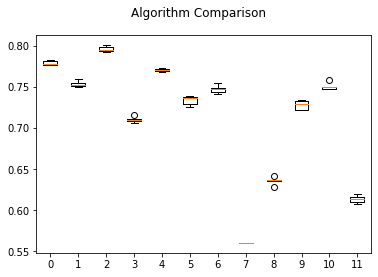

In [ ]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import xgboost
from xgboost import XGBClassifier
import lightgbm as lgb
# load dataset
numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
#le = preprocessing.LabelEncoder()
#label_encoder = le.fit(y)
#y = label_encoder.transform(y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)
block_size=int(round(X_train2.shape[0]/12))
n = block_size  #chunk row size
list_X_train = [X_train2[i:i+n] for i in range(0,X_train2.shape[0],n)]
list_y_train = [y_train2[i:i+n] for i in range(0,y_train2.shape[0],n)]
list_X_test = [X_test2[i:i+n] for i in range(0,X_test2.shape[0],n)]
list_y_test = [y_test2[i:i+n] for i in range(0,y_test2.shape[0],n)]
test_data = lgb.Dataset(list_X_test[0], label=list_y_test[0])
# Build the encoder
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
parameters = {
    'application': 'binary','objective': 'binary','metric': 'auc','is_unbalance': 'true',
    'boosting': 'gbdt','num_leaves': 31,'feature_fraction': 0.5,'bagging_fraction': 0.5,
    'bagging_freq': 20,'learning_rate': 0.05,'verbose': 0
}
fit_params={"early_stopping_rounds":10,"eval_metric" : 'auc',"eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],'verbose': 100,
            'feature_name': 'auto', # that's actually the default
            'categorical_feature': 'auto' # that's actually the default
           }
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                               ('RandomForestClassifier',RandomForestClassifier(n_estimators=20))])) 
                               .fit(list_X_train[0], list_y_train[0])) 
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                               ('AdaBoostClassifier',AdaBoostClassifier(n_estimators=25))]))
                               .fit(list_X_train[1], list_y_train[1])) 
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                       ('HistGradientBoostingClassifier', HistGradientBoostingClassifier())])).fit(list_X_train[2], list_y_train[2]))
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                              ('XGBClassifier',XGBClassifier(max_depth=2,n_estimators=10,objective='binary:logistic'))]))
                            .fit(list_X_train[3], list_y_train[3]))
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                              ('ExtraTreesClassifier',ExtraTreesClassifier(criterion= 'entropy'))]))
                               .fit(list_X_train[4], list_y_train[4]))
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
              ('lightgbm',lgb.LGBMClassifier(n_estimators=5 , num_leaves= 15,
           max_depth=-1,colsample_bytree=0.9,subsample=0.9,learning_rate=0.1))])).fit(list_X_train[5], list_y_train[5]))
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                     ('LDA', LinearDiscriminantAnalysis())])).fit(list_X_train[6], list_y_train[6]))
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                     ('MLPClassifier',
                      MLPClassifier(hidden_layer_sizes=(10,10), max_iter=5, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=1))])).fit(list_X_train[7], list_y_train[7]))
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                     ('LR', LogisticRegression())])).fit(list_X_train[8], list_y_train[8]))
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                     ('QDA', QuadraticDiscriminantAnalysis())])).fit(list_X_train[9], list_y_train[9]))
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                      ('CART', DecisionTreeClassifier())])).fit(list_X_train[10], list_y_train[10]))
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                       ('NB', GaussianNB())])).fit(list_X_train[11], list_y_train[11]))


   
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in enumerate(models):
    #kfold = model_selection.KFold(n_splits=10, random_state=seed)
    print('1')
    cv_results = model_selection.cross_val_score(model, list_X_train[name], 
                            list_y_train[name], cv=5, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
last=[]
for name, model in enumerate(models):
  last.append([type(model[1]),results[name].mean()])
last
def Sort(sub_li): 
   return(sorted(sub_li, key = lambda x: x[1], reverse=True))     
bb=(Sort(last))
try1=[]
for i in range(len(bb)):
  if bb[i][1]>=0.70:
     try1.append(bb[i])
try1

[[sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  0.7959769054594625],
 [sklearn.ensemble.forest.RandomForestClassifier, 0.7784527255146754],
 [sklearn.ensemble.forest.ExtraTreesClassifier, 0.7702894790681919],
 [sklearn.ensemble.weight_boosting.AdaBoostClassifier, 0.7529184971611469],
 [sklearn.tree.tree.DecisionTreeClassifier, 0.7502575791414047],
 [sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
  0.7467053219486217],
 [lightgbm.sklearn.LGBMClassifier, 0.7333047529102357],
 [sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis,
  0.7279554842300134],
 [xgboost.sklearn.XGBClassifier, 0.7100687430427002]]

In [ ]:
for name, model in enumerate(models):
  print(type(model[1]))

<class 'sklearn.ensemble.forest.RandomForestClassifier'>
<class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
<class 'xgboost.sklearn.XGBClassifier'>
<class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
<class 'lightgbm.sklearn.LGBMClassifier'>
<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
<class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>
<class 'sklearn.linear_model.logistic.LogisticRegression'>
<class 'sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis'>
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
<class 'sklearn.naive_bayes.GaussianNB'>


In [ ]:
bb

[[sklearn.ensemble.forest.RandomForestClassifier, 0.7806396081988514],
 [sklearn.ensemble.gradient_boosting.GradientBoostingClassifier,
  0.7784387042520478],
 [sklearn.ensemble.forest.ExtraTreesClassifier, 0.7709024894634986],
 [sklearn.ensemble.weight_boosting.AdaBoostClassifier, 0.7519293312035028],
 [sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
  0.7472487094274947],
 [sklearn.tree.tree.DecisionTreeClassifier, 0.7469561444557244],
 [lightgbm.sklearn.LGBMClassifier, 0.738249719679221],
 [sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis,
  0.7243613071151054],
 [xgboost.sklearn.XGBClassifier, 0.709887690373497],
 [sklearn.linear_model.logistic.LogisticRegression, 0.6365168585769048],
 [sklearn.naive_bayes.GaussianNB, 0.6141030483572736],
 [sklearn.neural_network.multilayer_perceptron.MLPClassifier,
  0.5641907889521246]]

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1
0: 0.847674 (0.002017)
1
1: 0.823186 (0.002219)


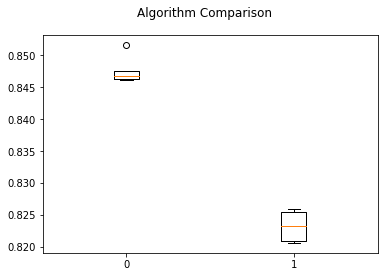

In [ ]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, train_test_split
import category_encoders as ce
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import ExtraTreesClassifier
# load dataset
numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns

X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
#le = preprocessing.LabelEncoder()
#label_encoder = le.fit(y)
#y = label_encoder.transform(y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)
block_size=int(round(X_train2.shape[0]/2))
n = block_size  #chunk row size
list_X_train = [X_train2[i:i+n] for i in range(0,X_train2.shape[0],n)]
list_y_train = [y_train2[i:i+n] for i in range(0,y_train2.shape[0],n)]
list_X_test = [X_test2[i:i+n] for i in range(0,X_test2.shape[0],n)]
list_y_test = [y_test2[i:i+n] for i in range(0,y_test2.shape[0],n)]
test_data = lgb.Dataset(list_X_test[0], label=list_y_test[0])
# Build the encoder

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
parameters = {
    'application': 'binary','objective': 'binary','metric': 'auc','is_unbalance': 'true',
    'boosting': 'gbdt','num_leaves': 31,'feature_fraction': 0.5,'bagging_fraction': 0.5,
    'bagging_freq': 20,'learning_rate': 0.05,'verbose': 0
}
fit_params={"early_stopping_rounds":10,"eval_metric" : 'auc',"eval_set" : [(X_test2,y_test2)],
            'eval_names': ['valid'],'verbose': 100,
            'feature_name': 'auto', # that's actually the default
            'categorical_feature': 'auto' # that's actually the default
           }
iterace=100
num_leaves_list = [50] * iterace
num_boost_round = iterace
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
            ('lightgbm',
             lgb.LGBMClassifier(n_estimators=5 , num_leaves= 15, max_depth=-1,colsample_bytree=0.9,subsample=0.9,learning_rate=0.1))]))
             .fit(list_X_train[0], list_y_train[0]))
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                              ('ExtraTreesClassifier',
                               ExtraTreesClassifier(criterion= 'entropy'))]))
                               .fit(list_X_train[1], list_y_train[1]))


   
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name, model in enumerate(models):
    #kfold = model_selection.KFold(n_splits=10, random_state=seed)
    print('1')
    cv_results = model_selection.cross_val_score(model, list_X_train[name],  list_y_train[name], cv=5, scoring=scoring)scoring = 'roc_auc'
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
(bb[0][0]

abc.ABCMeta

In [ ]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from hyperopt.pyll import scope as ho_scope                                       
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
import numpy as np
from hyperopt.pyll.stochastic import sample as ho_sample
from functools import partial
import xgboost as xgb
param_hyperopt= {
        'DecisionTreeClassifier':
            {
            'max_features': hp.choice('c0_max_features', ['auto', 'sqrt', 'log2']),
            'min_samples_split': ho_scope.int(hp.quniform('c0_min_samples_split', 3, 15,3)),
            'min_samples_leaf': ho_scope.int(hp.quniform('c0_min_samples_leaf', 3, 15,3))                                   
          
         },
         'RandomForestClassifier': 
            {
            'max_depth': ho_scope.int(hp.quniform('c2_max_depth', 5, 7, 1)),
            'n_estimators': ho_scope.int(hp.quniform('c2_n_estimators', 5, 30, 1)),
            'max_features': hp.choice('c2_max_features', ['auto', 'sqrt']),
            'criterion': hp.choice('c2_criterion', ['gini', 'entropy']),
            'min_samples_split': ho_scope.int(hp.quniform('c2_min_samples_split', 2, 5,1)),
            'min_samples_leaf': ho_scope.int(hp.quniform('c2_min_samples_leaf', 2, 5,1))
                          
         },                                               
          'HistGradientBoostingClassifier':
            {
                'learning_rate': hp.loguniform('c3_learning_rate', np.log(0.01), np.log(0.1)),
                'max_iter': ho_scope.int(hp.quniform('c3_max_iter', 10, 50, 5)),
                'max_depth': ho_scope.int(hp.quniform('c3_max_depth', 2,5, 1)),
                'max_leaf_nodes': ho_scope.int(hp.quniform('c3_max_leaf_nodes', 5, 35,5)),
                'min_samples_leaf': ho_scope.int(hp.quniform('c3_min_samples_leaf', 5, 25,5)),
                'loss': hp.choice('c3_loss', ['auto', 'binary_crossentropy','categorical_crossentropy']),
                'max_bins': ho_scope.int(hp.quniform('c3_max_bins', 20, 100,20)),
                'validation_fraction':0.1,
                'n_iter_no_change':None,
                 'tol':1e-07,
                  'l2_regularization':0.0 
           },
       'ExtraTreesClassifier':
            {
                'max_depth': ho_scope.int(hp.quniform('c4_max_depth', 5, 20, 1)),
                'n_estimators': ho_scope.int(hp.quniform('c4_n_estimators', 5, 30, 1)),
                'max_features': ho_scope.int(hp.quniform('c4_max_features', 5, 20, 1)),
                'criterion': hp.choice('c4_criterion', ['gini', 'entropy']),
                'min_samples_split': ho_scope.int(hp.quniform('c4_min_samples_split', 2, 5,1)),
                'min_samples_leaf': ho_scope.int(hp.quniform('c4_min_samples_leaf', 2, 5,1))
       },

     'AdaBoostClassifier':
     {
          'learning_rate': hp.loguniform('c5_learning_rate', np.log(0.01), np.log(1)),
           'n_estimators': ho_scope.int(hp.quniform('c5_n_estimators', 5, 30, 1)),
           'algorithm': hp.choice('c5_algorithm',["SAMME"])  
       },
       'XGBClassifier':
    {
         'n_estimators': hp.quniform('n_estimators', 100, 1000, 1),
        'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
        # A problem with max_depth casted to float instead of int with
        # the hp.quniform method.
        'max_depth':  hp.choice('max_depth', np.arange(1, 14, dtype=int)),
        'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
        'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
        'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
        'eval_metric': 'auc',
        'objective': 'binary:logistic',
        # Increase this number if you have more cores. Otherwise, remove it and it will default 
        # to the maxium number. 
        'nthread': 4,
        'booster': 'gbtree',
        'tree_method': 'exact',
        'silent': 1,
        'seed': 1
       },
   'LinearDiscriminantAnalysis':
            {      
            
            }  ,
  'QuadraticDiscriminantAnalysis' :
        {
      
        },
  'LGBMClassifier':
                  {
                   'max_depth': ho_scope.int(hp.quniform('c6_max_depth', 3, 10, 1)),
                   'num_leave': ho_scope.int(hp.quniform('c6_num_leaves', 5, 50, 5)),
                   'min_child_samples': ho_scope.int(hp.quniform('c6_min_child_samples', 50, 100, 10)),
                   'scale_pos_weight': ho_scope.float(hp.quniform('c6_scale_pos_weight', 50, 100, 10)),
                   'subsample': ho_scope.float(hp.quniform('c6_subsample', 0.6, 0.9, 1)),
                   'colsample_bytree': ho_scope.float(hp.quniform('c6_colsample_bytree', 0.6, 0.9, 1)),
                   'reg_lambda': hp.choice("c6_reg_lambda",[0, 1e-1, 1, 5, 10, 20, 50]),
                   'reg_alpha': hp.choice("c6_reg_alpha",[0, 1e-1, 1, 5, 10, 20, 50])
                   }  ,
  'LogisticRegression ':
  {
      ' classifier__penalty': hp.choice(' classifier__penalty', ['l1', 'l2']),
     'classifier__C' :hp.loguniform('classifier__C', np.log(0.1), np.log(1)) ,
    'classifier__solver' : 'liblinear'
  }   ,
  'MLPClassifier':{
      'hidden_layer_sizes': hp.choice(' c8_hidden_layer_sizes',[(50,50,50), (50,100,50), (100,)]),
    'activation':hp.choice ('c8_activation',['tanh', 'relu']),
    'solver': hp.choice('c8_solver',['sgd', 'adam']) ,
    'alpha':hp.loguniform('c8_alpha',np.log(0.0001), np.log(0.05) ),
    'learning_rate':hp.choice('c8_learning_rate', ['constant','adaptive'],)
  },
  'GaussianNB':
  {
      
  }                  
       
} 
if list(param_hyperopt.keys())[1]==try1[0][0].__name__:
  param_hyperopt[try1[0][0].__name__]=param_hyperopt[try1[0][0].__name__]

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2,random_state = 0)
def f_clf1(params):
  model6 =Pipeline(steps=[('encoder',Accepted[0][1]()),(try1[1][0].__name__,try1[1][0](**params[try1[1][0].__name__]))])
  return model6    

def objective_function(params,X_train2, y_train2):
    model=f_clf1(params)
    score = cross_val_score(model, X_train2, y_train2, cv=5,scoring='roc_auc', n_jobs=-1).mean()
    return {'loss': -score, 'status': STATUS_OK}  

trials = Trials()
best_clf1 = fmin(partial(objective_function, X_train2=X_train2, y_train2=y_train2), param_hyperopt[try1[1][0].__name__], algo=tpe.suggest, max_evals=10,
                 trials=trials, rstate=np.random.RandomState(1))
clf1 = f_clf1(space_eval(param_hyperopt[try1[1][0].__name__], best_clf1)).fit(X_train2, y_train2)
# Calculating performance on validation set
y_score = clf1.predict_proba(X_test2)
clf1_val_score = roc_auc_score(y_test2, y_score[:,1])
#clf2_val_score = model_selection.cross_val_score(f_clf2, X_train2,  y_train2, cv=5, scoring='roc_auc')
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.\
      format(-trials.best_trial['result']['loss'], clf1_val_score))
#print('Best parameters:')
#print(space_eval(param_hyperopt, best_clf1))
a1=space_eval(param_hyperopt[try1[1][0].__name__], best_clf1)
Fr_classifier={'classifier':list(a1.keys())[0],'Cross-val score':-trials.best_trial['result']['loss'],'validation score':clf1_val_score,'parameters':list(a1.values())[0]}

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]


KeyError: ignored

In [ ]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from hyperopt.pyll import scope as ho_scope                                       
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
import numpy as np
from hyperopt.pyll.stochastic import sample as ho_sample
from functools import partial
import xgboost as xgb
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
from sklearn.utils import shuffle
param_hyperopt= {
        'DecisionTreeClassifier':
            {
            'max_depth': ho_scope.int(hp.quniform('c2_max_depth', 3, 7, 1)),
            'max_features': hp.choice('c0_max_features', ['auto', 'sqrt', 'log2']),
            'min_samples_split': ho_scope.int(hp.quniform('c0_min_samples_split', 3, 15,3)),
            'min_samples_leaf': ho_scope.int(hp.quniform('c0_min_samples_leaf', 3, 15,3))                                   
          
         },
         'RandomForestClassifier': 
            {
            'max_depth': ho_scope.int(hp.quniform('c2_max_depth', 5, 7, 1)),
            'n_estimators': ho_scope.int(hp.quniform('c2_n_estimators', 5, 30, 1)),
            'max_features': hp.choice('c2_max_features', ['auto', 'sqrt']),
            'criterion': hp.choice('c2_criterion', ['gini', 'entropy']),
            'min_samples_split': ho_scope.int(hp.quniform('c2_min_samples_split', 2, 5,1)),
            'min_samples_leaf': ho_scope.int(hp.quniform('c2_min_samples_leaf', 2, 5,1))
                          
         },                                               
          'HistGradientBoostingClassifier':
            {
               'learning_rate': hp.loguniform('c3_learning_rate', np.log(0.01), np.log(0.1)),
                'max_iter': ho_scope.int(hp.quniform('c3_max_iter', 10, 80, 5)),
                'max_depth': ho_scope.int(hp.quniform('c3_max_depth', 2,7, 1)),
                'max_leaf_nodes': ho_scope.int(hp.quniform('c3_max_leaf_nodes', 5, 35,5)),
                'min_samples_leaf': ho_scope.int(hp.quniform('c3_min_samples_leaf', 5, 25,5)),
                'max_bins': ho_scope.int(hp.quniform('c3_max_bins', 20, 100,20)),
                'validation_fraction':0.1,
                'n_iter_no_change':None,
                 'tol':1e-07,
                'l2_regularization':0.0 
           },
       'ExtraTreesClassifier':
            {
                'max_depth': ho_scope.int(hp.quniform('c4_max_depth', 5, 20, 1)),
                'n_estimators': ho_scope.int(hp.quniform('c4_n_estimators', 5, 30, 1)),
                'max_features': ho_scope.int(hp.quniform('c4_max_features', 5, 20, 1)),
                'criterion': hp.choice('c4_criterion', ['gini', 'entropy']),
                'min_samples_split': ho_scope.int(hp.quniform('c4_min_samples_split', 2, 5,1)),
                'min_samples_leaf': ho_scope.int(hp.quniform('c4_min_samples_leaf', 2, 5,1))
       },

     'AdaBoostClassifier':
   {
         'base_estimator':hp.choice('base_estimator', [DecisionTreeClassifier()]),
          'learning_rate': hp.loguniform('c5_learning_rate', np.log(0.01), np.log(1)),
          'n_estimators': ho_scope.int(hp.quniform('c5_n_estimators', 10, 80, 10)),
          'algorithm': hp.choice('c5_algorithm',["SAMME"])  
       },
       'XGBClassifier':
    {
         'n_estimators': ho_scope.int(hp.quniform('n_estimators', 100, 1000, 100)),
        'eta':ho_scope.float(hp.quniform('eta', 0.025, 0.5, 0.025)) ,
        'max_depth':ho_scope.int( hp.quniform('max_depth', 2, 14,2)) ,
        'min_child_weight':ho_scope.int(hp.quniform('min_child_weight', 1, 6, 1)) ,
        'subsample':ho_scope.float(hp.quniform('subsample', 0.5, 1.0, 0.05)),
        'gamma':ho_scope.float( hp.quniform('gamma', 0.5, 1, 0.05)) ,
        'colsample_bytree': ho_scope.float(hp.quniform('colsample_bytree', 0.5, 1, 0.05)),
        'eval_metric': 'auc',
        'objective': 'binary:logistic',
         'nthread': 10,
        'booster': 'gbtree',
        'tree_method': 'exact',
        'silent': 1,
       
       },
   'LinearDiscriminantAnalysis':
            {      
            
            }  ,
  'QuadraticDiscriminantAnalysis' :
        {
      
        },
  'LGBMClassifier':
                  {
                   'max_depth': ho_scope.int(hp.quniform('c6_max_depth', -2, 10, 1)),
                   'num_leave': ho_scope.int(hp.quniform('c6_num_leaves', 10, 200, 10)),
                   'min_child_samples': ho_scope.int(hp.quniform('c6_min_child_samples', 10, 90, 10)),
                   'scale_pos_weight': ho_scope.int(hp.quniform('c6_scale_pos_weight', 10, 90, 10)),
                   'subsample': ho_scope.float(hp.quniform('c6_subsample', 0.1, 0.9, 0.1)),
                   'colsample_bytree': ho_scope.float(hp.quniform('c6_colsample_bytree', 0.1, 0.9, 0.1)),
                   'reg_lambda': hp.choice("c6_reg_lambda",[0, 1e-1, 1, 5, 10, 20, 50]),
                   'reg_alpha': hp.choice("c6_reg_alpha",[0, 1e-1, 1, 5, 10, 20, 50]),
                   'bagging_fraction': ho_scope.float(hp.quniform('c6_bagging_fraction', 0.1, 0.9, 0.05)),
                    'bagging_freq': ho_scope.int(hp.quniform('c6_bagging_freq', 1, 8, 1)),
                   'min_data_in_leaf': ho_scope.int(hp.quniform('c6_min_data_in_leaf', 100, 1000, 100)),
                  'min_sum_hessian_in_leaf': ho_scope.int(hp.quniform('c6_min_sum_hessian_in_leaf', 5, 20, 5)),
                   'max_bin': ho_scope.int(hp.quniform('c6_max_bin', 10, 100, 10)),
                   'learning_rate': ho_scope.float(hp.quniform('c6_learning_rate', 0.001, 0.09, 0.005)),
                   'num_iterations': ho_scope.int(hp.quniform('c6_num_iterations', 100, 10000, 100)),
                   'early_stopping_round':ho_scope.int(hp.quniform('c6_early_stopping_round',(1,10,1)))  
                      
                   }  ,
  'LogisticRegression ':
  {
      ' classifier__penalty': hp.choice(' classifier__penalty', ['l1', 'l2']),
     'classifier__C' :hp.loguniform('classifier__C', np.log(0.1), np.log(1)) ,
    'classifier__solver' : 'liblinear'
  }   ,
  'MLPClassifier':{
      'hidden_layer_sizes': hp.choice(' c8_hidden_layer_sizes',[(50,50,50), (50,100,50), (100,)]),
    'activation':hp.choice ('c8_activation',['tanh', 'relu']),
    'solver': hp.choice('c8_solver',['sgd', 'adam']) ,
    'alpha':hp.loguniform('c8_alpha',np.log(0.0001), np.log(0.05) ),
    'learning_rate':hp.choice('c8_learning_rate', ['constant','adaptive'],)
  },
  'GaussianNB':
  {
      
  }                  
       
} 

def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2,random_state = 0)
q=[3,2]

for i in range(len(q)) :
  param_hyperopt3={try1[i][0].__name__:param_hyperopt[try1[i][0].__name__]}
  clf_name=try1[i][0].__name__
  def f_clf1(params):
    if not(params):
     model6 =Pipeline(steps=[('encoder',ce.cat_boost.CatBoostEncoder()),(clf_name,try1[i][0]())])
     return model6[i]
    else:
     model6 =Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),(clf_name,try1[i][0](**f_unpack_dict(params[clf_name])))])
     return model6[i] 
         
  def objective_function(params,X_train2, y_train2):
      model=[]
      for i in range(len(q)):
        model.append(f_clf1(params))
        shuffle = KFold(n_splits=5, shuffle=True)
        score = cross_val_score(model[i], X_train2, y_train2, cv=shuffle,scoring='roc_auc', n_jobs=-1).mean()
        return {'loss': -score, 'status': STATUS_OK}  

  trials = Trials()
  best_clf1 = fmin(partial(objective_function, X_train2=X_train2, y_train2=y_train2),space=param_hyperopt3 , algo=tpe.suggest, max_evals=10,
                  trials=trials, rstate=np.random.RandomState(1))
  clf1 = f_clf1(space_eval(param_hyperopt3, best_clf1)).fit(X_train2, y_train2)
  # Calculating performance on validation set
  y_score = clf1.predict_proba(X_test2)
  clf1_val_score = roc_auc_score(y_test2, y_score[:,1])
  print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.format(-trials.best_trial['result']['loss'], clf1_val_score))
  #print('Best parameters:')
  #print(space_eval(param_hyperopt, best_clf1))
  a1=space_eval(param_hyperopt3, best_clf1)
  Fr_classifier={'classifier':clf_name,'Cross-val score':-trials.best_trial['result']['loss'],'validation score':clf1_val_score,'parameters':list(a1.values())[0]}
  Fr_classifier

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]


AttributeError: ignored

In [ ]:
import category_encoders as ce
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

q=[2,3]
param_hyperopt31=[]
clf_name=[]
model=[]
for i in range(len(q)) :
  param_hyperopt31.append({try1[i][0].__name__:param_hyperopt[try1[i][0].__name__]})
  clf_name.append(try1[i][0].__name__)
  def f_clf1(params):
    model6=[]
    if not(params):
     model6.append(Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),(clf_name[i],try1[i][0]())]))
     return model6
    else:
     model6.append(Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),(clf_name[i],try1[i][0](**f_unpack_dict(param_hyperopt31[i])))]))
     return model6

  
  model.append(f_clf1(param_hyperopt31))
  model

In [ ]:
param_hyperopt31[0],clf_name[0]

({'HistGradientBoostingClassifier': {'l2_regularization': 0.0,
   'learning_rate': <hyperopt.pyll.base.Apply at 0x7f336582f4e0>,
   'max_bins': <hyperopt.pyll.base.Apply at 0x7f336582fda0>,
   'max_depth': <hyperopt.pyll.base.Apply at 0x7f336582f860>,
   'max_iter': <hyperopt.pyll.base.Apply at 0x7f336582f6a0>,
   'max_leaf_nodes': <hyperopt.pyll.base.Apply at 0x7f336582fa20>,
   'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x7f336582fbe0>,
   'n_iter_no_change': None,
   'tol': 1e-07,
   'validation_fraction': 0.1}},
 'HistGradientBoostingClassifier')

In [ ]:
param_hyperopt31.append({try1[i][0].__name__:param_hyperopt[try1[i][0].__name__]})
param_hyperopt31[0],clf_name

({'HistGradientBoostingClassifier': {'l2_regularization': 0.0,
   'learning_rate': <hyperopt.pyll.base.Apply at 0x7f3365dee518>,
   'max_bins': <hyperopt.pyll.base.Apply at 0x7f3365deedd8>,
   'max_depth': <hyperopt.pyll.base.Apply at 0x7f3365dee898>,
   'max_iter': <hyperopt.pyll.base.Apply at 0x7f3365dee6d8>,
   'max_leaf_nodes': <hyperopt.pyll.base.Apply at 0x7f3365deea58>,
   'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x7f3365deec18>,
   'n_iter_no_change': None,
   'tol': 1e-07,
   'validation_fraction': 0.1}},
 ['HistGradientBoostingClassifier', 'RandomForestClassifier'])

In [ ]:
model6=Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),('RandomForestClassifier',RandomForestClassifier(**f_unpack_dict(param_hyperopt['RandomForestClassifier'])))])
model6

Pipeline(memory=None,
         steps=[('encoder',
                 JamesSteinEncoder(cols=None, drop_invariant=False,
                                   handle_missing='value',
                                   handle_unknown='value', model='independent',
                                   random_state=None, randomized=False,
                                   return_df=True, sigma=0.05, verbose=0)),
                ('RandomForestClassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion=<hyperopt.pyll.base.Apply object...
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=<hyperopt.pyll.base.Apply object at 0x7f3365dee3c8>,
                                        min_samples_split=<hyperopt.pyll.base.Apply object at 0x7f3365dee208>,
                                      

In [ ]:
Fr_classifier

{'Cross-val score': 0.8275732613439543,
 'classifier': 'RandomForestClassifier',
 'parameters': {'criterion': 'entropy',
  'max_depth': 7,
  'max_features': 'auto',
  'min_samples_leaf': 2,
  'min_samples_split': 3,
  'n_estimators': 27},
 'validation score': 0.8247213862925282}

In [ ]:
not(param_hyperopt[try1[4][0].__name__])

True

In [ ]:
param_hyperopt[try1[4][0].__name__]

{}

In [ ]:
param_hyperopt['HistGradientBoostingClassifier']HistGradientBoostingClassifier
model6 =Pipeline(steps=[('encoder',Accepted[0][1]()),(try1[0][0].__name__,try1[0][0](**param_hyperopt[try1[0][0].__name__]))])
param_hyperopt[try1[0][0].__name__]

{'l2_regularization': 0.0,
 'learning_rate': <hyperopt.pyll.base.Apply at 0x7f4a92f6f400>,
 'loss': <hyperopt.pyll.base.Apply at 0x7f4a92f6fc18>,
 'max_bins': <hyperopt.pyll.base.Apply at 0x7f4a92f6feb8>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x7f4a92f6f780>,
 'max_iter': <hyperopt.pyll.base.Apply at 0x7f4a92f6f5c0>,
 'max_leaf_nodes': <hyperopt.pyll.base.Apply at 0x7f4a92f6f940>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x7f4a92f6fb00>,
 'n_iter_no_change': None,
 'tol': 1e-07,
 'validation_fraction': 0.1}

In [ ]:
try1

[[sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  0.7940824653969589],
 [sklearn.ensemble.forest.RandomForestClassifier, 0.7793998162123197],
 [sklearn.ensemble.forest.ExtraTreesClassifier, 0.770150127628699],
 [sklearn.ensemble.weight_boosting.AdaBoostClassifier, 0.7536564340802216],
 [sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
  0.7469701302632473],
 [sklearn.tree.tree.DecisionTreeClassifier, 0.7468168298834201],
 [lightgbm.sklearn.LGBMClassifier, 0.7365921649520224],
 [sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis,
  0.7296130570051764],
 [xgboost.sklearn.XGBClassifier, 0.709414070714759]]

In [ ]:
param_hyperopt['HistGradientBoostingClassifier']

{'l2_regularization': 0.0,
 'learning_rate': <hyperopt.pyll.base.Apply at 0x7fce47307da0>,
 'loss': <hyperopt.pyll.base.Apply at 0x7fce47307898>,
 'max_bins': <hyperopt.pyll.base.Apply at 0x7fce4603ba90>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x7fce47307b00>,
 'max_iter': <hyperopt.pyll.base.Apply at 0x7fce47307160>,
 'max_leaf_nodes': <hyperopt.pyll.base.Apply at 0x7fce47307dd8>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x7fce473072b0>,
 'n_iter_no_change': None,
 'tol': 1e-07,
 'validation_fraction': 0.1}

In [ ]:
list(param_hyperopt.keys())[1]
param_hyperopt[try1[0][0].__name__]

{'criterion': <hyperopt.pyll.base.Apply at 0x7ff8688b2320>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x7ff868891e80>,
 'max_features': <hyperopt.pyll.base.Apply at 0x7ff8688b2198>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x7ff8688b2710>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x7ff8688b2550>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x7ff8688b2080>}

In [ ]:
if list(param_hyperopt.keys())[1]==try1[0][0].__name__:
  param_hyperopt[try1[0][0].__name__]=param_hyperopt[try1[0][0].__name__]
param_hyperopt

{'criterion': <hyperopt.pyll.base.Apply at 0x7ff86613a550>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x7ff86613a0f0>,
 'max_features': <hyperopt.pyll.base.Apply at 0x7ff86613a3c8>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x7ff86613a940>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x7ff86613a780>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x7ff86613a2b0>}

In [ ]:
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from hyperopt.pyll import scope as ho_scope                                       
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from hyperopt.pyll.stochastic import sample as ho_sample
from functools import partial

param_hyperopt1= {
   'ExtraTreesClassifier':
            {
                'max_depth': ho_scope.int(hp.quniform('c4_max_depth', 5, 20, 1)),
                'n_estimators': ho_scope.int(hp.quniform('c4_n_estimators', 5, 30, 1)),
                'max_features': ho_scope.int(hp.quniform('c4_max_features', 5, 20, 1)),
                'criterion': hp.choice('c4_criterion', ['gini', 'entropy']),
                'min_samples_split': ho_scope.int(hp.quniform('c4_min_samples_split', 2, 5,1)),
                'min_samples_leaf': ho_scope.int(hp.quniform('c4_min_samples_leaf', 2, 5,1))      
             }     
       
} 
   
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2,random_state = 0)
def f_clf1(params):
  model6 =Pipeline(steps=[('encoder',Accepted[0][1]()),
             ('c4',ExtraTreesClassifier(**f_unpack_dict(params['ExtraTreesClassifier'])))])
  return model6    

def objective_function(params,X_train2, y_train2):
    model=f_clf1(params)
    score = cross_val_score(model, X_train2, y_train2, cv=5,scoring='roc_auc', n_jobs=-1).mean()
    return {'loss': -score, 'status': STATUS_OK}  

trials = Trials()
best_clf1 = fmin(partial(objective_function, X_train2=X_train2, y_train2=y_train2), param_hyperopt1, algo=tpe.suggest, max_evals=10,
                 trials=trials, rstate=np.random.RandomState(1))
clf1 = f_clf1(space_eval(param_hyperopt1, best_clf1)).fit(X_train2, y_train2)
# Calculating performance on validation set
y_score = clf1.predict_proba(X_test2)
clf1_val_score = roc_auc_score(y_test2, y_score[:,1])
#clf2_val_score = model_selection.cross_val_score(f_clf2, X_train2,  y_train2, cv=5, scoring='roc_auc')
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.\
      format(-trials.best_trial['result']['loss'], clf1_val_score))
#print('Best parameters:')
#print(space_eval(param_hyperopt, best_clf1))
a1=space_eval(param_hyperopt1, best_clf1)
Fr_classifier={'classifier':list(a1.keys())[0],'Cross-val score':-trials.best_trial['result']['loss'],'validation score':clf1_val_score,'parameters':list(a1.values())[0]}

In [ ]:
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from hyperopt.pyll import scope as ho_scope                                       
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from hyperopt.pyll.stochastic import sample as ho_sample
from functools import partial

param_hyperopt2= {
  'RandomForestClassifier': 
            {
            'max_depth': ho_scope.int(hp.quniform('c2_max_depth', 5, 7, 1)),
            'n_estimators': ho_scope.int(hp.quniform('c2_n_estimators', 5, 30, 1)),
            'max_features': hp.choice('c2_max_features', ['auto', 'sqrt']),
            'criterion': hp.choice('c2_criterion', ['gini', 'entropy']),
            'min_samples_split': ho_scope.int(hp.quniform('c2_min_samples_split', 2, 5,1)),
            'min_samples_leaf': ho_scope.int(hp.quniform('c2_min_samples_leaf', 2, 5,1))
                          
         } 
} 
   
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)

def f_clf2(params):
  model4 =Pipeline(steps=[('encoder',Accepted[1][1]()),('c2',try1[1][0](**f_unpack_dict(params[try1[1][0].__name__])))])
  return model4    

def objective_function(params,X_train2, y_train2):
    model=f_clf2(params)
    score = cross_val_score(model, X_train2, y_train2, cv=5,scoring='roc_auc', n_jobs=-1).mean()
    return {'loss': -score, 'status': STATUS_OK}  

trials = Trials()
best_clf2 = fmin(partial(objective_function, X_train2=X_train2, y_train2=y_train2),
                 param_hyperopt2, algo=tpe.suggest, max_evals=10,trials=trials, rstate=np.random.RandomState(1))
clf2 = f_clf2(space_eval(param_hyperopt2, best_clf2)).fit(X_train2, y_train2)
# Calculating performance on validation set
y_score = clf2.predict_proba(X_test2)
clf2_val_score = roc_auc_score(y_test2, y_score[:,1])
#clf2_val_score = model_selection.cross_val_score(f_clf2, X_train2,  y_train2, cv=5, scoring='roc_auc')
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.\
      format(-trials.best_trial['result']['loss'], clf2_val_score))
#print('Best parameters:')
#print(
a2=space_eval(param_hyperopt2, best_clf2)
Se_classifier={'classifier':list(a2.keys())[0],'Cross-val score':-trials.best_trial['result']['loss'],'validation score':clf2_val_score,'parameters':list(a2.values())[0]}

100%|██████████| 10/10 [06:52<00:00, 37.99s/it, best loss: -0.8222612508481044]
Cross-val score: 0.82226; validation score: 0.83310


In [ ]:
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from hyperopt.pyll import scope as ho_scope                                       
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from hyperopt.pyll.stochastic import sample as ho_sample
from functools import partial
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
from sklearn.utils import shuffle
param_hyperopt3= {      
       'LinearDiscriminantAnalysis':
            {      
            
            }
} 
   
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)

def f_clf3(params):
   model1 =Pipeline(steps=[('encoder',Accepted[2][1]()),('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis())])   
   return model1
        

def objective_function(params,X_train2, y_train2):
    model=f_clf3(params)
    shuffle = KFold(n_splits=5, shuffle=True)
    score = cross_val_score(model, X_train2, y_train2, cv=shuffle,scoring='roc_auc', n_jobs=-1).mean()
    return {'loss': -score, 'status': STATUS_OK}  

trials = Trials()
best_clf3 = fmin(partial(objective_function, X_train2=X_train2, y_train2=y_train2),
                param_hyperopt3, algo=tpe.suggest, max_evals=10,trials=trials, rstate=np.random.RandomState(1))
clf3 = f_clf3(space_eval(param_hyperopt3, best_clf3)).fit(X_train2, y_train2)

# Calculating performance on validation set
clf3_val_score = roc_auc_score(y_test, clf3.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.\
      format(-trials.best_trial['result']['loss'], clf3_val_score))
print('Best parameters:')
print(space_eval(param_hyperopt3, best_clf3))
# Calculating performance on validation set
clf3_val_score = roc_auc_score(y_test, clf3.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.\
      format(-trials.best_trial['result']['loss'], clf3_val_score))
#print('Best parameters:')
#print(
a3=space_eval(param_hyperopt3, best_clf3)
Thrid_classifier={'classifier':list(a3.keys())[0],'Cross-val score':-trials.best_trial['result']['loss'],'validation score':clf3_val_score,'parameters':list(a3.values())[0]}

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



100%|██████████| 10/10 [02:37<00:00, 15.45s/it, best loss: -0.8268064630182487]
Cross-val score: 0.82681; validation score: 0.82719
Best parameters:
{'LinearDiscriminantAnalysis': {}}
Cross-val score: 0.82681; validation score: 0.82719


In [ ]:
from sklearn.preprocessing import scale, normalize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from hyperopt.pyll import scope as ho_scope                                       
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
from sklearn.utils import shuffle
from hyperopt.pyll.stochastic import sample as ho_sample
from functools import partial
import xgboost as xgb

param_hyperopt4= {
  'XGBClassifier':
      {
           'max_depth': hp.choice("x_max_depth", np.arange(5, 10, dtype=int)),
           'min_child_weight': hp.choice ('x_min_child',np.arange(1, 5, dtype=int)),
           'subsample': hp.uniform ('x_subsample', 0.8, 1),
           'n_estimators': ho_scope.int(hp.quniform('c2_n_estimators', 5, 40, 1)),
       }         
       
} 
   
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)
def f_clf4(params):
   model1 =Pipeline(steps=[('encoder',Accepted[3][1]()),('XGBClassifier', xgb.XGBClassifier())])   
   return model1  

def objective_function(params,X_train2, y_train2):
    model=f_clf4(params)
    score = cross_val_score(model, X_train2, y_train2, cv=5,scoring='roc_auc', n_jobs=-1).mean()
    return {'loss': -score, 'status': STATUS_OK}  

trials = Trials()
best_clf4 = fmin(partial(objective_function, X_train2=X_train2, y_train2=y_train2),
                param_hyperopt4, algo=tpe.suggest, max_evals=10,trials=trials, rstate=np.random.RandomState(1))
clf4 = f_clf4(space_eval(param_hyperopt4, best_clf4)).fit(X_train2, y_train2)
# Calculating performance on validation set
clf4_val_score = roc_auc_score(y_test, clf4.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.\
      format(-trials.best_trial['result']['loss'], clf4_val_score))
#print('Best parameters:')
#print(
a4=space_eval(param_hyperopt4, best_clf4)
Four_classifier={'classifier':list(a4.keys())[0],'Cross-val score':-trials.best_trial['result']['loss'],'validation score':clf4_val_score,'parameters':list(a4.values())[0]}

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



 10%|█         | 1/10 [02:31<22:41, 151.31s/it, best loss: -0.8761819849027198]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



 20%|██        | 2/10 [05:01<20:08, 151.10s/it, best loss: -0.8761819849027198]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



 30%|███       | 3/10 [07:32<17:37, 151.07s/it, best loss: -0.8761819849027198]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



 40%|████      | 4/10 [10:04<15:08, 151.36s/it, best loss: -0.8761819849027198]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



 50%|█████     | 5/10 [12:37<12:38, 151.68s/it, best loss: -0.8761819849027198]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



 60%|██████    | 6/10 [15:13<10:12, 153.06s/it, best loss: -0.8761819849027198]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



 70%|███████   | 7/10 [17:46<07:39, 153.05s/it, best loss: -0.8761819849027198]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



 80%|████████  | 8/10 [20:18<05:05, 152.79s/it, best loss: -0.8761819849027198]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



 90%|█████████ | 9/10 [22:54<02:33, 153.75s/it, best loss: -0.8761819849027198]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



100%|██████████| 10/10 [25:29<00:00, 153.97s/it, best loss: -0.8761819849027198]
Cross-val score: 0.87618; validation score: 0.87700


In [ ]:
a4=space_eval(param_hyperopt4, best_clf4)
Four_classifier={'classifier':list(a4.keys())[0],'Cross-val score':-trials.best_trial['result']['loss'],'validation score':clf4_val_score,'parameters':list(a4.values())[0]}

In [ ]:
from sklearn.preprocessing import scale, normalize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from hyperopt.pyll import scope as ho_scope                                       
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from hyperopt.pyll import scope as ho_scope
from hyperopt.pyll.stochastic import sample as ho_sample
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
from sklearn.utils import shuffle
import lightgbm as lgb
from functools import partial

param_hyperopt5= {
   'LGBMClassifier':
                  {
                   'max_depth': ho_scope.int(hp.quniform('c6_max_depth', 3, 10, 1)),
                   'num_leave': ho_scope.int(hp.quniform('c6_num_leaves', 5, 50, 5)),
                   'min_child_samples': ho_scope.int(hp.quniform('c6_min_child_samples', 50, 100, 10)),
                   'scale_pos_weight': ho_scope.float(hp.quniform('c6_scale_pos_weight', 50, 100, 10)),
                   'subsample': ho_scope.float(hp.quniform('c6_subsample', 0.6, 0.9, 1)),
                   'colsample_bytree': ho_scope.float(hp.quniform('c6_colsample_bytree', 0.6, 0.9, 1)),
                   'reg_lambda': hp.choice("c6_reg_lambda",[0, 1e-1, 1, 5, 10, 20, 50]),
                   'reg_alpha': hp.choice("c6_reg_alpha",[0, 1e-1, 1, 5, 10, 20, 50])
                   }         
       
} 
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res
numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)
def f_clf5(params):
   model1 =Pipeline(steps=[('encoder',Accepted[4][1]()),('LGBMClassifier', 
                                                         lgb.LGBMClassifier(**f_unpack_dict(params['LGBMClassifier'])))])   
   return model1  

def objective_function(params,X_train2, y_train2):
    model=f_clf5(params)
    score = cross_val_score(model, X_train2, y_train2, cv=5,scoring='roc_auc', n_jobs=-1).mean()
    return {'loss': -score, 'status': STATUS_OK}  

trials = Trials()
best_clf5 = fmin(partial(objective_function, X_train2=X_train2, y_train2=y_train2),
                param_hyperopt5, algo=tpe.suggest, max_evals=10,trials=trials, rstate=np.random.RandomState(1))
clf5 = f_clf5(space_eval(param_hyperopt5, best_clf5)).fit(X_train2, y_train2)

# Calculating performance on validation set
clf5_val_score = roc_auc_score(y_test, clf5.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.\
      format(-trials.best_trial['result']['loss'], clf5_val_score))
#print('Best parameters:')
#print(
a5=space_eval(param_hyperopt5, best_clf5)
fith_classifier={'classifier':list(a5.keys())[0],'Cross-val score':-trials.best_trial['result']['loss'],'validation score':clf5_val_score,'parameters':list(a5.values())[0]}

 10%|█         | 1/10 [00:39<05:55, 39.48s/it, best loss: -0.8913360429569718]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



100%|██████████| 10/10 [06:26<00:00, 36.78s/it, best loss: -0.8931760781045686]
Cross-val score: 0.89318; validation score: 0.89444


In [ ]:
from sklearn.preprocessing import scale, normalize
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from hyperopt.pyll import scope as ho_scope                                       
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from hyperopt.pyll.stochastic import sample as ho_sample
from functools import partial
from hyperopt.pyll import scope as ho_scope
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
from sklearn.utils import shuffle
param_hyperopt6= {
    'QuadraticDiscriminantAnalysis':
      {
           
      }      
} 
   
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)

def f_clf6(params):
   model3 =Pipeline(steps=[('encoder',Accepted[5][1]()),('QuadraticDiscriminantAnalysis',QuadraticDiscriminantAnalysis())])
   return model3 

def objective_function(params,X_train2, y_train2):
    model=f_clf6(params)
    #clf = RandomForestClassifier(**params)
    score = cross_val_score(model, X_train2, y_train2, cv=5,scoring='roc_auc', n_jobs=-1).mean()
    return {'loss': -score, 'status': STATUS_OK}  

trials = Trials()
best_clf6 = fmin(partial(objective_function, X_train2=X_train2, y_train2=y_train2),
                param_hyperopt6, algo=tpe.suggest, max_evals=10,trials=trials, rstate=np.random.RandomState(1))

clf6 = f_clf6(space_eval(param_hyperopt6, best_clf6)).fit(X_train2, y_train2)

# Calculating performance on validation set
clf6_val_score = roc_auc_score(y_test, clf6.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.format(-trials.best_trial['result']['loss'], clf6_val_score))
print('Best parameters:')
print(space_eval(param_hyperopt6, best_clf6))
# Calculating performance on validation set
clf6_val_score = roc_auc_score(y_test, clf6.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.\
      format(-trials.best_trial['result']['loss'], clf6_val_score))
#print('Best parameters:')
#print(
a6=space_eval(param_hyperopt6, best_clf6)
six_classifier={'classifier':list(a6.keys())[0],'Cross-val score':-trials.best_trial['result']['loss'],'validation score':clf6_val_score,'parameters':list(a6.values())[0]}

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



100%|██████████| 10/10 [02:06<00:00, 12.49s/it, best loss: -0.786171897798788]
Cross-val score: 0.78617; validation score: 0.78724
Best parameters:
{'QuadraticDiscriminantAnalysis': {}}
Cross-val score: 0.78617; validation score: 0.78724


In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier  
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import lightgbm as lgb
import category_encoders as ce
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score,classification_report
import numpy as np
import warnings

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)

pipe1 = make_pipeline(Accepted[3][1](),XGBClassifier(**Four_classifier['parameters']))
pipe2 = make_pipeline(Accepted[1][1](),RandomForestClassifier(**Se_classifier['parameters']))  
pipe3 = make_pipeline(Accepted[0][1](),ExtraTreesClassifier(**Fr_classifier['parameters'])) 
pipe6 = make_pipeline(Accepted[5][1](),lgb.LGBMClassifier(**fith_classifier['parameters'])) 
pipe4 = make_pipeline(Accepted[2][1](),LinearDiscriminantAnalysis())
pipe5 = make_pipeline(Accepted[5][1](),QuadraticDiscriminantAnalysis())
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6], meta_classifier=LogisticRegression()) 
model2=sclf2.fit(X_train2, y_train2)
y_true3, y_pred3  =y_test2, model2.predict(X_test2)
print(classification_report(y_true3, y_pred3))  
print("StackingClassifier score: %f" % model2.score(X_train2, y_train2))
clf2_val_score = roc_auc_score(y_test2, sclf2.predict_proba(X_test2)[:, 1])
print('Cross-val score: {0:.5f}'.format(clf2_val_score))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.73      0.82      0.77     94841
           1       0.85      0.76      0.80    120517

    accuracy                           0.79    215358
   macro avg       0.79      0.79      0.79    215358
weighted avg       0.79      0.79      0.79    215358

StackingClassifier score: 0.789651
Cross-val score: 0.85474


In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier  
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import lightgbm as lgb
import category_encoders as ce
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score,classification_report
import numpy as np
import warnings

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)


pipe2 = make_pipeline(Accepted[1][1](),RandomForestClassifier())  
pipe3 = make_pipeline(Accepted[0][1](),ExtraTreesClassifier()) 
pipe6 = make_pipeline(Accepted[5][1](),lgb.LGBMClassifier()) 
pipe4 = make_pipeline(Accepted[2][1](),LinearDiscriminantAnalysis())
sclf2 = StackingClassifier(classifiers=[pipe2,pipe3,pipe4,pipe6], meta_classifier=LogisticRegression()) 
model2=sclf2.fit(X_train2, y_train2)
y_true3, y_pred3  =y_test2, model2.predict(X_test2)
print(classification_report(y_true3, y_pred3))  
print("StackingClassifier score: %f" % model2.score(X_train2, y_train2))
clf2_val_score = roc_auc_score(y_test2, sclf2.predict_proba(X_test2)[:, 1])
print('Cross-val score: {0:.5f}'.format(clf2_val_score))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.76      0.76      0.76     94841
           1       0.81      0.81      0.81    120517

    accuracy                           0.79    215358
   macro avg       0.79      0.79      0.79    215358
weighted avg       0.79      0.79      0.79    215358

StackingClassifier score: 0.905730
Cross-val score: 0.86727


In [ ]:
Fr_classifier={'Cross-val score': 0.8755075622861487,
 'classifier': 'ExtraTreesClassifier',
 'parameters': {'criterion': 'entropy',
  'max_depth': 15,
  'max_features': 13,
  'min_samples_leaf': 4,
  'min_samples_split': 4,
  'n_estimators': 13},
 'validation score': 0.884938764808794}

In [ ]:
Fr_classifier['parameters']

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 13,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 13}

In [ ]:
Se_classifier={'Cross-val score': 0.8273926245659394,
 'classifier': 'RandomForestClassifier',
 'parameters': {'criterion': 'gini',
  'max_depth': 7,
  'max_features': 'auto',
  'min_samples_leaf': 2,
  'min_samples_split': 3,
  'n_estimators': 23},
 'validation score': 0.7973701565847332}

In [ ]:
Thrid_classifier={'Cross-val score': 0.8268064630182487,
 'classifier': 'LinearDiscriminantAnalysis',
 'parameters': {},
 'validation score': 0.827194350739109}

In [ ]:
Four_classifier={'Cross-val score': 0.8761819849027198,
 'classifier': 'XGBClassifier',
 'parameters': {'max_depth': 7,
  'min_child_weight': 1,
  'n_estimators': 38,
  'subsample': 0.8479101254812229},
 'validation score': 0.8770024548105813}

In [ ]:
fith_classifier={'Cross-val score': 0.8931760781045686,
 'classifier': 'LGBMClassifier',
 'parameters': {'colsample_bytree': 1.0,
  'max_depth': 9,
  'min_child_samples': 70,
  'num_leave': 10,
  'reg_alpha': 5,
  'reg_lambda': 20,
  'scale_pos_weight': 50.0,
  'subsample': 1.0},
 'validation score': 0.8944420319608248}

In [ ]:
six_classifier={'Cross-val score': 0.786171897798788,
 'classifier': 'QuadraticDiscriminantAnalysis',
 'parameters': {},
 'validation score': 0.787235957146868}

In [ ]:
a8={'ExtraTreesClassifier': {'criterion': 'gini',
  'max_depth': 7,
  'max_features': 7,
  'min_samples_leaf': 4,
  'min_samples_split': 4,
  'n_estimators': 19},
 'LGBMClassifier': {'colsample_bytree': 1.0,
  'max_depth': 7,
  'min_child_samples': 80,
  'num_leave': 50,
  'reg_alpha': 0,
  'reg_lambda': 10,
  'scale_pos_weight': 70.0,
  'subsample': 1.0},
 'RandomForestClassifier': {'criterion': 'entropy',
  'max_depth': 5,
  'max_features': 'sqrt',
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 30},
 'XGBClassifier': {'max_depth': 13,
  'min_child_weight': 3,
  'subsample': 0.9406880083709813}}

In [ ]:
type(ExtraTreesClassifier()).__name__

sklearn.ensemble._forest.ExtraTreesClassifier

In [ ]:
list(a8.keys())[0]==type(ExtraTreesClassifier()).__name__

True

In [ ]:
 model3 =Pipeline(steps=[('encoder',Accepted[5][1]()),('QuadraticDiscriminantAnalysis',QuadraticDiscriminantAnalysis())])
type(model3[0]).__name__ 

'WOEEncoder'

In [ ]:
list(a8.keys())

['ExtraTreesClassifier',
 'LGBMClassifier',
 'RandomForestClassifier',
 'XGBClassifier']

In [ ]:
{'ExtraTreesClassifier': {'criterion': 'gini',
  'max_depth': 7,
  'max_features': 7,
  'min_samples_leaf': 4,
  'min_samples_split': 4,
  'n_estimators': 19},
 'LGBMClassifier': {'colsample_bytree': 1.0,
  'max_depth': 7,
  'min_child_samples': 80,
  'num_leave': 50,
  'reg_alpha': 0,
  'reg_lambda': 10,
  'scale_pos_weight': 70.0,
  'subsample': 1.0},
 'RandomForestClassifier': {'criterion': 'entropy',
  'max_depth': 5,
  'max_features': 'sqrt',
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 30},
 'XGBClassifier': {'max_depth': 13,
  'min_child_weight': 3,
  'subsample': 0.9406880083709813}}

NameError: ignored

In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier  
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import lightgbm as lgb
import category_encoders as ce
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score,classification_report
import numpy as np
import warnings
numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)
pipe1 = make_pipeline(Accepted[0][1](),XGBClassifier())
pipe2 = make_pipeline(Accepted[1][1](),RandomForestClassifier())
pipe3 = make_pipeline(Accepted[2][1](),ExtraTreesClassifier())
pipe4 = make_pipeline(Accepted[3][1](),LinearDiscriminantAnalysis())
pipe6 = make_pipeline(Accepted[5][1](),lgb.LGBMClassifier())
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe6], meta_classifier=LogisticRegression())
model2=sclf2.fit(X_train2, y_train2)
y_true3, y_pred3  =y_test2, model2.predict(X_test2)
print(classification_report(y_true3, y_pred3))  
print("StackingClassifier score: %f" % model2.score(X_train2, y_train2))
clf2_val_score = roc_auc_score(y_test2, sclf2.predict_proba(X_test2)[:, 1])
print('Cross-val score: {0:.5f}'.format(clf2_val_score))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.75      0.78      0.77     94841
           1       0.82      0.80      0.81    120517

    accuracy                           0.79    215358
   macro avg       0.79      0.79      0.79    215358
weighted avg       0.79      0.79      0.79    215358

StackingClassifier score: 0.913023
Cross-val score: 0.86650


In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier  
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import lightgbm as lgb
import category_encoders as ce
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score,classification_report
import numpy as np
import warnings

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)

pipe2 = make_pipeline(Accepted[1][1](),RandomForestClassifier(**a8['RandomForestClassifier']))  
pipe3 = make_pipeline(Accepted[2][1](),ExtraTreesClassifier(**a8['ExtraTreesClassifier'])) 
pipe6 = make_pipeline(Accepted[5][1](),lgb.LGBMClassifier(**a8['LGBMClassifier'])) 
pipe4 = make_pipeline(Accepted[3][1](),LinearDiscriminantAnalysis())
sclf2 = StackingClassifier(classifiers=[pipe2,pipe3,pipe4,pipe6], meta_classifier=LogisticRegression()) 
model2=sclf2.fit(X_train2, y_train2)
y_true3, y_pred3  =y_test, model2.predict(X_test2)
print(classification_report(y_true3, y_pred3))  
print("StackingClassifier score: %f" % model2.score(X_train2, y_train2))
clf2_val_score = roc_auc_score(y_test2, sclf2.predict_proba(X_test2)[:, 1])
print('Cross-val score: {0:.5f}'.format(clf2_val_score))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.44      0.48      0.46     94433
           1       0.56      0.52      0.54    120925

    accuracy                           0.50    215358
   macro avg       0.50      0.50      0.50    215358
weighted avg       0.51      0.50      0.50    215358

StackingClassifier score: 0.809074
Cross-val score: 0.50016


In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier  
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import lightgbm as lgb
import category_encoders as ce
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score,classification_report
import numpy as np
import warnings

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)
for clf, label in zip([list(sclf2.named_classifiers.keys()),sclf2],[list(a8.keys())]):
  for i in range(len(list(a8.keys()))):
    if list(a8.keys())[i]  in label:
      if (type((sclf2.named_classifiers[clf[0]][1])).__name__)==list(a8.keys())[i]:
          pipe1 = make_pipeline(Accepted[0][1](),
                                XGBClassifier(**a8[(type((sclf2.named_classifiers[clf[0]][1])).__name__)]))
      if (type((sclf2.named_classifiers[clf[1]][1])).__name__)==list(a8.keys())[i]:
          pipe2 = make_pipeline(Accepted[1][1](),
                                RandomForestClassifier(**a8[(type((sclf2.named_classifiers[clf[1]][1])).__name__)]))  
      if (type((sclf2.named_classifiers[clf[2]][1])).__name__)==list(a8.keys())[i]:
          pipe3 = make_pipeline(Accepted[2][1](),
                                ExtraTreesClassifier(**a8[(type((sclf2.named_classifiers[clf[2]][1])).__name__)])) 
      if (type((sclf2.named_classifiers[clf[5]][1])).__name__)==list(a8.keys())[i]:
          pipe6 = make_pipeline(Accepted[5][1](),
                                lgb.LGBMClassifier(**a8[(type((sclf2.named_classifiers[clf[5]][1])).__name__)])) 
    else:  
            pipe4 = make_pipeline(Accepted[3][1](),LinearDiscriminantAnalysis())
            pipe5 = make_pipeline(Accepted[4][1](),QuadraticDiscriminantAnalysis())
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6], meta_classifier=LogisticRegression()) 
model2=sclf2.fit(X_train2, y_train2)
y_true3, y_pred3  =y_test2, model2.predict(X_test2)
print(classification_report(y_true3, y_pred3))  
print("StackingClassifier score: %f" % model2.score(X_train2, y_train2))
clf2_val_score = roc_auc_score(y_test2, sclf2.predict_proba(X_test2)[:, 1])
print('Cross-val score: {0:.5f}'.format(clf2_val_score))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.75      0.84      0.79     94841
           1       0.86      0.78      0.82    120517

    accuracy                           0.81    215358
   macro avg       0.81      0.81      0.81    215358
weighted avg       0.81      0.81      0.81    215358

StackingClassifier score: 0.813905
Cross-val score: 0.87589


In [ ]:
sclf2.named_classifiers[]

{'pipeline-1': Pipeline(memory=None,
          steps=[('jamessteinencoder',
                  JamesSteinEncoder(cols=None, drop_invariant=False,
                                    handle_missing='value',
                                    handle_unknown='value', model='independent',
                                    random_state=None, randomized=False,
                                    return_df=True, sigma=0.05, verbose=0)),
                 ('randomforestclassifier',
                  RandomForestClassifier(bootstrap=True, class_weight=None,
                                         criterion='gini', max_depth=None,
                                         max_features='auto',
                                         max_leaf_nodes=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1, min_samples_split=2,
                             

In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier  
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import lightgbm as lgb
import category_encoders as ce
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score,classification_report
import numpy as np
import warnings

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)

pipe1 = make_pipeline(Accepted[0][1](),XGBClassifier(**a8['XGBClassifier']))
pipe2 = make_pipeline(Accepted[1][1](),RandomForestClassifier(**a8['RandomForestClassifier']))  
pipe3 = make_pipeline(Accepted[2][1](),ExtraTreesClassifier(**a8['ExtraTreesClassifier'])) 
pipe6 = make_pipeline(Accepted[5][1](),lgb.LGBMClassifier(**a8['LGBMClassifier'])) 
pipe4 = make_pipeline(Accepted[3][1](),LinearDiscriminantAnalysis())
pipe5 = make_pipeline(Accepted[4][1](),QuadraticDiscriminantAnalysis())
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6], meta_classifier=LogisticRegression()) 
model2=sclf2.fit(X_train2, y_train2)
y_true3, y_pred3  =y_test, model2.predict(X_test2)
print(classification_report(y_true3, y_pred3))  
print("StackingClassifier score: %f" % model2.score(X_train2, y_train2))
clf2_val_score = roc_auc_score(y_test, sclf2.predict_proba(X_test2)[:, 1])
print('Cross-val score: {0:.5f}'.format(clf2_val_score))

In [ ]:
a8

{'ExtraTreesClassifier': {'criterion': 'gini',
  'max_depth': 7,
  'max_features': 7,
  'min_samples_leaf': 4,
  'min_samples_split': 4,
  'n_estimators': 19},
 'LGBMClassifier': {'colsample_bytree': 1.0,
  'max_depth': 7,
  'min_child_samples': 80,
  'num_leave': 50,
  'reg_alpha': 0,
  'reg_lambda': 10,
  'scale_pos_weight': 70.0,
  'subsample': 1.0},
 'RandomForestClassifier': {'criterion': 'entropy',
  'max_depth': 5,
  'max_features': 'sqrt',
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 30},
 'XGBClassifier': {'max_depth': 13,
  'min_child_weight': 3,
  'subsample': 0.9406880083709813}}

In [ ]:
list(pipe1.named_steps.keys())[1],list(a8.keys())[0].lower()

('xgbclassifier', 'extratreesclassifier')

In [ ]:
for clf, label in zip([list(sclf2.named_classifiers.keys()),sclf2],[list(a8.keys())]):
  print(label[0])

ExtraTreesClassifier


In [ ]:
(type((sclf2.named_classifiers['pipeline-1'][1])).__name__)==list(a8.keys())[3]

True

In [ ]:
for i in range(len(list(a8.keys()))):
 if (type((sclf2.named_classifiers['pipeline-1'][1])).__name__)==list(a8.keys())[i]:
  pipe1 = make_pipeline(Accepted[0][1](),XGBClassifier(**a8[(type((sclf2.named_classifiers['pipeline-1'][1])).__name__)]))
  print(pipe1)

Pipeline(memory=None,
         steps=[('catboostencoder',
                 CatBoostEncoder(a=1, cols=None, drop_invariant=False,
                                 handle_missing='value', handle_unknown='value',
                                 random_state=None, return_df=True, sigma=None,
                                 verbose=0)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=13,
                               min_child_weight=3, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None,
    

In [ ]:
a8

{'ExtraTreesClassifier': {'criterion': 'gini',
  'max_depth': 7,
  'max_features': 7,
  'min_samples_leaf': 4,
  'min_samples_split': 4,
  'n_estimators': 19},
 'LGBMClassifier': {'colsample_bytree': 1.0,
  'max_depth': 7,
  'min_child_samples': 80,
  'num_leave': 50,
  'reg_alpha': 0,
  'reg_lambda': 10,
  'scale_pos_weight': 70.0,
  'subsample': 1.0},
 'RandomForestClassifier': {'criterion': 'entropy',
  'max_depth': 5,
  'max_features': 'sqrt',
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 30},
 'XGBClassifier': {'max_depth': 13,
  'min_child_weight': 3,
  'subsample': 0.9406880083709813}}

In [ ]:
list(a8.keys())
for clf, label in zip([list(sclf2.named_classifiers.keys()),sclf2],[list(a8.keys())]):
   
        print(clf)


['pipeline-1', 'pipeline-2', 'pipeline-3', 'pipeline-4', 'pipeline-5', 'pipeline-6']


In [ ]:
for clf, label in zip([list(sclf2.named_classifiers.keys()),sclf2],[list(a8.keys())]):
  for i in range(len(list(a8.keys()))):
    if list(a8.keys())[i]  in label:
      if (type((sclf2.named_classifiers[clf[0]][1])).__name__)==list(a8.keys())[i]:
          pipe1 = make_pipeline(Accepted[0][1](),XGBClassifier(**a8[(type((sclf2.named_classifiers[clf[0]][1])).__name__)]))
          pipe2
      if (type((sclf2.named_classifiers[clf[1]][1])).__name__)==list(a8.keys())[i]:
          pipe2 = make_pipeline(Accepted[1][1](),RandomForestClassifier(**a8[(type((sclf2.named_classifiers[clf[1]][1])).__name__)]))  
          pipe2   
      if (type((sclf2.named_classifiers[clf[2]][1])).__name__)==list(a8.keys())[i]:
          pipe3 = make_pipeline(Accepted[2][1](),ExtraTreesClassifier(**a8[(type((sclf2.named_classifiers[clf[2]][1])).__name__)])) 
      if (type((sclf2.named_classifiers[clf[3]][1])).__name__)==list(a8.keys())[i]:
          pipe6 = make_pipeline(Accepted[5][1](),lgb.LGBMClassifier(**a8[(type((sclf2.named_classifiers[clf[5]][1])).__name__)])) 
    else:  
            pipe4 = make_pipeline(Accepted[3][1](),LinearDiscriminantAnalysis())
            pipe5 = make_pipeline(Accepted[4][1](),QuadraticDiscriminantAnalysis())
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6], meta_classifier=LogisticRegression())  
model2=sclf2.fit(X_train, y_train)
y_true3, y_pred3  =y_test, model2.predict(X_test)
print(classification_report(y_true3, y_pred3))  
print("StackingClassifier score: %f" % model2.score(X_train, y_train))
clf2_val_score = roc_auc_score(y_test, sclf2.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}'.format(clf2_val_score))

Pipeline(memory=None,
         steps=[('catboostencoder',
                 CatBoostEncoder(a=1, cols=None, drop_invariant=False,
                                 handle_missing='value', handle_unknown='value',
                                 random_state=None, return_df=True, sigma=None,
                                 verbose=0)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=13,
                               min_child_weight=3, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None,
    

In [ ]:
for clf, label in zip([list(sclf2.named_classifiers.keys()),sclf2],[list(a8.keys())]):
  if label[0].lower()==list(pipe1.named_steps.keys())[1]:
    print(label)

pipe1 = make_pipeline(Accepted[0][1](),XGBClassifier())

pipe2 = make_pipeline(Accepted[1][1](),RandomForestClassifier())
pipe3 = make_pipeline(Accepted[2][1](),ExtraTreesClassifier())
pipe4 = make_pipeline(Accepted[3][1](),LinearDiscriminantAnalysis())
pipe5 = make_pipeline(Accepted[4][1](),QuadraticDiscriminantAnalysis())
pipe6 = make_pipeline(Accepted[5][1](),lgb.LGBMClassifier())

In [ ]:
pipe1 = make_pipeline(Accepted[0][1](),XGBClassifier(**a8['XGBClassifier']))
pipe1,a8['XGBClassifier']

(Pipeline(memory=None,
          steps=[('catboostencoder',
                  CatBoostEncoder(a=1, cols=None, drop_invariant=False,
                                  handle_missing='value', handle_unknown='value',
                                  random_state=None, return_df=True, sigma=None,
                                  verbose=0)),
                 ('xgbclassifier',
                  XGBClassifier(base_score=0.5, booster='gbtree',
                                colsample_bylevel=1, colsample_bynode=1,
                                colsample_bytree=1, gamma=0, learning_rate=0.1,
                                max_delta_step=0, max_depth=13,
                                min_child_weight=3, missing=None,
                                n_estimators=100, n_jobs=1, nthread=None,
                                objective='binary:logistic', random_state=0,
                                reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                                seed=None, s

In [ ]:
for i,k in enumerate(list(sclf2.named_classifiers.keys())):
  for j,val in enumerate(list(a8.keys())):
    if type((sclf2.named_classifiers[k][1])).__name__ ==list(a8.keys())[j]:
      print(list(a8[val])[0])

max_depth
criterion
criterion
colsample_bytree


In [ ]:
sclf2.named_classifiers
for i in range(len(list(a8.keys()))):
   if list(pipe1.named_steps.keys())[1]==list(a8.keys())[i]:
      print(a8.keys())

In [ ]:
sclf2.named_classifiers['pipeline-1'][1]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0,
              max_depth={'colsample_bytree': 1.0, 'max_depth': 7,
                         'min_child_samples': 80, 'num_leave': 50,
                         'reg_alpha': 0, 'reg_lambda': 10,
                         'scale_pos_weight': 70.0, 'subsample': 1.0},
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pipe3 = make_pipeline(Accepted[2][1](),ExtraTreesClassifier(**a8['ExtraTreesClassifier'] )  )
pipe3
a8.keys(),list(sclf2.named_classifiers.keys())
a8['XGBClassifier']
pipe1 = make_pipeline(Accepted[0][1](),XGBClassifier(**a8['XGBClassifier']))
pipe1,a8['XGBClassifier']

(Pipeline(memory=None,
          steps=[('catboostencoder',
                  CatBoostEncoder(a=1, cols=None, drop_invariant=False,
                                  handle_missing='value', handle_unknown='value',
                                  random_state=None, return_df=True, sigma=None,
                                  verbose=0)),
                 ('xgbclassifier',
                  XGBClassifier(base_score=0.5, booster='gbtree',
                                colsample_bylevel=1, colsample_bynode=1,
                                colsample_bytree=1, gamma=0, learning_rate=0.1,
                                max_delta_step=0, max_depth=13,
                                min_child_weight=3, missing=None,
                                n_estimators=100, n_jobs=1, nthread=None,
                                objective='binary:logistic', random_state=0,
                                reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                                seed=None, s

In [ ]:
list(pipe1.named_steps.keys())[1]

'xgbclassifier'

In [ ]:
sclf2.named_classifiers['pipeline-1']

Pipeline(memory=None,
         steps=[('catboostencoder',
                 CatBoostEncoder(a=1, cols=None, drop_invariant=False,
                                 handle_missing='value', handle_unknown='value',
                                 random_state=None, return_df=True, sigma=None,
                                 verbose=0)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0,
                               learning_rate={'colsa...
                               n_estimators={'criterion': 'entropy',
                                             'max_depth': 5,
                                             'max_features': 'sqrt',
                                             'min_samples_leaf': 3,
                                             'min_samples_split': 2,
                                         

In [ ]:
(sclf2.named_classifiers['pipeline-1'][1])
type((sclf2.named_classifiers['pipeline-1'][1])).__name__ 
list(sclf2.named_classifiers.keys())

['pipeline-1', 'pipeline-2']

In [ ]:
for i,k in enumerate(list(sclf2.named_classifiers.keys())):
  for j,val in enumerate(list(a8.keys())):
    if type((sclf2.named_classifiers[k][1])).__name__ ==list(a8.keys())[j]:
        print(list(a8.values())[j])

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 30}


In [ ]:
{'ExtraTreesClassifier': {'criterion': 'gini', 'max_depth': 7, 'max_features': 7, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 19}, 
'LGBMClassifier': {'colsample_bytree': 1.0, 'max_depth': 7, 'min_child_samples': 80, 'num_leave': 50, 'reg_alpha': 0, 'reg_lambda': 10, 'scale_pos_weight': 70.0, 'subsample': 1.0},
'RandomForestClassifier': {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 30},
'XGBClassifier': {'max_depth': 13, 'min_child_weight': 3, 'subsample': 0.9406880083709813}}

In [ ]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from mlxtend.classifier import StackingClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from hyperopt.pyll import scope as ho_scope                                       
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
import numpy as np
from hyperopt.pyll.stochastic import sample as ho_sample
from functools import partial
param_hyperopt={
  'RandomForestClassifier': 
            {
            'max_depth': ho_scope.int(hp.quniform('c2_max_depth', 5, 7, 1)),
            'n_estimators': ho_scope.int(hp.quniform('c2_n_estimators', 5, 30, 1)),
            'max_features': hp.choice('c2_max_features', ['auto', 'sqrt']),
            'criterion': hp.choice('c2_criterion', ['gini', 'entropy']),
            'min_samples_split': ho_scope.int(hp.quniform('c2_min_samples_split', 2, 5,1)),
            'min_samples_leaf': ho_scope.int(hp.quniform('c2_min_samples_leaf', 2, 5,1))
                          
         },
  'ExtraTreesClassifier':
            {
                'max_depth': ho_scope.int(hp.quniform('c4_max_depth', 5, 20, 1)),
                'n_estimators': ho_scope.int(hp.quniform('c4_n_estimators', 5, 30, 1)),
                'max_features': ho_scope.int(hp.quniform('c4_max_features', 5, 20, 1)),
                'criterion': hp.choice('c4_criterion', ['gini', 'entropy']),
                'min_samples_split': ho_scope.int(hp.quniform('c4_min_samples_split', 2, 5,1)),
                'min_samples_leaf': ho_scope.int(hp.quniform('c4_min_samples_leaf', 2, 5,1))
       },
  'XGBClassifier':
      {
           'max_depth': hp.choice("x_max_depth", np.arange(5, 25, dtype=int)),
           'min_child_weight': hp.choice ('x_min_child',np.arange(1, 10, dtype=int)),
           'subsample': hp.uniform ('x_subsample', 0.8, 1)
       },
  'LGBMClassifier':
       {
        'max_depth': ho_scope.int(hp.quniform('c6_max_depth', 3, 10, 1)),
        'num_leave': ho_scope.int(hp.quniform('c6_num_leaves', 5, 50, 5)),
        'min_child_samples': ho_scope.int(hp.quniform('c6_min_child_samples', 50, 100, 10)),
        'scale_pos_weight': ho_scope.float(hp.quniform('c6_scale_pos_weight', 50, 100, 10)),
        'subsample': ho_scope.float(hp.quniform('c6_subsample', 0.6, 0.9, 1)),
        'colsample_bytree': ho_scope.float(hp.quniform('c6_colsample_bytree', 0.6, 0.9, 1)),
        'reg_lambda': hp.choice("c6_reg_lambda",[0, 1e-1, 1, 5, 10, 20, 50]),
        'reg_alpha': hp.choice("c6_reg_alpha",[0, 1e-1, 1, 5, 10, 20, 50])
       }         
       
}  
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)

def f_clf8(params):
   model1 =Pipeline(steps=[('encoder',Accepted[0][1]()),
             ('c4',ExtraTreesClassifier(**f_unpack_dict(params['ExtraTreesClassifier'])))])
   model2 =Pipeline(steps=[('encoder',Accepted[1][1]()),('LGBMClassifier', lgb.LGBMClassifier(**f_unpack_dict(params['LGBMClassifier'])))]) 
   model3 =Pipeline(steps=[('encoder',Accepted[2][1]()),('XGBClassifier', xgb.XGBClassifier(**f_unpack_dict(params['XGBClassifier'])))])   
   model4 =Pipeline(steps=[('encoder',Accepted[3][1]()),('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis())]) 
   model5 =Pipeline(steps=[('encoder',Accepted[4][1]()),
             ('c2',RandomForestClassifier(**f_unpack_dict(params['RandomForestClassifier'])))]) 
   model6 =Pipeline(steps=[('encoder',Accepted[5][1]()),('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis())])
   sclf2 = StackingClassifier(classifiers=[model1,model2,model3,model4,model5,model6],meta_classifier=LogisticRegression())
   return sclf2
  
def objective_function(params,X_train2, y_train2):
    model=f_clf8(params)
    #clf = RandomForestClassifier(**params)
    score = cross_val_score(model, X_train2, y_train2, cv=5,scoring='roc_auc', n_jobs=-1).mean()
    return {'loss': -score, 'status': STATUS_OK}  

trials = Trials()
best_clf8 = fmin(partial(objective_function, X_train2=X_train2, y_train2=y_train2),
                param_hyperopt, algo=tpe.suggest, max_evals=10,trials=trials, rstate=np.random.RandomState(1))

from hyperopt import fmin, hp, tpe, Trials, space_eval
from hyperopt.pyll import scope as ho_scope
from hyperopt.pyll.stochastic import sample as ho_sample
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score

from sklearn import datasets
from sklearn.utils import shuffle
clf8 = f_clf8(space_eval(param_hyperopt, best_clf8)).fit(X_train, y_train)

# Calculating performance on validation set
clf8_val_score = roc_auc_score(y_test, clf8.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.\
      format(-trials.best_trial['result']['loss'], clf8_val_score))
print('Best parameters:')
print(space_eval(param_hyperopt, best_clf8))
oo=-trials.best_trial['result']['loss']
oo

 10%|█         | 1/10 [29:27<4:25:04, 1767.20s/it, best loss: -0.8759822037775029]

In [ ]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from mlxtend.classifier import StackingClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from hyperopt.pyll import scope as ho_scope                                       
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
import numpy as np
from hyperopt.pyll.stochastic import sample as ho_sample
from functools import partial

param_hyperopt= {
    'AdaBoostClassifier':
     {
          'learning_rate': hp.loguniform('c5_learning_rate', np.log(0.01), np.log(1)),
           'n_estimators': ho_scope.int(hp.quniform('c5_n_estimators', 5, 30, 1)),
           'algorithm': hp.choice('c5_algorithm',["SAMME"])  
       }    
} 
   
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)

def f_clf7(params):
   model2 =Pipeline(steps=[('encoder',Accepted[5][1]()),
             ('c5',AdaBoostClassifier(**f_unpack_dict(params['AdaBoostClassifier'])))]) 
   return model2
        

def objective_function(params,X_train2, y_train2):
    model=f_clf7(params)
    #clf = RandomForestClassifier(**params)
    score = cross_val_score(model, X_train2, y_train2, cv=5,scoring='roc_auc', n_jobs=-1).mean()
    return {'loss': -score, 'status': STATUS_OK}  

trials = Trials()
best_clf7 = fmin(partial(objective_function, X_train2=X_train2, y_train2=y_train2),
                 param_hyperopt, algo=tpe.suggest, max_evals=10,trials=trials, rstate=np.random.RandomState(1))

from hyperopt import fmin, hp, tpe, Trials, space_eval
from hyperopt.pyll import scope as ho_scope
from hyperopt.pyll.stochastic import sample as ho_sample
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score

from sklearn import datasets
from sklearn.utils import shuffle
clf7 = f_clf7(space_eval(param_hyperopt, best_clf7)).fit(X_train2, y_train2)

# Calculating performance on validation set
clf7_val_score = roc_auc_score(y_test, clf7.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.\
      format(-trials.best_trial['result']['loss'], clf7_val_score))
print('Best parameters:')
print(space_eval(param_hyperopt, best_clf7))
cc=-trials.best_trial['result']['loss']
cc

100%|██████████| 10/10 [07:45<00:00, 43.23s/it, best loss: -0.7034403411046589]
Cross-val score: 0.70344; validation score: 0.70367
Best parameters:
{'AdaBoostClassifier': {'algorithm': 'SAMME', 'learning_rate': 0.30044074314959096, 'n_estimators': 13}}


0.7034403411046589

In [ ]:
!pip install hyperopt

Iteration 1, loss = inf
Iteration 2, loss = 112.60309919
Iteration 3, loss = 112.60068321
Iteration 4, loss = 112.59827204
Iteration 5, loss = 112.59586177
1


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0: 0.827382 (0.001427)
1
Iteration 1, loss = inf
Iteration 2, loss = 181.08164638
Iteration 3, loss = 181.07853945
Iteration 4, loss = 181.07543119
Iteration 5, loss = 181.07232161


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 118.73212266
Iteration 3, loss = 118.73009402
Iteration 4, loss = 118.72805917
Iteration 5, loss = 118.72602306


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 153.40265149
Iteration 3, loss = 153.40002376
Iteration 4, loss = 153.39739347
Iteration 5, loss = 153.39475892


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 120.69334431
Iteration 3, loss = 120.69127561
Iteration 4, loss = 120.68921110
Iteration 5, loss = 120.68714254


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 190.89814426
Iteration 3, loss = 190.89486761
Iteration 4, loss = 190.89159044
Iteration 5, loss = 190.88831180


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1: 0.500000 (0.000000)


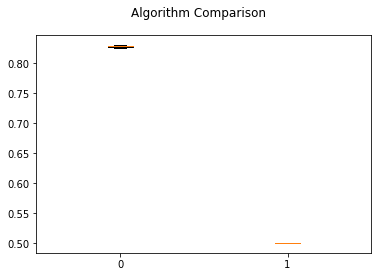

In [ ]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
# load dataset
numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
#le = preprocessing.LabelEncoder()
#label_encoder = le.fit(y)
#y = label_encoder.transform(y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)
block_size=int(round(X_train2.shape[0]/2))
n = block_size  #chunk row size
list_X_train = [X_train2[i:i+n] for i in range(0,X_train2.shape[0],n)]
list_y_train = [y_train2[i:i+n] for i in range(0,y_train2.shape[0],n)]
list_X_test = [X_test2[i:i+n] for i in range(0,X_test2.shape[0],n)]
list_y_test = [y_test2[i:i+n] for i in range(0,y_test2.shape[0],n)]
# Build the encoder

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                     ('LDA', LinearDiscriminantAnalysis())])).fit(list_X_train[0], list_y_train[0]))
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                     ('MLPClassifier',
                      MLPClassifier(hidden_layer_sizes=(10,10), max_iter=5, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=1))])).fit(list_X_train[1], list_y_train[1]))

# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name, model in enumerate(models):
    #kfold = model_selection.StratifiedKFold(n_splits=5, random_state=1)
    print('1')
    cv_results = model_selection.cross_val_score(model, list_X_train[name],  list_y_train[name], cv=5, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --quiet optuna
!pip install  catboost

     |████████████████████████████████| 235kB 2.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 163kB 9.2MB/s 
     |████████████████████████████████| 81kB 5.8MB/s 
     |████████████████████████████████| 81kB 6.1MB/s 
     |████████████████████████████████| 133kB 9.7MB/s 
     |████████████████████████████████| 112kB 14.5MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 66.1MB 49kB/s 


In [ ]:
import numpy as np
def check_target_type(dataframe):
  if type(dataframe[dataframe.columns[-1]][0])==str:
    from sklearn.preprocessing import LabelEncoder
    labelencoder = LabelEncoder()
    dataframe[dataframe.columns[-1]] = labelencoder.fit_transform(dataframe[dataframe.columns[-1]])  
    return dataframe,type(dataframe[dataframe.columns[-1]][0])
  elif type((dataframe[dataframe.columns[-1]].unique())[0])is np.int64 or int or np.int32:
    dataframe[dataframe.columns[-1]]=dataframe[dataframe.columns[-1]].astype(int)
    return dataframe ,type(dataframe[dataframe.columns[-1]][0])
  else:
    return dataframe,type(dataframe[dataframe.columns[-1]][0])

def trim_frist_col(dataframe):
  if dataframe.columns[0].startswith('Unnamed'):
    dataframe=dataframe[dataframe.columns[1:]]
    return dataframe   


In [ ]:
data1[data1.columns[-1]].unique()

array([0, 1])

In [ ]:
import numpy as np
type((data1[data1.columns[-1]].unique())[0])is np.int64 or int or np.int32

True

In [ ]:
data1,_=check_target_type(data1)
data1=trim_frist_col(data1)

In [ ]:
count_unique1=[]
for i in range(len(data1.columns)):
  if (data1[data1.columns[i]].nunique())<=7  :
     count_unique1.append([data1.columns[i],(data1[data1.columns[i]].nunique())])
                          
uu=[]
for i in range(len(count_unique1)):
  uu.append(count_unique1[i][0])

In [ ]:
count_unique2=[]
for i in range(len(data1.columns)):
  if (data1[data1.columns[i]].nunique())<=50  and (data1[data1.columns[i]].nunique())>7:
     count_unique2.append([data1.columns[i],(data1[data1.columns[i]].nunique())])
                          
aa=[]
for i in range(len(count_unique2)):
  aa.append(count_unique2[i][0])

In [ ]:
count_unique3=[]
for i in range(len(data1.columns)):
  if (data1[data1.columns[i]].nunique())>50:
     count_unique3.append([data1.columns[i],(data1[data1.columns[i]].nunique())])
                          
ff=[]
for i in range(len(count_unique3)):
  ff.append(count_unique3[i][0])


In [ ]:
! pip install category_encoders

In [ ]:
catorical_col=data1.select_dtypes(include='object')

In [ ]:
s1=[x for x in catorical_col if x in uu]
s2=[x for x in catorical_col if x in aa]
s3=[x for x in catorical_col if x in ff]
sl=s2+s3

In [ ]:
import category_encoders as ce
X = data1.iloc[:,:-1]  #independent columns
y=data1.iloc[:,-1]
ce_ord = ce.ordinal.OrdinalEncoder(cols = s1)
data2=ce_ord.fit_transform(X, y)
data2[data1.columns[-1]]=data1.iloc[:,-1]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data3=data2.fillna(0) 


In [ ]:
import numpy as np
numeric=data2.select_dtypes(include=[np.number]).columns
catorical=data1.select_dtypes(include='object').columns

In [ ]:
#numeric_columns = data112.select_dtypes(include=['number']).columns
data2[numeric]=data2[numeric].fillna(data2.median().iloc[0])
#cat_columns = data112.select_dtypes(exclude=['number']).columns
data2[catorical]=data2[catorical].fillna(data2.mode().iloc[0])

In [ ]:
data2.isnull().mean()

In [ ]:
data3=data2.sample(frac=.04,random_state=77)
len(data3)

213317

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
#from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
import category_encoders as ce
from sklearn.utils import resample
X = data3.drop(data3.columns[-1], axis=1)
y = data3.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
train, test = train_test_split(data3, test_size=0.2)

In [ ]:
len(data3)

1066583

In [ ]:
enc2=[ce.BinaryEncoder,ce.OrdinalEncoder,ce.PolynomialEncoder,ce.LeaveOneOutEncoder,ce.HashingEncoder,ce.BaseNEncoder,ce.MEstimateEncoder,ce.HelmertEncoder,
 ce.JamesSteinEncoder,ce.CatBoostEncoder,ce.OneHotEncoder,ce.BackwardDifferenceEncoder,ce.TargetEncoder,ce.GLMMEncoder,ce.SumEncoder,ce.WOEEncoder]

In [ ]:
def check_target_value(y_train,enc2):
  binary_enc=[ce.WOEEncoder]
  if  y_train.nunique()>2:
    return (list(set(enc2) - set(binary_enc)))
  else:
    return  enc2

In [ ]:
enc3=check_target_value(y_train,enc2)

In [ ]:
import random
import math
list_train=[]
for i in range(len(enc3)):
  list_train.append(train.sample(frac=1/len(enc3),random_state=99)) 
list_test=[]
for i in range(len(enc3)):
  list_test.append(test.sample(frac=1/len(enc3),random_state=33))

In [ ]:
import random
import math
list_X_train=[]
list_y_train=[]
for i in range(len(list_train)):
  list_X_train.append(list_train[i].drop(list_train[i].columns[-1], axis=1)) 
  list_y_train.append(list_train[i].iloc[:,-1]) 

list_X_test=[]
list_y_test=[]
for i in range(len(list_test)):
  list_X_test.append(list_test[i].drop(list_test[i].columns[-1], axis=1)) 
  list_y_test.append(list_test[i].iloc[:,-1]) 

In [ ]:
import category_encoders as ce
names_encoders=[]
for i, _ in enumerate(ce.__all__):
    names_encoders.append(str(ce.__all__[i])+"encoder")  
names_encoders    

['BackwardDifferenceEncoderencoder',
 'BinaryEncoderencoder',
 'HashingEncoderencoder',
 'HelmertEncoderencoder',
 'OneHotEncoderencoder',
 'OrdinalEncoderencoder',
 'SumEncoderencoder',
 'PolynomialEncoderencoder',
 'BaseNEncoderencoder',
 'LeaveOneOutEncoderencoder',
 'TargetEncoderencoder',
 'WOEEncoderencoder',
 'MEstimateEncoderencoder',
 'JamesSteinEncoderencoder',
 'CatBoostEncoderencoder',
 'GLMMEncoderencoder']

In [ ]:
training_numeric_dataset=[]
intermidate=[]
testing_numeric_dataset=[]
for i,encoder in enumerate(enc3):
     training_numeric_dataset.append(enc3[i](cols=s2))
     if enc3[i]==ce.glmm.GLMMEncoder:
        intermidate.append(training_numeric_dataset[i].fit_transform(X_train,y_train))
     else:
        intermidate.append(training_numeric_dataset[i].fit_transform(list_X_train[i],list_y_train[i]))

In [ ]:
 def test_ignored_columns_are_untouched(self):
        # Make sure None values in ignored columns are preserved.
        # See: https://github.com/scikit-learn-contrib/category_encoders/pull/261
       
        for encoder_name in (set(encoders.__all__)):
            with self.subTest(encoder_name=encoder_name):
                enc = getattr(encoders, encoder_name)(cols=s2)
                out = enc.fit_transform(X, y)
                self.assertTrue(out.col2[2] is None)

In [ ]:
xx=[]
for i in range(len(enc3)):
  if len(intermidate[i].columns)<=len(X_train.columns):
    xx.append(enc3[i])
xx

[category_encoders.ordinal.OrdinalEncoder,
 category_encoders.leave_one_out.LeaveOneOutEncoder,
 category_encoders.m_estimate.MEstimateEncoder,
 category_encoders.james_stein.JamesSteinEncoder,
 category_encoders.cat_boost.CatBoostEncoder,
 category_encoders.target_encoder.TargetEncoder,
 category_encoders.glmm.GLMMEncoder,
 category_encoders.woe.WOEEncoder]

In [ ]:
enc4=[i for i in enc3 if i  in xx]

In [ ]:
def check_imblanced(y_train):
  if (y_train.value_counts(normalize=True).values.min()<1/len(y_train.value_counts(normalize=True).values)*100) or (y_train.value_counts(normalize=True).values.max()>(len(y_train.value_counts(normalize=True).values)-1)/len(y_train.value_counts(normalize=True).values)*100):
    return True
  else:
    return False  

In [ ]:
len(data3)

799937

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

my_dict2={}
for i in range (len(enc4)):
  model = Pipeline(steps=[('preprocessor',enc4[i]()),('classifier',RandomForestClassifier())]) 
  y_score2 = model.fit(X_train,y_train)
  y_true2,y_pred2 =y_test, model.predict(X_test)
  if y_train.nunique()>2:
      if check_imblanced(y_train):
          my_dict2[enc4[i]]= [accuracy_score(y_test, y_pred2),precision_score(y_test, y_pred2, average='weighted'),
                           recall_score(y_test, y_pred2, average='weighted'),f1_score(y_test, y_pred2, average='weighted')]
      else:
        my_dict2[enc4[i]]= [accuracy_score(y_test, y_pred2),precision_score(y_test, y_pred2, average='macro'),
                           recall_score(y_test, y_pred2, average='macro'),f1_score(y_test, y_pred2, average='macro')]
  else:
     my_dict2[enc4[i]]= [accuracy_score(y_test, y_pred2),precision_score(y_test, y_pred2,average='binary'),
                           recall_score(y_test, y_pred2, average='binary'),f1_score(y_test, y_pred2, average='binary')]

In [ ]:
my_dict2={ce.cat_boost.CatBoostEncoder: [0.9998854083110227,
  0.9629629629629629,
  0.9961685823754789,
  0.9792843691148776],
 ce.glmm.GLMMEncoder: [0.999749981769504,
  0.979757085020243,
  0.9272030651340997,
  0.9527559055118111],
 ce.james_stein.JamesSteinEncoder: [0.9996353900805267,
  0.9870689655172413,
  0.8773946360153256,
  0.9290060851926977],
 ce.leave_one_out.LeaveOneOutEncoder: [0.9995728855229027,
  1.0,
  0.842911877394636,
  0.9147609147609148],
ce.m_estimate.MEstimateEncoder: [0.9996666423593387,
  0.9872340425531915,
  0.8888888888888888,
  0.9354838709677419],
 ce.ordinal.OrdinalEncoder: [0.9998749908847521,
  0.9662921348314607,
  0.9885057471264368,
  0.9772727272727273],
 ce.target_encoder.TargetEncoder: [0.9996353900805267,
  0.9870689655172413,
  0.8773946360153256,
  0.9290060851926977],
 ce.woe.WOEEncoder: [0.999749981769504,
  0.9647058823529412,
  0.9425287356321839,
  0.9534883720930232]}

In [ ]:
my_dict2={ce.cat_boost.CatBoostEncoder: [0.9999141943926035,
  0.9803439803439803,
  0.9803439803439803,
  0.9803439803439803],
 ce.glmm.GLMMEncoder: [0.9999141943926035,
  0.9803439803439803,
  0.9803439803439803,
  0.9803439803439803],
 ce.james_stein.JamesSteinEncoder: [0.9999088315421413,
  0.9802955665024631,
  0.9778869778869779,
  0.9790897908979089],
 ce.leave_one_out.LeaveOneOutEncoder: [0.9985466675247228,
  0.9927536231884058,
  0.3366093366093366,
  0.5027522935779817],
 ce.m_estimate.MEstimateEncoder: [0.9999141943926035,
  0.9803439803439803,
  0.9803439803439803,
  0.9803439803439803],
 ce.ordinal.OrdinalEncoder: [0.9999141943926035,
  0.9803439803439803,
  0.9803439803439803,
  0.9803439803439803],
 ce.target_encoder.TargetEncoder: [0.9999141943926035,
  0.9803439803439803,
  0.9803439803439803,
  0.9803439803439803],
 ce.woe.WOEEncoder: [0.9999195572430658,
  0.9827586206896551,
  0.9803439803439803,
  0.981549815498155]}

In [ ]:
my_dict2={ce.backward_difference.BackwardDifferenceEncoder: [0.9226832447725771,
  0.6793428096732509,
  0.12959571770671927,
  0.21766776092035608],
 ce.basen.BaseNEncoder: [0.9226744763808755,
  0.6791651274473587,
  0.12949006902380616,
  0.21750961254066847],
 ce.binary.BinaryEncoder: [0.9226394028140692,
  0.6781226903178122,
  0.1292435554303423,
  0.2171083767155703],
 ce.cat_boost.CatBoostEncoder: [0.9226890903670448,
  0.6789328426862925,
  0.1299478799830962,
  0.21814312317105614],
 ce.glmm.GLMMEncoder: [0.9226394028140692,
  0.6781226903178122,
  0.1292435554303423,
  0.2171083767155703],
 ce.hashing.HashingEncoder: [0.922730009528319,
  0.679625894003301,
  0.13051133962529934,
  0.21897249549469705],
 ce.helmert.HelmertEncoder: [0.9228556898093752,
  0.6842105263157895,
  0.1309339343569517,
  0.21980490688737808],
 ce.james_stein.JamesSteinEncoder: [0.9226072520444967,
  0.6766820276497696,
  0.12927877165798,
  0.21708406019928445],
 ce.leave_one_out.LeaveOneOutEncoder: [0.9228966089706493,
  0.6875,
  0.13015917734892238,
  0.21887954518536065],
 ce.m_estimate.MEstimateEncoder: [0.9227826198785285,
  0.6829539144919489,
  0.1299478799830962,
  0.218349655315246],
 ce.one_hot.OneHotEncoder: [0.9227241639338513,
  0.6809691141113372,
  0.12966615016199465,
  0.21785048664319734],
 ce.ordinal.OrdinalEncoder: [0.9226306344223676,
  0.677550267478325,
  0.1293492041132554,
  0.21722802140935032],
 ce.polynomial.PolynomialEncoder: [0.9225049541413114,
  0.6729143697170158,
  0.12896182560924074,
  0.21644305218984575],
 ce.sum_coding.SumEncoder: [0.9226306344223676,
  0.677550267478325,
  0.1293492041132554,
  0.21722802140935032],
 ce.target_encoder.TargetEncoder: [0.9226686307864078,
  0.6785187914517318,
  0.12970136638963234,
  0.2177743614001892],
 ce.woe.WOEEncoder: [0.9225049541413114,
  0.6729143697170158,
  0.12896182560924074,
  0.21644305218984575]}

In [ ]:
my_dict2

{category_encoders.backward_difference.BackwardDifferenceEncoder: [0.9999723535428935,
  1.0,
  0.9997907074089577,
  0.9998953427524857],
 category_encoders.basen.BaseNEncoder: [0.9999723535428935,
  1.0,
  0.9997907074089577,
  0.9998953427524857],
 category_encoders.binary.BinaryEncoder: [0.9999723535428935,
  1.0,
  0.9997907074089577,
  0.9998953427524857],
 category_encoders.cat_boost.CatBoostEncoder: [0.9999723535428935,
  1.0,
  0.9997907074089577,
  0.9998953427524857],
 category_encoders.glmm.GLMMEncoder: [0.9999723535428935,
  1.0,
  0.9997907074089577,
  0.9998953427524857],
 category_encoders.hashing.HashingEncoder: [0.9999723535428935,
  1.0,
  0.9997907074089577,
  0.9998953427524857],
 category_encoders.helmert.HelmertEncoder: [0.9999723535428935,
  1.0,
  0.9997907074089577,
  0.9998953427524857],
 category_encoders.james_stein.JamesSteinEncoder: [0.9999723535428935,
  1.0,
  0.9997907074089577,
  0.9998953427524857],
 category_encoders.leave_one_out.LeaveOneOutEncoder

In [ ]:
my_dict2

{category_encoders.cat_boost.CatBoostEncoder: [0.8777248873652568,
  0.875309689249976,
  0.8777248873652568,
  0.8736819121297492],
 category_encoders.glmm.GLMMEncoder: [0.8846540166386444,
  0.882726236118656,
  0.8846540166386444,
  0.8817810423131309],
 category_encoders.james_stein.JamesSteinEncoder: [0.8853236383751483,
  0.8834283136219793,
  0.8853236383751483,
  0.8824966087491329],
 category_encoders.leave_one_out.LeaveOneOutEncoder: [0.7086344811523316,
  0.6951653151704463,
  0.7086344811523316,
  0.6267277461978549],
 category_encoders.m_estimate.MEstimateEncoder: [0.885272688895197,
  0.8833924396527871,
  0.885272688895197,
  0.882402851412664],
 category_encoders.ordinal.OrdinalEncoder: [0.8823430937979926,
  0.8803072866180399,
  0.8823430937979926,
  0.8794725415953025],
 category_encoders.target_encoder.TargetEncoder: [0.8847923080842268,
  0.882847008876274,
  0.8847923080842268,
  0.8819104432327065]}

In [ ]:
my_dict2={ce.cat_boost.CatBoostEncoder: [0.8777248873652568,
  0.875309689249976,
  0.8777248873652568,
  0.8736819121297492],
 ce.glmm.GLMMEncoder: [0.8846540166386444,
  0.882726236118656,
  0.8846540166386444,
  0.8817810423131309],
 ce.james_stein.JamesSteinEncoder: [0.8853236383751483,
  0.8834283136219793,
  0.8853236383751483,
  0.8824966087491329],
 ce.leave_one_out.LeaveOneOutEncoder: [0.7086344811523316,
  0.6951653151704463,
  0.7086344811523316,
  0.6267277461978549],
 ce.m_estimate.MEstimateEncoder: [0.885272688895197,
  0.8833924396527871,
  0.885272688895197,
  0.882402851412664],
 ce.ordinal.OrdinalEncoder: [0.8823430937979926,
  0.8803072866180399,
  0.8823430937979926,
  0.8794725415953025],
 ce.target_encoder.TargetEncoder: [0.8847923080842268,
  0.882847008876274,
  0.8847923080842268,
  0.8819104432327065]}

In [ ]:
def check_gpu(my_dict2,devices=(-1,)):
  Accepted2=[] 
  for i in range(len(list(my_dict2.keys()))):
      if list(my_dict2.values())[i][0]>.80:
        Accepted2.append(list(my_dict2.keys())[i])
  device = devices[0]
  if device == -1:
        # use cpu
   return (list(set(Accepted2) - set([ce.CatBoostEncoder])))
  else:
   return  Accepted2

In [ ]:
Accepted3=check_gpu(my_dict2,devices=(-1,))
Accepted3

[category_encoders.ordinal.OrdinalEncoder,
 category_encoders.glmm.GLMMEncoder,
 category_encoders.james_stein.JamesSteinEncoder,
 category_encoders.m_estimate.MEstimateEncoder,
 category_encoders.target_encoder.TargetEncoder]

In [ ]:
Accepted2=[] 
for i in range(len(list(my_dict2.keys()))):
      if list(my_dict2.values())[i][0]>.80:
        Accepted2.append(list(my_dict2.keys())[i])
Accepted2       

[category_encoders.cat_boost.CatBoostEncoder,
 category_encoders.glmm.GLMMEncoder,
 category_encoders.james_stein.JamesSteinEncoder,
 category_encoders.leave_one_out.LeaveOneOutEncoder,
 category_encoders.m_estimate.MEstimateEncoder,
 category_encoders.ordinal.OrdinalEncoder,
 category_encoders.target_encoder.TargetEncoder,
 category_encoders.woe.WOEEncoder]

In [ ]:
def check_gpu(my_dict2,devices=(-1,)):
  Accepted2=[] 
  for i in range(len(list(my_dict2.keys()))):
      if list(my_dict2.values())[i][0]>.80:
        Accepted2.append(list(my_dict2.keys())[i])
  device = devices[0]
    if device == -1:
        # use cpu
    return (list(set(Accepted2) - set([ce.CatBoostEncoder])))
  else:
    return  Accepted2
        

[category_encoders.cat_boost.CatBoostEncoder,
 category_encoders.glmm.GLMMEncoder,
 category_encoders.james_stein.JamesSteinEncoder,
 category_encoders.m_estimate.MEstimateEncoder,
 category_encoders.ordinal.OrdinalEncoder,
 category_encoders.target_encoder.TargetEncoder]

In [ ]:
Accepted2=[ce.ordinal.OrdinalEncoder,
 ce.cat_boost.CatBoostEncoder,
 ce.james_stein.JamesSteinEncoder,
 ce.m_estimate.MEstimateEncoder,
 ce.glmm.GLMMEncoder,
 ce.target_encoder.TargetEncoder]

In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import warnings
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier,BaggingClassifier
import xgboost
from xgboost import XGBClassifier
import lightgbm as lgb
#{'clf': {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 27}}
#max_depth=7, max_features='auto', min_samples_leaf=2,
                       #min_samples_split=3,n_estimators=27,random_state = 0))
#DecisionTreeClassifier(max_depth=1),n_estimators=30,learning_rate=0.9949357616825972)) 
#max_depth=2,n_estimators=10,objective='binary:logistic'))
pipe1 = make_pipeline(Accepted[0](),BaggingClassifier(DecisionTreeClassifier()))
pipe2 = make_pipeline(Accepted[1](),HistGradientBoostingClassifier())
pipe3 = make_pipeline(Accepted[2](),XGBClassifier())
pipe4 = make_pipeline(Accepted[3](),RandomForestClassifier())
pipe5 = make_pipeline(Accepted[4](),lgb.LGBMClassifier())
pipe6 = make_pipeline(Accepted[5](),ExtraTreesClassifier(criterion= 'entropy'))
pipe7 = make_pipeline(Accepted[6](),AdaBoostClassifier())
lr = LogisticRegression(max_iter=50, class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7]
                          # ,use_probas=True,use_features_in_secondary=True,
                           ,meta_classifier=lr)
#sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7],meta_classifier=LogisticRegression())

model2=sclf2.fit(X_train, y_train)
y_true, y_pred  =y_test, model2.predict(X_test)
print("StackingClassifier score: %f" % accuracy_score(y_test, y_pred2))
print('precision_score: {0:.5f}'.format(precision_score(y_test, y_pred2, average='weighted')))
print('recall_score: {0:.5f}'.format(recall_score(y_test, y_pred2, average='weighted')))
print('f1_score: {0:.5f}'.format(f1_score(y_test, y_pred2, average='weighted')))


In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=[str(x) for x in sorted(list(y_train.unique())) ]    )  )


Accuracy: 0.89

Micro Precision: 0.89
Micro Recall: 0.89
Micro F1-score: 0.89

Macro Precision: 0.84
Macro Recall: 0.65
Macro F1-score: 0.71

Weighted Precision: 0.88
Weighted Recall: 0.89
Weighted F1-score: 0.88

Classification Report

              precision    recall  f1-score   support

           1       0.81      0.53      0.64      1592
           2       0.91      0.94      0.92    189942
           3       0.83      0.80      0.81     79266
           4       0.80      0.34      0.48      3982

    accuracy                           0.89    274782
   macro avg       0.84      0.65      0.71    274782
weighted avg       0.88      0.89      0.88    274782



In [ ]:
sl=s2+s3

In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score
import lightgbm as lgb
import numpy as np
import warnings
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
params={
   'HistGradientBoostingClassifier':{
  'l2_regularization': 0.0,
   'learning_rate': 0.029641454778718972,
   'max_bins': 60,
   'max_depth': 4,
   'max_iter': 45,
   'max_leaf_nodes': 20,
   'min_samples_leaf': 15,
   'n_iter_no_change': None,
   'tol': 1e-07,
   'validation_fraction': 0.1},
    
'RandomForestClassifier':{'criterion': 'entropy',
   'max_depth': 9,
   'max_features': 'auto',
   'min_samples_leaf': 6,
   'min_samples_split': 4,
   'n_estimators': 70},

}
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res
        ###########################################
#numeric_features =  X_train.select_dtypes(include=['int64', 'float64']).columns
pipe0 = make_pipeline(MinMaxScaler(copy=True, feature_range=(0, 1)))

pipe1 = make_pipeline(Accepted[0](),LinearDiscriminantAnalysis())
pipe2 = make_pipeline(Accepted[1](),HistGradientBoostingClassifier(**params['HistGradientBoostingClassifier'],random_state=1))
pipe3 = make_pipeline(Accepted[2](),lgb.LGBMClassifier())
pipe4 = make_pipeline(Accepted[3](),RandomForestClassifier(**params['RandomForestClassifier'],random_state=1))
pipe5 = make_pipeline(Accepted[4](),AdaBoostClassifier())
pipe6 = make_pipeline(Accepted[5](),ExtraTreesClassifier(criterion= 'entropy'))
pipe7 = make_pipeline(Accepted[6](),AdaBoostClassifier())
#preprocessor = ColumnTransformer( transformers=[('num', pipe0, numeric_features),('cat', [pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7], sl)],remainder='passthrough')
#clf = Pipeline(steps=[('preprocessor', preprocessor)])
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7], meta_classifier=LogisticRegression())

model3=sclf2.fit(X_train, y_train)
y_true1, y_pred1  =y_test, model3.predict(X_test)
print("StackingClassifier score: %f" % accuracy_score(y_test, y_pred1))
print('fbeta_score_macro: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='macro', beta=0.5)))
print('fbeta_score_micro: {0:.5f}'.format( fbeta_score(y_true1, y_pred1, average='micro', beta=0.5)  ))
print('fbeta_score_weighted: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='weighted', beta=0.5) ))
# fbeta_score(y_true, y_pred, average=None, beta=0.5)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



NameError: ignored

In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score
import lightgbm as lgb
import numpy as np
import warnings
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
params={
   'HistGradientBoostingClassifier':{
  'l2_regularization': 0.0,
   'learning_rate': 0.029641454778718972,
   'max_bins': 60,
   'max_depth': 4,
   'max_iter': 45,
   'max_leaf_nodes': 20,
   'min_samples_leaf': 15,
   'n_iter_no_change': None,
   'tol': 1e-07,
   'validation_fraction': 0.1},
    
'RandomForestClassifier':{'criterion': 'entropy',
   'max_depth': 9,
   'max_features': 'auto',
   'min_samples_leaf': 6,
   'min_samples_split': 4,
   'n_estimators': 70},

}
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res
        ###########################################
#numeric_features =  X_train.select_dtypes(include=['int64', 'float64']).columns
pipe0 = make_pipeline(MinMaxScaler(copy=True, feature_range=(0, 1)))

pipe1 = make_pipeline(Accepted[0](),LinearDiscriminantAnalysis())
pipe2 = make_pipeline(Accepted[1](),HistGradientBoostingClassifier(**params['HistGradientBoostingClassifier'],random_state=1))
pipe3 = make_pipeline(Accepted[2](),lgb.LGBMClassifier())
pipe4 = make_pipeline(Accepted[3](),RandomForestClassifier(**params['RandomForestClassifier'],random_state=1))
pipe5 = make_pipeline(Accepted[4](),AdaBoostClassifier())
pipe6 = make_pipeline(Accepted[5](),ExtraTreesClassifier(criterion= 'entropy'))
pipe7 = make_pipeline(Accepted[6](),AdaBoostClassifier())
#preprocessor = ColumnTransformer( transformers=[('num', pipe0, numeric_features),('cat', [pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7], sl)],remainder='passthrough')
#clf = Pipeline(steps=[('preprocessor', preprocessor)])
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7], meta_classifier=LogisticRegression())

model3=sclf2.fit(X_train, y_train)
y_true1, y_pred1  =y_test, model3.predict(X_test)
print("StackingClassifier score: %f" % accuracy_score(y_test, y_pred1))
print('fbeta_score_macro: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='macro', beta=0.5)))
print('fbeta_score_micro: {0:.5f}'.format( fbeta_score(y_true1, y_pred1, average='micro', beta=0.5)  ))
print('fbeta_score_weighted: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='weighted', beta=0.5) ))
# fbeta_score(y_true, y_pred, average=None, beta=0.5)

In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score
import lightgbm as lgb
import numpy as np
import warnings
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA 
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_transformer
from mlxtend.classifier import StackingCVClassifier


In [ ]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA 
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_transformer
from mlxtend.classifier import StackingCVClassifier

params={
   'HistGradientBoostingClassifier':{
  'l2_regularization': 0.0,
   'learning_rate': 0.029641454778718972,
   'max_bins': 60,
   'max_depth': 4,
   'max_iter': 45,
   'max_leaf_nodes': 20,
   'min_samples_leaf': 15,
   'n_iter_no_change': None,
   'tol': 1e-07,
   'validation_fraction': 0.1},
    
'RandomForestClassifier':{'criterion': 'entropy',
   'max_depth': 9,
   'max_features': 'auto',
   'min_samples_leaf': 6,
   'min_samples_split': 4,
   'n_estimators': 70},

}
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

###################################################################################
#, QuantileTransformer(n_quantiles=200, random_state=0),
#################################
cat_proc1 = make_pipeline( Accepted[0]()   )
cat_proc2 = make_pipeline( Accepted[1]()   )
cat_proc3 = make_pipeline( Accepted[2]()   )
cat_proc4 = make_pipeline( Accepted[3]()   )
cat_proc5 = make_pipeline( Accepted[4]()  )
cat_proc6 = make_pipeline( Accepted[5]()  )
#cat_proc7 = make_pipeline( Accepted[6](), QuantileTransformer(n_quantiles=200, random_state=0), PCA(n_components=4)   )
num_proc_nlin = make_pipeline( QuantileTransformer(n_quantiles=200, random_state=0),PCA(n_components=4))
numeric_features=X_train.select_dtypes(include=[np.number]).columns
# transformation to use for non-linear estimators
processor1 = make_column_transformer((cat_proc1, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
processor2 = make_column_transformer((cat_proc2, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
processor3 = make_column_transformer((cat_proc3, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
processor4 = make_column_transformer((cat_proc4, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
processor5 = make_column_transformer((cat_proc5, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
processor6 = make_column_transformer((cat_proc6, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
processor7 = make_column_transformer((cat_proc7, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
#######################################################################################################################

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
pipe1 = make_pipeline(processor1,LinearDiscriminantAnalysis())
pipe2 = make_pipeline(processor2,HistGradientBoostingClassifier(**params['HistGradientBoostingClassifier'],random_state=1))
pipe3 = make_pipeline(processor3,lgb.LGBMClassifier())
pipe4 = make_pipeline(processor4,RandomForestClassifier(**params['RandomForestClassifier'],random_state=1))
pipe5 = make_pipeline(processor5,AdaBoostClassifier())
pipe6 = make_pipeline(processor6,ExtraTreesClassifier(criterion= 'entropy'))
pipe7 = make_pipeline(processor6,AdaBoostClassifier())
estimators = [('pipe1', pipe1), ('pipe2', pipe2), ('pipe3', pipe3),('pipe4', pipe4),('pipe5', pipe5),('pipe6', pipe6),('pipe7', pipe7)]
lr = LogisticRegression(max_iter=50, class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
#sclf = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6],meta_classifier=lr)
sclf = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7],meta_classifier=lr)
model3=sclf.fit(X_train, y_train)
y_true1, y_pred1  =y_test, model3.predict(X_test)
print("StackingClassifier score: %f" % accuracy_score(y_test, y_pred1))
print('fbeta_score_macro: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='macro', beta=0.5)))
print('fbeta_score_micro: {0:.5f}'.format( fbeta_score(y_true1, y_pred1, average='micro', beta=0.5)  ))
print('fbeta_score_weighted: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='weighted', beta=0.5) ))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


StackingClassifier score: 0.802240
fbeta_score_macro: 0.41786
fbeta_score_micro: 0.80224
fbeta_score_weighted: 0.78636


In [ ]:
! pip  install catboost 

In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score
import lightgbm as lgb
import numpy as np
import warnings
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA 
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_transformer
from mlxtend.classifier import StackingCVClassifier
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
import xgboost
from xgboost import XGBClassifier
import lightgbm as lgb

In [ ]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA 
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_transformer
from mlxtend.classifier import StackingCVClassifier
from sklearn.preprocessing import MinMaxScaler

params={
   'HistGradientBoostingClassifier':{
  'l2_regularization': 0.0,
   'learning_rate': 0.029641454778718972,
   'max_bins': 60,
   'max_depth': 4,
   'max_iter': 45,
   'max_leaf_nodes': 20,
   'min_samples_leaf': 15,
   'n_iter_no_change': None,
   'tol': 1e-07,
   'validation_fraction': 0.1},
    
'RandomForestClassifier':{'criterion': 'entropy',
   'max_depth': 9,
   'max_features': 'auto',
   'min_samples_leaf': 6,
   'min_samples_split': 4,
   'n_estimators': 70},

}
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

###################################################################################
#, QuantileTransformer(n_quantiles=200, random_state=0),
#################################
cat_proc1 = make_pipeline( Accepted[0](), MinMaxScaler()   )
cat_proc2 = make_pipeline( Accepted[1](), MinMaxScaler()   )
cat_proc3 = make_pipeline( Accepted[2](), MinMaxScaler()   )
cat_proc4 = make_pipeline( Accepted[3](), MinMaxScaler()   )
cat_proc5 = make_pipeline( Accepted[4](), MinMaxScaler()  )
cat_proc6 = make_pipeline( Accepted[5](), MinMaxScaler()  )
#cat_proc7 = make_pipeline( Accepted[6](), QuantileTransformer(n_quantiles=200, random_state=0), PCA(n_components=4)   )
num_proc_nlin = make_pipeline( MinMaxScaler(),PCA(n_components=6))
numeric_features=X_train.select_dtypes(include=[np.number]).columns
# transformation to use for non-linear estimators
processor1 = make_column_transformer((cat_proc1, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
processor2 = make_column_transformer((cat_proc2, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
processor3 = make_column_transformer((cat_proc3, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
processor4 = make_column_transformer((cat_proc4, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
processor5 = make_column_transformer((cat_proc5, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
processor6 = make_column_transformer((cat_proc6, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
processor7 = make_column_transformer((cat_proc7, sl),(num_proc_nlin, numeric_features),remainder='passthrough')

#######################################################################################################################

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
pipe1 = make_pipeline(processor1,LinearDiscriminantAnalysis())
pipe2 = make_pipeline(processor2,HistGradientBoostingClassifier(**params['HistGradientBoostingClassifier'],random_state=1))
pipe3 = make_pipeline(processor3,lgb.LGBMClassifier())
pipe4 = make_pipeline(processor4,RandomForestClassifier(**params['RandomForestClassifier'],random_state=1))
pipe5 = make_pipeline(processor5,AdaBoostClassifier())
pipe6 = make_pipeline(processor6,ExtraTreesClassifier(criterion= 'entropy'))
pipe7 = make_pipeline(processor6,AdaBoostClassifier())
estimators = [('pipe1', pipe1), ('pipe2', pipe2), ('pipe3', pipe3),('pipe4', pipe4),('pipe5', pipe5),('pipe6', pipe6),('pipe7', pipe7)]
lr = LogisticRegression(max_iter=50, class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
#sclf = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6],meta_classifier=lr)
sclf = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7],meta_classifier=lr)
model3=sclf.fit(X_train, y_train)
y_true1, y_pred1  =y_test, model3.predict(X_test)
print("StackingClassifier score: %f" % accuracy_score(y_test, y_pred1))
print('fbeta_score_macro: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='macro', beta=0.5)))
print('fbeta_score_micro: {0:.5f}'.format( fbeta_score(y_true1, y_pred1, average='micro', beta=0.5)  ))
print('fbeta_score_weighted: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='weighted', beta=0.5) ))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


StackingClassifier score: 0.802385
fbeta_score_macro: 0.38393
fbeta_score_micro: 0.80239
fbeta_score_weighted: 0.78636


In [ ]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA 
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_transformer
from mlxtend.classifier import StackingCVClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer
from hyperopt.pyll import scope as ho_scope 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from hyperopt.pyll import scope as ho_scope                                       
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
import numpy as np
from hyperopt.pyll.stochastic import sample as ho_sample
from functools import partial
import xgboost as xgb
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
params={
   'HistGradientBoostingClassifier':{
  'l2_regularization': 0.0,
   'learning_rate': 0.029641454778718972,
   'max_bins': 60,
   'max_depth': 4,
   'max_iter': 45,
   'max_leaf_nodes': 20,
   'min_samples_leaf': 15,
   'n_iter_no_change': None,
   'tol': 1e-07,
   'validation_fraction': 0.1},
    
'RandomForestClassifier':{'criterion': 'entropy',
   'max_depth': 9,
   'max_features': 'auto',
   'min_samples_leaf': 6,
   'min_samples_split': 4,
   'n_estimators': 70},

'ExtraTreesClassifier':
            {
                'max_depth': ho_scope.int(hp.quniform('c4_max_depth', 5, 20, 1)),
                'n_estimators': ho_scope.int(hp.quniform('c4_n_estimators', 5, 30, 1)),
                'max_features': ho_scope.int(hp.quniform('c4_max_features', 5, 20, 1)),
                'criterion': hp.choice('c4_criterion', ['gini', 'entropy']),
                'min_samples_split': ho_scope.int(hp.quniform('c4_min_samples_split', 2, 5,1)),
                'min_samples_leaf': ho_scope.int(hp.quniform('c4_min_samples_leaf', 2, 5,1))
       },
          'AdaBoostClassifier':
   {
         'base_estimator':hp.choice('base_estimator', [DecisionTreeClassifier()]),
          'learning_rate': hp.loguniform('c5_learning_rate', np.log(0.01), np.log(1)),
          'n_estimators': ho_scope.int(hp.quniform('c5_n_estimators', 10, 80, 10)),
          'algorithm': hp.choice('c5_algorithm',["SAMME"])  
       },
       'XGBClassifier':
    {
         'n_estimators': ho_scope.int(hp.quniform('n_estimators', 100, 1000, 100)),
        'eta':ho_scope.float(hp.quniform('eta', 0.025, 0.5, 0.025)) ,
        'max_depth':ho_scope.int( hp.quniform('max_depth', 2, 14,2)) ,
        'min_child_weight':ho_scope.int(hp.quniform('min_child_weight', 1, 6, 1)) ,
        'subsample':ho_scope.float(hp.quniform('subsample', 0.5, 1.0, 0.05)),
        'gamma':ho_scope.float( hp.quniform('gamma', 0.5, 1, 0.05)) ,
        'colsample_bytree': ho_scope.float(hp.quniform('colsample_bytree', 0.5, 1, 0.05)),
        'eval_metric': 'auc',
        'objective': 'binary:logistic',
         'nthread': 10,
        'booster': 'gbtree',
        'tree_method': 'exact',
        'silent': 1,
       
       },
 }

def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

###################################################################################
#, QuantileTransformer(n_quantiles=200, random_state=0),
#################################
cat_proc1 = make_pipeline( Accepted2[0]())
cat_proc2 = make_pipeline( Accepted2[1]()  )
cat_proc3 = make_pipeline( Accepted2[2]()   )
cat_proc4 = make_pipeline( Accepted2[3]()  )
cat_proc5 = make_pipeline( Accepted2[4]()  )
cat_proc6 = make_pipeline( Accepted2[5]()  )
#cat_proc7 = make_pipeline( Accepted[6]())#, QuantileTransformer(n_quantiles=200, random_state=0), PCA(n_components=4)   )
num_proc_nlin0 = make_pipeline( PowerTransformer(),PCA(n_components=5))
num_proc_nlin1 = make_pipeline( QuantileTransformer(n_quantiles=400, random_state=0),PCA(n_components=4))
num_proc_nlin2 = make_pipeline( Normalizer(),PCA(n_components=4))
num_proc_nlin3 = make_pipeline( MinMaxScaler(),PCA(n_components=4))
numeric_features=X_train.select_dtypes(include=[np.number]).columns
# transformation to use for non-linear estimators
processor1 = make_column_transformer((make_pipeline( Accepted2[0]()), sl),remainder='passthrough')
processor2 = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough')
processor3 = make_column_transformer((make_pipeline( Accepted2[2]()), sl),remainder='passthrough')
processor4 = make_column_transformer((make_pipeline( Accepted2[3]()), sl),remainder='passthrough')
processor5 = make_column_transformer((make_pipeline( Accepted2[4]()), sl),remainder='passthrough')
processor6 = make_column_transformer((make_pipeline( Accepted2[5]()), sl),remainder='passthrough')
#processor7 = make_column_transformer((cat_proc7, sl),remainder='passthrough')

#######################################################################################################################

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
pipe1 = make_pipeline(processor1,LinearDiscriminantAnalysis())
pipe2 = make_pipeline(processor2,HistGradientBoostingClassifier(**params['HistGradientBoostingClassifier'],random_state=1))
pipe3 = make_pipeline(processor3,lgb.LGBMClassifier())
pipe4 = make_pipeline(processor4,RandomForestClassifier(**params['RandomForestClassifier'],random_state=1))
pipe5 = make_pipeline(processor5,AdaBoostClassifier())
pipe6 = make_pipeline(processor6,ExtraTreesClassifier(criterion= 'entropy'))
#pipe7 = make_pipeline(processor6,AdaBoostClassifier())
estimators = [('pipe1', pipe1), ('pipe2', pipe2), ('pipe3', pipe3),('pipe4', pipe4),('pipe5', pipe5),('pipe6', pipe6)]
lr = LogisticRegression(max_iter=50, class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
sclf = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6],meta_classifier=lr)
#sclf2 = StackingClassifier(classifiers=[pipe2,pipe3,pipe4],meta_classifier=lr)
model4=sclf.fit(X_train, y_train)
y_true1, y_pred1  =y_test, model4.predict(X_test)
print("StackingClassifier score: %f" % accuracy_score(y_test, y_pred1))
print('fbeta_score_macro: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='macro', beta=0.5)))
print('fbeta_score_micro: {0:.5f}'.format( fbeta_score(y_true1, y_pred1, average='micro', beta=0.5)  ))
print('fbeta_score_weighted: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='weighted', beta=0.5) ))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


StackingClassifier score: 0.859787
fbeta_score_macro: 0.68465
fbeta_score_micro: 0.85979
fbeta_score_weighted: 0.85440


In [ ]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA 
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_transformer
from mlxtend.classifier import StackingCVClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer
params={
   'HistGradientBoostingClassifier':{
  'l2_regularization': 0.0,
   'learning_rate': 0.029641454778718972,
   'max_bins': 60,
   'max_depth': 4,
   'max_iter': 45,
   'max_leaf_nodes': 20,
   'min_samples_leaf': 15,
   'n_iter_no_change': None,
   'tol': 1e-07,
   'validation_fraction': 0.1},
    
'RandomForestClassifier':{'criterion': 'entropy',
   'max_depth': 9,
   'max_features': 'auto',
   'min_samples_leaf': 6,
   'min_samples_split': 4,
   'n_estimators': 70},

}
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

###################################################################################
#, QuantileTransformer(n_quantiles=200, random_state=0),
#################################
# transformation to use for non-linear estimators
processor1 = make_column_transformer((make_pipeline( Accepted2[0]()), sl),remainder='passthrough')
processor2 = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough')
processor3 = make_column_transformer((make_pipeline( Accepted2[2]()), sl),remainder='passthrough')
processor4 = make_column_transformer((make_pipeline( Accepted2[3]()), sl),remainder='passthrough')
processor5 = make_column_transformer((make_pipeline( Accepted2[4]()), sl),remainder='passthrough')
processor6 = make_column_transformer((make_pipeline( Accepted2[5]()), sl),remainder='passthrough')
#processor7 = make_column_transformer((cat_proc7, sl),remainder='passthrough')

#######################################################################################################################

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
pipe1 = make_pipeline(processor1,RandomForestClassifier(**params['RandomForestClassifier'],random_state=1))
pipe2 = make_pipeline(processor2,HistGradientBoostingClassifier(**params['HistGradientBoostingClassifier'],random_state=1))
pipe4 = make_pipeline(processor4,RandomForestClassifier(**params['RandomForestClassifier'],random_state=1))
pipe5 = make_pipeline(processor5,RandomForestClassifier(**params['RandomForestClassifier'],random_state=1))
pipe6 = make_pipeline(processor6,ExtraTreesClassifier(criterion= 'entropy'))
#pipe7 = make_pipeline(processor6,AdaBoostClassifier())
estimators = [('pipe1', pipe1), ('pipe2', pipe2), ('pipe3', pipe3),('pipe4', pipe4),('pipe5', pipe5),('pipe6', pipe6)]
lr = LogisticRegression(max_iter=50, class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
sclf = StackingClassifier(classifiers=[pipe1,pipe2,pipe4,pipe5,pipe6],meta_classifier=lr)
#sclf2 = StackingClassifier(classifiers=[pipe2,pipe3,pipe4],meta_classifier=lr)
model4=sclf.fit(X_train, y_train)
y_true1, y_pred1  =y_test, model4.predict(X_test)
print("StackingClassifier score: %f" % accuracy_score(y_test, y_pred1))
print('fbeta_score_macro: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='macro', beta=0.5)))
print('fbeta_score_micro: {0:.5f}'.format( fbeta_score(y_true1, y_pred1, average='micro', beta=0.5)  ))
print('fbeta_score_weighted: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='weighted', beta=0.5) ))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



StackingClassifier score: 0.860082
fbeta_score_macro: 0.68208
fbeta_score_micro: 0.86008
fbeta_score_weighted: 0.85454


In [ ]:
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from hyperopt.pyll import scope as ho_scope                                       
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from hyperopt.pyll.stochastic import sample as ho_sample
from functools import partial
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
param_hyperopt2= {
  'RandomForestClassifier': 
            {
            'max_depth': ho_scope.int(hp.quniform('c2_max_depth', 2, 13, 5)),
            'n_estimators': ho_scope.int(hp.quniform('c2_n_estimators', 10, 100, 15)),
             # 'max_features': hp.choice('c2_max_features', ['auto', 'sqrt']),
            'max_features': ho_scope.int(hp.quniform('c2_max_features', 5, 15, 3)),
            'criterion': hp.choice('c2_criterion', ['gini', 'entropy']),
            'min_samples_split': ho_scope.int(hp.quniform('c2_min_samples_split', 3, 15,5)),
            'min_samples_leaf': ho_scope.int(hp.quniform('c2_min_samples_leaf', 3, 15,5))
                          
         } 
} 
   
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

def f_clf2(params):
  processor6 = make_column_transformer((make_pipeline( Accepted2[0]()), sl),remainder='passthrough')
  model4 = make_pipeline(processor6,RandomForestClassifier(**f_unpack_dict(params['RandomForestClassifier'])))
  #model4 =Pipeline(steps=[('encoder',ce.cat_boost.CatBoostEncoder()),('RandomForestClassifier',
                                                                  #    RandomForestClassifier(**f_unpack_dict(params['RandomForestClassifier'])))])
  return model4    

def objective_function(params,X_train, y_train):
    model=f_clf2(params)
    score = cross_val_score(model, X_train, y_train, cv=5,scoring='roc_auc', n_jobs=-1).mean()
    return {'loss': -score, 'status': STATUS_OK}  

trials = Trials()
best_clf2 = fmin(partial(objective_function, X_train=X_train, y_train=y_train),
                 param_hyperopt2, algo=tpe.suggest, max_evals=10,trials=trials, rstate=np.random.RandomState(1))
clf2 = f_clf2(space_eval(param_hyperopt2, best_clf2)).fit(X_train, y_train)
# Calculating performance on validation set
y_true, y_pred  =y_test, model4.predict(X_test)
clf2_val_score =accuracy_score(y_test, y_pred)
#clf2_val_score = model_selection.cross_val_score(f_clf2, X_train2,  y_train2, cv=5, scoring='roc_auc')
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.\
      format(-trials.best_trial['result']['loss'], clf2_val_score))
#print('Best parameters:')
#print(
a2=space_eval(param_hyperopt2, best_clf2)
Se_classifier={'classifier':list(a2.keys())[0],'Cross-val score':-trials.best_trial['result']['loss'],'validation score':clf2_val_score,'parameters':list(a2.values())[0]}

  0%|          | 0/10 [03:01<?, ?it/s, best loss: ?]


ValueError: ignored

In [ ]:
   numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
!pip install optuna

     |████████████████████████████████| 235kB 2.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.1MB 8.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 81kB 7.6MB/s 
     |████████████████████████████████| 81kB 8.2MB/s 
     |████████████████████████████████| 112kB 18.6MB/s 
     |████████████████████████████████| 133kB 14.8MB/s 
     |████████████████████████████████| 51kB 7.2MB/s 
  Created wheel for optuna: filename=optuna-2.1.0-cp36-none-any.whl size=321090 sha256=34a46e792fbb8f42bdbdfa138b6c0c05b27d63dd43a6b313bcf213a47bc2d600
  Stored in directory: /root/.cache/pip/wheels/9f/25/24/a165483933b5eefbf4f93c85f3188dc696cbb38620b73ad713
  Created wheel for alembic: filename=alembic-1.4.2-cp36-none-any.whl size=159540 sha256=924525a5bf702902

In [ ]:
# Categorical parameter
optimizer = trial.suggest_categorical('optimizer', ['MomentumSGD', 'Adam'])

# Int parameter
num_layers = trial.suggest_int('num_layers', 1, 3)

# Uniform parameter
dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 1.0)

# Loguniform parameter
learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)

# Discrete-uniform parameter
drop_path_rate = trial.suggest_discrete_uniform('drop_path_rate', 0.0, 1.0, 0.1)

In [ ]:
from optuna import Trial
def objective(trial: Trial, fast_check=True, target_meter=0, return_info=False):
    folds = 5
    seed = 666
    shuffle = False
    kf = KFold(n_splits=folds, shuffle=shuffle, random_state=seed)

    X_train, y_train = create_X_y(train_df, target_meter=target_meter)
    y_valid_pred_total = np.zeros(X_train.shape[0])
    gc.collect()
    print('target_meter', target_meter, X_train.shape)

    cat_features = [X_train.columns.get_loc(cat_col) for cat_col in category_cols]
    print('cat_features', cat_features)
    models = []
    valid_score = 0
    for train_idx, valid_idx in kf.split(X_train, y_train):
        train_data = X_train.iloc[train_idx,:], y_train[train_idx]
        valid_data = X_train.iloc[valid_idx,:], y_train[valid_idx]

        print('train', len(train_idx), 'valid', len(valid_idx))
    #     model, y_pred_valid, log = fit_cb(train_data, valid_data, cat_features=cat_features, devices=[0,])
        model, y_pred_valid, log = fit_lgbm(trial, train_data, valid_data, cat_features=category_cols,
                                            num_rounds=1000)
        y_valid_pred_total[valid_idx] = y_pred_valid
        models.append(model)
        gc.collect()
        valid_score += log["valid/l2"]
        if fast_check:
            break
    valid_score /= len(models)
    if return_info:
        return valid_score, models, y_pred_valid, y_train
    else:
        return valid_score

In [ ]:
import lightgbm as lgb
def train_lgbm(data,target,cat_features):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    def objective_lgbm(trial):
        metric = 'l2'
        params={
            'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1),
            'learning_rate':trial.suggest_loguniform('learning_rate', 0.02, 0.23),
            'max_depth': int(trial.suggest_float('max_depth', 1, 90, log=True)),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
            'n_estimators':trial.suggest_int('n_estimators', 2, 250),  
            'num_leaves':trial.suggest_int('num_leaves', 2, 250),
            'early_stopping_round':trial.suggest_int('early_stopping_round', 1, 100),
            'scale_pos_weight': trial.suggest_int('scale_pos_weight', 1, 100),
            'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1),
            'reg_alpha': trial.suggest_uniform('reg_alpha', 0.1, 0.7),
            'reg_lambda': trial.suggest_uniform('reg_lambda', 0.1, 0.7),
            'subsample_freq': trial.suggest_int('subsample_freq', 4, 15),
            "boosting": "gbdt",
                  }
        #early_stop = 20
        #verbose_eval = 20
        d_train = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_features)
        d_valid = lgb.Dataset(X_test, label=y_test, categorical_feature=cat_features)
        watchlist = [d_train, d_valid]
        model = lgb.train(params,train_set=d_train, num_boost_round=5,categorical_feature=cat_features,valid_sets=watchlist, verbose_eval=5, early_stopping_rounds=5)
        # lgb.train(params, X_train,y_train,X_test,y_test,categorical_feature=cat_features)       
        y_pred_valid = model.predict(X_test)# ,num_iteration=lgb.best_iteration)
        return accuracy_score(y_test, y_pred_valid)

    study = optuna.create_study(direction='maximize')
    study.optimize(objective_lgbm, n_trials=4)
    trial = study.best_trial
    results={'model':type(LGBMClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
res2=train_lgbm(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]],sl)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning:

Found `early_stopping_round` in params. Will use it instead of argument

[W 2020-08-24 19:22:23,898] Trial 0 failed because of the following error: ValueError('DataFrame.dtypes for data must be int, float or bool.\nDid not expect the data types in fields City, County, State, Wind_Direction, Weather_Condition',)
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/optuna/study.py", line 709, in _run_trial
    result = func(trial)
  File "<ipython-input-80-05c21e83b280>", line 26, in objective_lgbm
    model = lgb.train(params,train_set=d_train, num_boost_round=5,categorical_feature=cat_features,valid_sets=watchlist, verbose_eval=5, early_stopping_rounds=5)
  File "/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py", line 197, in train
 

ValueError: ignored

In [ ]:
!pip install --quiet optuna
!pip install  catboost

In [ ]:
!pip install  catboost

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from catboost import CatBoostClassifier, Pool, cv
from optuna.samplers import TPESampler
def objective2(trial):
    iris =  datasets.load_iris()
    #n_estimators=trial.suggest_int('n_estimators', 2, 200) 
    #max_depth = int(trial.suggest_float('max_depth', 1, 30, log=True))
    #min_child_weight = trial.suggest_int('min_child_weight', 5, 30)
    #learning_rate=trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    #scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 30)
    #subsample = trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1)
    #min_split_loss=trial.suggest_int('min_split_loss', 5, 80)
    #colsample_bytree = trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1)
    #tree_method='hist'
    #Objective='softmax'  
    #max_iter= trial.suggest_int('max_iter', 100, 300)
    #max_bins= trial.suggest_int('max_bins', 200, 400)
    #learning_rate= 0.1
    ##max_depth= int(trial.suggest_float('max_depth', 25, 75, log=True))
    #l2_regularization= 1.5
  
    clf =   CatBoostClassifier(iterations=50, random_seed=42, logging_level='Silent')
    return cross_val_score(clf, iris.data, iris.target, n_jobs=-1, cv=3).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective2, n_trials=10)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2020-08-06 15:38:36,658] Trial 0 finished with value: 0.9666666666666667 and parameters: {}. Best is trial 0 with value: 0.9666666666666667.
[I 2020-08-06 15:38:37,783] Trial 1 finished with value: 0.9666666666666667 and parameters: {}. Best is trial 0 with value: 0.9666666666666667.
[I 2020-08-06 15:38:37,928] Trial 2 finished with value: 0.9666666666666667 and parameters: {}. Best is trial 0 with value: 0.9666666666666667.
[I 2020-08-06 15:38:38,066] Trial 3 finished with value: 0.9666666666666667 and parameters: {}. Best is trial 0 with value: 0.9666666666666667.
[I 2020-08-06 15:38:38,208] Trial 4 finished with value: 0.9666666666666667 and parameters: {}. Best is trial 0 with value: 0.9666666666666667.
[I 2020-08-06 15:38:38,339] Trial 5 finished with value: 0.9666666666666667 and parameters: {}. Best is trial 0 with value: 0.9666666666666667.
[I 2020-08-06 15:38:38,476] Trial 6 finished with value: 0.9666666666666667 and parameters: {}. Best is trial 0 with value: 0.9666666666

Accuracy: 0.9666666666666667
Best hyperparameters: {}


In [ ]:
import sklearn.svm
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from optuna.samplers import TPESampler
sampler = TPESampler(seed=10)
def objective(trial):
    iris = sklearn.datasets.load_iris()

    classifier = trial.suggest_categorical('classifier', ['RandomForest', 'SVC'])
    
    if classifier == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 2, 20)
        max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
        

        clf = sklearn.ensemble.RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth)
    else:
        c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True)
        
        clf = sklearn.svm.SVC(C=c, gamma='auto')

    return sklearn.model_selection.cross_val_score(
        clf, iris.data, iris.target, n_jobs=-1, cv=3).mean()

study = optuna.create_study(direction='maximize')#,sampler=sampler)
study.optimize(objective, n_trials=50)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.9866666666666667
Best hyperparameters: {'classifier': 'SVC', 'svc_c': 4.074484240331621}


In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
optuna.visualization.plot_contour(study, #params=['n_estimators', 'max_depth'])

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
def objective(trial):
    
    classifier = trial.suggest_categorical('classifier', ['RandomForest', 'LGBMClassifier'])
    data, target = data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]]
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    #my_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
    if classifier == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 2, 100)
        max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
        max_features = trial.suggest_uniform('max_features', 0.15, 1.0)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 14)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 14)
        max_samples = trial.suggest_uniform('max_samples', 0.6, 0.99)

        clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                             max_features=max_features,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_samples=max_samples)
        
        model4 = make_pipeline(preprocessor,clf)
        #model4.fit(X_train,y_train)

    elif classifier == 'LGBMClassifier':      
      boosting_type="gbdt"
      colsample_bytree = trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1)
      learning_rate=trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
      max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
      min_child_weight = trial.suggest_int('min_child_weight', 1, 20)
      n_estimators=trial.suggest_int('n_estimators', 2, 200)  
      num_leaves=trial.suggest_int('num_leaves', 2, 150)
      #num_iterations=trial.suggest_int('num_iterations', 100, 500)
      early_stopping_round=trial.suggest_int('early_stopping_round', 1, 100)
      scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 100)
      subsample = trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1)
      
      clf = lgb.LGBMClassifier(boosting_type=boosting_type,colsample_bytree=colsample_bytree,learning_rate=learning_rate,max_depth=max_depth,
               min_child_weight=min_child_weight,n_estimators=n_estimators,num_leaves=num_leaves,subsample=subsample,scale_pos_weight=scale_pos_weight)
               # objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,subsample_for_bin=200000, subsample_freq=0
               
      model4 = make_pipeline(preprocessor,clf)
      #model4 = Pipeline([('my_pipeline', my_pipeline),('clf',clf)])
      #model4.fit(dtrain, clf__early_stopping_rounds=20, clf__eval_set=[dtest])

      model4.fit(X_train,y_train)
      y_true, y_pred  =y_test, model4.predict(X_test)
      return accuracy_score(y_test, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=3)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))


In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import lightgbm as lgb
import optuna, os, uuid, pickle

def train_RandomForest(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_RandomForest(trial):
        # set UUID
        #trial_uuid = str(uuid.uuid4())
        #trial.set_user_attr("uuid", trial_uuid)
        params={
                'n_estimators': trial.suggest_int('n_estimators', 25,250),
                #max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
                'max_features':trial.suggest_uniform('max_features', 0.15, 1.0),
                'min_samples_split':trial.suggest_int('min_samples_split', 2, 14),
                'min_samples_leaf':trial.suggest_int('min_samples_leaf', 1, 14),
                'max_samples':trial.suggest_uniform('max_samples', 0.6, 0.99),
                }   
        clf = sklearn.ensemble.RandomForestClassifier(**params)
            
        model4 = make_pipeline(preprocessor,clf)
        model4.fit(X_train,y_train)
        y_true, y_pred  =y_test, model4.predict(X_test)
        return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize')
    study.optimize(objective_RandomForest, n_trials=1)
    trial = study.best_trial
    results={'model':type(RandomForestClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
results={
    'model':RandomForestClassifier(),
    'val':0.8935083084044806,
    'params':{
              'max_features': 0.7636087471732836,
              'max_samples': 0.8370319664783468,
              'min_samples_leaf': 12,
              'min_samples_split': 3,
              'n_estimators': 62},
      'b' :None,  
   }
results

{'b': None,
 'model': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 'params': {'max_features': 0.7636087471732836,
  'max_samples': 0.8370319664783468,
  'min_samples_leaf': 12,
  'min_samples_split': 3,
  'n_estimators': 62},
 'val': 0.8935083084044806}

In [ ]:
param={'n_estimators': 243, 'max_features': 0.6501457272881765, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_samples': 0.7793955807978692}
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,type(results['model'])(**results['params']))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8946182792177071


In [ ]:
frist={}
frist[calsifier]=val
frist.update(pram)

NameError: ignored

In [ ]:
d = {}
for x in range(1, 10):
    d["calssifier{0}".format(x)] = " "

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import lightgbm as lgb
import optuna, os, uuid, pickle

def train_LGBMClassifier(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_LGBMClassifier(trial):
      params={
            'boosting_type':"gbdt",
            'colsample_bytree':trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1),
            'learning_rate':trial.suggest_loguniform('learning_rate', 0.02, 0.23),
            'max_depth': int(trial.suggest_float('max_depth', 1, 90, log=True)),
            'min_child_weight':trial.suggest_int('min_child_weight', 1, 20),
            'n_estimators':trial.suggest_int('n_estimators', 2, 250),  
            'num_leaves':trial.suggest_int('num_leaves', 2, 250),
            #num_iterations=trial.suggest_int('num_iterations', 100, 500)
            #'early_stopping_round':trial.suggest_int('early_stopping_round', 1, 100),
            'scale_pos_weight': trial.suggest_int('scale_pos_weight', 1, 100),
            'subsample':trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1),
            'reg_alpha':trial.suggest_uniform('reg_alpha', 0.1, 0.7),
            'reg_lambda':trial.suggest_uniform('reg_lambda', 0.1, 0.7),
            'subsample_freq':trial.suggest_int('subsample_freq', 4, 15),
          #lgbc__learning_rate = trial.suggest_loguniform('learning_rate', 0.02, 0.23)
          #lgbc__max_depth = trial.suggest_int('max_depth', 35, 90)
          #lgbc__num_leaves = trial.suggest_int('num_leaves', 140, 250)
          #lgbc__min_data_in_leaf = trial.suggest_int('min_data_in_leaf', 5, 80)
          #lgbc__feature_fraction = trial.suggest_uniform('feature_fraction', 0.6, 1.0)
          #lgbc__subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
          #lgbc__min_child_samples = trial.suggest_int('min_child_samples', 30, 90)
          #lgbc__subsample_freq = trial.suggest_int('subsample_freq', 4, 15)
          #lgbc__reg_alpha = trial.suggest_uniform('reg_alpha', 0.1, 0.7)
          #lgbc__reg_lambda = trial.suggest_uniform('reg_lambda', 0.1, 0.7)
          #lgbc__colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.3, 0.8)  
               }
      clf = lgb.LGBMClassifier(**params)
               # objective=None, random_state=None,  silent=True,subsample_for_bin=200000, 
      #lgbmPruningCallback = optuna.integration.LightGBMPruningCallback(trial)             
      model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
      model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
      y_true, y_pred  =y_test, model4.predict(X_test)
      return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_warmup_steps=10))
    study.optimize(objective_LGBMClassifier, n_trials=4)
    trial = study.best_trial
    results={'model':type(lgb.LGBMClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
list(d.keys())[0]
frist={}
frist[calsifier]=val
frist.update(pram)

In [ ]:
 variables = [0 for _ in range(10)]
 variables

In [ ]:
res2=train_LGBMClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-28 13:33:41,133] Trial 0 finished with value: 0.8318121274319279 and parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.11825401613846337, 'max_depth': 82.24487364356638, 'min_child_weight': 17, 'n_estimators': 59, 'num_leaves': 48, 'scale_pos_weight': 13, 'subsample': 0.5, 'reg_alpha': 0.5487222287787822, 'reg_lambda': 0.6437600084142483, 'subsample_freq': 9}. Best is trial 0 with value: 0.8318121274319279.
[I 2020-08-28 13:37:57,132] Trial 1 finished with value: 0.8668908443784528 and parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.20806934782633635, 'max_depth': 15.60665973439643, 'min_child_weight': 3, 'n_estimators': 245, 'num_leaves': 51, 'scale_pos_weight': 61, 'subsample': 0.6, 'reg_alpha': 0.21488400179038974, 'reg_lambda': 0.31891116123760727, 'subsample_freq': 6}. Best is trial 1 with value: 0.8668908443784528.
[I 2020-08-28 13:39:35,927] Trial 2 finished with value: 0.7644459971905001 and parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.155

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import xgboost as xgb
import optuna, os, uuid, pickle

def train_xgboost(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_xgboost(trial):
       params={
               'n_estimators':trial.suggest_int('n_estimators', 2, 200), 
                'max_depth': int(trial.suggest_float('max_depth', 1, 40, log=True)),
                'min_child_weight': trial.suggest_int('min_child_weight', 5, 30),
                'learning_rate':trial.suggest_loguniform('learning_rate', 1e-5, 1e-2),
                'scale_pos_weight': trial.suggest_int('scale_pos_weight', 1, 30),
                'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1),
                'min_split_loss':trial.suggest_int('min_split_loss', 5, 30),
                'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1),
                'tree_method':'hist',
       }

       clf =  xgb.XGBClassifier(**params)    
       model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, model4.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))
    study.optimize(objective_xgboost,n_trials=3)
    #functools.partial(objective_xgboost, X_train, y_train, X_test, y_test),
    trial = study.best_trial
    results={'model':type(XGBClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
from catboost import CatBoostClassifier, Pool, cv
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
#make_pipeline(Accepted2[2](),XGBClassifier())
 #'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
 #   'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 5e-1),
params = {
    'iterations': 500,
    'learning_rate': 0.1,
    'eval_metric': 'Accuracy',
    'random_seed': 42,
    'logging_level': 'Silent',
    'use_best_model': False

}
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,CatBoostClassifier(**params))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8410594580431032


In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import xgboost as xgb
import optuna, os, uuid, pickle

def train_HistGradientBoostingClassifier(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_HistGradientBoostingClassifier(trial):
       param={
       'max_iter': trial.suggest_int('max_iter', 100, 300),
       'max_bins': trial.suggest_int('max_bins', 10, 255),
       'learning_rate': 0.1,
       'max_depth': int(trial.suggest_float('max_depth', 25, 75, log=True)),
       'l2_regularization': 1.5,
       'n_iter_no_change':5 
       }
       clf =  HistGradientBoostingClassifier(**param) 
                     
            
       #model4 = Pipeline(preprocessor,clf)
       model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, model4.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))
    study.optimize(objective_HistGradientBoostingClassifier,n_trials=1)
    trial = study.best_trial
    results={'model':type(HistGradientBoostingClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import xgboost as xgb
import optuna, os, uuid, pickle
from catboost import CatBoostClassifier, Pool, cv

def train_CatBoostClassifier(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_CatBoostClassifier(trial):
      param={
            'use_best_model':False,
            'learning_rate':trial.suggest_loguniform('learning_rate',1e-3, 5e-1),
            'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 0, 10),
            'max_depth': int(trial.suggest_float('max_depth', 1, 16, log=True)),
            'border_count':trial.suggest_int('border_count', 30, 220),
            'logging_level': 'Silent',
             'eval_metric':'Accuracy',
             'iterations':trial.suggest_int('iterations', 50, 1000),
             'boosting_type':  "Plain",
             "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bernoulli", "MVS"]),
             "subsample" : trial.suggest_float("subsample", 0.1, 1),
             }

      #if param["bootstrap_type"] == "Bernoulli":
      #    param["subsample"] = trial.suggest_float("subsample", 0.1, 1)
      #elif param["bootstrap_type"] == "MVS":
       #  param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

      clf =  CatBoostClassifier(**param) 
      model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
      model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
      y_true, y_pred  =y_test, model4.predict(X_test)
      return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))
    study.optimize(objective_CatBoostClassifier,n_trials=5)
    trial = study.best_trial
    results={'model':type(CatBoostClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
val,pram,calsifier=train_CatBoostClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-07 20:04:41,569] Trial 0 finished with value: 0.8186962755930155 and parameters: {'learning_rate': 0.023457929316518227, 'l2_leaf_reg': 7, 'max_depth': 8.232975249816919, 'border_count': 61, 'iterations': 523, 'bootstrap_type': 'Bernoulli', 'subsample': 0.6530137798401345}. Best is trial 0 with value: 0.8186962755930155.
[I 2020-08-07 20:06:46,628] Trial 1 finished with value: 0.8278744604813998 and parameters: {'learning_rate': 0.3857834653084417, 'l2_leaf_reg': 5, 'max_depth': 3.162824478817591, 'border_count': 108, 'iterations': 341, 'bootstrap_type': 'MVS', 'subsample': 0.7181362450285281}. Best is trial 1 with value: 0.8278744604813998.
[I 2020-08-07 20:13:36,799] Trial 2 finished with value: 0.8629640951736286 and parameters: {'learning_rate': 0.35726055220363423, 'l2_leaf_reg': 7, 'max_depth': 6.79780751067474, 'border_count': 142, 'iterations': 798, 'bootstrap_type': 'MVS', 'subsample': 0.8183521877085778}. Best is trial 2 with value: 0.8629640951736286.
[I 2020-08-0

In [ ]:
val,pram

(0.8629640951736286,
 {'bootstrap_type': 'MVS',
  'border_count': 142,
  'iterations': 798,
  'l2_leaf_reg': 7,
  'learning_rate': 0.35726055220363423,
  'max_depth': 6.79780751067474,
  'subsample': 0.8183521877085778})

In [ ]:
=train_CatBoostClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-06 18:15:46,554] Trial 0 finished with value: 0.8602273802505259 and parameters: {'learning_rate': 0.18323482733537882, 'l2_leaf_reg': 3, 'max_depth': 2.034802257698599, 'border_count': 189, 'iterations': 856}. Best is trial 0 with value: 0.8602273802505259.
[I 2020-08-06 18:21:43,876] Trial 1 finished with value: 0.8056495694768944 and parameters: {'learning_rate': 0.009339087206214671, 'l2_leaf_reg': 1, 'max_depth': 1.0226876347468374, 'border_count': 162, 'iterations': 814}. Best is trial 0 with value: 0.8602273802505259.
[I 2020-08-06 18:24:48,059] Trial 2 finished with value: 0.7774781463123495 and parameters: {'learning_rate': 0.0013408014835532894, 'l2_leaf_reg': 2, 'max_depth': 2.1332732098745044, 'border_count': 176, 'iterations': 367}. Best is trial 0 with value: 0.8602273802505259.


Number of finished trials: 3
Best trial:
  Value: 0.8602273802505259
  Params: 
    learning_rate: 0.18323482733537882
    l2_leaf_reg: 3
    max_depth: 2.034802257698599
    border_count: 189
    iterations: 856


In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import xgboost as xgb
import optuna, os, uuid, pickle
from sklearn.ensemble import ExtraTreesClassifier
from optuna.samplers import TPESampler
#sampler = TPESampler(seed=10)
def train_ExtraTreesClassifier(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    number_of_random_points = 25
    maximim_time = 100  # seconds
    optimizer_direction = 'maximize'
    def objective_ExtraTreesClassifier(trial):
      list_trees = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
      param={
            #'n_estimators': trial.suggest_int('n_estimators', 10, 100),
            #'max_depth': int(trial.suggest_float('max_depth', 1, 32, log=True)),
            #'max_features' : trial.suggest_uniform('max_features', 0.15, 1.0),
            #'min_samples_split': trial.suggest_int('min_samples_split', 2, 14),
            #'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 14),
             #'max_samples' : trial.suggest_uniform('max_samples', 0.6, 0.99),
            'n_estimators': trial.suggest_int('n_estimators', 25, 250),
            'max_features': trial.suggest_uniform('max_features', 0.15, 1.0),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 14),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 14),
            'max_samples': trial.suggest_uniform('max_samples', 0.6, 0.99),
             }

    
      clf =  ExtraTreesClassifier(**param) 
      model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
      model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
      y_true, y_pred  =y_test, model4.predict(X_test)
      return accuracy_score(y_test, y_pred)
  
    study = optuna.create_study(direction=optimizer_direction)#, sampler=TPESampler(n_startup_trials=5))
    #try:
    #study.optimize(objective_ExtraTreesClassifier, timeout=60, callbacks=[earlyStoppingExceeded.early_stopping_opt])
    #except earlyStoppingExceeded:
    #print(f'EarlyStopping Exceeded: No new best scores on iters {OPTUNE_EARLY_STOPING}')
    study.optimize(objective_ExtraTreesClassifier,n_trials=1)#,timeout=maximim_time)
    trial = study.best_trial
    results={'model':type(ExtraTreesClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
OPTUNE_EARLY_STOPING = 5

class EarlyStoppingExceeded(optuna.exceptions.OptunaError):
    early_stop = OPTUNE_EARLY_STOPING
    early_stop_count = 0
    best_score = None

def early_stopping_opt(study, trial):
    if EarlyStoppingExceeded.best_score == None:
      EarlyStoppingExceeded.best_score = study.best_value

    if study.best_value < EarlyStoppingExceeded.best_score:
        EarlyStoppingExceeded.best_score = study.best_value
        EarlyStoppingExceeded.early_stop_count = 0
    else:
      if EarlyStoppingExceeded.early_stop_count > EarlyStoppingExceeded.early_stop:
            EarlyStoppingExceeded.early_stop_count = 0
            best_score = None
            raise EarlyStoppingExceeded()
      else:
            EarlyStoppingExceeded.early_stop_count=EarlyStoppingExceeded.early_stop_count+1
    print(f'EarlyStop counter: {EarlyStoppingExceeded.early_stop_count}, Best score: {study.best_value} and {EarlyStoppingExceeded.best_score}')
    return

In [ ]:
train_ExtraTreesClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

Number of finished trials: 7
Best trial:
  Value: 0.7996266130969277
  Params: 
    n_estimators: 60
    max_depth: 9.348914508576534
    max_features: 0.9147024897113362
    min_samples_split: 11
    min_samples_leaf: 14
    max_samples: 0.9138810146814349


In [ ]:
data

In [ ]:
train_ExtraTreesClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-10 09:24:34,471] Trial 0 finished with value: 0.8664504953017301 and parameters: {'n_estimators': 69, 'max_features': 0.5435763618775442, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_samples': 0.8833047850659957}. Best is trial 0 with value: 0.8664504953017301.
[I 2020-08-10 09:50:54,570] Trial 1 finished with value: 0.8662830898676042 and parameters: {'n_estimators': 206, 'max_features': 0.8235571934093849, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_samples': 0.9240493288524587}. Best is trial 0 with value: 0.8664504953017301.
[I 2020-08-10 10:00:25,102] Trial 2 finished with value: 0.8752829515761585 and parameters: {'n_estimators': 64, 'max_features': 0.8515747196964347, 'min_samples_split': 12, 'min_samples_leaf': 6, 'max_samples': 0.9281596273041273}. Best is trial 2 with value: 0.8752829515761585.
[I 2020-08-10 10:21:15,339] Trial 3 finished with value: 0.8791623905495993 and parameters: {'n_estimators': 153, 'max_features': 0.8198737338736122, 'min_s

Number of finished trials: 5
Best trial:
  Value: 0.8791623905495993
  Params: 
    n_estimators: 153
    max_features: 0.8198737338736122
    min_samples_split: 6
    min_samples_leaf: 4
    max_samples: 0.9889181158146159


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
param={'n_estimators': 153,
    'max_features': 0.8198737338736122,
    'min_samples_split': 6,
    'min_samples_leaf': 4,
    'max_samples': 0.9889181158146159,
}
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,ExtraTreesClassifier(**param) )
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8797992590489916


In [ ]:
from sklearn.ensemble import RandomForestClassifier
param={'n_estimators': 153,
    'max_features': 0.8198737338736122,
    'min_samples_split': 6,
    'min_samples_leaf': 4,
    'max_samples': 0.9889181158146159,
}
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,RandomForestClassifier(**param) )
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.897012904775422


In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 

dtc=make_pipeline(preprocessor,DecisionTreeClassifier(criterion="entropy") )
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(X_train,y_train)


#ytest_pred=bag_model.predict(Xtest)
#print(bag_model.score(Xtest, ytest))
#print(confusion_matrix(ytest, ytest_pred)) 


lr = make_pipeline(preprocessor,LogisticRegression() )
bnb = make_pipeline(preprocessor,BernoulliNB() )
gnb = make_pipeline(preprocessor,GaussianNB() )

base_methods=[lr, bnb, gnb, dtc]
for bm  in base_methods:
    print("Method: ", bm)
    bag_model=BaggingClassifier(base_estimator=bm,n_estimators=100,bootstrap=True)
    bag_model=bag_model.fit(X_train,y_train)
    ytest_pred=bag_model.predict(X_test)
    print(bag_model.score(X_test, y_test))
    print(confusion_matrix(y_test, ytest_pred))

ValueError: ignored

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import xgboost as xgb
import optuna, os, uuid, pickle
from catboost import CatBoostClassifier, Pool, cv

def train_CatBoostClassifier(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    #preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_CatBoostClassifier(trial):
      param={
            'use_best_model':False,
            'learning_rate':trial.suggest_loguniform('learning_rate',1e-3, 5e-1),
            'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 0, 10),
            'max_depth': int(trial.suggest_float('max_depth', 1, 16, log=True)),
            'border_count':trial.suggest_int('border_count', 30, 220),
            'logging_level': 'Silent',
             'eval_metric':'Accuracy',
             'iterations':trial.suggest_int('iterations', 50, 1000),
             'boosting_type':  "Plain",
             "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bernoulli", "MVS"]),
             "subsample" : trial.suggest_float("subsample", 0.1, 1),
             }

      #if param["bootstrap_type"] == "Bernoulli":
      #    param["subsample"] = trial.suggest_float("subsample", 0.1, 1)
      #elif param["bootstrap_type"] == "MVS":
       #  param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

      gbm =  CatBoostClassifier(**param,cat_features=sl) 
      gbm.fit( X_train,y_train , eval_set=[(X_test, y_test )], verbose=0, early_stopping_rounds=3)
      preds = gbm.predict(X_test)
      pred_labels = np.rint(preds)
      accuracy = accuracy_score(y_test, pred_labels)
      return accuracy

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))
    study.optimize(objective_CatBoostClassifier,n_trials=7)
    trial = study.best_trial
    results={'model':type(CatBoostClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
res=train_CatBoostClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-24 12:14:21,878] Trial 0 finished with value: 0.7429052849167704 and parameters: {'learning_rate': 0.2658333737146779, 'l2_leaf_reg': 10, 'max_depth': 1.095535397115495, 'border_count': 86, 'iterations': 177, 'bootstrap_type': 'Bernoulli', 'subsample': 0.26623117375808353}. Best is trial 0 with value: 0.7429052849167704.
[I 2020-08-24 12:14:33,489] Trial 1 finished with value: 0.766509451128531 and parameters: {'learning_rate': 0.003996490339124512, 'l2_leaf_reg': 4, 'max_depth': 5.0091083211601575, 'border_count': 195, 'iterations': 781, 'bootstrap_type': 'Bernoulli', 'subsample': 0.2383316750674559}. Best is trial 1 with value: 0.766509451128531.
[I 2020-08-24 12:14:39,867] Trial 2 finished with value: 0.7130634466595337 and parameters: {'learning_rate': 0.0023779378945090806, 'l2_leaf_reg': 9, 'max_depth': 1.6692965924432766, 'border_count': 82, 'iterations': 716, 'bootstrap_type': 'MVS', 'subsample': 0.33505265798240996}. Best is trial 1 with value: 0.766509451128531.
[I

In [ ]:
import catboost as cb
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import optuna


def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]], test_size=0.3)

    use_best_model=False
    learning_rate=trial.suggest_loguniform('learning_rate',1e-3, 5e-1)
    l2_leaf_reg = trial.suggest_int('l2_leaf_reg', 0, 10)
    max_depth= int(trial.suggest_float('max_depth', 1, 16, log=True))
    border_count=trial.suggest_int('border_count', 30, 220)
    logging_level= 'Silent'
    eval_metric='Accuracy'
    iterations =trial.suggest_int('iterations', 50, 1000)

    gbm = cb.CatBoostClassifier(use_best_model=use_best_model,learning_rate=learning_rate,l2_leaf_reg=l2_leaf_reg,max_depth=max_depth,border_count=border_count,
                                logging_level=logging_level,eval_metric=eval_metric,iterations=iterations,cat_features=sl)

    gbm.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=0, early_stopping_rounds=3)

    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(valid_y, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=5)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[W 2020-08-09 19:53:09,132] Trial 0 failed because of the following error: NameError("name 'data2' is not defined",)
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/optuna/study.py", line 709, in _run_trial
    result = func(trial)
  File "<ipython-input-10-547c37ec783e>", line 11, in objective
    train_x, valid_x, train_y, valid_y = train_test_split(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]], test_size=0.3)
NameError: name 'data2' is not defined


NameError: ignored

In [ ]:
import catboost as cb
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import optuna


def objective(trial):
    data, target = load_breast_cancer(return_X_y=True)
    train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.3)

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "MVS"]
        ),
        "used_ram_limit": "3gb",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    gbm = cb.CatBoostClassifier(**param)

    gbm.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=0, early_stopping_rounds=30)

    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(valid_y, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100, timeout=600)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

Streaming output truncated to the last 5000 lines.
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(38568) > ResourceQuota(0)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(38568) > ResourceQuota(0)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(38568) > ResourceQuota(0)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(38568) > ResourceQuota(0)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(38568) > ResourceQuota(0)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(38568) > ResourceQuota(0)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(38568) > ResourceQuota(0)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(38568) > ResourceQuota(0)
CatBoost is using more CPU RAM (3.1GiB) than the limit (3GiB)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(398) > ResourceQuota(0)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(398) > ResourceQuota(0)
Resource CPU RAM: functionWithResourceUsage.Resourc

Number of finished trials: 100
Best trial:
  Value: 1.0
  Params: 
    objective: Logloss
    colsample_bylevel: 0.06833831804513928
    depth: 11
    boosting_type: Ordered
    bootstrap_type: Bayesian
    bagging_temperature: 4.963652923436497


In [ ]:
from catboost import CatBoostClassifier as  ca
from catboost import Pool, cv
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
#preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
#model4=make_pipeline(preprocessor,CatBoostClassifier(**pram))
model4=CatBoostClassifier(bootstrap_type='MVS',border_count= 142,iterations=798,l2_leaf_reg=7,learning_rate= 0.35726055220363423,max_depth= 7,subsample= 0.8183521877085778)
model4.fit(X_train,y_train,cat_features=sl,eval_set=(X_test, y_test),)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

0:	learn: 0.8957867	test: 0.8952672	best: 0.8952672 (0)	total: 5.16s	remaining: 1h 8m 36s
1:	learn: 0.7349074	test: 0.7345894	best: 0.7345894 (1)	total: 9.83s	remaining: 1h 5m 11s
2:	learn: 0.6471662	test: 0.6470517	best: 0.6470517 (2)	total: 14.5s	remaining: 1h 3m 56s
3:	learn: 0.5886243	test: 0.5885834	best: 0.5885834 (3)	total: 18.6s	remaining: 1h 1m 31s
4:	learn: 0.5518680	test: 0.5519014	best: 0.5519014 (4)	total: 22.9s	remaining: 1h 29s
5:	learn: 0.5239953	test: 0.5240353	best: 0.5240353 (5)	total: 27s	remaining: 59m 26s
6:	learn: 0.5033463	test: 0.5033695	best: 0.5033695 (6)	total: 31.6s	remaining: 59m 26s
7:	learn: 0.4888747	test: 0.4890722	best: 0.4890722 (7)	total: 35.9s	remaining: 59m 6s
8:	learn: 0.4790396	test: 0.4791586	best: 0.4791586 (8)	total: 40.2s	remaining: 58m 47s
9:	learn: 0.4714153	test: 0.4715695	best: 0.4715695 (9)	total: 44.5s	remaining: 58m 25s
10:	learn: 0.4658610	test: 0.4660634	best: 0.4660634 (10)	total: 48.8s	remaining: 58m 8s
11:	learn: 0.4602475	test: 

In [ ]:
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,CatBoostClassifier())
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

Learning rate set to 0.113088
0:	learn: 1.2026236	total: 457ms	remaining: 7m 37s
1:	learn: 1.0744768	total: 932ms	remaining: 7m 44s
2:	learn: 0.9787445	total: 1.39s	remaining: 7m 42s
3:	learn: 0.9043294	total: 1.86s	remaining: 7m 44s
4:	learn: 0.8443800	total: 2.32s	remaining: 7m 42s
5:	learn: 0.7949078	total: 2.79s	remaining: 7m 41s
6:	learn: 0.7538689	total: 3.22s	remaining: 7m 37s
7:	learn: 0.7187735	total: 3.67s	remaining: 7m 34s
8:	learn: 0.6897204	total: 4.1s	remaining: 7m 31s
9:	learn: 0.6640847	total: 4.53s	remaining: 7m 28s
10:	learn: 0.6409900	total: 4.98s	remaining: 7m 27s
11:	learn: 0.6211939	total: 5.42s	remaining: 7m 26s
12:	learn: 0.6049973	total: 5.82s	remaining: 7m 22s
13:	learn: 0.5899873	total: 6.24s	remaining: 7m 19s
14:	learn: 0.5771059	total: 6.68s	remaining: 7m 18s
15:	learn: 0.5652506	total: 7.11s	remaining: 7m 16s
16:	learn: 0.5542358	total: 7.5s	remaining: 7m 13s
17:	learn: 0.5461809	total: 7.92s	remaining: 7m 12s
18:	learn: 0.5380599	total: 8.34s	remaining: 7

In [ ]:
(DecisionTreeClassifier(max_depth=4,criterion ="entropy",splitter="random"),n_estimators= 21, learning_rate= 0.0002616770004579926,algorithm= 'SAMME')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
train_BaggingClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-10 14:51:03,851] Trial 0 finished with value: 0.8992801566332583 and parameters: {'n_estimators': 33, 'max_features': 0.7727772760666213, 'max_samples': 0.801742816991849}. Best is trial 0 with value: 0.8992801566332583.
[I 2020-08-10 14:58:25,865] Trial 1 finished with value: 0.8825832842034776 and parameters: {'n_estimators': 33, 'max_features': 0.5145552860350123, 'max_samples': 0.7078433722021937}. Best is trial 0 with value: 0.8992801566332583.


Number of finished trials: 2
Best trial:
  Value: 0.8992801566332583
  Params: 
    n_estimators: 33
    max_features: 0.7727772760666213
    max_samples: 0.801742816991849


In [ ]:
Params={
    'n_estimators': 33,
    'max_features': 0.7727772760666213,
    'max_samples': 0.801742816991849,
}
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,BaggingClassifier(**Params))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.89585926297938


In [ ]:
train_BaggingClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-10 15:44:45,954] Trial 0 finished with value: 0.8673857821836947 and parameters: {'max_depth': 4, 'criterion': 'gini', 'splitter': 'best', 'n_estimators': 42, 'max_features': 0.33968028350829393, 'max_samples': 0.6526355194504233}. Best is trial 0 with value: 0.8673857821836947.
[I 2020-08-10 15:49:59,950] Trial 1 finished with value: 0.8900619400106266 and parameters: {'max_depth': 6, 'criterion': 'entropy', 'splitter': 'best', 'n_estimators': 11, 'max_features': 0.9253342458714738, 'max_samples': 0.7708590530960018}. Best is trial 1 with value: 0.8900619400106266.


Number of finished trials: 2
Best trial:
  Value: 0.8900619400106266
  Params: 
    max_depth: 6
    criterion: entropy
    splitter: best
    n_estimators: 11
    max_features: 0.9253342458714738
    max_samples: 0.7708590530960018


In [ ]:
base=SVC()
train_BaggingClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]],base)

[I 2020-08-11 10:14:41,470] Trial 0 finished with value: 0.898577781659643 and parameters: {'n_estimators': 63, 'max_features': 0.7177363565300102, 'max_samples': 0.7449036421012525}. Best is trial 0 with value: 0.898577781659643.
[I 2020-08-11 10:23:16,520] Trial 1 finished with value: 0.8747079503024215 and parameters: {'n_estimators': 56, 'max_features': 0.3492029172480671, 'max_samples': 0.7235379041938502}. Best is trial 0 with value: 0.898577781659643.
[I 2020-08-11 10:27:43,585] Trial 2 finished with value: 0.8794608089321717 and parameters: {'n_estimators': 16, 'max_features': 0.5848600889828376, 'max_samples': 0.7895081781908265}. Best is trial 0 with value: 0.898577781659643.
[I 2020-08-11 10:35:05,804] Trial 3 finished with value: 0.8909608344069117 and parameters: {'n_estimators': 19, 'max_features': 0.8302142548547308, 'max_samples': 0.8058786668283748}. Best is trial 0 with value: 0.898577781659643.
[I 2020-08-11 10:42:25,725] Trial 4 finished with value: 0.89211447620295

Number of finished trials: 5
Best trial:
  Value: 0.898577781659643
  Params: 
    n_estimators: 63
    max_features: 0.7177363565300102
    max_samples: 0.7449036421012525


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from optuna import Trial
import optuna
Params={    
    'n_estimators': 63,
    'max_features': 0.7177363565300102,
    'max_samples': 0.7449036421012525,
    }
base=SVC()
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,BaggingClassifier(base_estimator=base,**Params))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
Params={ 
    'n_estimators': 45,
    'max_features': 0.700426494751465,
    'max_samples': 0.7747804031103832,
    'C': 1.413473852307566e-08,
    'kernel': 'rbf',
 }
truned=list(Params.keys())
bb=BaggingClassifier()
all=list(bb.get_params().keys())
outer={}
estamator=[value for value in all if value in truned] 
for k,v in Params.items():
  for i in range(len(estamator)):
    if estamator[i]==k:
      outer[k]=v
inner = {k:v for k,v in Params.items() if k not in outer}
base=SVC(**inner)
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,BaggingClassifier(base_estimator=base,**outer))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
pip install categorical_embedder

In [ ]:
import categorical_embedder as ce
from sklearn.model_selection import train_test_split
#data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]]

embedding_info = ce.get_embedding_info(data2.drop(data2.columns[-1], axis=1))
X_encoded,encoders = ce.get_label_encoded_data(data2.drop(data2.columns[-1], axis=1))
Xtrain, Xtest, ytrain, ytest = train_test_split(X_encoded,data2[data2.columns[-1]])
embeddings = ce.get_embeddings(Xtrain, ytrain, categorical_embedding_info=embedding_info, is_classification=True, epochs=20,batch_size=100)
dfs = ce.get_embeddings_in_dataframe(embeddings=embeddings, encoders=encoders)
data = ce.fit_transform(X, embeddings=embeddings, encoders=encoders, drop_categorical_vars=True)

KeyError: ignored

In [ ]:

# prepare input data
def prepare_inputs(X_train, X_test):
	ohe = OneHotEncoder()
	ohe.fit(X_train)
	X_train_enc = ohe.transform(X_train)
	X_test_enc = ohe.transform(X_test)
	return X_train_enc, X_test_enc
# prepare input data
def prepare_inputs(X_train, X_test):
	ohe = OneHotEncoder()
	ohe.fit(X_train)
	X_train_enc = ohe.transform(X_train)
	X_test_enc = ohe.transform(X_test)
	return X_train_enc, X_test_enc

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPClassifier
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import optuna, os, uuid, pickle
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from optuna.samplers import TPESampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

def train_MLPClassifier(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_MLPClassifier(trial):        
       n_layers = trial.suggest_int('n_layers', 1, 8)
       layers = []
       for i in range(n_layers):
            layers.append(trial.suggest_int(f'n_units_{i}', 1, 150))

       activation=trial.suggest_categorical('activation', ['identity', 'logistic', 'tanh', 'relu'])
       solver=trial.suggest_categorical('solver', ['lbfgs', 'sgd', 'adam'])
       alpha=trial.suggest_loguniform('alpha', 1e-5, 1e-2)
       learning_rate=trial.suggest_categorical('learning_rate',  ['constant','adaptive']) 
       max_iter=trial.suggest_categorical('max_iter',  ['200', '1000', '5000', '10000'])

       clf =  MLPClassifier(hidden_layer_sizes=tuple(layers),activation=activation,solver=solver,alpha=alpha,learning_rate=learning_rate) 
       model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, model4.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=1,n_warmup_steps=1))#,sampler=sampler)
    study.optimize(objective_MLPClassifier,n_trials=2)
    trial = study.best_trial
    results={'model':type(MLPClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results 

In [ ]:
train_MLPClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-11 20:44:57,883] Trial 0 finished with value: 0.8040664963498337 and parameters: {'n_layers': 3, 'n_units_0': 73, 'n_units_1': 5, 'n_units_2': 80}. Best is trial 0 with value: 0.8040664963498337.
[I 2020-08-11 20:51:55,841] Trial 1 finished with value: 0.7943096709391445 and parameters: {'n_layers': 1, 'n_units_0': 22}. Best is trial 0 with value: 0.8040664963498337.


Number of finished trials: 2
Best trial:
  Value: 0.8040664963498337
  Params: 
    n_layers: 3
    n_units_0: 73
    n_units_1: 5
    n_units_2: 80


In [ ]:
train_MLPClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-12 19:06:25,359] Trial 0 finished with value: 0.8086555887940258 and parameters: {'n_layers': 6, 'n_units_0': 102, 'n_units_1': 32, 'n_units_2': 49, 'n_units_3': 135, 'n_units_4': 112, 'n_units_5': 8}. Best is trial 0 with value: 0.8086555887940258.
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning:

Training interrupted by user.

[I 2020-08-12 21:36:47,808] Trial 1 finished with value: 0.8112503730229782 and parameters: {'n_layers': 7, 'n_units_0': 34, 'n_units_1': 72, 'n_units_2': 39, 'n_units_3': 51, 'n_units_4': 117, 'n_units_5': 57, 'n_units_6': 23}. Best is trial 1 with value: 0.8112503730229782.
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning:

Training interrupted by user.

[I 2020-08-12 21:37:28,732] Trial 2 finished with value: 0.7787555225597018 and parameters: {'n_layers': 7, 'n_units_0': 64, 'n_units_1': 74, 'n_units_2': 63, 'n_units_3': 29, 'n_units_4

Number of finished trials: 3
Best trial:
  Value: 0.8112503730229782
  Params: 
    n_layers: 7
    n_units_0: 34
    n_units_1: 72
    n_units_2: 39
    n_units_3: 51
    n_units_4: 117
    n_units_5: 57
    n_units_6: 23


In [ ]:
 list(Params.values())

MLPClassifier(hidden_layer_sizes=tuple(layers))

In [ ]:
 Params={ 
    'n_layers': 3,
    'n_units_0': 73,
    'n_units_1': 5,
    'n_units_2': 80,
 }
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,MLPClassifier(hidden_layer_sizes=(3,75,5,80)))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7856337023531381


In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import optuna, os, uuid, pickle
from sklearn.tree import DecisionTreeClassifier
from optuna.samplers import TPESampler
from sklearn.svm import LinearSVC

def train_AdaBoostClassifier(data,target,base_estimator=DecisionTreeClassifier()):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    #sampler = TPESampler(seed=10)
    def objective_AdaBoostClassifier(trial):
       #param0={ 
        #    'max_depth' : trial.suggest_int('max_depth', 1, 9),
         #   'criterion': trial.suggest_categorical('criterion',["gini", "entropy"]),
          #   'splitter': trial.suggest_categorical('splitter',["best", "random"]),
           #          }
       param = {
        'n_estimators':trial.suggest_int('n_estimators', 10, 90),
        'learning_rate':trial.suggest_loguniform('learning_rate', 1e-5, 1e-2),
        'algorithm':trial.suggest_categorical('algorithm', ['SAMME']),
             }

       if base_estimator == DecisionTreeClassifier() :
         param0={
         'max_depth' : trial.suggest_int('max_depth', 1, 9),
          'criterion': trial.suggest_categorical('criterion',["gini", "entropy"]),
           'splitter': trial.suggest_categorical('splitter',["best", "random"]),
         }
         param['base_estimator']:DecisionTreeClassifier(**param0) 
       elif base_estimator == LinearSVC():
          param1={ 
                 'C': trial.suggest_float('C', 1e-10, 1e10, log=True),
                 #'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly']),
                
                }
          param['base_estimator']=LinearSVC(**param1)
               #param['max_depth'] = trial.suggest_int('max_depth', 1, 9)
             #param['min_samples_splits'] = trial.suggest_float('min_samples_splits', 0.1, 1)
             #param['min_samples_leafs'] = trial.suggest_float('min_samples_leafs', 0.1, 0.5)
      # if param["base_estimator"] == 'SVC':
            #param['c'] = trial.suggest_float('c', 1e-10, 1e10, log=True)
      #      param['kernels'] = trial.suggest_categorical('kernels', ['linear', 'rbf', 'poly'])
            
     

       clf =  AdaBoostClassifier(**param,base_estimator=base_estimator) 
       model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, model4.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))#,sampler=sampler)
    study.optimize(objective_AdaBoostClassifier,n_trials=2)
    trial = study.best_trial
    results={'model':type(AdaBoostClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':base_estimator}
    return results

In [ ]:
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier()
                                                       ,n_estimators= 88, learning_rate= 0.0001154051426904314,algorithm= 'SAMME.R'))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8565735746882983


In [ ]:
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,AdaBoostClassifier(base_estimator=SVC(),n_estimators= 21, learning_rate= 0.0002616770004579926,algorithm= 'SAMME.R'))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

TypeError: ignored

In [ ]:
from sklearn.ensemble import BaggingClassifier
BaggingClassifier()

In [ ]:
Params={ 
    'n_estimators': 42,
    'learning_rate': 0.002771978697294093,
    'algorithm': 'SAMME',
}

In [ ]:
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,AdaBoostClassifier(base_estimator=base,**Params))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,AdaBoostClassifier(base_estimator=base,**Params))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
svc=SVC(probability=True, kernel='linear')
model4=make_pipeline(preprocessor,AdaBoostClassifier(n_estimators=100, base_estimator=decision_tree,learning_rate=1))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7711203790641309


In [ ]:
train_xgboost(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-05 17:58:59,870] Trial 0 finished with value: 0.7825439803189438 and parameters: {'n_estimators': 185, 'max_depth': 4.465387229217273, 'min_child_weight': 14, 'learning_rate': 0.00010306141649747054, 'scale_pos_weight': 14, 'subsample': 0.7, 'min_split_loss': 19, 'colsample_bytree': 0.9}. Best is trial 0 with value: 0.7825439803189438.
[I 2020-08-05 18:02:24,803] Trial 1 finished with value: 0.7272237628374493 and parameters: {'n_estimators': 122, 'max_depth': 2.1837555001205438, 'min_child_weight': 26, 'learning_rate': 2.157552496880606e-05, 'scale_pos_weight': 11, 'subsample': 0.9, 'min_split_loss': 10, 'colsample_bytree': 0.5}. Best is trial 0 with value: 0.7825439803189438.
[I 2020-08-05 18:06:12,017] Trial 2 finished with value: 0.7989569913604239 and parameters: {'n_estimators': 92, 'max_depth': 7.408941320045972, 'min_child_weight': 29, 'learning_rate': 0.00027353500241909893, 'scale_pos_weight': 7, 'subsample': 0.7, 'min_split_loss': 25, 'colsample_bytree': 0.9}. Bes

Number of finished trials: 6
Best trial:
  Value: 0.8563734160170609
  Params: 
    n_estimators: 30
    max_depth: 24.176729492638813
    min_child_weight: 6
    learning_rate: 0.0008143254740240523
    scale_pos_weight: 22
    subsample: 0.5
    min_split_loss: 15
    colsample_bytree: 0.7


In [ ]:
train_HistGradientBoostingClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-06 09:24:38,185] Trial 0 finished with value: 0.8383263823685685 and parameters: {'max_iter': 193, 'max_bins': 194, 'max_depth': 40.544498476973935}. Best is trial 0 with value: 0.8383263823685685.
[I 2020-08-06 09:26:46,979] Trial 1 finished with value: 0.8328165600366836 and parameters: {'max_iter': 152, 'max_bins': 49, 'max_depth': 60.7197127868335}. Best is trial 0 with value: 0.8383263823685685.
[I 2020-08-06 09:29:05,510] Trial 2 finished with value: 0.8419074029594369 and parameters: {'max_iter': 267, 'max_bins': 134, 'max_depth': 36.33810984487531}. Best is trial 2 with value: 0.8419074029594369.
[I 2020-08-06 09:32:13,607] Trial 3 finished with value: 0.8475555167369042 and parameters: {'max_iter': 243, 'max_bins': 173, 'max_depth': 50.06043880368059}. Best is trial 3 with value: 0.8475555167369042.
[I 2020-08-06 09:34:06,353] Trial 4 finished with value: 0.8341048540297399 and parameters: {'max_iter': 135, 'max_bins': 91, 'max_depth': 60.41635880976162}. Best is tr

Number of finished trials: 7
Best trial:
  Value: 0.8475555167369042
  Params: 
    max_iter: 243
    max_bins: 173
    max_depth: 50.06043880368059


In [ ]:
base=SVC()
train_AdaBoostClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]],base)

[I 2020-08-08 17:56:13,544] Trial 0 finished with value: 0.6909113406263875 and parameters: {'n_estimators': 42, 'learning_rate': 0.002771978697294093, 'algorithm': 'SAMME.R'}. Best is trial 0 with value: 0.6909113406263875.
[I 2020-08-08 18:01:11,523] Trial 1 finished with value: 0.6909113406263875 and parameters: {'n_estimators': 89, 'learning_rate': 0.00010807486014170871, 'algorithm': 'SAMME.R'}. Best is trial 0 with value: 0.6909113406263875.


Number of finished trials: 2
Best trial:
  Value: 0.6909113406263875
  Params: 
    n_estimators: 42
    learning_rate: 0.002771978697294093
    algorithm: SAMME.R


In [ ]:
base

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
train_AdaBoostClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-08 16:05:01,151] Trial 0 finished with value: 0.8532764154857305 and parameters: {'n_estimators': 16, 'learning_rate': 0.0002855491965057077, 'algorithm': 'SAMME'}. Best is trial 0 with value: 0.8532764154857305.
[I 2020-08-08 16:06:04,515] Trial 1 finished with value: 0.8536075871054145 and parameters: {'n_estimators': 19, 'learning_rate': 4.126350148414836e-05, 'algorithm': 'SAMME'}. Best is trial 1 with value: 0.8536075871054145.


Number of finished trials: 2
Best trial:
  Value: 0.8536075871054145
  Params: 
    n_estimators: 19
    learning_rate: 4.126350148414836e-05
    algorithm: SAMME


In [ ]:
train_AdaBoostClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-08 11:19:12,745] Trial 0 finished with value: 0.8552525274581304 and parameters: {'n_estimators': 68, 'learning_rate': 0.004939597142353033, 'algorithm': 'SAMME'}. Best is trial 0 with value: 0.8552525274581304.
[I 2020-08-08 11:20:07,659] Trial 1 finished with value: 0.8562569600628862 and parameters: {'n_estimators': 21, 'learning_rate': 0.0002616770004579926, 'algorithm': 'SAMME'}. Best is trial 1 with value: 0.8562569600628862.


Number of finished trials: 2
Best trial:
  Value: 0.8562569600628862
  Params: 
    n_estimators: 21
    learning_rate: 0.0002616770004579926
    algorithm: SAMME


In [ ]:
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import optuna, os, uuid, pickle
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

def train_BaggingClassifier(data,target,base_estimator=DecisionTreeClassifier()):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    #sampler = TPESampler(seed=10)
    def objective_BaggingClassifier(trial):           
       param = {
        'n_estimators':trial.suggest_int('n_estimators', 10, 50),
        'max_features': trial.suggest_uniform('max_features', 0.15, 1.0),
        'max_samples': trial.suggest_uniform('max_samples', 0.6, 0.99),   
             }

       if base_estimator == DecisionTreeClassifier() :
         param0={ 
           'max_depth' : trial.suggest_int('max_depth', 1, 9),
          'criterion': trial.suggest_categorical('criterion',["gini", "entropy"]),
           'splitter': trial.suggest_categorical('splitter',["best", "random"]),
           # 'max_features': trial.suggest_uniform('max_features', 0.15, 1.0),
           #'min_samples_split': trial.suggest_int('min_samples_split', 2, 14),
           #'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 14),
           #'min_weight_fraction_leaf': trial.suggest_uniform('max_samples', 0.6, 0.99),
           #     }
                }
         param['base_estimator']:DecisionTreeClassifier(**param0) 

       elif base_estimator ==LinearSVC():
          param1={ 
                 'C': trial.suggest_float('C', 1e-10, 1e10, log=True),
                 'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly']),
                
                }
          param['base_estimator']:LinearSVC(**param1)
        
       clf =  BaggingClassifier(**param) 
       model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, model4.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))#,sampler=sampler)
    study.optimize(objective_BaggingClassifier,n_trials=1)
    trial = study.best_trial
    results={'model':type(BaggingClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':type(base_estimator)}
    return results

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import lightgbm as lgb
import optuna, os, uuid, pickle

def train_DecisionTreeClassifier(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_DecisionTreeClassifier(trial):
        params={
                'max_depth': int(trial.suggest_float('max_depth', 1, 20, log=True)),
                'max_features': trial.suggest_uniform('max_features', 0.15, 1.0),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
               # max_samples = trial.suggest_uniform('max_samples', 0.6, 0.99)
               'criterion':trial.suggest_categorical('criterion', ["gini", "entropy"]),
                "splitter":trial.suggest_categorical('splitter',["best", "random"]), 
               # "min_samples_split":trial.suggest_categorical('splitter',[2,3,4]), 
              

             }

        clf = DecisionTreeClassifier(**params) 
        model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
        model4.fit(X_train,y_train)
        y_true, y_pred  =y_test, model4.predict(X_test)
        return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize')
    study.optimize(objective_DecisionTreeClassifier, n_trials=7)
    trial = study.best_trial
    results={'model':type(DecisionTreeClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import xgboost as xgb
import optuna, os, uuid, pickle

def train_xgboost(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_xgboost(trial):
       n_estimators=trial.suggest_int('n_estimators', 2, 200) 
       max_depth = int(trial.suggest_float('max_depth', 1, 50, log=True))
       min_child_weight = trial.suggest_int('min_child_weight', 5, 30)
       learning_rate=trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
       scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 20)
       subsample = trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1)
       min_split_loss=trial.suggest_int('min_split_loss', 5, 30)
       colsample_bytree = trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1)
       tree_method='hist'
      
       clf =  xgb.XGBClassifier(tree_method=tree_method,n_estimators = n_estimators,max_depth= max_depth,min_child_weight= min_child_weight,learning_rate=learning_rate,
                scale_pos_weight = scale_pos_weight,subsample = subsample,colsample_bytree = colsample_bytree,min_split_loss=min_split_loss )
                     
            
       #model4 = Pipeline(preprocessor,clf)
       model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, model4.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize')#,pruner=optuna.pruners.MedianPruner(n_startup_trials=3,n_warmup_steps=3))
    study.optimize(objective_xgboost,n_trials=1)
    #functools.partial(objective_xgboost, X_train, y_train, X_test, y_test),
    trial = study.best_trial
    return trial.value,trial.params,XGBClassifier()

In [ ]:
study = optuna.create_study(pruner=optuna.pruners.MedianPruner(n_warmup_steps=5))
study.optimize(objective,n_trials=10)#For the sake of simplicity, I have kept n_trials as less, but this can be altered for better results

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

[W 2020-08-02 19:11:29,460] Trial 0 failed because of the following error: NameError("name 'gc' is not defined",)
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/optuna/study.py", line 709, in _run_trial
    result = func(trial)
  File "<ipython-input-54-0213bdf15770>", line 14, in objective
    gc.collect()
NameError: name 'gc' is not defined


NameError: ignored

In [ ]:
import pylab as plt
import seaborn as sns
sns.set(style="whitegrid")
rr=list(my_dict2.keys())#.__name__
ii=[]
for i in range(len(rr)):
  ii.append(rr[i].__name__)
wq=[]
for i in range(len(my_dict2.values())):
  wq.append(list(my_dict2.values())[i][0])
x=list(range(len(ii)))
import pandas as pd
ee=pd.DataFrame([my_dict2])
ee = ee.transpose() 
cc=[]
for i in range(len(wq)):
    cc.append(round(wq[i],2))
#    plt.figure(figsize=(10,8))
from textwrap import wrap
rr = [ '\n'.join(wrap(l, 18)) for l in ii ]
fig, ax1 = plt.subplots(figsize=(30, 9))
pkmn_type_colors = ['#78C850','#C03028', '#F08030','#6890F0', '#A8B820','#A8A878', '#B8A038', '#F8D030', '#E0C068', '#EE99AC',  '#F85888','#A040A0', '#705898','#98D8D8','#7038F8']
ax = sns.barplot(data=ee, x=ii, y=wq, palette=sns.color_palette(pkmn_type_colors, n_colors=7, desat=1),ax=ax1)
def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom',fontsize=20)

autolabel(ax.patches, labels=cc, height_factor=1.00)
ax.set_xticklabels(rr, fontsize=20,rotation=11, ha='center')
plt.setp(ax.get_xticklabels(), fontweight="bold")
plt.setp(ax.get_yticklabels(), fontweight="bold")
plt.ylabel(' Scours  in [%]', fontsize=25)
plt.xlabel('Error-Free Encoders ', fontsize=27)
plt.title('Encoders  Scours ',fontsize=28) 
#plt.xticks(fontsize=20)
plt.yticks(fontsize=19)
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1')
fig = plt.figure(linewidth=3 ,edgecolor='black')
fig.savefig('Encoders_Scours.JPEG', dpi=1300, bbox_inches='tight',edgecolor='black')

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
models2=[]
classifiers=[
RandomForestClassifier(n_estimators=30),
AdaBoostClassifier(n_estimators=25),
HistGradientBoostingClassifier(),
XGBClassifier(max_depth=2,n_estimators=10,objective='binary:logistic'),
ExtraTreesClassifier(criterion= 'entropy'),
lgb.LGBMClassifier(n_estimators=5 , num_leaves= 15,
           max_depth=-1,colsample_bytree=0.9,subsample=0.9,learning_rate=0.1),
XGBClassifier(max_depth=2,n_estimators=10,objective='binary:logistic'),
ExtraTreesClassifier(criterion= 'entropy'),
lgb.LGBMClassifier(n_estimators=5 , num_leaves= 15,max_depth=-1,colsample_bytree=0.9,subsample=0.9,learning_rate=0.1),
LinearDiscriminantAnalysis(),
MLPClassifier(hidden_layer_sizes=(30,50,50,50), max_iter=30, alpha=0.0001,solver='sgd', verbose=10,  random_state=1),
LogisticRegression(),
QuadraticDiscriminantAnalysis(),
DecisionTreeClassifier(),
GaussianNB(),
BaggingClassifier( DecisionTreeClassifier(random_state=42), n_estimators=100,max_samples=100, bootstrap=True, n_jobs=-1, random_state=42,oob_score = True),
CatBoostClassifier(),
LinearSVC(),
GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0),
]
for i in range(len(list_X_train)):
  models2.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                               (type(classifiers[i]).__name__ ,classifiers[i])])) 
                               .fit(list_X_train[i], list_y_train[i])) 
models2  

Iteration 1, loss = 0.02450819
Iteration 2, loss = 0.00535907
Iteration 3, loss = 0.00267057
Iteration 4, loss = 0.00321470
Iteration 5, loss = 0.00261187
Iteration 6, loss = 0.00141671
Iteration 7, loss = 0.00084484
Iteration 8, loss = 0.00138733
Iteration 9, loss = 0.00178162
Iteration 10, loss = 0.00197467
Iteration 11, loss = 0.00089253
Iteration 12, loss = 0.00056100
Iteration 13, loss = 0.00086509
Iteration 14, loss = 0.00159121
Iteration 15, loss = 0.00066180
Iteration 16, loss = 0.00108730
Iteration 17, loss = 0.00047059
Iteration 18, loss = 0.00043753
Iteration 19, loss = 0.00045166
Iteration 20, loss = 0.00064445
Iteration 21, loss = 0.00054669
Iteration 22, loss = 0.00046304
Iteration 23, loss = 0.00055939
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning:

Variables are collinear



[Pipeline(memory=None,
          steps=[('encoder',
                  GLMMEncoder(binomial_target=None,
                              cols=['AIRLINE', 'Org_Airport_Name', 'Origin_city',
                                    'Dest_Airport_Name', 'Destination_city',
                                    'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
                                    'Actual_Departure', 'Date',
                                    'Scheduled_Departure', 'Actual_Arrival',
                                    'Scheduled_Arrival'],
                              drop_invariant=False, handle_missing='value',
                              handle_unknown='value...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_leaf_nodes=None, max_samples=None,
                      

In [ ]:
len(models2)

16

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
models1=[]
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                               ('RandomForestClassifier',RandomForestClassifier(n_estimators=30))])) 
                               .fit(list_X_train[0], list_y_train[0])) 
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                               ('AdaBoostClassifier',AdaBoostClassifier(n_estimators=25))]))
                               .fit(list_X_train[1], list_y_train[1])) 
models1.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                       ('HistGradientBoostingClassifier', HistGradientBoostingClassifier())])).fit(list_X_train[2], list_y_train[2]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                              ('XGBClassifier',XGBClassifier(max_depth=2,n_estimators=10,objective='binary:logistic'))]))
                            .fit(list_X_train[3], list_y_train[3]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                              ('ExtraTreesClassifier',ExtraTreesClassifier(criterion= 'entropy'))]))
                               .fit(list_X_train[4], list_y_train[4]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
              ('lightgbm',lgb.LGBMClassifier(n_estimators=5 , num_leaves= 15,
           max_depth=-1,colsample_bytree=0.9,subsample=0.9,learning_rate=0.1))])).fit(list_X_train[5], list_y_train[5]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                     ('LDA', LinearDiscriminantAnalysis())])).fit(list_X_train[6], list_y_train[6]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                     ('MLPClassifier',
                      MLPClassifier(hidden_layer_sizes=(30,50,50,50), max_iter=30, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=1))])).fit(list_X_train[7], list_y_train[7]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                     ('LR', LogisticRegression())])).fit(list_X_train[8], list_y_train[8]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                     ('QDA', QuadraticDiscriminantAnalysis())])).fit(list_X_train[9], list_y_train[9]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                      ('CART', DecisionTreeClassifier())])).fit(list_X_train[10], list_y_train[10]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                       ('NB', GaussianNB())])).fit(list_X_train[11], list_y_train[11]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
   ('BaggingClassifier',BaggingClassifier( DecisionTreeClassifier(random_state=42), n_estimators=100,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42,oob_score = True))])).fit(list_X_train[12], list_y_train[12]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
   ('CatBoostClassifier',CatBoostClassifier())])).fit(list_X_train[13], list_y_train[13]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
   ('LinearSVC',LinearSVC())])).fit(list_X_train[14], list_y_train[14]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
   ('GradientBoostingClassifier',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0))]))
.fit(list_X_train[15], list_y_train[15]))

# evaluate each model in turn
results = []
names = []
list_y_true=[]
list_y_pred=[]
scoring = 'accuracy'
for name, model in enumerate(models2):
    list_y_pred.append(model.predict(list_X_test[name]))
    cv_results = accuracy_score(list_y_test[name], list_y_pred[name])
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
ax.set_xticklabels(names)


Iteration 1, loss = inf
Iteration 2, loss = 1002718338278258443542008967475342703959048352432682914789765749835981614445250775292556575745696085425875907833136209028926761683473447366293904402484660655097643035611185104814080.00000000
Iteration 3, loss = 1002748996901514544014199758764305947369195609854683765936323793123390397588230143076829557733262679252230232583094643110075333417685299508157562971516259352370319292805528040767488.00000000
Iteration 4, loss = 1002748072999224608258422310240395742881913411552732392354268217102564821553823281047932538846118678440738586050709973355687724222914333468699549856113298884406729344398364990504960.00000000
Iteration 5, loss = 1002747146932422565592906672086739649266898272323629346170121022901330863874171429906304274535193910433254926268228734824164904000671503554676226224421875369052768748825741260488704.00000000
Iteration 6, loss = 1002746220866326298126954828043390447939245685333403829686862254815364526806333091486451495092603608507677049350

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning:

Variables are collinear



Learning rate set to 0.035466
0:	learn: 0.5691890	total: 12.9ms	remaining: 12.9s
1:	learn: 0.4766557	total: 26.3ms	remaining: 13.1s
2:	learn: 0.4028446	total: 40.6ms	remaining: 13.5s
3:	learn: 0.3384103	total: 54ms	remaining: 13.4s
4:	learn: 0.2748813	total: 67ms	remaining: 13.3s
5:	learn: 0.2243315	total: 79.7ms	remaining: 13.2s
6:	learn: 0.1835135	total: 92.5ms	remaining: 13.1s
7:	learn: 0.1562375	total: 105ms	remaining: 13s
8:	learn: 0.1295135	total: 120ms	remaining: 13.2s
9:	learn: 0.1111299	total: 134ms	remaining: 13.2s
10:	learn: 0.0914902	total: 146ms	remaining: 13.2s
11:	learn: 0.0794311	total: 160ms	remaining: 13.2s
12:	learn: 0.0691731	total: 173ms	remaining: 13.1s
13:	learn: 0.0572292	total: 186ms	remaining: 13.1s
14:	learn: 0.0474628	total: 199ms	remaining: 13.1s
15:	learn: 0.0410835	total: 213ms	remaining: 13.1s
16:	learn: 0.0345304	total: 227ms	remaining: 13.1s
17:	learn: 0.0301862	total: 239ms	remaining: 13s
18:	learn: 0.0255094	total: 253ms	remaining: 13.1s
19:	learn: 0

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5')]

In [ ]:
# evaluate each model in turn
results = []
names = []
list_y_true=[]
list_y_pred=[]
scoring = 'accuracy'
for name, model in enumerate(models2):
    list_y_pred.append(model.predict(list_X_test[name]))
    cv_results = accuracy_score(list_y_test[name], list_y_pred[name])
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
ax.set_xticklabels(names)


[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5')]

In [ ]:
len(models2)

16

In [ ]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
ff=[]
for i in range(len(results)):
  ff.append(results[i].mean())
gg=[]
for i in range(len(models2)):
  gg.append(type(models2[i][1]).__name__)
aa=list(range(0,len(enc3)))
plt.figure(figsize=(13,8))

data = pd.DataFrame({"xlabel_values": gg,"x": aa,"y": ff} )
aa=list(range(0,13))
chart=sns.swarmplot(x="x",  y="y" , hue="xlabel_values",data=data, palette="muted" ,size=15)
ax.set(xlabel='classifiers Scoures ', ylabel='Acracy Scours', title='Initial Perfered Classifiers')
ax.set(ylim=(.65, .85))
plt.ylabel('Acracy Scours in [%]', fontsize=19)
plt.xlabel('classifier ', fontsize=19)
plt.title('The initial Accuracy Scores For Thirteen Classifiers',fontsize=20) 
#plt.xticks(rotation=5)
plt.show()
plt.savefig('Initial_Perfered_Classifiers.JPEG',dpi=1600, bbox_inches='tight')

In [ ]:
from toolz import unique
res = map(list, unique(map(tuple, try1)))
print(list(res))

[[<class 'xgboost.sklearn.XGBClassifier'>, 0.999828385103827], [<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>, 0.999656770207654], [<class 'sklearn.ensemble._forest.RandomForestClassifier'>, 0.9994851553114811], [<class 'sklearn.tree._classes.DecisionTreeClassifier'>, 0.9993135404153081], [<class 'sklearn.ensemble._forest.ExtraTreesClassifier'>, 0.9986270808306161], [<class 'lightgbm.sklearn.LGBMClassifier'>, 0.9985412733825296], [<class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>, 0.9977690063497512], [<class 'sklearn.linear_model._logistic.LogisticRegression'>, 0.9977690063497512], [<class 'sklearn.ensemble._bagging.BaggingClassifier'>, 0.9977690063497512], [<class 'sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier'>, 0.9954522052514159], [<class 'sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis'>, 0.9921057147760426], [<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>, 0.988244379

In [ ]:
last=[]
for name, model in enumerate(models2):
  last.append([type(model[1]),results[name].mean()])
last
def Sort(sub_li): 
   return(sorted(sub_li, key = lambda x: x[1], reverse=True))     
bb=(Sort(last))
try1=[]
for i in range(len(bb)):
  if bb[i][1]>=0.70:
     try1.append(bb[i])


In [ ]:
from sklearn.neural_network import MLPClassifier
try1=[[sklearn.linear_model._logistic.LogisticRegression, 0.9994473393336492],
 [sklearn.naive_bayes.GaussianNB, 0.9993683878098847],
 [sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
  0.9992894362861203],
 [sklearn.neural_network._multilayer_perceptron.MLPClassifier,
  0.9992894362861203],
 [sklearn.ensemble._forest.ExtraTreesClassifier, 0.9981841149534186],
 [sklearn.ensemble._forest.ExtraTreesClassifier, 0.9981841149534186],
 [sklearn.ensemble._weight_boosting.AdaBoostClassifier, 0.9979472603821253],
 [XGBClassifier, 0.9977893573345965],
 [lgb.sklearn.LGBMClassifier, 0.9977893573345965],
 [XGBClassifier, 0.9977893573345965],
 [lgb.sklearn.LGBMClassifier, 0.9977893573345965],
 [sklearn.ensemble._forest.RandomForestClassifier, 0.9977104058108321],
 [sklearn.tree._classes.DecisionTreeClassifier, 0.9975525027633033],
 [sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis,
  0.9973945997157745],
 [sklearn.ensemble._bagging.BaggingClassifier, 0.9973945997157745],
 [sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  0.9951050055266066]]

AttributeError: ignored

In [ ]:
try1=[[sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  0.9190048634493079],
 [sklearn.ensemble._weight_boosting.AdaBoostClassifier, 0.9186775158997381],
 [sklearn.ensemble._forest.RandomForestClassifier, 0.9185839880284324],
 [xgboost.sklearn.XGBClassifier, 0.9167601945379723],
 [sklearn.ensemble._forest.ExtraTreesClassifier, 0.9154508043396933],
 [sklearn.ensemble._bagging.BaggingClassifier, 0.9152169846614291],
 [sklearn.ensemble._forest.ExtraTreesClassifier, 0.9151702207257763],
 [sklearn.neural_network._multilayer_perceptron.MLPClassifier,
  0.9147961092405537],
 [lgb.LGBMClassifier, 0.9147493453049008],
 [sklearn.linear_model._logistic.LogisticRegression, 0.9147493453049008],
 [sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
  0.9145155256266367],
 [sklearn.naive_bayes.GaussianNB, 0.8763561541339319],
 [sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis,
  0.8708380097268986],
 [sklearn.tree._classes.DecisionTreeClassifier, 0.8559670781893004]]

In [ ]:
best_clf=[]
for i in range(len(try1)):
  best_clf.append(try1[i][0])
best_clf = list(set(best_clf)) 
best_clf

[sklearn.tree._classes.DecisionTreeClassifier,
 lightgbm.sklearn.LGBMClassifier,
 sklearn.ensemble._weight_boosting.AdaBoostClassifier,
 sklearn.linear_model._logistic.LogisticRegression,
 sklearn.ensemble._forest.RandomForestClassifier,
 sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis,
 sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
 sklearn.naive_bayes.GaussianNB,
 xgboost.sklearn.XGBClassifier,
 sklearn.ensemble._bagging.BaggingClassifier,
 sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
 sklearn.neural_network._multilayer_perceptron.MLPClassifier,
 sklearn.ensemble._forest.ExtraTreesClassifier]

In [ ]:
from sklearn.metrics import accuracy_score
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,DecisionTreeClassifier())
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_pred  = model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8529925540974299


In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
#sampler = TPESampler(seed=10)
optimizer_direction = 'maximize'
def train_LinearDiscriminantAnalysis(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_LinearDiscriminantAnalysis(trial):
      clf =  LinearDiscriminantAnalysis()
      model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
      model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
      y_true, y_pred  =y_test, model4.predict(X_test)
      return accuracy_score(y_test, y_pred)
  
    study = optuna.create_study(direction=optimizer_direction)#, sampler=TPESampler(n_startup_trials=5))
    study.optimize(objective_LinearDiscriminantAnalysis,n_trials=1)#,timeout=maximim_time)
    trial = study.best_trial
    results={'model':type(LinearDiscriminantAnalysis()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
#sampler = TPESampler(seed=10)
optimizer_direction = 'maximize'
def train_QuadraticDiscriminantAnalysis(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_QuadraticDiscriminantAnalysis(trial):
      clf =  QuadraticDiscriminantAnalysis()
      model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
      model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
      y_true, y_pred  =y_test, model4.predict(X_test)
      return accuracy_score(y_test, y_pred)
  
    study = optuna.create_study(direction=optimizer_direction)#, sampler=TPESampler(n_startup_trials=5))
    study.optimize(objective_QuadraticDiscriminantAnalysis,n_trials=1)#,timeout=maximim_time)
    trial = study.best_trial
    results={'model':type(QuadraticDiscriminantAnalysis()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
from sklearn.naive_bayes import GaussianNB
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
#sampler = TPESampler(seed=10)
optimizer_direction = 'maximize'
def train_GaussianNB(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_GaussianNB(trial):
      clf =  GaussianNB()
      model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
      model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
      y_true, y_pred  =y_test, model4.predict(X_test)
      return accuracy_score(y_test, y_pred)
  
    study = optuna.create_study(direction=optimizer_direction)#, sampler=TPESampler(n_startup_trials=5))
    study.optimize(objective_GaussianNB,n_trials=1)#,timeout=maximim_time)
    trial = study.best_trial
    results={'model':type(GaussianNB()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
try1

NameError: ignored

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import optuna, os, uuid, pickle
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from optuna.samplers import TPESampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

def train_LogisticRegression(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    #sampler = TPESampler(seed=10)
    def objective_LogisticRegression(trial):           
       param={
               'random_state': 55,
                'C': trial.suggest_loguniform("C", 2 ** -10, 2 ** 15),
              }
      
       clf=LogisticRegression(**param)
       model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, model4.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))#,sampler=sampler)
    study.optimize(objective_LogisticRegression,n_trials=8)
    trial = study.best_trial
    results={'model':type(LogisticRegression()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
# must include all classifiers
dict_train={
     # 'RandomForestClassifier':train_RandomForest,'HistGradientBoostingClassifier':train_HistGradientBoostingClassifier,
     #'
     'AdaBoostClassifier':train_AdaBoostClassifier#,'XGBClassifier':train_xgboost,
     #'ExtraTreesClassifier':train_ExtraTreesClassifier , 'BaggingClassifier':train_BaggingClassifier, 
           # 'CatBoostClassifier':train_CatBoostClassifier ,'LGBMClassifier':train_LGBMClassifier
        #'MLPClassifier':train_MLPClassifier ,  ,'LGBMClassifier':train_LGBMClassifier,
      # 'DecisionTreeClassifier':train_DecisionTreeClassifier,'LogisticRegression':train_LogisticRegression
     ## 'LinearDiscriminantAnalysis':train_LinearDiscriminantAnalysis,'QuadraticDiscriminantAnalysis':train_QuadraticDiscriminantAnalysis,
     # 'GaussianNB':train_GaussianNB
          }
list(dict_train.keys())

['AdaBoostClassifier']

In [ ]:
try1

[[catboost.core.CatBoostClassifier, 0.8341066652109831],
 [sklearn.ensemble._forest.RandomForestClassifier, 0.8323598449697036],
 [sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  0.8273377367760248],
 [sklearn.ensemble._forest.ExtraTreesClassifier, 0.8176756373164474],
 [sklearn.tree._classes.DecisionTreeClassifier, 0.7967683825536328],
 [sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
  0.7698564332114198],
 [sklearn.ensemble._bagging.BaggingClassifier, 0.7629237403788416],
 [xgboost.sklearn.XGBClassifier, 0.7572465745946831],
 [sklearn.linear_model._logistic.LogisticRegression, 0.7247120476008516],
 [sklearn.ensemble._weight_boosting.AdaBoostClassifier, 0.715377476936514],
 [sklearn.neural_network._multilayer_perceptron.MLPClassifier,
  0.7045690266935968]]

In [ ]:
len(data2)
data3=data2.sample(frac=.08,random_state=22)
len(data3)

426633

In [ ]:
val2=[]
for k,v in dict_train.items():
 for i in range(len(best_clf)):
    if type(best_clf[i]()).__name__==k:
     val2.append(v(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]]))

[I 2020-09-22 19:41:17,943] A new study created in memory with name: no-name-ddf64aa9-c3ba-4ae8-b316-fefceffbf0ff
[I 2020-09-22 20:56:13,790] Trial 0 finished with value: 0.7820977163606646 and parameters: {'n_estimators': 70, 'learning_rate': 0.00027972076573857754, 'algorithm': 'SAMME'}. Best is trial 0 with value: 0.7820977163606646.


KeyboardInterrupt: ignored

In [ ]:
val2= 0.7820977163606646 and parameters: {'n_estimators': 70, 'learning_rate': 0.00027972076573857754, 'algorithm': 'SAMME'}. Best is trial 0 with value: 0.7820977163606646.

NameError: ignored

In [ ]:
val2=[{'base_estimator': None,
  'model': sklearn.ensemble._forest.RandomForestClassifier,
  'params': {'max_features': 0.9687086660404726,
   'max_samples': 0.925123807986959,
   'min_samples_leaf': 12,
   'min_samples_split': 4,
   'n_estimators': 191},
  'scoure': 0.9982999764034579},
 {'base_estimator': None,
  'model': sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  'params': {'max_bins': 72, 'max_depth': 28.258926006311356, 'max_iter': 255},
  'scoure': 0.9976939743012205},
 {'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'),
  'model': sklearn.ensemble._weight_boosting.AdaBoostClassifier,
  'params': {'algorithm': 'SAMME',
   'learning_rate': 0.0054361338653715055,
   'n_estimators': 14},
  'scoure': 0.9981498165905142},
  {'base_estimator': None,
  'model': xgboost.sklearn.XGBClassifier,
  'params': {'colsample_bytree': 0.6,
   'learning_rate': 2.1868040684153317e-05,
   'max_depth': 21.21770223216018,
   'min_child_weight': 18,
   'min_split_loss': 19,
   'n_estimators': 4,
   'scale_pos_weight': 10,
   'subsample': 0.5},
  'scoure': 0.9984823133191754},
 {'base_estimator': None,
  'model': sklearn.ensemble._forest.ExtraTreesClassifier,
  'params': {'max_features': 0.863072420810734,
   'max_samples': 0.880894226921141,
   'min_samples_leaf': 2,
   'min_samples_split': 2,
   'n_estimators': 244},
  'scoure': 0.9998015745328958},
 {'base_estimator': None,
  'model': sklearn.ensemble._forest.ExtraTreesClassifier,
  'params': {'max_features': 0.6599985415008762,
   'max_samples': 0.8661107981511424,
   'min_samples_leaf': 8,
   'min_samples_split': 10,
   'n_estimators': 193},
  'scoure': 0.9996728661218011},
 {'base_estimator': sklearn.tree._classes.DecisionTreeClassifier,
  'model': sklearn.ensemble._bagging.BaggingClassifier,
  'params': {'max_features': 0.6334608078011713,
   'max_samples': 0.6576986172314913,
   'n_estimators': 27},
  'scoure': 0.9978870369178626},
 {'base_estimator': None,
  'model': lgb.LGBMClassifier,
  'params': {'colsample_bytree': 0.8,
   'learning_rate': 0.11427883859773141,
   'max_depth': 2.164063785379961,
   'min_child_weight': 13,
   'n_estimators': 193,
   'num_leaves': 199,
   'reg_alpha': 0.32063127534315905,
   'reg_lambda': 0.48568620152838915,
   'scale_pos_weight': 9,
   'subsample': 0.5,
   'subsample_freq': 11},
  'scoure': 0.9998712915889053},
  {'base_estimator': None,
  'model': sklearn.neural_network._multilayer_perceptron.MLPClassifier,
  'params': {'activation': 'relu',
   'alpha': 7.082674614279351e-05,
   'learning_rate': 'constant',
   'max_iter': 1000,
   'hidden_layer_sizes':(1,98),
   'solver': 'lbfgs'},
  'scoure': 0.9979031254692494},
 {'base_estimator': None,
  'model': sklearn.tree._classes.DecisionTreeClassifier,
  'params': {'criterion': 'gini',
   'max_depth': 5.871601253674169,
   'max_features': 0.830376693173775,
   'min_samples_leaf': 15,
   'min_samples_split': 10,
   'splitter': 'best'},
  'scoure': 0.999941008644915},
 {'base_estimator': None,
  'model': sklearn.linear_model._logistic.LogisticRegression,
  'params': {'C': 18.73714996574432},
  'scoure': 0.9978065941609284},
  {'base_estimator': None,
  'model': sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
  'params': {},
  'scoure': 0.986560696741532},
 {'base_estimator': None,
  'model': sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis,
  'params': {},
  'scoure': 0.043658965613402836}
  ]

In [ ]:
val2=[{'base_estimator': None,
  'model': sklearn.ensemble._forest.RandomForestClassifier,
  'params': {'n_estimators': 158,
             'max_features': 0.1825479166218119, 
             'min_samples_split': 14,
             'min_samples_leaf': 7,
             'max_samples': 0.8946557894052616
             },
  'scoure':  0.9163436975723246},
  {'base_estimator': None,
   'model': sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  'params': {'max_iter': 139, 'max_bins': 190, 'max_depth': 51.623665465457826},
  'scoure': 0.9163436975723246}]

In [ ]:
val2=[{'base_estimator': None,
  'model': sklearn.ensemble._forest.RandomForestClassifier,
  'params': {'n_estimators': 158,
             'max_features': 0.1825479166218119, 
             'min_samples_split': 14,
             'min_samples_leaf': 7,
             'max_samples': 0.8946557894052616
             },
  'scoure':  0.9163436975723246},
 {'base_estimator': None,
   'model': sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  'params': {'max_iter': 139, 'max_bins': 190, 'max_depth': 51.623665465457826},
  'scoure': 0.9163436975723246},
  {'base_estimator': sklearn.tree._classes.DecisionTreeClassifier,
   'model':  sklearn.ensemble._weight_boosting.AdaBoostClassifier,
  'params': {'n_estimators': 79, 'learning_rate': 0.004557172637747403, 'algorithm': 'SAMME'},
  'scoure': 0.8620322793726508},
 {'base_estimator': None,
 'model':XGBClassifier,
  'params': {'n_estimators': 160, 'max_depth': 26.32598752409253, 'min_child_weight': 6,
             'learning_rate': 3.528496726250918e-05, 'scale_pos_weight': 21, 
             'subsample': 0.7, 'min_split_loss': 17, 'colsample_bytree': 0.7},
  'scoure': 0.8212271071906657},   
 {'base_estimator': None,
  'model': sklearn.ensemble._forest.ExtraTreesClassifier,
  'params': {'max_features': 0.9192769959204649,
   'max_samples': 0.8746718047431619,
   'min_samples_leaf': 12,
   'min_samples_split': 14,
   'n_estimators': 162},
  'scoure': 0.920526220413985},  
   {'base_estimator': sklearn.tree._classes.DecisionTreeClassifier,
  'model': sklearn.ensemble._bagging.BaggingClassifier,
  'params': {'max_features': 0.766025926751515,
   'max_samples': 0.6942128267804168,
   'n_estimators': 12},
  'scoure': 0.9205291432112188}, 
   {'base_estimator': None,
  'model': lgb.LGBMClassifier,
  'params': {'colsample_bytree': 0.8,'learning_rate': 0.034165850656998356,'max_depth': 17.872971371365374,'min_child_weight': 4,'n_estimators': 186,
   'num_leaves': 225,'reg_alpha': 0.27790491395363326,'reg_lambda': 0.5337545327592387, 'scale_pos_weight': 62,
   'subsample': 0.6, 'subsample_freq': 9},
  'scoure': 0.20957040726256657}, 
{'base_estimator': None,
  'model': sklearn.neural_network._multilayer_perceptron.MLPClassifier,
  'params': {'activation': 'tanh',
   'alpha': 0.006013030724390675,
   'learning_rate': 'constant',
   'max_iter': 5000,
   'hidden_layer_sizes':(6,136,74,77,127,13,144),
     'solver': 'adam'},'scoure': 0.916054340646172},
{'base_estimator': None,
 'model': sklearn.tree._classes.DecisionTreeClassifier,
  'params': {'max_depth': 6.7150754643067625, 'max_features': 0.9243939695451042,
   'min_samples_split': 9, 'min_samples_leaf': 12, 'criterion': 'gini', 'splitter': 'best'},
  'scoure': 0.9201842531376229}, 
{'base_estimator': None,
 'model': sklearn.linear_model._logistic.LogisticRegression,
  'params': {'C': 0.008040388697234335},
  'scoure': 0.917524507654806},

]

In [ ]:
val3=[{'base_estimator': None,
  'model': sklearn.ensemble._forest.RandomForestClassifier,
  'params': {'max_features': 0.6624055020587503,
   'max_samples': 0.6960410923259676,
   'min_samples_leaf': 13,
   'min_samples_split': 14,
   'n_estimators': 218},
  'scoure': 0.8916668486290951},
 {'base_estimator': None,
  'model': sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  'params': {'max_bins': 218, 'max_depth': 70.2091251665922, 'max_iter': 300},
  'scoure': 0.8642087181838694},
 {'base_estimator': None,
  'model': xgboost.sklearn.XGBClassifier,
  'params': {'colsample_bytree': 0.9,
   'learning_rate': 0.007183329455026248,
   'max_depth': 5.84325591870108,
   'min_child_weight': 21,
   'min_split_loss': 15,
   'n_estimators': 133,
   'scale_pos_weight': 10,
   'subsample': 0.9},
  'scoure': 0.7913291263619888},
 {'base_estimator': sklearn.tree._classes.DecisionTreeClassifier,
  'model': sklearn.ensemble._bagging.BaggingClassifier,
  'params': {'max_features': 0.6970650531135497,
   'max_samples': 0.719898370542327,
   'n_estimators': 22},
  'scoure': 0.8960667001477535},
 {'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'),
  'model': sklearn.ensemble._weight_boosting.AdaBoostClassifier,
  'params': {'algorithm': 'SAMME',
   'learning_rate': 0.0026307849804770773,
   'n_estimators': 53},
  'scoure': 0.8603875071875159},
 {'base_estimator': None,
  'model':CatBoostClassifier,
  'params': {'bootstrap_type': 'Bernoulli',
   'border_count': 98,
   'iterations': 999,
   'l2_leaf_reg': 5,
   'learning_rate': 0.45508352366235466,
   'max_depth': 10.640308632974753,
   'subsample': 0.9445249208693948},
  'scoure': 0.8516533106244223},
 {'base_estimator': None,
 'model': lgb.LGBMClassifier,
 'params': {'colsample_bytree': 0.5,
  'learning_rate': 0.20806934782633635,
  'max_depth': 15.60665973439643,
  'min_child_weight': 3,
  'n_estimators': 245,
  'num_leaves': 51,
  'reg_alpha': 0.21488400179038974,
  'reg_lambda': 0.31891116123760727,
  'scale_pos_weight': 61,
  'subsample': 0.6,
  'subsample_freq': 6},
 'scoure': 0.8668908443784528},
 {'base_estimator': None,
  'model': sklearn.tree._classes.DecisionTreeClassifier,
  'params': {'criterion': 'entropy',
   'max_depth': 13.22758915171427,
   'max_features': 0.8206590820418179,
   'min_samples_leaf': 4,
   'min_samples_split': 6,
   'splitter': 'best'},
  'scoure': 0.8368634044442503}]

In [ ]:
val2=[{'base_estimator': None,
  'model': sklearn.ensemble._forest.RandomForestClassifier,
  'params': {'max_features': 0.7889458127045542,
   'max_samples': 0.7223695419833726,
   'min_samples_leaf': 6,
   'min_samples_split': 4,
   'n_estimators': 235},
  'scoure': 0.8976352162805424},
 {'base_estimator': None,
  'model': sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  'params': {'max_bins': 220, 'max_depth': 54.25331326790586, 'max_iter': 148},
  'scoure': 0.8523775210894454},
 {'base_estimator': None,
  'model': xgboost.sklearn.XGBClassifier,
  'params': {'colsample_bytree': 0.6,
   'learning_rate': 0.0029444327041328188,
   'max_depth': 11.884272013958496,
   'min_child_weight': 18,
   'min_split_loss': 28,
   'n_estimators': 181,
   'scale_pos_weight': 24,
   'subsample': 0.5},
  'scoure': 0.8211345721335459},
 {'base_estimator': sklearn.tree._classes.DecisionTreeClassifier,
  'model': sklearn.ensemble._bagging.BaggingClassifier,
  'params': {'max_features': 0.41058171345316874,
   'max_samples': 0.9730336496108138,
   'n_estimators': 12},
  'scoure': 0.8720112671135664},
 {'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'),
  'model': sklearn.ensemble._weight_boosting.AdaBoostClassifier,
  'params': {'algorithm': 'SAMME',
   'learning_rate': 0.005155955353986322,
   'n_estimators': 46},
  'scoure': 0.8631424183534584},
 {'base_estimator': None,
  'model': CatBoostClassifier,
  'params': {'bootstrap_type': 'MVS',
   'border_count': 68,
   'iterations': 583,
   'l2_leaf_reg': 8,
   'learning_rate': 0.0014679482812584397,
   'max_depth': 11.098319482577894,
   'subsample': 0.31103914789234244},
  'scoure': 0.797552241413193},
 {'base_estimator': None,
  'model': sklearn.tree._classes.DecisionTreeClassifier,
  'params': {'criterion': 'entropy',
   'max_depth': 18.978221877633736,
   'max_features': 0.9127878895969795,
   'min_samples_leaf': 19,
   'min_samples_split': 6,
   'splitter': 'best'},
  'scoure': 0.8573851271189524}]

In [ ]:
! pip3  install catboost 

In [ ]:
from catboost import CatBoostClassifier 

In [ ]:
val2=[{'base_estimator': None,
  'model': sklearn.ensemble._forest.RandomForestClassifier,
  'params': {'max_features': 0.46693837409541017,
   'max_samples': 0.7954253945839422,
   'min_samples_leaf': 8,
   'min_samples_split': 12,
   'n_estimators': 141},
  'scoure': 0.894621918466275},
 {'base_estimator': None,
  'model': sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  'params': {'max_bins': 125,
   'max_depth': 28.452758925480712,
   'max_iter': 299},
  'scoure': 0.8560786368830564},
 {'base_estimator': None,
  'model': xgboost.sklearn.XGBClassifier,
  'params': {'colsample_bytree': 0.7,
   'learning_rate': 8.62553701208598e-05,
   'max_depth': 1.4600398074558985,
   'min_child_weight': 7,
   'min_split_loss': 19,
   'n_estimators': 14,
   'scale_pos_weight': 14,
   'subsample': 0.7},
   'scoure': 0.6899796929929908},
 {'base_estimator': sklearn.tree._classes.DecisionTreeClassifier,
  'model': sklearn.ensemble._bagging.BaggingClassifier,
  'params': {'max_features': 0.6942418980247353,
   'max_samples': 0.7972360206117082,
   'n_estimators': 49},
  'scoure': 0.9015874402253423},
 {'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'),
  'model': sklearn.ensemble._weight_boosting.AdaBoostClassifier,
  'params': {'algorithm': 'SAMME',
   'learning_rate': 0.0037302375304656805,
   'n_estimators': 57},
  'scoure': 0.6902453581384516},
 {'base_estimator': None,
  'model': CatBoostClassifier,
  'params': {'bootstrap_type': 'Bernoulli',
   'border_count': 78,
   'iterations': 625,
   'l2_leaf_reg': 8,
   'learning_rate': 0.011493646545802571,
   'max_depth': 3.6287036211467485,
   'subsample': 0.26630672962209556},
  'scoure': 0.7921588750354827}]

In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score
import lightgbm as lgb
import numpy as np
import warnings
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

#numeric_features =  X_train.select_dtypes(include=['int64', 'float64']).columns
#pipe0 = make_pipeline(MinMaxScaler(copy=True, feature_range=(0, 1)))
pipe1 = make_pipeline(Accepted2[0](),val2[0]['model']())
pipe2 = make_pipeline(Accepted2[1](),val2[1]['model']())
pipe3 = make_pipeline(Accepted2[2](),val2[2]['model']())
pipe4 = make_pipeline(Accepted2[3](),val2[3]['model']())
pipe5 = make_pipeline(Accepted2[7](),val2[12]['model']())
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5], meta_classifier=LogisticRegression())

model4=sclf2.fit(X_train, y_train)
y_true2, y_pred2  =y_test, model4.predict(X_test)
accuracy_score=accuracy_score(y_test, y_pred2)
fbeta_score_macro=fbeta_score(y_true2, y_pred2, average='macro', beta=0.5)
fbeta_score_micro= fbeta_score(y_true2, y_pred2, average='micro', beta=0.5)  
fbeta_score_weighted=fbeta_score(y_true2, y_pred2, average='weighted', beta=0.5) 


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning:

Variables are collinear



TypeError: ignored

In [ ]:
accuracy_score,fbeta_score_macro,fbeta_score_micro,fbeta_score_weighted

(0.9998015745328958,
 0.9879834536793848,
 0.9998015745328959,
 0.9997984179019306)

In [ ]:
accuracy_score,fbeta_score_macro,fbeta_score_micro,fbeta_score_weighted

(0.999865928738443, 0.9913391390950257, 0.999865928738443, 0.9998645326988115)

In [ ]:
pp=[]
for i in range(len(Accepted_clf)):
  pp.append([Accepted_clf[i]['model'],Accepted_clf[i]['scoure']])
pp

[[sklearn.ensemble._forest.RandomForestClassifier, 0.9982999764034579],
 [sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  0.9976939743012205],
 [sklearn.ensemble._weight_boosting.AdaBoostClassifier, 0.9981498165905142],
 [xgboost.sklearn.XGBClassifier, 0.9984823133191754],
 [sklearn.ensemble._forest.ExtraTreesClassifier, 0.9998015745328958],
 [sklearn.ensemble._forest.ExtraTreesClassifier, 0.9996728661218011],
 [sklearn.ensemble._bagging.BaggingClassifier, 0.9978870369178626],
 [lightgbm.sklearn.LGBMClassifier, 0.9998712915889053],
 [sklearn.neural_network._multilayer_perceptron.MLPClassifier,
  0.9979031254692494],
 [sklearn.tree._classes.DecisionTreeClassifier, 0.999941008644915],
 [sklearn.linear_model._logistic.LogisticRegression, 0.9978065941609284]]

In [ ]:
def fun():
    import random
    n=[random.randint(0,10) for i in range(5)]
    m=[random.randint(0,10) for i in range(10)]
    w=[random.randint(0,10) for i in range(5)]
    return n,m,w
list1=[]
l2=[]
l3=[]
list1,l2,l3=fun()   
list1,l2,l3

([3, 4, 7, 0, 1], [9, 10, 0, 8, 6, 9, 1, 0, 5, 2], [8, 0, 6, 9, 1])

In [ ]:
Accepted_clf=[]
for i in range(len(val2)):
  if val2[i]['scoure']>=.89:
     Accepted_clf.append(val2[i])
uu=max(len(Accepted2),len(Accepted_clf))
for i in range(uu):
    if len(Accepted_clf)<uu :
        Accepted_clf.insert(len(Accepted_clf),Accepted_clf[i])
    elif len(Accepted2)<uu :
         Accepted2.insert(len(Accepted2),Accepted2[i])

In [ ]:
import math
for i in range(len(val2)):
  if 'max_depth' in list(val2[i]['params'].keys()):
       val2[i]['params']['max_depth']=math.ceil(val2[i]['params']['max_depth'])

In [ ]:
val2

[{'base_estimator': None,
  'model': sklearn.ensemble._forest.RandomForestClassifier,
  'params': {'max_features': 0.44119886209162895,
   'max_samples': 0.6444726243847209,
   'min_samples_leaf': 3,
   'min_samples_split': 14,
   'n_estimators': 176},
  'scoure': 0.8952151159828519},
 {'base_estimator': None,
  'model': sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  'params': {'max_bins': 128, 'max_depth': 70, 'max_iter': 228},
  'scoure': 0.8539205624822587},
 {'base_estimator': None,
  'model': xgboost.sklearn.XGBClassifier,
  'params': {'colsample_bytree': 0.9,
   'learning_rate': 0.008797840460244092,
   'max_depth': 4,
   'min_child_weight': 11,
   'min_split_loss': 17,
   'n_estimators': 152,
   'scale_pos_weight': 19,
   'subsample': 0.7},
  'scoure': 0.7783879584543384},
 {'base_estimator': sklearn.tree._classes.DecisionTreeClassifier,
  'model': sklearn.ensemble._bagging.BaggingClassifier,
  'params': {'max_features': 0.3647663002

In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score
import lightgbm as lgb
import numpy as np
import warnings
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

Accepted_clf=[]
for i in range(len(val2)):
  if val2[i]['scoure']>=.89:
     Accepted_clf.append(val2[i])
uu=max(len(Accepted2),len(Accepted_clf))
for i in range(uu):
    if len(Accepted_clf)<uu :
        Accepted_clf.insert(len(Accepted_clf),Accepted_clf[i])
    elif len(Accepted2)<uu :
         Accepted2.insert(len(Accepted2),Accepted2[i])


pipes=[]
for i in range(uu):
    pipes.append(make_pipeline(Accepted2[i](),Accepted_clf[i]['model'](**Accepted_clf[i]['params'])))

sclf2 = StackingClassifier(classifiers=[ word for word in pipes], meta_classifier=LogisticRegression())
model3=sclf2.fit(X_train, y_train)
y_true1, y_pred1  =y_test, model3.predict(X_test)
accuracy_score=accuracy_score(y_test, y_pred1)
fbeta_score_macro=fbeta_score(y_true1, y_pred1, average='macro', beta=0.5)
fbeta_score_micro=fbeta_score(y_true1, y_pred1, average='micro', beta=0.5)  
fbeta_score_weighted=fbeta_score(y_true1, y_pred1, average='weighted', beta=0.5) 

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
dtatset='Astronomy_and_Astrophysics.csv',accuracy_score=0.9998873801402922,fbeta_score_macro= 0.9874155859521416,fbeta_score_micro=0.9998873801402922,fbeta_score_weighted= 0.9998872726570236

(0.9998873801402922,
 0.9874155859521416,
 0.9998873801402922,
 0.9998872726570236)

In [ ]:
dataset='Crime_in_Los_Angeles_2010_2',accuracy_score=0.9978622368219495,fbeta_score_macro=0.8709321456759481,fbeta_score_micro=0.9978622368219495,fbeta_score_weighted=0.9964820135060094

In [ ]:
accuracy_score,fbeta_score_macro,fbeta_score_micro,fbeta_score_weighted

(0.999865928738443, 0.9913391390950257, 0.999865928738443, 0.9998645326988115)

In [ ]:
accuracy_score

0.9213562948284025

In [ ]:
dataset='Find_Under_weithed_childern_in_the_United_States_2018'
accuracy_score=0.9201725619486874,fbeta_score_macro=0.9201725619486874,
fbeta_score_micro=0.9201725619486874,fbeta_score_weighted= 0.8861892509679848

(0.9201725619486874,
 0.6283137845691907,
 0.9201725619486874,
 0.8861892509679848)

In [ ]:
dataset='complete_fin',accuracy_score,fbeta_score_macro,fbeta_score_micro,fbeta_score_weighted

(0.9999723535428935, 0.999966325866723, 0.9999723535428934, 0.9999723531805528)

In [ ]:
accuracy_score

0.8971038859896209

In [ ]:
dataset='Traffic_Violations_in_Maryland_County',accuracy_score=0.7656607861343238,,fbeta_score_macro=0.38934466891513847,fbeta_score_micro=0.7656607861343236,,fbeta_score_weighted=0.7392435536078773

In [ ]:
dataset2='US_Accidents_June20',accuracy_score=0.8971038859896209  ,fbeta_score_macro=0.7809589687806112,fbeta_score_micro= 0.8971038859896208,fbeta_score_weighted=0.893608098146291

(0.8971038859896209, 0.7809589687806112, 0.8971038859896208, 0.893608098146291)

In [ ]:
if classifier=='BaggingClassifier' or classifier=='AdaBoostClassifier':
    truned=list(Params.keys())
    for i in range(len(best_clf)):
        if type(best_clf[i]()).__name__==classifier:
          bb=best_clf[i]()
    all=list(bb.get_params().keys())
    outer={}
    estamator=[value for value in all if value in truned] 
    for k,v in Params.items():
      for i in range(len(estamator)):
        if estamator[i]==k:
          outer[k]=v
    inner = {k:v for k,v in Params.items() if k not in outer}

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import xgboost as xgb
import optuna, os, uuid, pickle
from sklearn.ensemble import ExtraTreesClassifier
def Preprocessing():
    preprocessor = make_column_transformer((make_pipeline( Accepted2[0]()), sl),remainder='passthrough') 
def validation(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
   
#def estimator(estimator):
 #   estimator = estimator.lower() 
    #if estimator='ExtraTreesClassifier':
     #return estimator
def optuna_ExtraTreesClassifier(trial):
    param={
                'n_estimators': trial.suggest_int('n_estimators', 25, 250),
                'max_features': trial.suggest_uniform('max_features', 0.15, 1.0),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 14),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 14),
                'max_samples': trial.suggest_uniform('max_samples', 0.6, 0.99),
             }

    clf =  ExtraTreesClassifier(**param) 
    model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
    model4.fit(X_train,y_train)
    y_true, y_pred  =y_test, model4.predict(X_test)
    return accuracy_score(y_test, y_pred)
  
study = optuna.create_study(direction=optimizer_direction)
study.optimize(objective_ExtraTreesClassifier,n_trials=5)
    #return trial.value,trial.params,type(CatBoostClassifier()).__name__
    trial = study.best_trial
 

In [ ]:
class Model:
    def __init__(self, method):
        self.method = method
        self.model = None
        self.categorical_features_indices = None

    def train(
        self,
        params,
        X,
        y,
        X_test,
        y_test=None,
        categorical_features_indices=None,
        nn_params=None,
    ):
        self.categorical_features_indices = categorical_features_indices

        # LightGBM
        if self.method == "lgb":
            train_data = lgb.Dataset(X, label=y)
            eval_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

            model = lgb.train(
                params,
                train_data,
                valid_sets=[train_data, eval_data],
                valid_names=["train", "eval"],
                early_stopping_rounds=10,
            )
            self.model = model

        # XGBoost
        elif self.method == "xgb":
            dtrain = xgb.DMatrix(X, label=y)
            model = xgb.train(params, dtrain)
            self.model = model

             # Random Forest
        elif self.method == "rf":
            model = RandomForestClassifier(**params)
            model.fit(X, y)
            self.model = model
  def predict(self, X_test, predict_proba=False):
        # LightGBM
        if self.method == "lgb":
            pred = self.model.predict(X_test)
            if predict_proba:
                return pred
            else:
                return (pred > 0.5).astype(int)

        # XGBoost
        elif self.method == "xgb":
            dtest = xgb.DMatrix(X_test)
            pred = self.model.predict(dtest)
            if predict_proba:
                return pred
            else:
                return (pred > 0.5).astype(int)


In [ ]:
def fit_lgbm_with_pruning(trial, train, val, devices=(-1,), seed=None, cat_features=None, num_rounds=1500):
    """Train Light GBM model"""
    X_train, y_train = train
    X_valid, y_valid = val
    metric = 'l2'
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'objective': 'regression',
#               'max_depth': -1,
        'learning_rate': 0.1,
        "boosting": "gbdt",
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        "bagging_freq": 5,
        "bagging_fraction": trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
        "feature_fraction": trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        "metric": metric,
        "verbosity": -1,
    }
    device = devices[0]
    if device == -1:
        # use cpu
        pass
    else:
        # use gpu
        print(f'using gpu device_id {device}...')
        params.update({'device': 'gpu', 'gpu_device_id': device})

    params['seed'] = seed

    early_stop = 20
    verbose_eval = 20

    d_train = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_features)
    d_valid = lgb.Dataset(X_valid, label=y_valid, categorical_feature=cat_features)
    watchlist = [d_train, d_valid]
  # Add a callback for pruning.
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, 'l2', valid_name='valid_1')    
    print('training LGB:')
    model = lgb.train(params,
                      train_set=d_train,
                      num_boost_round=num_rounds,
                      valid_sets=watchlist,
                      verbose_eval=verbose_eval,
                      early_stopping_rounds=early_stop,
                      callbacks=[pruning_callback])

    # predictions
    y_pred_valid = model.predict(X_valid, num_iteration=model.best_iteration)
    
    print('best_score', model.best_score)
    log = {'train/l2': model.best_score['training']['l2'],
           'valid/l2': model.best_score['valid_1']['l2']}
    return model, y_pred_valid, log

In [ ]:
def objective_with_prune(trial: Trial, fast_check=True, target_meter=0):
    """This method is completely same with previous `objective` method except calling `fit_lgbm_with_pruning`"""
    folds = 5
    seed = 666
    shuffle = False
    
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=folds, shuffle=shuffle, random_state=seed)
    y_valid_pred_total = np.zeros(X_train.shape[0])
    gc.collect()
    cat_features = [X_train.columns.get_loc(cat_col) for cat_col in category_cols]
    print('cat_features', cat_features)
    models0 = []
    valid_score = 0
    for train_idx, valid_idx in kf.split(X_train, y_train):
        train_data = X_train.iloc[train_idx,:], y_train[train_idx]
        valid_data = X_train.iloc[valid_idx,:], y_train[valid_idx]

        print('train', len(train_idx), 'valid', len(valid_idx))
        model, y_pred_valid, log = fit_lgbm_with_pruning(trial, train_data, valid_data, cat_features=category_cols,
                                                         num_rounds=1000)
        y_valid_pred_total[valid_idx] = y_pred_valid
        models0.append(model)
        gc.collect()
        valid_score += log["valid/l2"]
        if fast_check:
            break
    valid_score /= len(models0)
    return valid_score

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import gc
def objective(trial:Trial,fastCheck=True,targetMeter=0,returnInfo=False):
    folds = 5
    seed  = 666
    shuffle = False
    data, target = data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]]
    xTrain, xTest, yTrain, yTest = train_test_split(data,target,test_size=0.25)
    kf = KFold(n_splits=folds,shuffle=False,random_state=seed)
    yValidPredTotal = np.zeros(xTrain.shape[0])
    gc.collect()
    catFeatures=[xTrain.columns.get_loc(catCol) for catCol in categoryCols]
    models=[]
    validScore=0
    for trainIdx,validIdx in kf.split(xTrain,yTrain):
        trainData=xTrain.iloc[trainIdx,:],yTrain[trainIdx]
        validData=xTrain.iloc[validIdx,:],yTrain[validIdx]
        model,yPredValid,log = fitLGBM(trial,trainData,validData,catFeatures=categoryCols,numRounds=1000)
        yValidPredTotal[validIdx]=yPredValid
        models.append(model)
        gc.collect()
        validScore+=log["validRMSE"]
    validScore/=len(models)
    return validScore

In [ ]:
def fitLGBM(trial,train,val,catFeatures=None,numRounds=1500):
    xTrainLGBM,yTrainLGBM = train
    xValidLGBM,yValidLGBM = val
    boosting_list = ['gbdt','goss']
    objective_list_reg = ['huber', 'gamma', 'fair', 'tweedie']
    objective_list_class = ['binary', 'cross_entropy']
    params={
      'boosting':trial.suggest_categorical('boosting',boosting_list),
      'num_leaves':trial.suggest_int('num_leaves', 2, 2**11),
      'max_depth':trial.suggest_int('max_depth', 2, 25),
      'max_bin': trial.suggest_int('max_bin', 32, 255),      
      'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 256),
      'min_data_in_bin': trial.suggest_int('min_data_in_bin', 1, 256),
      'min_gain_to_split' : trial.suggest_discrete_uniform('min_gain_to_split', 0.1, 5, 0.01),      
      'lambda_l1':trial.suggest_loguniform('lamda_l1',1e-8,10),
      'lambda_l2':trial.suggest_loguniform('lamda_l2',1e-8,10),
      'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.5),
      'metric':trial.suggest_categorical('metric', ['RMSE']),
      'objective':trial.suggest_categorical('objective',objective_list_reg),
      'bagging_fraction':trial.suggest_discrete_uniform('bagging_fraction',0.5, 1, 0.01),
      'feature_fraction':trial.suggest_discrete_uniform('feature_fraction',0.5, 1, 0.01),
    }
    earlyStop=20
    verboseEval=0
    dTrain = lgb.Dataset(xTrainLGBM,label=yTrainLGBM,categorical_feature=catFeatures)
    dValid = lgb.Dataset(xValidLGBM,label=yValidLGBM,categorical_feature=catFeatures)
    watchlist = [dTrain,dValid]

    # Callback for pruning.
    lgbmPruningCallback = optuna.integration.LightGBMPruningCallback(trial, 'rmse', valid_name='valid_1')

    model = lgb.train(params,train_set=dTrain,num_boost_round=numRounds,valid_sets=watchlist,verbose_eval=verboseEval,early_stopping_rounds=earlyStop,callbacks=[lgbmPruningCallback])
    #predictions
    pred_val=model.predict(xValidLGBM,num_iteration=model.best_iteration)
    pred_val[pred_val <= 1.12232214] = 0
    pred_val[np.where(np.logical_and(pred_val > 1.12232214, pred_val <= 1.73925866))] = 1
    pred_val[np.where(np.logical_and(pred_val > 1.73925866, pred_val <= 2.22506454))] = 2
    pred_val[pred_val > 2.22506454] = 3
    oofPred = pred_val.astype(int)        
    score=cohen_kappa_score(oofPred,yValidLGBM,weights='quadratic')
    print('***********************choen_kappa_score :',score)
    log={'trainRMSE':model.best_score['training']['rmse'],
       'validRMSE':model.best_score['valid_1']['rmse']}
    return model,pred_val,log


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#' ' means CPU whereas '/device:G:0' means GPU
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!df -h

In [ ]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanizeii
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7413 sha256=efe3132243988be2bac92d7ac2d4256f3fdcf597fa0491a17add52f85e96695a
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
ERROR: Could not find a version that satisfies the requirement humanizeii (from versions: none)
ERROR: No matching distribution found for humanizeii


IndexError: ignored

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://www-us.apache.org/dist/spark/spark-2.4.4/spark-2.4.4-bin-hadoop2.7.tgz
!tar xf spark-2.4.4-bin-hadoop2.7.tgz
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.4-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
!ls /content/drive/*

'191021-234625 (1).png'		   'How to get started with Drive.pdf'
 191021-234625.png		   'IELTS Grammar Chris'
'٢٠١٨٠٢٠٥_٢١٤٣٥٥ (1).jpg'	    IMG_20180427_151315.jpg
'٢٠١٨٠٢٠٥_٢١٤٣٥٥ (2).jpg'	   'IMG_20190909_205719[1] (1).jpg'
 ٢٠١٨٠٢٠٥_٢١٤٣٥٥.jpg		   'IMG_20190909_205719[1].jpg'
'٢٠١٨٠٢٠٥_٢١٤٣٥٥ - sarah ali.jpg'   prposal.docx
 ٢٠١٨٠٤٠٨_١٣٤٦٠٦.jpg		   'Ryan Higgins - IELTS Course 2014'
 AirlinesCodrnaAdult.csv	   'Study English IELTS Preparation Series'
'Colab Notebooks'		   'TED talks+scripts'
 dataset


In [ ]:
import os
import time
from  pyspark import SparkConf
#conf = SparkConf().setMaster("local").setAppName("My app").set("spark.executor.memory", "1g")
#sc = SparkContext()
# ===============================read from csv==============================================
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StructType,StructField,StringType,TimestampType,IntegerType,DoubleType,LongType,FloatType
Df5_Schema = StructType([StructField("Airline", StringType(),True),StructField("Flight", DoubleType()),
StructField("AirportFrom",StringType()),StructField("AirportTo", StringType()),StructField("DayOfWeek", IntegerType()),
StructField("Time",IntegerType()), StructField("Length", IntegerType()),StructField("codrna_X1",DoubleType()),
StructField("codrna_X2",DoubleType()),StructField("codrna_X3",DoubleType()),StructField("codrna_X4", DoubleType()),
StructField("codrna_X5", DoubleType()),StructField("codrna_X6", DoubleType()),StructField("codrna_X7", DoubleType()),
StructField("codrna_X8", DoubleType()),StructField("age", IntegerType()),StructField("workclass", StringType()),
StructField("fnlwgt", IntegerType()),StructField("education", StringType()),StructField("education-num", IntegerType()),
StructField("marital-status", StringType()),StructField("occupation", StringType()),StructField("relationship", StringType()),
StructField("race", StringType()),StructField("sex", StringType()),StructField("capitalgain", IntegerType()),
StructField("capitalloss", IntegerType()),StructField("hoursperweek", IntegerType()),StructField("native-country", StringType()),
StructField("Delay", IntegerType())])
CSV_2007= '/content/drive/My Drive/AirlinesCodrnaAdult.csv'
df5 =spark.read.schema(Df5_Schema).option("header","true").option("mode", "DROPMALFORMED").csv(CSV_2007)


In [ ]:
names = [f.name for f in df5.schema.fields]
dataTypes = [f.dataType for f in df5.schema.fields]
ls=list(zip(names,dataTypes))
str_cols=[]
for i in range(len(ls)):
     if type(ls[i][1])==StringType and len(df5.select(df5[ls[i][0]]).distinct().collect())<=20:
         str_cols.append([i,ls[i][0]]) 
strings=[]
for i in range(len(str_cols)):
     strings.append(str_cols[i][1])  

#the process of convertiong catogerical columns into numeric is not included in the machine learning operation 
#it will be left for future improvements !!!ان شاء الله      
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
indexers = [StringIndexer(inputCol=column, outputCol=column+"_index").fit(df5) for column in strings]
pipeline = Pipeline(stages=indexers)
df6 = pipeline.fit(df5).transform(df5)
df6=df6.drop(*strings)
df6_pd=df6.toPandas()

In [ ]:
! pip install category_encoders

     |████████████████████████████████| 81kB 2.4MB/s 


In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
import category_encoders as ce
from sklearn.utils import resample

encoder_list = [ce.backward_difference.BackwardDifferenceEncoder,ce.basen.BaseNEncoder,ce.binary.BinaryEncoder,
                ce.cat_boost.CatBoostEncoder,ce.helmert.HelmertEncoder,
                ce.james_stein.JamesSteinEncoder,ce.one_hot.OneHotEncoder,ce.leave_one_out.LeaveOneOutEncoder,
                ce.m_estimate.MEstimateEncoder,ce.ordinal.OrdinalEncoder,
                ce.sum_coding.SumEncoder,ce.target_encoder.TargetEncoder,ce.woe.WOEEncoder]
#numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
#categorical_features = df6_pd.select_dtypes(include=['object']).columns
X = df6_pd.drop('Delay', axis=1)
y = df6_pd['Delay']
#le = preprocessing.LabelEncoder()
#label_encoder = le.fit(y)
#y = label_encoder.transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
block_size=int(round(X_train.shape[0]/len(encoder_list)))
n = block_size  #chunk row size
list_X_train = [X_train[i:i+n] for i in range(0,X_train.shape[0],n)]
list_y_train = [y_train[i:i+n] for i in range(0,y_train.shape[0],n)]
list_X_test = [X_test[i:i+n] for i in range(0,X_test.shape[0],n)]
list_y_test = [y_test[i:i+n] for i in range(0,y_test.shape[0],n)]

In [ ]:
training_numeric_dataset=[]
intermidate=[]
testing_numeric_dataset=[]
for i,encoder in enumerate(encoder_list):
  #(encoder(handle_unknown='ignore',cols=['AirportFrom','AirportTo','native-country'])).fit_transform(boot1[i])
   training_numeric_dataset.append(encoder_list[i](cols=['AirportFrom','AirportTo','native-country']).fit(list_X_train[i],list_y_train[i]))
   intermidate.append((training_numeric_dataset[i]).transform(list_X_train[i],list_y_train[i]))
for i in range(len(list_X_test)):
    for j,encoder in enumerate(encoder_list):
        testing_numeric_dataset.append((training_numeric_dataset[j]).transform(list_X_test[i])) 

In [ ]:
xx=[]
for i in range(len(encoder_list)):
    #xx.append([i,min(intermidate[i].columns)] )
    xx.append([encoder_list[i],len(intermidate[i].columns)])

In [ ]:
a = []
while(1):
    a.append('1')

In [ ]:
import category_encoders as ce
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)
block_size=int(round(X_train2.shape[0]/12))
n = block_size  #chunk row size
list_X_train2 = [X_train2[i:i+n] for i in range(0,X_train2.shape[0],n)]
list_y_train2 = [y_train2[i:i+n] for i in range(0,y_train2.shape[0],n)]
list_X_test2 = [X_test2[i:i+n] for i in range(0,X_test2.shape[0],n)]
list_y_test2 = [y_test2[i:i+n] for i in range(0,y_test2.shape[0],n)]

In [ ]:
import category_encoders as ce
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import recall_score
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
from heapq import nlargest

encoder_list = [ce.backward_difference.BackwardDifferenceEncoder(),ce.basen.BaseNEncoder(),
                ce.binary.BinaryEncoder(),ce.cat_boost.CatBoostEncoder(),
                ce.helmert.HelmertEncoder(),ce.james_stein.JamesSteinEncoder(),
                ce.one_hot.OneHotEncoder(),ce.leave_one_out.LeaveOneOutEncoder()
                ,ce.m_estimate.MEstimateEncoder(),ce.ordinal.OrdinalEncoder(),ce.sum_coding.SumEncoder(),
                ce.target_encoder.TargetEncoder(),ce.woe.WOEEncoder()]
my_dict={}
for encoder in encoder_list:
    model = Pipeline(steps=[('preprocessor', encoder),('classifier',RandomForestClassifier())])               
    modelOpt = model.fit(X_train, y_train)
    y_true,y_pred =y_test, model.predict(X_test)
    clf2_val_score = roc_auc_score(y_test, modelOpt.predict_proba(X_test)[:, 1])
    my_dict[type(encoder)]= [modelOpt.score(X_train, y_train),clf2_val_score]

num=int(round(len(encoder_list)*0.5))    

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

In [ ]:
z={}
for i in range(len(my_dict)):
   z[list(my_dict.keys())[i]]=list(my_dict.items())[i][1][0] 
Highest1 = nlargest(num, z, key = z.get)  

zz={}
for i in range(len(my_dict)):
   zz[list(my_dict.keys())[i]]=list(my_dict.items())[i][1][1] 
Highest2 = nlargest(num, zz, key = zz.get)  
Highest3=list(set(Highest1+Highest2))

In [ ]:
zz

{category_encoders.backward_difference.BackwardDifferenceEncoder: 0.8606833246206118,
 category_encoders.basen.BaseNEncoder: 0.8663549344139968,
 category_encoders.binary.BinaryEncoder: 0.8663393023681079,
 category_encoders.cat_boost.CatBoostEncoder: 0.8827985009757067,
 category_encoders.helmert.HelmertEncoder: 0.8592280236084026,
 category_encoders.james_stein.JamesSteinEncoder: 0.8683739506772159,
 category_encoders.leave_one_out.LeaveOneOutEncoder: 0.515101473852555,
 category_encoders.m_estimate.MEstimateEncoder: 0.8681464920689393,
 category_encoders.one_hot.OneHotEncoder: 0.8617009332062612,
 category_encoders.ordinal.OrdinalEncoder: 0.867874490461257,
 category_encoders.sum_coding.SumEncoder: 0.8616371273696918,
 category_encoders.target_encoder.TargetEncoder: 0.8682504198254399,
 category_encoders.woe.WOEEncoder: 0.8686003347631575}

In [ ]:
Accepted=[]
keys = my_dict.keys()
for i,each in enumerate(xx):
 for j,val in enumerate(Highest3): 
   if xx[i][0]==val and  xx[i][1]==len(X_train.columns)  : 
           #  Accepted.append("%s :%s: %s" % (i,type(each), my_dict.get(each))) 
           Accepted.append((i,val))
            

In [ ]:
Accepted      

[(3, category_encoders.cat_boost.CatBoostEncoder),
 (5, category_encoders.james_stein.JamesSteinEncoder),
 (8, category_encoders.m_estimate.MEstimateEncoder),
 (9, category_encoders.ordinal.OrdinalEncoder),
 (11, category_encoders.target_encoder.TargetEncoder),
 (12, category_encoders.woe.WOEEncoder)]

In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import category_encoders as ce
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np
import warnings
 
pipe1 = make_pipeline(Accepted[0][1](),RandomForestClassifier())
pipe2 = make_pipeline(Accepted[1][1](), KNeighborsClassifier())
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2], meta_classifier=LogisticRegression())
 
model2=sclf2.fit(X_train, y_train)ko
y_true3, y_pred3  =y_test, model2.predict(X_test)
print(classification_report(y_true3, y_pred3))  
print("StackingClassifier score: %f" % model2.score(X_train, y_train))
clf2_val_score = roc_auc_score(y_test, sclf2.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}'.format(clf2_val_score))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier  
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import lightgbm as lgb
import category_encoders as ce
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score,classification_report
import numpy as np
import warnings
pipe1 = make_pipeline(Accepted[0][1](),XGBClassifier())
pipe2 = make_pipeline(Accepted[1][1](),RandomForestClassifier())
pipe3 = make_pipeline(Accepted[2][1](),ExtraTreesClassifier())
pipe4 = make_pipeline(Accepted[3][1](),LinearDiscriminantAnalysis())
pipe5 = make_pipeline(Accepted[4][1](),AdaBoostClassifier())
pipe6 = make_pipeline(Accepted[5][1](),lgb.LGBMClassifier())
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6], meta_classifier=LogisticRegression())

model2=sclf2.fit(X_train, y_train)
y_true3, y_pred3  =y_test, model2.predict(X_test)
print(classification_report(y_true3, y_pred3))  
print("StackingClassifier score: %f" % model2.score(X_train, y_train))
clf2_val_score = roc_auc_score(y_test, sclf2.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}'.format(clf2_val_score))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.75      0.78      0.77     94227
           1       0.82      0.80      0.81    121131

    accuracy                           0.79    215358
   macro avg       0.79      0.79      0.79    215358
weighted avg       0.79      0.79      0.79    215358

StackingClassifier score: 0.912733
Cross-val score: 0.86497


In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier  
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import lightgbm as lgb
import category_encoders as ce
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score,classification_report
import numpy as np
import warnings
pipe1 = make_pipeline(Accepted[0][1](),XGBClassifier())
pipe2 = make_pipeline(Accepted[1][1](),RandomForestClassifier())
pipe3 = make_pipeline(Accepted[2][1](),ExtraTreesClassifier())
pipe4 = make_pipeline(Accepted[3][1](),LinearDiscriminantAnalysis())
#pipe5 = make_pipeline(Accepted[4][1](),AdaBoostClassifier())
pipe6 = make_pipeline(Accepted[5][1](),lgb.LGBMClassifier())
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe6], meta_classifier=LogisticRegression())

model2=sclf2.fit(X_train, y_train)
y_true3, y_pred3  =y_test, model2.predict(X_test)
print(classification_report(y_true3, y_pred3))  
print("StackingClassifier score: %f" % model2.score(X_train, y_train))
clf2_val_score = roc_auc_score(y_test, sclf2.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}'.format(clf2_val_score))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.75      0.78      0.77     94227
           1       0.82      0.80      0.81    121131

    accuracy                           0.79    215358
   macro avg       0.79      0.79      0.79    215358
weighted avg       0.79      0.79      0.79    215358

StackingClassifier score: 0.912755
Cross-val score: 0.86483


In [ ]:
from hyperopt import fmin, hp, tpe, Trials, space_eval
from hyperopt.pyll import scope as ho_scope
from hyperopt.pyll.stochastic import sample as ho_sample
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score

from sklearn import datasets
from sklearn.utils import shuffle
clf1 = f_clf1(space_eval(param_hyperopt, best_clf3)).fit(X_train, y_train)

# Calculating performance on validation set
clf1_val_score = roc_auc_score(y_test, clf1.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.\
      format(-trials.best_trial['result']['loss'], clf1_val_score))
print('Best parameters:')
print(space_eval(param_hyperopt, best_clf3))

In [ ]:
y_true3, y_pred3  =y_test, model2.predict(X_test)
print(classification_report(y_true3, y_pred3))  
print("RandomForestClassifier score: %f" % clf1.score(X_train, y_train))

              precision    recall  f1-score   support

           0       0.74      0.79      0.77     94676
           1       0.83      0.78      0.80    120682

    accuracy                           0.79    215358
   macro avg       0.78      0.79      0.78    215358
weighted avg       0.79      0.79      0.79    215358

RandomForestClassifier score: 0.731440


In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import warnings
pipe1 = make_pipeline(Accepted[0][1](),RandomForestClassifier(n_estimators= 21,
                max_depth= 7,min_samples_split= 4,min_samples_leaf= 4,max_features= 'sqrt'))
pipe2 = make_pipeline(Accepted[1][1](),AdaBoostClassifier(DecisionTreeClassifier(max_depth=1)
,n_estimators=28,learning_rate=0.8051561754791255)) 
pipe3 = make_pipeline(Accepted[2][1](),XGBClassifier())
pipe4 = make_pipeline(Accepted[3][1](),ExtraTreesClassifier(criterion= 'entropy'))
pipe5 = make_pipeline(Accepted[4][1](),GradientBoostingClassifier())
pipe6 = make_pipeline(Accepted[5][1](),GaussianNB())
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6],
                           meta_classifier=LogisticRegression())

model2=sclf2.fit(X_train, y_train)
y_true3, y_pred3  =y_test, model2.predict(X_test)
print(classification_report(y_true3, y_pred3))  
print("RandomForestClassifier score: %f" % model2.score(X_train, y_train))
clf2_val_score = roc_auc_score(y_test, sclf2.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}'.format(clf2_val_score))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.74      0.79      0.77     94676
           1       0.83      0.78      0.80    120682

    accuracy                           0.79    215358
   macro avg       0.78      0.79      0.78    215358
weighted avg       0.79      0.79      0.79    215358

RandomForestClassifier score: 0.913660
Cross-val score: 0.84756


In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Iteration 1, loss = inf
Iteration 2, loss = 105.56532809
Iteration 3, loss = 105.56308921
Iteration 4, loss = 105.56260287
Iteration 5, loss = 105.56221923


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1
0: 0.778453 (0.002630)
1
1: 0.752918 (0.003576)
1
2: 0.795977 (0.002852)
1
3: 0.710069 (0.003045)
1
4: 0.770289 (0.001794)
1
5: 0.733305 (0.005351)
1
6: 0.746705 (0.004764)
1
Iteration 1, loss = inf
Iteration 2, loss = 252.15773524
Iteration 3, loss = 252.15320555
Iteration 4, loss = 252.15204974
Iteration 5, loss = 252.15125768


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 271.30569398
Iteration 3, loss = 271.30100679
Iteration 4, loss = 271.29980323
Iteration 5, loss = 271.29896094


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 92.92918075
Iteration 3, loss = 92.92519966
Iteration 4, loss = 92.92456288
Iteration 5, loss = 92.92425522


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 106.68219598
Iteration 3, loss = 106.67810938
Iteration 4, loss = 106.67742725
Iteration 5, loss = 106.67708298


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 70.01944639
Iteration 3, loss = 70.01550149
Iteration 4, loss = 70.01491762
Iteration 5, loss = 70.01467626
7: 0.559886 (0.000017)
1


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec

8: 0.635667 (0.004285)
1
9: 0.727955 (0.005421)
1
10: 0.750258 (0.003887)
1
11: 0.613114 (0.004027)


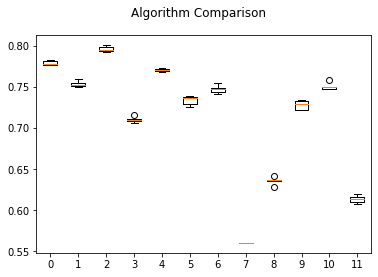

In [ ]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
import xgboost
from xgboost import XGBClassifier
import lightgbm as lgb
# load dataset
numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
#le = preprocessing.LabelEncoder()
#label_encoder = le.fit(y)
#y = label_encoder.transform(y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)
block_size=int(round(X_train2.shape[0]/12))
n = block_size  #chunk row size
list_X_train = [X_train2[i:i+n] for i in range(0,X_train2.shape[0],n)]
list_y_train = [y_train2[i:i+n] for i in range(0,y_train2.shape[0],n)]
list_X_test = [X_test2[i:i+n] for i in range(0,X_test2.shape[0],n)]
list_y_test = [y_test2[i:i+n] for i in range(0,y_test2.shape[0],n)]
test_data = lgb.Dataset(list_X_test[0], label=list_y_test[0])
# Build the encoder
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
parameters = {
    'application': 'binary','objective': 'binary','metric': 'auc','is_unbalance': 'true',
    'boosting': 'gbdt','num_leaves': 31,'feature_fraction': 0.5,'bagging_fraction': 0.5,
    'bagging_freq': 20,'learning_rate': 0.05,'verbose': 0
}
fit_params={"early_stopping_rounds":10,"eval_metric" : 'auc',"eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],'verbose': 100,
            'feature_name': 'auto', # that's actually the default
            'categorical_feature': 'auto' # that's actually the default
           }
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                               ('RandomForestClassifier',RandomForestClassifier(n_estimators=20))])) 
                               .fit(list_X_train[0], list_y_train[0])) 
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                               ('AdaBoostClassifier',AdaBoostClassifier(n_estimators=25))]))
                               .fit(list_X_train[1], list_y_train[1])) 
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                       ('HistGradientBoostingClassifier', HistGradientBoostingClassifier())])).fit(list_X_train[2], list_y_train[2]))
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                              ('XGBClassifier',XGBClassifier(max_depth=2,n_estimators=10,objective='binary:logistic'))]))
                            .fit(list_X_train[3], list_y_train[3]))
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                              ('ExtraTreesClassifier',ExtraTreesClassifier(criterion= 'entropy'))]))
                               .fit(list_X_train[4], list_y_train[4]))
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
              ('lightgbm',lgb.LGBMClassifier(n_estimators=5 , num_leaves= 15,
           max_depth=-1,colsample_bytree=0.9,subsample=0.9,learning_rate=0.1))])).fit(list_X_train[5], list_y_train[5]))
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                     ('LDA', LinearDiscriminantAnalysis())])).fit(list_X_train[6], list_y_train[6]))
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                     ('MLPClassifier',
                      MLPClassifier(hidden_layer_sizes=(10,10), max_iter=5, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=1))])).fit(list_X_train[7], list_y_train[7]))
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                     ('LR', LogisticRegression())])).fit(list_X_train[8], list_y_train[8]))
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                     ('QDA', QuadraticDiscriminantAnalysis())])).fit(list_X_train[9], list_y_train[9]))
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                      ('CART', DecisionTreeClassifier())])).fit(list_X_train[10], list_y_train[10]))
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                       ('NB', GaussianNB())])).fit(list_X_train[11], list_y_train[11]))


   
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in enumerate(models):
    #kfold = model_selection.KFold(n_splits=10, random_state=seed)
    print('1')
    cv_results = model_selection.cross_val_score(model, list_X_train[name], 
                            list_y_train[name], cv=5, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
last=[]
for name, model in enumerate(models):
  last.append([type(model[1]),results[name].mean()])
last
def Sort(sub_li): 
   return(sorted(sub_li, key = lambda x: x[1], reverse=True))     
bb=(Sort(last))
try1=[]
for i in range(len(bb)):
  if bb[i][1]>=0.70:
     try1.append(bb[i])
try1

[[sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  0.7959769054594625],
 [sklearn.ensemble.forest.RandomForestClassifier, 0.7784527255146754],
 [sklearn.ensemble.forest.ExtraTreesClassifier, 0.7702894790681919],
 [sklearn.ensemble.weight_boosting.AdaBoostClassifier, 0.7529184971611469],
 [sklearn.tree.tree.DecisionTreeClassifier, 0.7502575791414047],
 [sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
  0.7467053219486217],
 [lightgbm.sklearn.LGBMClassifier, 0.7333047529102357],
 [sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis,
  0.7279554842300134],
 [xgboost.sklearn.XGBClassifier, 0.7100687430427002]]

In [ ]:
for name, model in enumerate(models):
  print(type(model[1]))

<class 'sklearn.ensemble.forest.RandomForestClassifier'>
<class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>
<class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>
<class 'xgboost.sklearn.XGBClassifier'>
<class 'sklearn.ensemble.forest.ExtraTreesClassifier'>
<class 'lightgbm.sklearn.LGBMClassifier'>
<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>
<class 'sklearn.neural_network.multilayer_perceptron.MLPClassifier'>
<class 'sklearn.linear_model.logistic.LogisticRegression'>
<class 'sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis'>
<class 'sklearn.tree.tree.DecisionTreeClassifier'>
<class 'sklearn.naive_bayes.GaussianNB'>


In [ ]:
bb

[[sklearn.ensemble.forest.RandomForestClassifier, 0.7806396081988514],
 [sklearn.ensemble.gradient_boosting.GradientBoostingClassifier,
  0.7784387042520478],
 [sklearn.ensemble.forest.ExtraTreesClassifier, 0.7709024894634986],
 [sklearn.ensemble.weight_boosting.AdaBoostClassifier, 0.7519293312035028],
 [sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
  0.7472487094274947],
 [sklearn.tree.tree.DecisionTreeClassifier, 0.7469561444557244],
 [lightgbm.sklearn.LGBMClassifier, 0.738249719679221],
 [sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis,
  0.7243613071151054],
 [xgboost.sklearn.XGBClassifier, 0.709887690373497],
 [sklearn.linear_model.logistic.LogisticRegression, 0.6365168585769048],
 [sklearn.naive_bayes.GaussianNB, 0.6141030483572736],
 [sklearn.neural_network.multilayer_perceptron.MLPClassifier,
  0.5641907889521246]]

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


1
0: 0.847674 (0.002017)
1
1: 0.823186 (0.002219)


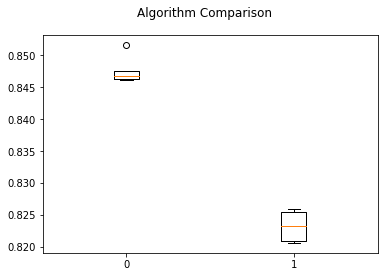

In [ ]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, train_test_split
import category_encoders as ce
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import ExtraTreesClassifier
# load dataset
numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns

X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
#le = preprocessing.LabelEncoder()
#label_encoder = le.fit(y)
#y = label_encoder.transform(y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)
block_size=int(round(X_train2.shape[0]/2))
n = block_size  #chunk row size
list_X_train = [X_train2[i:i+n] for i in range(0,X_train2.shape[0],n)]
list_y_train = [y_train2[i:i+n] for i in range(0,y_train2.shape[0],n)]
list_X_test = [X_test2[i:i+n] for i in range(0,X_test2.shape[0],n)]
list_y_test = [y_test2[i:i+n] for i in range(0,y_test2.shape[0],n)]
test_data = lgb.Dataset(list_X_test[0], label=list_y_test[0])
# Build the encoder

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
parameters = {
    'application': 'binary','objective': 'binary','metric': 'auc','is_unbalance': 'true',
    'boosting': 'gbdt','num_leaves': 31,'feature_fraction': 0.5,'bagging_fraction': 0.5,
    'bagging_freq': 20,'learning_rate': 0.05,'verbose': 0
}
fit_params={"early_stopping_rounds":10,"eval_metric" : 'auc',"eval_set" : [(X_test2,y_test2)],
            'eval_names': ['valid'],'verbose': 100,
            'feature_name': 'auto', # that's actually the default
            'categorical_feature': 'auto' # that's actually the default
           }
iterace=100
num_leaves_list = [50] * iterace
num_boost_round = iterace
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
            ('lightgbm',
             lgb.LGBMClassifier(n_estimators=5 , num_leaves= 15, max_depth=-1,colsample_bytree=0.9,subsample=0.9,learning_rate=0.1))]))
             .fit(list_X_train[0], list_y_train[0]))
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                              ('ExtraTreesClassifier',
                               ExtraTreesClassifier(criterion= 'entropy'))]))
                               .fit(list_X_train[1], list_y_train[1]))


   
# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name, model in enumerate(models):
    #kfold = model_selection.KFold(n_splits=10, random_state=seed)
    print('1')
    cv_results = model_selection.cross_val_score(model, list_X_train[name],  list_y_train[name], cv=5, scoring=scoring)scoring = 'roc_auc'
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
(bb[0][0]

abc.ABCMeta

In [ ]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from hyperopt.pyll import scope as ho_scope                                       
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
import numpy as np
from hyperopt.pyll.stochastic import sample as ho_sample
from functools import partial
import xgboost as xgb
param_hyperopt= {
        'DecisionTreeClassifier':
            {
            'max_features': hp.choice('c0_max_features', ['auto', 'sqrt', 'log2']),
            'min_samples_split': ho_scope.int(hp.quniform('c0_min_samples_split', 3, 15,3)),
            'min_samples_leaf': ho_scope.int(hp.quniform('c0_min_samples_leaf', 3, 15,3))                                   
          
         },
         'RandomForestClassifier': 
            {
            'max_depth': ho_scope.int(hp.quniform('c2_max_depth', 5, 7, 1)),
            'n_estimators': ho_scope.int(hp.quniform('c2_n_estimators', 5, 30, 1)),
            'max_features': hp.choice('c2_max_features', ['auto', 'sqrt']),
            'criterion': hp.choice('c2_criterion', ['gini', 'entropy']),
            'min_samples_split': ho_scope.int(hp.quniform('c2_min_samples_split', 2, 5,1)),
            'min_samples_leaf': ho_scope.int(hp.quniform('c2_min_samples_leaf', 2, 5,1))
                          
         },                                               
          'HistGradientBoostingClassifier':
            {
                'learning_rate': hp.loguniform('c3_learning_rate', np.log(0.01), np.log(0.1)),
                'max_iter': ho_scope.int(hp.quniform('c3_max_iter', 10, 50, 5)),
                'max_depth': ho_scope.int(hp.quniform('c3_max_depth', 2,5, 1)),
                'max_leaf_nodes': ho_scope.int(hp.quniform('c3_max_leaf_nodes', 5, 35,5)),
                'min_samples_leaf': ho_scope.int(hp.quniform('c3_min_samples_leaf', 5, 25,5)),
                'loss': hp.choice('c3_loss', ['auto', 'binary_crossentropy','categorical_crossentropy']),
                'max_bins': ho_scope.int(hp.quniform('c3_max_bins', 20, 100,20)),
                'validation_fraction':0.1,
                'n_iter_no_change':None,
                 'tol':1e-07,
                  'l2_regularization':0.0 
           },
       'ExtraTreesClassifier':
            {
                'max_depth': ho_scope.int(hp.quniform('c4_max_depth', 5, 20, 1)),
                'n_estimators': ho_scope.int(hp.quniform('c4_n_estimators', 5, 30, 1)),
                'max_features': ho_scope.int(hp.quniform('c4_max_features', 5, 20, 1)),
                'criterion': hp.choice('c4_criterion', ['gini', 'entropy']),
                'min_samples_split': ho_scope.int(hp.quniform('c4_min_samples_split', 2, 5,1)),
                'min_samples_leaf': ho_scope.int(hp.quniform('c4_min_samples_leaf', 2, 5,1))
       },

     'AdaBoostClassifier':
     {
          'learning_rate': hp.loguniform('c5_learning_rate', np.log(0.01), np.log(1)),
           'n_estimators': ho_scope.int(hp.quniform('c5_n_estimators', 5, 30, 1)),
           'algorithm': hp.choice('c5_algorithm',["SAMME"])  
       },
       'XGBClassifier':
    {
         'n_estimators': hp.quniform('n_estimators', 100, 1000, 1),
        'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
        # A problem with max_depth casted to float instead of int with
        # the hp.quniform method.
        'max_depth':  hp.choice('max_depth', np.arange(1, 14, dtype=int)),
        'min_child_weight': hp.quniform('min_child_weight', 1, 6, 1),
        'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
        'gamma': hp.quniform('gamma', 0.5, 1, 0.05),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1, 0.05),
        'eval_metric': 'auc',
        'objective': 'binary:logistic',
        # Increase this number if you have more cores. Otherwise, remove it and it will default 
        # to the maxium number. 
        'nthread': 4,
        'booster': 'gbtree',
        'tree_method': 'exact',
        'silent': 1,
        'seed': 1
       },
   'LinearDiscriminantAnalysis':
            {      
            
            }  ,
  'QuadraticDiscriminantAnalysis' :
        {
      
        },
  'LGBMClassifier':
                  {
                   'max_depth': ho_scope.int(hp.quniform('c6_max_depth', 3, 10, 1)),
                   'num_leave': ho_scope.int(hp.quniform('c6_num_leaves', 5, 50, 5)),
                   'min_child_samples': ho_scope.int(hp.quniform('c6_min_child_samples', 50, 100, 10)),
                   'scale_pos_weight': ho_scope.float(hp.quniform('c6_scale_pos_weight', 50, 100, 10)),
                   'subsample': ho_scope.float(hp.quniform('c6_subsample', 0.6, 0.9, 1)),
                   'colsample_bytree': ho_scope.float(hp.quniform('c6_colsample_bytree', 0.6, 0.9, 1)),
                   'reg_lambda': hp.choice("c6_reg_lambda",[0, 1e-1, 1, 5, 10, 20, 50]),
                   'reg_alpha': hp.choice("c6_reg_alpha",[0, 1e-1, 1, 5, 10, 20, 50])
                   }  ,
  'LogisticRegression ':
  {
      ' classifier__penalty': hp.choice(' classifier__penalty', ['l1', 'l2']),
     'classifier__C' :hp.loguniform('classifier__C', np.log(0.1), np.log(1)) ,
    'classifier__solver' : 'liblinear'
  }   ,
  'MLPClassifier':{
      'hidden_layer_sizes': hp.choice(' c8_hidden_layer_sizes',[(50,50,50), (50,100,50), (100,)]),
    'activation':hp.choice ('c8_activation',['tanh', 'relu']),
    'solver': hp.choice('c8_solver',['sgd', 'adam']) ,
    'alpha':hp.loguniform('c8_alpha',np.log(0.0001), np.log(0.05) ),
    'learning_rate':hp.choice('c8_learning_rate', ['constant','adaptive'],)
  },
  'GaussianNB':
  {
      
  }                  
       
} 
if list(param_hyperopt.keys())[1]==try1[0][0].__name__:
  param_hyperopt[try1[0][0].__name__]=param_hyperopt[try1[0][0].__name__]

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2,random_state = 0)
def f_clf1(params):
  model6 =Pipeline(steps=[('encoder',Accepted[0][1]()),(try1[1][0].__name__,try1[1][0](**params[try1[1][0].__name__]))])
  return model6    

def objective_function(params,X_train2, y_train2):
    model=f_clf1(params)
    score = cross_val_score(model, X_train2, y_train2, cv=5,scoring='roc_auc', n_jobs=-1).mean()
    return {'loss': -score, 'status': STATUS_OK}  

trials = Trials()
best_clf1 = fmin(partial(objective_function, X_train2=X_train2, y_train2=y_train2), param_hyperopt[try1[1][0].__name__], algo=tpe.suggest, max_evals=10,
                 trials=trials, rstate=np.random.RandomState(1))
clf1 = f_clf1(space_eval(param_hyperopt[try1[1][0].__name__], best_clf1)).fit(X_train2, y_train2)
# Calculating performance on validation set
y_score = clf1.predict_proba(X_test2)
clf1_val_score = roc_auc_score(y_test2, y_score[:,1])
#clf2_val_score = model_selection.cross_val_score(f_clf2, X_train2,  y_train2, cv=5, scoring='roc_auc')
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.\
      format(-trials.best_trial['result']['loss'], clf1_val_score))
#print('Best parameters:')
#print(space_eval(param_hyperopt, best_clf1))
a1=space_eval(param_hyperopt[try1[1][0].__name__], best_clf1)
Fr_classifier={'classifier':list(a1.keys())[0],'Cross-val score':-trials.best_trial['result']['loss'],'validation score':clf1_val_score,'parameters':list(a1.values())[0]}

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]


KeyError: ignored

In [ ]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from hyperopt.pyll import scope as ho_scope                                       
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
import numpy as np
from hyperopt.pyll.stochastic import sample as ho_sample
from functools import partial
import xgboost as xgb
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
from sklearn.utils import shuffle
param_hyperopt= {
        'DecisionTreeClassifier':
            {
            'max_depth': ho_scope.int(hp.quniform('c2_max_depth', 3, 7, 1)),
            'max_features': hp.choice('c0_max_features', ['auto', 'sqrt', 'log2']),
            'min_samples_split': ho_scope.int(hp.quniform('c0_min_samples_split', 3, 15,3)),
            'min_samples_leaf': ho_scope.int(hp.quniform('c0_min_samples_leaf', 3, 15,3))                                   
          
         },
         'RandomForestClassifier': 
            {
            'max_depth': ho_scope.int(hp.quniform('c2_max_depth', 5, 7, 1)),
            'n_estimators': ho_scope.int(hp.quniform('c2_n_estimators', 5, 30, 1)),
            'max_features': hp.choice('c2_max_features', ['auto', 'sqrt']),
            'criterion': hp.choice('c2_criterion', ['gini', 'entropy']),
            'min_samples_split': ho_scope.int(hp.quniform('c2_min_samples_split', 2, 5,1)),
            'min_samples_leaf': ho_scope.int(hp.quniform('c2_min_samples_leaf', 2, 5,1))
                          
         },                                               
          'HistGradientBoostingClassifier':
            {
               'learning_rate': hp.loguniform('c3_learning_rate', np.log(0.01), np.log(0.1)),
                'max_iter': ho_scope.int(hp.quniform('c3_max_iter', 10, 80, 5)),
                'max_depth': ho_scope.int(hp.quniform('c3_max_depth', 2,7, 1)),
                'max_leaf_nodes': ho_scope.int(hp.quniform('c3_max_leaf_nodes', 5, 35,5)),
                'min_samples_leaf': ho_scope.int(hp.quniform('c3_min_samples_leaf', 5, 25,5)),
                'max_bins': ho_scope.int(hp.quniform('c3_max_bins', 20, 100,20)),
                'validation_fraction':0.1,
                'n_iter_no_change':None,
                 'tol':1e-07,
                'l2_regularization':0.0 
           },
       'ExtraTreesClassifier':
            {
                'max_depth': ho_scope.int(hp.quniform('c4_max_depth', 5, 20, 1)),
                'n_estimators': ho_scope.int(hp.quniform('c4_n_estimators', 5, 30, 1)),
                'max_features': ho_scope.int(hp.quniform('c4_max_features', 5, 20, 1)),
                'criterion': hp.choice('c4_criterion', ['gini', 'entropy']),
                'min_samples_split': ho_scope.int(hp.quniform('c4_min_samples_split', 2, 5,1)),
                'min_samples_leaf': ho_scope.int(hp.quniform('c4_min_samples_leaf', 2, 5,1))
       },

     'AdaBoostClassifier':
   {
         'base_estimator':hp.choice('base_estimator', [DecisionTreeClassifier()]),
          'learning_rate': hp.loguniform('c5_learning_rate', np.log(0.01), np.log(1)),
          'n_estimators': ho_scope.int(hp.quniform('c5_n_estimators', 10, 80, 10)),
          'algorithm': hp.choice('c5_algorithm',["SAMME"])  
       },
       'XGBClassifier':
    {
         'n_estimators': ho_scope.int(hp.quniform('n_estimators', 100, 1000, 100)),
        'eta':ho_scope.float(hp.quniform('eta', 0.025, 0.5, 0.025)) ,
        'max_depth':ho_scope.int( hp.quniform('max_depth', 2, 14,2)) ,
        'min_child_weight':ho_scope.int(hp.quniform('min_child_weight', 1, 6, 1)) ,
        'subsample':ho_scope.float(hp.quniform('subsample', 0.5, 1.0, 0.05)),
        'gamma':ho_scope.float( hp.quniform('gamma', 0.5, 1, 0.05)) ,
        'colsample_bytree': ho_scope.float(hp.quniform('colsample_bytree', 0.5, 1, 0.05)),
        'eval_metric': 'auc',
        'objective': 'binary:logistic',
         'nthread': 10,
        'booster': 'gbtree',
        'tree_method': 'exact',
        'silent': 1,
       
       },
   'LinearDiscriminantAnalysis':
            {      
            
            }  ,
  'QuadraticDiscriminantAnalysis' :
        {
      
        },
  'LGBMClassifier':
                  {
                   'max_depth': ho_scope.int(hp.quniform('c6_max_depth', -2, 10, 1)),
                   'num_leave': ho_scope.int(hp.quniform('c6_num_leaves', 10, 200, 10)),
                   'min_child_samples': ho_scope.int(hp.quniform('c6_min_child_samples', 10, 90, 10)),
                   'scale_pos_weight': ho_scope.int(hp.quniform('c6_scale_pos_weight', 10, 90, 10)),
                   'subsample': ho_scope.float(hp.quniform('c6_subsample', 0.1, 0.9, 0.1)),
                   'colsample_bytree': ho_scope.float(hp.quniform('c6_colsample_bytree', 0.1, 0.9, 0.1)),
                   'reg_lambda': hp.choice("c6_reg_lambda",[0, 1e-1, 1, 5, 10, 20, 50]),
                   'reg_alpha': hp.choice("c6_reg_alpha",[0, 1e-1, 1, 5, 10, 20, 50]),
                   'bagging_fraction': ho_scope.float(hp.quniform('c6_bagging_fraction', 0.1, 0.9, 0.05)),
                    'bagging_freq': ho_scope.int(hp.quniform('c6_bagging_freq', 1, 8, 1)),
                   'min_data_in_leaf': ho_scope.int(hp.quniform('c6_min_data_in_leaf', 100, 1000, 100)),
                  'min_sum_hessian_in_leaf': ho_scope.int(hp.quniform('c6_min_sum_hessian_in_leaf', 5, 20, 5)),
                   'max_bin': ho_scope.int(hp.quniform('c6_max_bin', 10, 100, 10)),
                   'learning_rate': ho_scope.float(hp.quniform('c6_learning_rate', 0.001, 0.09, 0.005)),
                   'num_iterations': ho_scope.int(hp.quniform('c6_num_iterations', 100, 10000, 100)),
                   'early_stopping_round':ho_scope.int(hp.quniform('c6_early_stopping_round',(1,10,1)))  
                      
                   }  ,
  'LogisticRegression ':
  {
      ' classifier__penalty': hp.choice(' classifier__penalty', ['l1', 'l2']),
     'classifier__C' :hp.loguniform('classifier__C', np.log(0.1), np.log(1)) ,
    'classifier__solver' : 'liblinear'
  }   ,
  'MLPClassifier':{
      'hidden_layer_sizes': hp.choice(' c8_hidden_layer_sizes',[(50,50,50), (50,100,50), (100,)]),
    'activation':hp.choice ('c8_activation',['tanh', 'relu']),
    'solver': hp.choice('c8_solver',['sgd', 'adam']) ,
    'alpha':hp.loguniform('c8_alpha',np.log(0.0001), np.log(0.05) ),
    'learning_rate':hp.choice('c8_learning_rate', ['constant','adaptive'],)
  },
  'GaussianNB':
  {
      
  }                  
       
} 

def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2,random_state = 0)
q=[3,2]

for i in range(len(q)) :
  param_hyperopt3={try1[i][0].__name__:param_hyperopt[try1[i][0].__name__]}
  clf_name=try1[i][0].__name__
  def f_clf1(params):
    if not(params):
     model6 =Pipeline(steps=[('encoder',ce.cat_boost.CatBoostEncoder()),(clf_name,try1[i][0]())])
     return model6[i]
    else:
     model6 =Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),(clf_name,try1[i][0](**f_unpack_dict(params[clf_name])))])
     return model6[i] 
         
  def objective_function(params,X_train2, y_train2):
      model=[]
      for i in range(len(q)):
        model.append(f_clf1(params))
        shuffle = KFold(n_splits=5, shuffle=True)
        score = cross_val_score(model[i], X_train2, y_train2, cv=shuffle,scoring='roc_auc', n_jobs=-1).mean()
        return {'loss': -score, 'status': STATUS_OK}  

  trials = Trials()
  best_clf1 = fmin(partial(objective_function, X_train2=X_train2, y_train2=y_train2),space=param_hyperopt3 , algo=tpe.suggest, max_evals=10,
                  trials=trials, rstate=np.random.RandomState(1))
  clf1 = f_clf1(space_eval(param_hyperopt3, best_clf1)).fit(X_train2, y_train2)
  # Calculating performance on validation set
  y_score = clf1.predict_proba(X_test2)
  clf1_val_score = roc_auc_score(y_test2, y_score[:,1])
  print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.format(-trials.best_trial['result']['loss'], clf1_val_score))
  #print('Best parameters:')
  #print(space_eval(param_hyperopt, best_clf1))
  a1=space_eval(param_hyperopt3, best_clf1)
  Fr_classifier={'classifier':clf_name,'Cross-val score':-trials.best_trial['result']['loss'],'validation score':clf1_val_score,'parameters':list(a1.values())[0]}
  Fr_classifier

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]


AttributeError: ignored

In [ ]:
import category_encoders as ce
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

q=[2,3]
param_hyperopt31=[]
clf_name=[]
model=[]
for i in range(len(q)) :
  param_hyperopt31.append({try1[i][0].__name__:param_hyperopt[try1[i][0].__name__]})
  clf_name.append(try1[i][0].__name__)
  def f_clf1(params):
    model6=[]
    if not(params):
     model6.append(Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),(clf_name[i],try1[i][0]())]))
     return model6
    else:
     model6.append(Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),(clf_name[i],try1[i][0](**f_unpack_dict(param_hyperopt31[i])))]))
     return model6

  
  model.append(f_clf1(param_hyperopt31))
  model

In [ ]:
param_hyperopt31[0],clf_name[0]

({'HistGradientBoostingClassifier': {'l2_regularization': 0.0,
   'learning_rate': <hyperopt.pyll.base.Apply at 0x7f336582f4e0>,
   'max_bins': <hyperopt.pyll.base.Apply at 0x7f336582fda0>,
   'max_depth': <hyperopt.pyll.base.Apply at 0x7f336582f860>,
   'max_iter': <hyperopt.pyll.base.Apply at 0x7f336582f6a0>,
   'max_leaf_nodes': <hyperopt.pyll.base.Apply at 0x7f336582fa20>,
   'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x7f336582fbe0>,
   'n_iter_no_change': None,
   'tol': 1e-07,
   'validation_fraction': 0.1}},
 'HistGradientBoostingClassifier')

In [ ]:
param_hyperopt31.append({try1[i][0].__name__:param_hyperopt[try1[i][0].__name__]})
param_hyperopt31[0],clf_name

({'HistGradientBoostingClassifier': {'l2_regularization': 0.0,
   'learning_rate': <hyperopt.pyll.base.Apply at 0x7f3365dee518>,
   'max_bins': <hyperopt.pyll.base.Apply at 0x7f3365deedd8>,
   'max_depth': <hyperopt.pyll.base.Apply at 0x7f3365dee898>,
   'max_iter': <hyperopt.pyll.base.Apply at 0x7f3365dee6d8>,
   'max_leaf_nodes': <hyperopt.pyll.base.Apply at 0x7f3365deea58>,
   'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x7f3365deec18>,
   'n_iter_no_change': None,
   'tol': 1e-07,
   'validation_fraction': 0.1}},
 ['HistGradientBoostingClassifier', 'RandomForestClassifier'])

In [ ]:
model6=Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),('RandomForestClassifier',RandomForestClassifier(**f_unpack_dict(param_hyperopt['RandomForestClassifier'])))])
model6

Pipeline(memory=None,
         steps=[('encoder',
                 JamesSteinEncoder(cols=None, drop_invariant=False,
                                   handle_missing='value',
                                   handle_unknown='value', model='independent',
                                   random_state=None, randomized=False,
                                   return_df=True, sigma=0.05, verbose=0)),
                ('RandomForestClassifier',
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion=<hyperopt.pyll.base.Apply object...
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=<hyperopt.pyll.base.Apply object at 0x7f3365dee3c8>,
                                        min_samples_split=<hyperopt.pyll.base.Apply object at 0x7f3365dee208>,
                                      

In [ ]:
Fr_classifier

{'Cross-val score': 0.8275732613439543,
 'classifier': 'RandomForestClassifier',
 'parameters': {'criterion': 'entropy',
  'max_depth': 7,
  'max_features': 'auto',
  'min_samples_leaf': 2,
  'min_samples_split': 3,
  'n_estimators': 27},
 'validation score': 0.8247213862925282}

In [ ]:
not(param_hyperopt[try1[4][0].__name__])

True

In [ ]:
param_hyperopt[try1[4][0].__name__]

{}

In [ ]:
param_hyperopt['HistGradientBoostingClassifier']HistGradientBoostingClassifier
model6 =Pipeline(steps=[('encoder',Accepted[0][1]()),(try1[0][0].__name__,try1[0][0](**param_hyperopt[try1[0][0].__name__]))])
param_hyperopt[try1[0][0].__name__]

{'l2_regularization': 0.0,
 'learning_rate': <hyperopt.pyll.base.Apply at 0x7f4a92f6f400>,
 'loss': <hyperopt.pyll.base.Apply at 0x7f4a92f6fc18>,
 'max_bins': <hyperopt.pyll.base.Apply at 0x7f4a92f6feb8>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x7f4a92f6f780>,
 'max_iter': <hyperopt.pyll.base.Apply at 0x7f4a92f6f5c0>,
 'max_leaf_nodes': <hyperopt.pyll.base.Apply at 0x7f4a92f6f940>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x7f4a92f6fb00>,
 'n_iter_no_change': None,
 'tol': 1e-07,
 'validation_fraction': 0.1}

In [ ]:
try1

[[sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  0.7940824653969589],
 [sklearn.ensemble.forest.RandomForestClassifier, 0.7793998162123197],
 [sklearn.ensemble.forest.ExtraTreesClassifier, 0.770150127628699],
 [sklearn.ensemble.weight_boosting.AdaBoostClassifier, 0.7536564340802216],
 [sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
  0.7469701302632473],
 [sklearn.tree.tree.DecisionTreeClassifier, 0.7468168298834201],
 [lightgbm.sklearn.LGBMClassifier, 0.7365921649520224],
 [sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis,
  0.7296130570051764],
 [xgboost.sklearn.XGBClassifier, 0.709414070714759]]

In [ ]:
param_hyperopt['HistGradientBoostingClassifier']

{'l2_regularization': 0.0,
 'learning_rate': <hyperopt.pyll.base.Apply at 0x7fce47307da0>,
 'loss': <hyperopt.pyll.base.Apply at 0x7fce47307898>,
 'max_bins': <hyperopt.pyll.base.Apply at 0x7fce4603ba90>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x7fce47307b00>,
 'max_iter': <hyperopt.pyll.base.Apply at 0x7fce47307160>,
 'max_leaf_nodes': <hyperopt.pyll.base.Apply at 0x7fce47307dd8>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x7fce473072b0>,
 'n_iter_no_change': None,
 'tol': 1e-07,
 'validation_fraction': 0.1}

In [ ]:
list(param_hyperopt.keys())[1]
param_hyperopt[try1[0][0].__name__]

{'criterion': <hyperopt.pyll.base.Apply at 0x7ff8688b2320>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x7ff868891e80>,
 'max_features': <hyperopt.pyll.base.Apply at 0x7ff8688b2198>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x7ff8688b2710>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x7ff8688b2550>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x7ff8688b2080>}

In [ ]:
if list(param_hyperopt.keys())[1]==try1[0][0].__name__:
  param_hyperopt[try1[0][0].__name__]=param_hyperopt[try1[0][0].__name__]
param_hyperopt

{'criterion': <hyperopt.pyll.base.Apply at 0x7ff86613a550>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x7ff86613a0f0>,
 'max_features': <hyperopt.pyll.base.Apply at 0x7ff86613a3c8>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x7ff86613a940>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x7ff86613a780>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x7ff86613a2b0>}

In [ ]:
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from hyperopt.pyll import scope as ho_scope                                       
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from hyperopt.pyll.stochastic import sample as ho_sample
from functools import partial

param_hyperopt1= {
   'ExtraTreesClassifier':
            {
                'max_depth': ho_scope.int(hp.quniform('c4_max_depth', 5, 20, 1)),
                'n_estimators': ho_scope.int(hp.quniform('c4_n_estimators', 5, 30, 1)),
                'max_features': ho_scope.int(hp.quniform('c4_max_features', 5, 20, 1)),
                'criterion': hp.choice('c4_criterion', ['gini', 'entropy']),
                'min_samples_split': ho_scope.int(hp.quniform('c4_min_samples_split', 2, 5,1)),
                'min_samples_leaf': ho_scope.int(hp.quniform('c4_min_samples_leaf', 2, 5,1))      
             }     
       
} 
   
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2,random_state = 0)
def f_clf1(params):
  model6 =Pipeline(steps=[('encoder',Accepted[0][1]()),
             ('c4',ExtraTreesClassifier(**f_unpack_dict(params['ExtraTreesClassifier'])))])
  return model6    

def objective_function(params,X_train2, y_train2):
    model=f_clf1(params)
    score = cross_val_score(model, X_train2, y_train2, cv=5,scoring='roc_auc', n_jobs=-1).mean()
    return {'loss': -score, 'status': STATUS_OK}  

trials = Trials()
best_clf1 = fmin(partial(objective_function, X_train2=X_train2, y_train2=y_train2), param_hyperopt1, algo=tpe.suggest, max_evals=10,
                 trials=trials, rstate=np.random.RandomState(1))
clf1 = f_clf1(space_eval(param_hyperopt1, best_clf1)).fit(X_train2, y_train2)
# Calculating performance on validation set
y_score = clf1.predict_proba(X_test2)
clf1_val_score = roc_auc_score(y_test2, y_score[:,1])
#clf2_val_score = model_selection.cross_val_score(f_clf2, X_train2,  y_train2, cv=5, scoring='roc_auc')
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.\
      format(-trials.best_trial['result']['loss'], clf1_val_score))
#print('Best parameters:')
#print(space_eval(param_hyperopt, best_clf1))
a1=space_eval(param_hyperopt1, best_clf1)
Fr_classifier={'classifier':list(a1.keys())[0],'Cross-val score':-trials.best_trial['result']['loss'],'validation score':clf1_val_score,'parameters':list(a1.values())[0]}

In [ ]:
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from hyperopt.pyll import scope as ho_scope                                       
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from hyperopt.pyll.stochastic import sample as ho_sample
from functools import partial

param_hyperopt2= {
  'RandomForestClassifier': 
            {
            'max_depth': ho_scope.int(hp.quniform('c2_max_depth', 5, 7, 1)),
            'n_estimators': ho_scope.int(hp.quniform('c2_n_estimators', 5, 30, 1)),
            'max_features': hp.choice('c2_max_features', ['auto', 'sqrt']),
            'criterion': hp.choice('c2_criterion', ['gini', 'entropy']),
            'min_samples_split': ho_scope.int(hp.quniform('c2_min_samples_split', 2, 5,1)),
            'min_samples_leaf': ho_scope.int(hp.quniform('c2_min_samples_leaf', 2, 5,1))
                          
         } 
} 
   
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)

def f_clf2(params):
  model4 =Pipeline(steps=[('encoder',Accepted[1][1]()),('c2',try1[1][0](**f_unpack_dict(params[try1[1][0].__name__])))])
  return model4    

def objective_function(params,X_train2, y_train2):
    model=f_clf2(params)
    score = cross_val_score(model, X_train2, y_train2, cv=5,scoring='roc_auc', n_jobs=-1).mean()
    return {'loss': -score, 'status': STATUS_OK}  

trials = Trials()
best_clf2 = fmin(partial(objective_function, X_train2=X_train2, y_train2=y_train2),
                 param_hyperopt2, algo=tpe.suggest, max_evals=10,trials=trials, rstate=np.random.RandomState(1))
clf2 = f_clf2(space_eval(param_hyperopt2, best_clf2)).fit(X_train2, y_train2)
# Calculating performance on validation set
y_score = clf2.predict_proba(X_test2)
clf2_val_score = roc_auc_score(y_test2, y_score[:,1])
#clf2_val_score = model_selection.cross_val_score(f_clf2, X_train2,  y_train2, cv=5, scoring='roc_auc')
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.\
      format(-trials.best_trial['result']['loss'], clf2_val_score))
#print('Best parameters:')
#print(
a2=space_eval(param_hyperopt2, best_clf2)
Se_classifier={'classifier':list(a2.keys())[0],'Cross-val score':-trials.best_trial['result']['loss'],'validation score':clf2_val_score,'parameters':list(a2.values())[0]}

100%|██████████| 10/10 [06:52<00:00, 37.99s/it, best loss: -0.8222612508481044]
Cross-val score: 0.82226; validation score: 0.83310


In [ ]:
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from hyperopt.pyll import scope as ho_scope                                       
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from hyperopt.pyll.stochastic import sample as ho_sample
from functools import partial
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
from sklearn.utils import shuffle
param_hyperopt3= {      
       'LinearDiscriminantAnalysis':
            {      
            
            }
} 
   
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)

def f_clf3(params):
   model1 =Pipeline(steps=[('encoder',Accepted[2][1]()),('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis())])   
   return model1
        

def objective_function(params,X_train2, y_train2):
    model=f_clf3(params)
    shuffle = KFold(n_splits=5, shuffle=True)
    score = cross_val_score(model, X_train2, y_train2, cv=shuffle,scoring='roc_auc', n_jobs=-1).mean()
    return {'loss': -score, 'status': STATUS_OK}  

trials = Trials()
best_clf3 = fmin(partial(objective_function, X_train2=X_train2, y_train2=y_train2),
                param_hyperopt3, algo=tpe.suggest, max_evals=10,trials=trials, rstate=np.random.RandomState(1))
clf3 = f_clf3(space_eval(param_hyperopt3, best_clf3)).fit(X_train2, y_train2)

# Calculating performance on validation set
clf3_val_score = roc_auc_score(y_test, clf3.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.\
      format(-trials.best_trial['result']['loss'], clf3_val_score))
print('Best parameters:')
print(space_eval(param_hyperopt3, best_clf3))
# Calculating performance on validation set
clf3_val_score = roc_auc_score(y_test, clf3.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.\
      format(-trials.best_trial['result']['loss'], clf3_val_score))
#print('Best parameters:')
#print(
a3=space_eval(param_hyperopt3, best_clf3)
Thrid_classifier={'classifier':list(a3.keys())[0],'Cross-val score':-trials.best_trial['result']['loss'],'validation score':clf3_val_score,'parameters':list(a3.values())[0]}

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



100%|██████████| 10/10 [02:37<00:00, 15.45s/it, best loss: -0.8268064630182487]
Cross-val score: 0.82681; validation score: 0.82719
Best parameters:
{'LinearDiscriminantAnalysis': {}}
Cross-val score: 0.82681; validation score: 0.82719


In [ ]:
from sklearn.preprocessing import scale, normalize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from hyperopt.pyll import scope as ho_scope                                       
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
from sklearn.utils import shuffle
from hyperopt.pyll.stochastic import sample as ho_sample
from functools import partial
import xgboost as xgb

param_hyperopt4= {
  'XGBClassifier':
      {
           'max_depth': hp.choice("x_max_depth", np.arange(5, 10, dtype=int)),
           'min_child_weight': hp.choice ('x_min_child',np.arange(1, 5, dtype=int)),
           'subsample': hp.uniform ('x_subsample', 0.8, 1),
           'n_estimators': ho_scope.int(hp.quniform('c2_n_estimators', 5, 40, 1)),
       }         
       
} 
   
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)
def f_clf4(params):
   model1 =Pipeline(steps=[('encoder',Accepted[3][1]()),('XGBClassifier', xgb.XGBClassifier())])   
   return model1  

def objective_function(params,X_train2, y_train2):
    model=f_clf4(params)
    score = cross_val_score(model, X_train2, y_train2, cv=5,scoring='roc_auc', n_jobs=-1).mean()
    return {'loss': -score, 'status': STATUS_OK}  

trials = Trials()
best_clf4 = fmin(partial(objective_function, X_train2=X_train2, y_train2=y_train2),
                param_hyperopt4, algo=tpe.suggest, max_evals=10,trials=trials, rstate=np.random.RandomState(1))
clf4 = f_clf4(space_eval(param_hyperopt4, best_clf4)).fit(X_train2, y_train2)
# Calculating performance on validation set
clf4_val_score = roc_auc_score(y_test, clf4.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.\
      format(-trials.best_trial['result']['loss'], clf4_val_score))
#print('Best parameters:')
#print(
a4=space_eval(param_hyperopt4, best_clf4)
Four_classifier={'classifier':list(a4.keys())[0],'Cross-val score':-trials.best_trial['result']['loss'],'validation score':clf4_val_score,'parameters':list(a4.values())[0]}

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



 10%|█         | 1/10 [02:31<22:41, 151.31s/it, best loss: -0.8761819849027198]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



 20%|██        | 2/10 [05:01<20:08, 151.10s/it, best loss: -0.8761819849027198]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



 30%|███       | 3/10 [07:32<17:37, 151.07s/it, best loss: -0.8761819849027198]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



 40%|████      | 4/10 [10:04<15:08, 151.36s/it, best loss: -0.8761819849027198]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



 50%|█████     | 5/10 [12:37<12:38, 151.68s/it, best loss: -0.8761819849027198]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



 60%|██████    | 6/10 [15:13<10:12, 153.06s/it, best loss: -0.8761819849027198]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



 70%|███████   | 7/10 [17:46<07:39, 153.05s/it, best loss: -0.8761819849027198]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



 80%|████████  | 8/10 [20:18<05:05, 152.79s/it, best loss: -0.8761819849027198]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



 90%|█████████ | 9/10 [22:54<02:33, 153.75s/it, best loss: -0.8761819849027198]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



100%|██████████| 10/10 [25:29<00:00, 153.97s/it, best loss: -0.8761819849027198]
Cross-val score: 0.87618; validation score: 0.87700


In [ ]:
a4=space_eval(param_hyperopt4, best_clf4)
Four_classifier={'classifier':list(a4.keys())[0],'Cross-val score':-trials.best_trial['result']['loss'],'validation score':clf4_val_score,'parameters':list(a4.values())[0]}

In [ ]:
from sklearn.preprocessing import scale, normalize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from hyperopt.pyll import scope as ho_scope                                       
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from hyperopt.pyll import scope as ho_scope
from hyperopt.pyll.stochastic import sample as ho_sample
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
from sklearn.utils import shuffle
import lightgbm as lgb
from functools import partial

param_hyperopt5= {
   'LGBMClassifier':
                  {
                   'max_depth': ho_scope.int(hp.quniform('c6_max_depth', 3, 10, 1)),
                   'num_leave': ho_scope.int(hp.quniform('c6_num_leaves', 5, 50, 5)),
                   'min_child_samples': ho_scope.int(hp.quniform('c6_min_child_samples', 50, 100, 10)),
                   'scale_pos_weight': ho_scope.float(hp.quniform('c6_scale_pos_weight', 50, 100, 10)),
                   'subsample': ho_scope.float(hp.quniform('c6_subsample', 0.6, 0.9, 1)),
                   'colsample_bytree': ho_scope.float(hp.quniform('c6_colsample_bytree', 0.6, 0.9, 1)),
                   'reg_lambda': hp.choice("c6_reg_lambda",[0, 1e-1, 1, 5, 10, 20, 50]),
                   'reg_alpha': hp.choice("c6_reg_alpha",[0, 1e-1, 1, 5, 10, 20, 50])
                   }         
       
} 
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res
numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)
def f_clf5(params):
   model1 =Pipeline(steps=[('encoder',Accepted[4][1]()),('LGBMClassifier', 
                                                         lgb.LGBMClassifier(**f_unpack_dict(params['LGBMClassifier'])))])   
   return model1  

def objective_function(params,X_train2, y_train2):
    model=f_clf5(params)
    score = cross_val_score(model, X_train2, y_train2, cv=5,scoring='roc_auc', n_jobs=-1).mean()
    return {'loss': -score, 'status': STATUS_OK}  

trials = Trials()
best_clf5 = fmin(partial(objective_function, X_train2=X_train2, y_train2=y_train2),
                param_hyperopt5, algo=tpe.suggest, max_evals=10,trials=trials, rstate=np.random.RandomState(1))
clf5 = f_clf5(space_eval(param_hyperopt5, best_clf5)).fit(X_train2, y_train2)

# Calculating performance on validation set
clf5_val_score = roc_auc_score(y_test, clf5.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.\
      format(-trials.best_trial['result']['loss'], clf5_val_score))
#print('Best parameters:')
#print(
a5=space_eval(param_hyperopt5, best_clf5)
fith_classifier={'classifier':list(a5.keys())[0],'Cross-val score':-trials.best_trial['result']['loss'],'validation score':clf5_val_score,'parameters':list(a5.values())[0]}

 10%|█         | 1/10 [00:39<05:55, 39.48s/it, best loss: -0.8913360429569718]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



100%|██████████| 10/10 [06:26<00:00, 36.78s/it, best loss: -0.8931760781045686]
Cross-val score: 0.89318; validation score: 0.89444


In [ ]:
from sklearn.preprocessing import scale, normalize
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from hyperopt.pyll import scope as ho_scope                                       
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from hyperopt.pyll.stochastic import sample as ho_sample
from functools import partial
from hyperopt.pyll import scope as ho_scope
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
from sklearn.utils import shuffle
param_hyperopt6= {
    'QuadraticDiscriminantAnalysis':
      {
           
      }      
} 
   
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)

def f_clf6(params):
   model3 =Pipeline(steps=[('encoder',Accepted[5][1]()),('QuadraticDiscriminantAnalysis',QuadraticDiscriminantAnalysis())])
   return model3 

def objective_function(params,X_train2, y_train2):
    model=f_clf6(params)
    #clf = RandomForestClassifier(**params)
    score = cross_val_score(model, X_train2, y_train2, cv=5,scoring='roc_auc', n_jobs=-1).mean()
    return {'loss': -score, 'status': STATUS_OK}  

trials = Trials()
best_clf6 = fmin(partial(objective_function, X_train2=X_train2, y_train2=y_train2),
                param_hyperopt6, algo=tpe.suggest, max_evals=10,trials=trials, rstate=np.random.RandomState(1))

clf6 = f_clf6(space_eval(param_hyperopt6, best_clf6)).fit(X_train2, y_train2)

# Calculating performance on validation set
clf6_val_score = roc_auc_score(y_test, clf6.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.format(-trials.best_trial['result']['loss'], clf6_val_score))
print('Best parameters:')
print(space_eval(param_hyperopt6, best_clf6))
# Calculating performance on validation set
clf6_val_score = roc_auc_score(y_test, clf6.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.\
      format(-trials.best_trial['result']['loss'], clf6_val_score))
#print('Best parameters:')
#print(
a6=space_eval(param_hyperopt6, best_clf6)
six_classifier={'classifier':list(a6.keys())[0],'Cross-val score':-trials.best_trial['result']['loss'],'validation score':clf6_val_score,'parameters':list(a6.values())[0]}

  0%|          | 0/10 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



100%|██████████| 10/10 [02:06<00:00, 12.49s/it, best loss: -0.786171897798788]
Cross-val score: 0.78617; validation score: 0.78724
Best parameters:
{'QuadraticDiscriminantAnalysis': {}}
Cross-val score: 0.78617; validation score: 0.78724


In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier  
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import lightgbm as lgb
import category_encoders as ce
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score,classification_report
import numpy as np
import warnings

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)

pipe1 = make_pipeline(Accepted[3][1](),XGBClassifier(**Four_classifier['parameters']))
pipe2 = make_pipeline(Accepted[1][1](),RandomForestClassifier(**Se_classifier['parameters']))  
pipe3 = make_pipeline(Accepted[0][1](),ExtraTreesClassifier(**Fr_classifier['parameters'])) 
pipe6 = make_pipeline(Accepted[5][1](),lgb.LGBMClassifier(**fith_classifier['parameters'])) 
pipe4 = make_pipeline(Accepted[2][1](),LinearDiscriminantAnalysis())
pipe5 = make_pipeline(Accepted[5][1](),QuadraticDiscriminantAnalysis())
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6], meta_classifier=LogisticRegression()) 
model2=sclf2.fit(X_train2, y_train2)
y_true3, y_pred3  =y_test2, model2.predict(X_test2)
print(classification_report(y_true3, y_pred3))  
print("StackingClassifier score: %f" % model2.score(X_train2, y_train2))
clf2_val_score = roc_auc_score(y_test2, sclf2.predict_proba(X_test2)[:, 1])
print('Cross-val score: {0:.5f}'.format(clf2_val_score))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.73      0.82      0.77     94841
           1       0.85      0.76      0.80    120517

    accuracy                           0.79    215358
   macro avg       0.79      0.79      0.79    215358
weighted avg       0.79      0.79      0.79    215358

StackingClassifier score: 0.789651
Cross-val score: 0.85474


In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier  
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import lightgbm as lgb
import category_encoders as ce
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score,classification_report
import numpy as np
import warnings

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)


pipe2 = make_pipeline(Accepted[1][1](),RandomForestClassifier())  
pipe3 = make_pipeline(Accepted[0][1](),ExtraTreesClassifier()) 
pipe6 = make_pipeline(Accepted[5][1](),lgb.LGBMClassifier()) 
pipe4 = make_pipeline(Accepted[2][1](),LinearDiscriminantAnalysis())
sclf2 = StackingClassifier(classifiers=[pipe2,pipe3,pipe4,pipe6], meta_classifier=LogisticRegression()) 
model2=sclf2.fit(X_train2, y_train2)
y_true3, y_pred3  =y_test2, model2.predict(X_test2)
print(classification_report(y_true3, y_pred3))  
print("StackingClassifier score: %f" % model2.score(X_train2, y_train2))
clf2_val_score = roc_auc_score(y_test2, sclf2.predict_proba(X_test2)[:, 1])
print('Cross-val score: {0:.5f}'.format(clf2_val_score))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.76      0.76      0.76     94841
           1       0.81      0.81      0.81    120517

    accuracy                           0.79    215358
   macro avg       0.79      0.79      0.79    215358
weighted avg       0.79      0.79      0.79    215358

StackingClassifier score: 0.905730
Cross-val score: 0.86727


In [ ]:
Fr_classifier={'Cross-val score': 0.8755075622861487,
 'classifier': 'ExtraTreesClassifier',
 'parameters': {'criterion': 'entropy',
  'max_depth': 15,
  'max_features': 13,
  'min_samples_leaf': 4,
  'min_samples_split': 4,
  'n_estimators': 13},
 'validation score': 0.884938764808794}

In [ ]:
Fr_classifier['parameters']

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 13,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 13}

In [ ]:
Se_classifier={'Cross-val score': 0.8273926245659394,
 'classifier': 'RandomForestClassifier',
 'parameters': {'criterion': 'gini',
  'max_depth': 7,
  'max_features': 'auto',
  'min_samples_leaf': 2,
  'min_samples_split': 3,
  'n_estimators': 23},
 'validation score': 0.7973701565847332}

In [ ]:
Thrid_classifier={'Cross-val score': 0.8268064630182487,
 'classifier': 'LinearDiscriminantAnalysis',
 'parameters': {},
 'validation score': 0.827194350739109}

In [ ]:
Four_classifier={'Cross-val score': 0.8761819849027198,
 'classifier': 'XGBClassifier',
 'parameters': {'max_depth': 7,
  'min_child_weight': 1,
  'n_estimators': 38,
  'subsample': 0.8479101254812229},
 'validation score': 0.8770024548105813}

In [ ]:
fith_classifier={'Cross-val score': 0.8931760781045686,
 'classifier': 'LGBMClassifier',
 'parameters': {'colsample_bytree': 1.0,
  'max_depth': 9,
  'min_child_samples': 70,
  'num_leave': 10,
  'reg_alpha': 5,
  'reg_lambda': 20,
  'scale_pos_weight': 50.0,
  'subsample': 1.0},
 'validation score': 0.8944420319608248}

In [ ]:
six_classifier={'Cross-val score': 0.786171897798788,
 'classifier': 'QuadraticDiscriminantAnalysis',
 'parameters': {},
 'validation score': 0.787235957146868}

In [ ]:
a8={'ExtraTreesClassifier': {'criterion': 'gini',
  'max_depth': 7,
  'max_features': 7,
  'min_samples_leaf': 4,
  'min_samples_split': 4,
  'n_estimators': 19},
 'LGBMClassifier': {'colsample_bytree': 1.0,
  'max_depth': 7,
  'min_child_samples': 80,
  'num_leave': 50,
  'reg_alpha': 0,
  'reg_lambda': 10,
  'scale_pos_weight': 70.0,
  'subsample': 1.0},
 'RandomForestClassifier': {'criterion': 'entropy',
  'max_depth': 5,
  'max_features': 'sqrt',
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 30},
 'XGBClassifier': {'max_depth': 13,
  'min_child_weight': 3,
  'subsample': 0.9406880083709813}}

In [ ]:
type(ExtraTreesClassifier()).__name__

sklearn.ensemble._forest.ExtraTreesClassifier

In [ ]:
list(a8.keys())[0]==type(ExtraTreesClassifier()).__name__

True

In [ ]:
 model3 =Pipeline(steps=[('encoder',Accepted[5][1]()),('QuadraticDiscriminantAnalysis',QuadraticDiscriminantAnalysis())])
type(model3[0]).__name__ 

'WOEEncoder'

In [ ]:
list(a8.keys())

['ExtraTreesClassifier',
 'LGBMClassifier',
 'RandomForestClassifier',
 'XGBClassifier']

In [ ]:
{'ExtraTreesClassifier': {'criterion': 'gini',
  'max_depth': 7,
  'max_features': 7,
  'min_samples_leaf': 4,
  'min_samples_split': 4,
  'n_estimators': 19},
 'LGBMClassifier': {'colsample_bytree': 1.0,
  'max_depth': 7,
  'min_child_samples': 80,
  'num_leave': 50,
  'reg_alpha': 0,
  'reg_lambda': 10,
  'scale_pos_weight': 70.0,
  'subsample': 1.0},
 'RandomForestClassifier': {'criterion': 'entropy',
  'max_depth': 5,
  'max_features': 'sqrt',
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 30},
 'XGBClassifier': {'max_depth': 13,
  'min_child_weight': 3,
  'subsample': 0.9406880083709813}}

NameError: ignored

In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier  
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import lightgbm as lgb
import category_encoders as ce
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score,classification_report
import numpy as np
import warnings
numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)
pipe1 = make_pipeline(Accepted[0][1](),XGBClassifier())
pipe2 = make_pipeline(Accepted[1][1](),RandomForestClassifier())
pipe3 = make_pipeline(Accepted[2][1](),ExtraTreesClassifier())
pipe4 = make_pipeline(Accepted[3][1](),LinearDiscriminantAnalysis())
pipe6 = make_pipeline(Accepted[5][1](),lgb.LGBMClassifier())
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe6], meta_classifier=LogisticRegression())
model2=sclf2.fit(X_train2, y_train2)
y_true3, y_pred3  =y_test2, model2.predict(X_test2)
print(classification_report(y_true3, y_pred3))  
print("StackingClassifier score: %f" % model2.score(X_train2, y_train2))
clf2_val_score = roc_auc_score(y_test2, sclf2.predict_proba(X_test2)[:, 1])
print('Cross-val score: {0:.5f}'.format(clf2_val_score))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.75      0.78      0.77     94841
           1       0.82      0.80      0.81    120517

    accuracy                           0.79    215358
   macro avg       0.79      0.79      0.79    215358
weighted avg       0.79      0.79      0.79    215358

StackingClassifier score: 0.913023
Cross-val score: 0.86650


In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier  
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import lightgbm as lgb
import category_encoders as ce
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score,classification_report
import numpy as np
import warnings

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)

pipe2 = make_pipeline(Accepted[1][1](),RandomForestClassifier(**a8['RandomForestClassifier']))  
pipe3 = make_pipeline(Accepted[2][1](),ExtraTreesClassifier(**a8['ExtraTreesClassifier'])) 
pipe6 = make_pipeline(Accepted[5][1](),lgb.LGBMClassifier(**a8['LGBMClassifier'])) 
pipe4 = make_pipeline(Accepted[3][1](),LinearDiscriminantAnalysis())
sclf2 = StackingClassifier(classifiers=[pipe2,pipe3,pipe4,pipe6], meta_classifier=LogisticRegression()) 
model2=sclf2.fit(X_train2, y_train2)
y_true3, y_pred3  =y_test, model2.predict(X_test2)
print(classification_report(y_true3, y_pred3))  
print("StackingClassifier score: %f" % model2.score(X_train2, y_train2))
clf2_val_score = roc_auc_score(y_test2, sclf2.predict_proba(X_test2)[:, 1])
print('Cross-val score: {0:.5f}'.format(clf2_val_score))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.44      0.48      0.46     94433
           1       0.56      0.52      0.54    120925

    accuracy                           0.50    215358
   macro avg       0.50      0.50      0.50    215358
weighted avg       0.51      0.50      0.50    215358

StackingClassifier score: 0.809074
Cross-val score: 0.50016


In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier  
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import lightgbm as lgb
import category_encoders as ce
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score,classification_report
import numpy as np
import warnings

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)
for clf, label in zip([list(sclf2.named_classifiers.keys()),sclf2],[list(a8.keys())]):
  for i in range(len(list(a8.keys()))):
    if list(a8.keys())[i]  in label:
      if (type((sclf2.named_classifiers[clf[0]][1])).__name__)==list(a8.keys())[i]:
          pipe1 = make_pipeline(Accepted[0][1](),
                                XGBClassifier(**a8[(type((sclf2.named_classifiers[clf[0]][1])).__name__)]))
      if (type((sclf2.named_classifiers[clf[1]][1])).__name__)==list(a8.keys())[i]:
          pipe2 = make_pipeline(Accepted[1][1](),
                                RandomForestClassifier(**a8[(type((sclf2.named_classifiers[clf[1]][1])).__name__)]))  
      if (type((sclf2.named_classifiers[clf[2]][1])).__name__)==list(a8.keys())[i]:
          pipe3 = make_pipeline(Accepted[2][1](),
                                ExtraTreesClassifier(**a8[(type((sclf2.named_classifiers[clf[2]][1])).__name__)])) 
      if (type((sclf2.named_classifiers[clf[5]][1])).__name__)==list(a8.keys())[i]:
          pipe6 = make_pipeline(Accepted[5][1](),
                                lgb.LGBMClassifier(**a8[(type((sclf2.named_classifiers[clf[5]][1])).__name__)])) 
    else:  
            pipe4 = make_pipeline(Accepted[3][1](),LinearDiscriminantAnalysis())
            pipe5 = make_pipeline(Accepted[4][1](),QuadraticDiscriminantAnalysis())
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6], meta_classifier=LogisticRegression()) 
model2=sclf2.fit(X_train2, y_train2)
y_true3, y_pred3  =y_test2, model2.predict(X_test2)
print(classification_report(y_true3, y_pred3))  
print("StackingClassifier score: %f" % model2.score(X_train2, y_train2))
clf2_val_score = roc_auc_score(y_test2, sclf2.predict_proba(X_test2)[:, 1])
print('Cross-val score: {0:.5f}'.format(clf2_val_score))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


              precision    recall  f1-score   support

           0       0.75      0.84      0.79     94841
           1       0.86      0.78      0.82    120517

    accuracy                           0.81    215358
   macro avg       0.81      0.81      0.81    215358
weighted avg       0.81      0.81      0.81    215358

StackingClassifier score: 0.813905
Cross-val score: 0.87589


In [ ]:
sclf2.named_classifiers[]

{'pipeline-1': Pipeline(memory=None,
          steps=[('jamessteinencoder',
                  JamesSteinEncoder(cols=None, drop_invariant=False,
                                    handle_missing='value',
                                    handle_unknown='value', model='independent',
                                    random_state=None, randomized=False,
                                    return_df=True, sigma=0.05, verbose=0)),
                 ('randomforestclassifier',
                  RandomForestClassifier(bootstrap=True, class_weight=None,
                                         criterion='gini', max_depth=None,
                                         max_features='auto',
                                         max_leaf_nodes=None,
                                         min_impurity_decrease=0.0,
                                         min_impurity_split=None,
                                         min_samples_leaf=1, min_samples_split=2,
                             

In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier  
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
import lightgbm as lgb
import category_encoders as ce
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score,classification_report
import numpy as np
import warnings

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)

pipe1 = make_pipeline(Accepted[0][1](),XGBClassifier(**a8['XGBClassifier']))
pipe2 = make_pipeline(Accepted[1][1](),RandomForestClassifier(**a8['RandomForestClassifier']))  
pipe3 = make_pipeline(Accepted[2][1](),ExtraTreesClassifier(**a8['ExtraTreesClassifier'])) 
pipe6 = make_pipeline(Accepted[5][1](),lgb.LGBMClassifier(**a8['LGBMClassifier'])) 
pipe4 = make_pipeline(Accepted[3][1](),LinearDiscriminantAnalysis())
pipe5 = make_pipeline(Accepted[4][1](),QuadraticDiscriminantAnalysis())
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6], meta_classifier=LogisticRegression()) 
model2=sclf2.fit(X_train2, y_train2)
y_true3, y_pred3  =y_test, model2.predict(X_test2)
print(classification_report(y_true3, y_pred3))  
print("StackingClassifier score: %f" % model2.score(X_train2, y_train2))
clf2_val_score = roc_auc_score(y_test, sclf2.predict_proba(X_test2)[:, 1])
print('Cross-val score: {0:.5f}'.format(clf2_val_score))

In [ ]:
a8

{'ExtraTreesClassifier': {'criterion': 'gini',
  'max_depth': 7,
  'max_features': 7,
  'min_samples_leaf': 4,
  'min_samples_split': 4,
  'n_estimators': 19},
 'LGBMClassifier': {'colsample_bytree': 1.0,
  'max_depth': 7,
  'min_child_samples': 80,
  'num_leave': 50,
  'reg_alpha': 0,
  'reg_lambda': 10,
  'scale_pos_weight': 70.0,
  'subsample': 1.0},
 'RandomForestClassifier': {'criterion': 'entropy',
  'max_depth': 5,
  'max_features': 'sqrt',
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 30},
 'XGBClassifier': {'max_depth': 13,
  'min_child_weight': 3,
  'subsample': 0.9406880083709813}}

In [ ]:
list(pipe1.named_steps.keys())[1],list(a8.keys())[0].lower()

('xgbclassifier', 'extratreesclassifier')

In [ ]:
for clf, label in zip([list(sclf2.named_classifiers.keys()),sclf2],[list(a8.keys())]):
  print(label[0])

ExtraTreesClassifier


In [ ]:
(type((sclf2.named_classifiers['pipeline-1'][1])).__name__)==list(a8.keys())[3]

True

In [ ]:
for i in range(len(list(a8.keys()))):
 if (type((sclf2.named_classifiers['pipeline-1'][1])).__name__)==list(a8.keys())[i]:
  pipe1 = make_pipeline(Accepted[0][1](),XGBClassifier(**a8[(type((sclf2.named_classifiers['pipeline-1'][1])).__name__)]))
  print(pipe1)

Pipeline(memory=None,
         steps=[('catboostencoder',
                 CatBoostEncoder(a=1, cols=None, drop_invariant=False,
                                 handle_missing='value', handle_unknown='value',
                                 random_state=None, return_df=True, sigma=None,
                                 verbose=0)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=13,
                               min_child_weight=3, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None,
    

In [ ]:
a8

{'ExtraTreesClassifier': {'criterion': 'gini',
  'max_depth': 7,
  'max_features': 7,
  'min_samples_leaf': 4,
  'min_samples_split': 4,
  'n_estimators': 19},
 'LGBMClassifier': {'colsample_bytree': 1.0,
  'max_depth': 7,
  'min_child_samples': 80,
  'num_leave': 50,
  'reg_alpha': 0,
  'reg_lambda': 10,
  'scale_pos_weight': 70.0,
  'subsample': 1.0},
 'RandomForestClassifier': {'criterion': 'entropy',
  'max_depth': 5,
  'max_features': 'sqrt',
  'min_samples_leaf': 3,
  'min_samples_split': 2,
  'n_estimators': 30},
 'XGBClassifier': {'max_depth': 13,
  'min_child_weight': 3,
  'subsample': 0.9406880083709813}}

In [ ]:
list(a8.keys())
for clf, label in zip([list(sclf2.named_classifiers.keys()),sclf2],[list(a8.keys())]):
   
        print(clf)


['pipeline-1', 'pipeline-2', 'pipeline-3', 'pipeline-4', 'pipeline-5', 'pipeline-6']


In [ ]:
for clf, label in zip([list(sclf2.named_classifiers.keys()),sclf2],[list(a8.keys())]):
  for i in range(len(list(a8.keys()))):
    if list(a8.keys())[i]  in label:
      if (type((sclf2.named_classifiers[clf[0]][1])).__name__)==list(a8.keys())[i]:
          pipe1 = make_pipeline(Accepted[0][1](),XGBClassifier(**a8[(type((sclf2.named_classifiers[clf[0]][1])).__name__)]))
          pipe2
      if (type((sclf2.named_classifiers[clf[1]][1])).__name__)==list(a8.keys())[i]:
          pipe2 = make_pipeline(Accepted[1][1](),RandomForestClassifier(**a8[(type((sclf2.named_classifiers[clf[1]][1])).__name__)]))  
          pipe2   
      if (type((sclf2.named_classifiers[clf[2]][1])).__name__)==list(a8.keys())[i]:
          pipe3 = make_pipeline(Accepted[2][1](),ExtraTreesClassifier(**a8[(type((sclf2.named_classifiers[clf[2]][1])).__name__)])) 
      if (type((sclf2.named_classifiers[clf[3]][1])).__name__)==list(a8.keys())[i]:
          pipe6 = make_pipeline(Accepted[5][1](),lgb.LGBMClassifier(**a8[(type((sclf2.named_classifiers[clf[5]][1])).__name__)])) 
    else:  
            pipe4 = make_pipeline(Accepted[3][1](),LinearDiscriminantAnalysis())
            pipe5 = make_pipeline(Accepted[4][1](),QuadraticDiscriminantAnalysis())
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6], meta_classifier=LogisticRegression())  
model2=sclf2.fit(X_train, y_train)
y_true3, y_pred3  =y_test, model2.predict(X_test)
print(classification_report(y_true3, y_pred3))  
print("StackingClassifier score: %f" % model2.score(X_train, y_train))
clf2_val_score = roc_auc_score(y_test, sclf2.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}'.format(clf2_val_score))

Pipeline(memory=None,
         steps=[('catboostencoder',
                 CatBoostEncoder(a=1, cols=None, drop_invariant=False,
                                 handle_missing='value', handle_unknown='value',
                                 random_state=None, return_df=True, sigma=None,
                                 verbose=0)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=13,
                               min_child_weight=3, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None,
    

In [ ]:
for clf, label in zip([list(sclf2.named_classifiers.keys()),sclf2],[list(a8.keys())]):
  if label[0].lower()==list(pipe1.named_steps.keys())[1]:
    print(label)

pipe1 = make_pipeline(Accepted[0][1](),XGBClassifier())

pipe2 = make_pipeline(Accepted[1][1](),RandomForestClassifier())
pipe3 = make_pipeline(Accepted[2][1](),ExtraTreesClassifier())
pipe4 = make_pipeline(Accepted[3][1](),LinearDiscriminantAnalysis())
pipe5 = make_pipeline(Accepted[4][1](),QuadraticDiscriminantAnalysis())
pipe6 = make_pipeline(Accepted[5][1](),lgb.LGBMClassifier())

In [ ]:
pipe1 = make_pipeline(Accepted[0][1](),XGBClassifier(**a8['XGBClassifier']))
pipe1,a8['XGBClassifier']

(Pipeline(memory=None,
          steps=[('catboostencoder',
                  CatBoostEncoder(a=1, cols=None, drop_invariant=False,
                                  handle_missing='value', handle_unknown='value',
                                  random_state=None, return_df=True, sigma=None,
                                  verbose=0)),
                 ('xgbclassifier',
                  XGBClassifier(base_score=0.5, booster='gbtree',
                                colsample_bylevel=1, colsample_bynode=1,
                                colsample_bytree=1, gamma=0, learning_rate=0.1,
                                max_delta_step=0, max_depth=13,
                                min_child_weight=3, missing=None,
                                n_estimators=100, n_jobs=1, nthread=None,
                                objective='binary:logistic', random_state=0,
                                reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                                seed=None, s

In [ ]:
for i,k in enumerate(list(sclf2.named_classifiers.keys())):
  for j,val in enumerate(list(a8.keys())):
    if type((sclf2.named_classifiers[k][1])).__name__ ==list(a8.keys())[j]:
      print(list(a8[val])[0])

max_depth
criterion
criterion
colsample_bytree


In [ ]:
sclf2.named_classifiers
for i in range(len(list(a8.keys()))):
   if list(pipe1.named_steps.keys())[1]==list(a8.keys())[i]:
      print(a8.keys())

In [ ]:
sclf2.named_classifiers['pipeline-1'][1]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0,
              max_depth={'colsample_bytree': 1.0, 'max_depth': 7,
                         'min_child_samples': 80, 'num_leave': 50,
                         'reg_alpha': 0, 'reg_lambda': 10,
                         'scale_pos_weight': 70.0, 'subsample': 1.0},
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
pipe3 = make_pipeline(Accepted[2][1](),ExtraTreesClassifier(**a8['ExtraTreesClassifier'] )  )
pipe3
a8.keys(),list(sclf2.named_classifiers.keys())
a8['XGBClassifier']
pipe1 = make_pipeline(Accepted[0][1](),XGBClassifier(**a8['XGBClassifier']))
pipe1,a8['XGBClassifier']

(Pipeline(memory=None,
          steps=[('catboostencoder',
                  CatBoostEncoder(a=1, cols=None, drop_invariant=False,
                                  handle_missing='value', handle_unknown='value',
                                  random_state=None, return_df=True, sigma=None,
                                  verbose=0)),
                 ('xgbclassifier',
                  XGBClassifier(base_score=0.5, booster='gbtree',
                                colsample_bylevel=1, colsample_bynode=1,
                                colsample_bytree=1, gamma=0, learning_rate=0.1,
                                max_delta_step=0, max_depth=13,
                                min_child_weight=3, missing=None,
                                n_estimators=100, n_jobs=1, nthread=None,
                                objective='binary:logistic', random_state=0,
                                reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                                seed=None, s

In [ ]:
list(pipe1.named_steps.keys())[1]

'xgbclassifier'

In [ ]:
sclf2.named_classifiers['pipeline-1']

Pipeline(memory=None,
         steps=[('catboostencoder',
                 CatBoostEncoder(a=1, cols=None, drop_invariant=False,
                                 handle_missing='value', handle_unknown='value',
                                 random_state=None, return_df=True, sigma=None,
                                 verbose=0)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0,
                               learning_rate={'colsa...
                               n_estimators={'criterion': 'entropy',
                                             'max_depth': 5,
                                             'max_features': 'sqrt',
                                             'min_samples_leaf': 3,
                                             'min_samples_split': 2,
                                         

In [ ]:
(sclf2.named_classifiers['pipeline-1'][1])
type((sclf2.named_classifiers['pipeline-1'][1])).__name__ 
list(sclf2.named_classifiers.keys())

['pipeline-1', 'pipeline-2']

In [ ]:
for i,k in enumerate(list(sclf2.named_classifiers.keys())):
  for j,val in enumerate(list(a8.keys())):
    if type((sclf2.named_classifiers[k][1])).__name__ ==list(a8.keys())[j]:
        print(list(a8.values())[j])

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 30}


In [ ]:
{'ExtraTreesClassifier': {'criterion': 'gini', 'max_depth': 7, 'max_features': 7, 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 19}, 
'LGBMClassifier': {'colsample_bytree': 1.0, 'max_depth': 7, 'min_child_samples': 80, 'num_leave': 50, 'reg_alpha': 0, 'reg_lambda': 10, 'scale_pos_weight': 70.0, 'subsample': 1.0},
'RandomForestClassifier': {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 30},
'XGBClassifier': {'max_depth': 13, 'min_child_weight': 3, 'subsample': 0.9406880083709813}}

In [ ]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from mlxtend.classifier import StackingClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from hyperopt.pyll import scope as ho_scope                                       
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
import numpy as np
from hyperopt.pyll.stochastic import sample as ho_sample
from functools import partial
param_hyperopt={
  'RandomForestClassifier': 
            {
            'max_depth': ho_scope.int(hp.quniform('c2_max_depth', 5, 7, 1)),
            'n_estimators': ho_scope.int(hp.quniform('c2_n_estimators', 5, 30, 1)),
            'max_features': hp.choice('c2_max_features', ['auto', 'sqrt']),
            'criterion': hp.choice('c2_criterion', ['gini', 'entropy']),
            'min_samples_split': ho_scope.int(hp.quniform('c2_min_samples_split', 2, 5,1)),
            'min_samples_leaf': ho_scope.int(hp.quniform('c2_min_samples_leaf', 2, 5,1))
                          
         },
  'ExtraTreesClassifier':
            {
                'max_depth': ho_scope.int(hp.quniform('c4_max_depth', 5, 20, 1)),
                'n_estimators': ho_scope.int(hp.quniform('c4_n_estimators', 5, 30, 1)),
                'max_features': ho_scope.int(hp.quniform('c4_max_features', 5, 20, 1)),
                'criterion': hp.choice('c4_criterion', ['gini', 'entropy']),
                'min_samples_split': ho_scope.int(hp.quniform('c4_min_samples_split', 2, 5,1)),
                'min_samples_leaf': ho_scope.int(hp.quniform('c4_min_samples_leaf', 2, 5,1))
       },
  'XGBClassifier':
      {
           'max_depth': hp.choice("x_max_depth", np.arange(5, 25, dtype=int)),
           'min_child_weight': hp.choice ('x_min_child',np.arange(1, 10, dtype=int)),
           'subsample': hp.uniform ('x_subsample', 0.8, 1)
       },
  'LGBMClassifier':
       {
        'max_depth': ho_scope.int(hp.quniform('c6_max_depth', 3, 10, 1)),
        'num_leave': ho_scope.int(hp.quniform('c6_num_leaves', 5, 50, 5)),
        'min_child_samples': ho_scope.int(hp.quniform('c6_min_child_samples', 50, 100, 10)),
        'scale_pos_weight': ho_scope.float(hp.quniform('c6_scale_pos_weight', 50, 100, 10)),
        'subsample': ho_scope.float(hp.quniform('c6_subsample', 0.6, 0.9, 1)),
        'colsample_bytree': ho_scope.float(hp.quniform('c6_colsample_bytree', 0.6, 0.9, 1)),
        'reg_lambda': hp.choice("c6_reg_lambda",[0, 1e-1, 1, 5, 10, 20, 50]),
        'reg_alpha': hp.choice("c6_reg_alpha",[0, 1e-1, 1, 5, 10, 20, 50])
       }         
       
}  
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)

def f_clf8(params):
   model1 =Pipeline(steps=[('encoder',Accepted[0][1]()),
             ('c4',ExtraTreesClassifier(**f_unpack_dict(params['ExtraTreesClassifier'])))])
   model2 =Pipeline(steps=[('encoder',Accepted[1][1]()),('LGBMClassifier', lgb.LGBMClassifier(**f_unpack_dict(params['LGBMClassifier'])))]) 
   model3 =Pipeline(steps=[('encoder',Accepted[2][1]()),('XGBClassifier', xgb.XGBClassifier(**f_unpack_dict(params['XGBClassifier'])))])   
   model4 =Pipeline(steps=[('encoder',Accepted[3][1]()),('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis())]) 
   model5 =Pipeline(steps=[('encoder',Accepted[4][1]()),
             ('c2',RandomForestClassifier(**f_unpack_dict(params['RandomForestClassifier'])))]) 
   model6 =Pipeline(steps=[('encoder',Accepted[5][1]()),('QuadraticDiscriminantAnalysis', QuadraticDiscriminantAnalysis())])
   sclf2 = StackingClassifier(classifiers=[model1,model2,model3,model4,model5,model6],meta_classifier=LogisticRegression())
   return sclf2
  
def objective_function(params,X_train2, y_train2):
    model=f_clf8(params)
    #clf = RandomForestClassifier(**params)
    score = cross_val_score(model, X_train2, y_train2, cv=5,scoring='roc_auc', n_jobs=-1).mean()
    return {'loss': -score, 'status': STATUS_OK}  

trials = Trials()
best_clf8 = fmin(partial(objective_function, X_train2=X_train2, y_train2=y_train2),
                param_hyperopt, algo=tpe.suggest, max_evals=10,trials=trials, rstate=np.random.RandomState(1))

from hyperopt import fmin, hp, tpe, Trials, space_eval
from hyperopt.pyll import scope as ho_scope
from hyperopt.pyll.stochastic import sample as ho_sample
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score

from sklearn import datasets
from sklearn.utils import shuffle
clf8 = f_clf8(space_eval(param_hyperopt, best_clf8)).fit(X_train, y_train)

# Calculating performance on validation set
clf8_val_score = roc_auc_score(y_test, clf8.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.\
      format(-trials.best_trial['result']['loss'], clf8_val_score))
print('Best parameters:')
print(space_eval(param_hyperopt, best_clf8))
oo=-trials.best_trial['result']['loss']
oo

 10%|█         | 1/10 [29:27<4:25:04, 1767.20s/it, best loss: -0.8759822037775029]

In [ ]:
from hyperopt import hp, tpe, fmin, Trials, STATUS_OK
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from mlxtend.classifier import StackingClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from hyperopt.pyll import scope as ho_scope                                       
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
import numpy as np
from hyperopt.pyll.stochastic import sample as ho_sample
from functools import partial

param_hyperopt= {
    'AdaBoostClassifier':
     {
          'learning_rate': hp.loguniform('c5_learning_rate', np.log(0.01), np.log(1)),
           'n_estimators': ho_scope.int(hp.quniform('c5_n_estimators', 5, 30, 1)),
           'algorithm': hp.choice('c5_algorithm',["SAMME"])  
       }    
} 
   
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2, random_state = 0)

def f_clf7(params):
   model2 =Pipeline(steps=[('encoder',Accepted[5][1]()),
             ('c5',AdaBoostClassifier(**f_unpack_dict(params['AdaBoostClassifier'])))]) 
   return model2
        

def objective_function(params,X_train2, y_train2):
    model=f_clf7(params)
    #clf = RandomForestClassifier(**params)
    score = cross_val_score(model, X_train2, y_train2, cv=5,scoring='roc_auc', n_jobs=-1).mean()
    return {'loss': -score, 'status': STATUS_OK}  

trials = Trials()
best_clf7 = fmin(partial(objective_function, X_train2=X_train2, y_train2=y_train2),
                 param_hyperopt, algo=tpe.suggest, max_evals=10,trials=trials, rstate=np.random.RandomState(1))

from hyperopt import fmin, hp, tpe, Trials, space_eval
from hyperopt.pyll import scope as ho_scope
from hyperopt.pyll.stochastic import sample as ho_sample
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score

from sklearn import datasets
from sklearn.utils import shuffle
clf7 = f_clf7(space_eval(param_hyperopt, best_clf7)).fit(X_train2, y_train2)

# Calculating performance on validation set
clf7_val_score = roc_auc_score(y_test, clf7.predict_proba(X_test)[:, 1])
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.\
      format(-trials.best_trial['result']['loss'], clf7_val_score))
print('Best parameters:')
print(space_eval(param_hyperopt, best_clf7))
cc=-trials.best_trial['result']['loss']
cc

100%|██████████| 10/10 [07:45<00:00, 43.23s/it, best loss: -0.7034403411046589]
Cross-val score: 0.70344; validation score: 0.70367
Best parameters:
{'AdaBoostClassifier': {'algorithm': 'SAMME', 'learning_rate': 0.30044074314959096, 'n_estimators': 13}}


0.7034403411046589

In [ ]:
!pip install hyperopt

Iteration 1, loss = inf
Iteration 2, loss = 112.60309919
Iteration 3, loss = 112.60068321
Iteration 4, loss = 112.59827204
Iteration 5, loss = 112.59586177
1


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0: 0.827382 (0.001427)
1
Iteration 1, loss = inf
Iteration 2, loss = 181.08164638
Iteration 3, loss = 181.07853945
Iteration 4, loss = 181.07543119
Iteration 5, loss = 181.07232161


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 118.73212266
Iteration 3, loss = 118.73009402
Iteration 4, loss = 118.72805917
Iteration 5, loss = 118.72602306


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 153.40265149
Iteration 3, loss = 153.40002376
Iteration 4, loss = 153.39739347
Iteration 5, loss = 153.39475892


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 120.69334431
Iteration 3, loss = 120.69127561
Iteration 4, loss = 120.68921110
Iteration 5, loss = 120.68714254


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = inf
Iteration 2, loss = 190.89814426
Iteration 3, loss = 190.89486761
Iteration 4, loss = 190.89159044
Iteration 5, loss = 190.88831180


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


1: 0.500000 (0.000000)


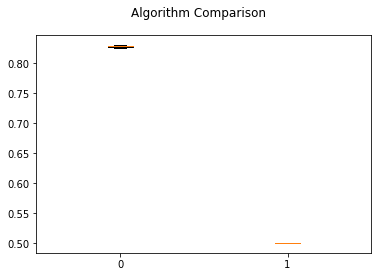

In [ ]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
# load dataset
numeric_features = df6_pd.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df6_pd.select_dtypes(include=['object']).columns
X2 = df6_pd.drop('Delay', axis=1)
y2 = df6_pd['Delay']
# Do the train test split
#le = preprocessing.LabelEncoder()
#label_encoder = le.fit(y)
#y = label_encoder.transform(y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)
block_size=int(round(X_train2.shape[0]/2))
n = block_size  #chunk row size
list_X_train = [X_train2[i:i+n] for i in range(0,X_train2.shape[0],n)]
list_y_train = [y_train2[i:i+n] for i in range(0,y_train2.shape[0],n)]
list_X_test = [X_test2[i:i+n] for i in range(0,X_test2.shape[0],n)]
list_y_test = [y_test2[i:i+n] for i in range(0,y_test2.shape[0],n)]
# Build the encoder

# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                     ('LDA', LinearDiscriminantAnalysis())])).fit(list_X_train[0], list_y_train[0]))
models.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                     ('MLPClassifier',
                      MLPClassifier(hidden_layer_sizes=(10,10), max_iter=5, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=1))])).fit(list_X_train[1], list_y_train[1]))

# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
for name, model in enumerate(models):
    #kfold = model_selection.StratifiedKFold(n_splits=5, random_state=1)
    print('1')
    cv_results = model_selection.cross_val_score(model, list_X_train[name],  list_y_train[name], cv=5, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
!pip install --quiet optuna
!pip install  catboost

     |████████████████████████████████| 66.1MB 54kB/s 


In [ ]:
import numpy as np
def check_target_type(dataframe):
  if type(dataframe[dataframe.columns[-1]][0])==str:
    from sklearn.preprocessing import LabelEncoder
    labelencoder = LabelEncoder()
    dataframe[dataframe.columns[-1]] = labelencoder.fit_transform(dataframe[dataframe.columns[-1]])  
    return dataframe,type(dataframe[dataframe.columns[-1]][0])
  elif type((dataframe[dataframe.columns[-1]].unique())[0])is np.int64 or int or np.int32:
    dataframe[dataframe.columns[-1]]=dataframe[dataframe.columns[-1]].astype(int)
    return dataframe ,type(dataframe[dataframe.columns[-1]][0])
  else:
    return dataframe,type(dataframe[dataframe.columns[-1]][0])

def trim_frist_col(dataframe):
  if dataframe.columns[0].startswith('Unnamed'):
    dataframe=dataframe[dataframe.columns[1:]]
    return dataframe   


In [ ]:
import pandas as pd
#data1=pd.read_csv('/content/drive/My Drive/Astronomy_and_Astrophysics.csv')
#("/content/drive/My Drive/A_Countrywide_Traffic_Accident_Dataset_2016_2019.csv")  
#data1=pd.read_csv("/content/drive/My Drive/complete_fin.csv") 
#A_Countrywide_Traffic_Accident_Dataset_2016_2019
#Astronomy_and_Astrophysics.csv 
data1=pd.read_csv('/content/drive/My Drive/Flights.csv')  

In [ ]:
data1[data1.columns[-1]].unique()

array([0, 1])

In [ ]:
import numpy as np
type((data1[data1.columns[-1]].unique())[0])is np.int64 or int or np.int32

True

In [ ]:
data1,_=check_target_type(data1)
data1=trim_frist_col(data1)

In [ ]:
count_unique1=[]
for i in range(len(data1.columns)):
  if (data1[data1.columns[i]].nunique())<=7  :
     count_unique1.append([data1.columns[i],(data1[data1.columns[i]].nunique())])
                          
uu=[]
for i in range(len(count_unique1)):
  uu.append(count_unique1[i][0])

In [ ]:
count_unique2=[]
for i in range(len(data1.columns)):
  if (data1[data1.columns[i]].nunique())<=50  and (data1[data1.columns[i]].nunique())>7:
     count_unique2.append([data1.columns[i],(data1[data1.columns[i]].nunique())])
                          
aa=[]
for i in range(len(count_unique2)):
  aa.append(count_unique2[i][0])

In [ ]:
count_unique3=[]
for i in range(len(data1.columns)):
  if (data1[data1.columns[i]].nunique())>50:
     count_unique3.append([data1.columns[i],(data1[data1.columns[i]].nunique())])
                          
ff=[]
for i in range(len(count_unique3)):
  ff.append(count_unique3[i][0])


In [ ]:
! pip install category_encoders

     |████████████████████████████████| 81kB 2.3MB/s 


In [ ]:
catorical_col=data1.select_dtypes(include='object')

In [ ]:
s1=[x for x in catorical_col if x in uu]
s2=[x for x in catorical_col if x in aa]
s3=[x for x in catorical_col if x in ff]
sl=s2+s3

In [ ]:
import category_encoders as ce
X = data1.iloc[:,:-1]  #independent columns
y=data1.iloc[:,-1]
ce_ord = ce.ordinal.OrdinalEncoder(cols = s1)
data2=ce_ord.fit_transform(X, y)
data2[data1.columns[-1]]=data1.iloc[:,-1]

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
data3=data2.fillna(0) 


In [ ]:
import numpy as np
numeric=data2.select_dtypes(include=[np.number]).columns
catorical=data1.select_dtypes(include='object').columns

In [ ]:
#numeric_columns = data112.select_dtypes(include=['number']).columns
data2[numeric]=data2[numeric].fillna(data2.median().iloc[0])
#cat_columns = data112.select_dtypes(exclude=['number']).columns
data2[catorical]=data2[catorical].fillna(data2.mode().iloc[0])

In [ ]:
data2.isnull().mean()

In [ ]:
data3=data2.sample(frac=.04,random_state=77)
len(data3)

213317

In [ ]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
#from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
#from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score
import category_encoders as ce
from sklearn.utils import resample
X = data3.drop(data3.columns[-1], axis=1)
y = data3.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
train, test = train_test_split(data3, test_size=0.2)

In [ ]:
len(data3)

1066583

In [ ]:
enc2=[ce.BinaryEncoder,ce.OrdinalEncoder,ce.PolynomialEncoder,ce.LeaveOneOutEncoder,ce.HashingEncoder,ce.BaseNEncoder,ce.MEstimateEncoder,ce.HelmertEncoder,
 ce.JamesSteinEncoder,ce.CatBoostEncoder,ce.OneHotEncoder,ce.BackwardDifferenceEncoder,ce.TargetEncoder,ce.GLMMEncoder,ce.SumEncoder,ce.WOEEncoder]

In [ ]:
def check_target_value(y_train,enc2):
  binary_enc=[ce.WOEEncoder]
  if  y_train.nunique()>2:
    return (list(set(enc2) - set(binary_enc)))
  else:
    return  enc2

In [ ]:
enc3=check_target_value(y_train,enc2)

In [ ]:
import random
import math
list_train=[]
for i in range(len(enc3)):
  list_train.append(train.sample(frac=1/len(enc3),random_state=99)) 
list_test=[]
for i in range(len(enc3)):
  list_test.append(test.sample(frac=1/len(enc3),random_state=33))

In [ ]:
import random
import math
list_X_train=[]
list_y_train=[]
for i in range(len(list_train)):
  list_X_train.append(list_train[i].drop(list_train[i].columns[-1], axis=1)) 
  list_y_train.append(list_train[i].iloc[:,-1]) 

list_X_test=[]
list_y_test=[]
for i in range(len(list_test)):
  list_X_test.append(list_test[i].drop(list_test[i].columns[-1], axis=1)) 
  list_y_test.append(list_test[i].iloc[:,-1]) 

In [ ]:
import category_encoders as ce
names_encoders=[]
for i, _ in enumerate(ce.__all__):
    names_encoders.append(str(ce.__all__[i])+"encoder")  
names_encoders    

['BackwardDifferenceEncoderencoder',
 'BinaryEncoderencoder',
 'HashingEncoderencoder',
 'HelmertEncoderencoder',
 'OneHotEncoderencoder',
 'OrdinalEncoderencoder',
 'SumEncoderencoder',
 'PolynomialEncoderencoder',
 'BaseNEncoderencoder',
 'LeaveOneOutEncoderencoder',
 'TargetEncoderencoder',
 'WOEEncoderencoder',
 'MEstimateEncoderencoder',
 'JamesSteinEncoderencoder',
 'CatBoostEncoderencoder',
 'GLMMEncoderencoder']

In [ ]:
training_numeric_dataset=[]
intermidate=[]
testing_numeric_dataset=[]
for i,encoder in enumerate(enc3):
     training_numeric_dataset.append(enc3[i](cols=s2))
     if enc3[i]==ce.glmm.GLMMEncoder:
        intermidate.append(training_numeric_dataset[i].fit_transform(X_train,y_train))
     else:
        intermidate.append(training_numeric_dataset[i].fit_transform(list_X_train[i],list_y_train[i]))

In [ ]:
 def test_ignored_columns_are_untouched(self):
        # Make sure None values in ignored columns are preserved.
        # See: https://github.com/scikit-learn-contrib/category_encoders/pull/261
       
        for encoder_name in (set(encoders.__all__)):
            with self.subTest(encoder_name=encoder_name):
                enc = getattr(encoders, encoder_name)(cols=s2)
                out = enc.fit_transform(X, y)
                self.assertTrue(out.col2[2] is None)

In [ ]:
xx=[]
for i in range(len(enc3)):
  if len(intermidate[i].columns)<=len(X_train.columns):
    xx.append(enc3[i])
xx

[category_encoders.ordinal.OrdinalEncoder,
 category_encoders.leave_one_out.LeaveOneOutEncoder,
 category_encoders.m_estimate.MEstimateEncoder,
 category_encoders.james_stein.JamesSteinEncoder,
 category_encoders.cat_boost.CatBoostEncoder,
 category_encoders.target_encoder.TargetEncoder,
 category_encoders.glmm.GLMMEncoder,
 category_encoders.woe.WOEEncoder]

In [ ]:
enc4=[i for i in enc3 if i  in xx]

In [ ]:
def check_imblanced(y_train):
  if (y_train.value_counts(normalize=True).values.min()<1/len(y_train.value_counts(normalize=True).values)*100) or (y_train.value_counts(normalize=True).values.max()>(len(y_train.value_counts(normalize=True).values)-1)/len(y_train.value_counts(normalize=True).values)*100):
    return True
  else:
    return False  

In [ ]:
len(data3)

799937

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

my_dict2={}
for i in range (len(enc4)):
  model = Pipeline(steps=[('preprocessor',enc4[i]()),('classifier',RandomForestClassifier())]) 
  y_score2 = model.fit(X_train,y_train)
  y_true2,y_pred2 =y_test, model.predict(X_test)
  if y_train.nunique()>2:
      if check_imblanced(y_train):
          my_dict2[enc4[i]]= [accuracy_score(y_test, y_pred2),precision_score(y_test, y_pred2, average='weighted'),
                           recall_score(y_test, y_pred2, average='weighted'),f1_score(y_test, y_pred2, average='weighted')]
      else:
        my_dict2[enc4[i]]= [accuracy_score(y_test, y_pred2),precision_score(y_test, y_pred2, average='macro'),
                           recall_score(y_test, y_pred2, average='macro'),f1_score(y_test, y_pred2, average='macro')]
  else:
     my_dict2[enc4[i]]= [accuracy_score(y_test, y_pred2),precision_score(y_test, y_pred2,average='binary'),
                           recall_score(y_test, y_pred2, average='binary'),f1_score(y_test, y_pred2, average='binary')]

In [ ]:
my_dict2={ce.cat_boost.CatBoostEncoder: [0.9998854083110227,
  0.9629629629629629,
  0.9961685823754789,
  0.9792843691148776],
 ce.glmm.GLMMEncoder: [0.999749981769504,
  0.979757085020243,
  0.9272030651340997,
  0.9527559055118111],
 ce.james_stein.JamesSteinEncoder: [0.9996353900805267,
  0.9870689655172413,
  0.8773946360153256,
  0.9290060851926977],
 ce.leave_one_out.LeaveOneOutEncoder: [0.9995728855229027,
  1.0,
  0.842911877394636,
  0.9147609147609148],
ce.m_estimate.MEstimateEncoder: [0.9996666423593387,
  0.9872340425531915,
  0.8888888888888888,
  0.9354838709677419],
 ce.ordinal.OrdinalEncoder: [0.9998749908847521,
  0.9662921348314607,
  0.9885057471264368,
  0.9772727272727273],
 ce.target_encoder.TargetEncoder: [0.9996353900805267,
  0.9870689655172413,
  0.8773946360153256,
  0.9290060851926977],
 ce.woe.WOEEncoder: [0.999749981769504,
  0.9647058823529412,
  0.9425287356321839,
  0.9534883720930232]}

In [ ]:
my_dict2={ce.cat_boost.CatBoostEncoder: [0.9999141943926035,
  0.9803439803439803,
  0.9803439803439803,
  0.9803439803439803],
 ce.glmm.GLMMEncoder: [0.9999141943926035,
  0.9803439803439803,
  0.9803439803439803,
  0.9803439803439803],
 ce.james_stein.JamesSteinEncoder: [0.9999088315421413,
  0.9802955665024631,
  0.9778869778869779,
  0.9790897908979089],
 ce.leave_one_out.LeaveOneOutEncoder: [0.9985466675247228,
  0.9927536231884058,
  0.3366093366093366,
  0.5027522935779817],
 ce.m_estimate.MEstimateEncoder: [0.9999141943926035,
  0.9803439803439803,
  0.9803439803439803,
  0.9803439803439803],
 ce.ordinal.OrdinalEncoder: [0.9999141943926035,
  0.9803439803439803,
  0.9803439803439803,
  0.9803439803439803],
 ce.target_encoder.TargetEncoder: [0.9999141943926035,
  0.9803439803439803,
  0.9803439803439803,
  0.9803439803439803],
 ce.woe.WOEEncoder: [0.9999195572430658,
  0.9827586206896551,
  0.9803439803439803,
  0.981549815498155]}

In [ ]:
my_dict2={ce.backward_difference.BackwardDifferenceEncoder: [0.9226832447725771,
  0.6793428096732509,
  0.12959571770671927,
  0.21766776092035608],
 ce.basen.BaseNEncoder: [0.9226744763808755,
  0.6791651274473587,
  0.12949006902380616,
  0.21750961254066847],
 ce.binary.BinaryEncoder: [0.9226394028140692,
  0.6781226903178122,
  0.1292435554303423,
  0.2171083767155703],
 ce.cat_boost.CatBoostEncoder: [0.9226890903670448,
  0.6789328426862925,
  0.1299478799830962,
  0.21814312317105614],
 ce.glmm.GLMMEncoder: [0.9226394028140692,
  0.6781226903178122,
  0.1292435554303423,
  0.2171083767155703],
 ce.hashing.HashingEncoder: [0.922730009528319,
  0.679625894003301,
  0.13051133962529934,
  0.21897249549469705],
 ce.helmert.HelmertEncoder: [0.9228556898093752,
  0.6842105263157895,
  0.1309339343569517,
  0.21980490688737808],
 ce.james_stein.JamesSteinEncoder: [0.9226072520444967,
  0.6766820276497696,
  0.12927877165798,
  0.21708406019928445],
 ce.leave_one_out.LeaveOneOutEncoder: [0.9228966089706493,
  0.6875,
  0.13015917734892238,
  0.21887954518536065],
 ce.m_estimate.MEstimateEncoder: [0.9227826198785285,
  0.6829539144919489,
  0.1299478799830962,
  0.218349655315246],
 ce.one_hot.OneHotEncoder: [0.9227241639338513,
  0.6809691141113372,
  0.12966615016199465,
  0.21785048664319734],
 ce.ordinal.OrdinalEncoder: [0.9226306344223676,
  0.677550267478325,
  0.1293492041132554,
  0.21722802140935032],
 ce.polynomial.PolynomialEncoder: [0.9225049541413114,
  0.6729143697170158,
  0.12896182560924074,
  0.21644305218984575],
 ce.sum_coding.SumEncoder: [0.9226306344223676,
  0.677550267478325,
  0.1293492041132554,
  0.21722802140935032],
 ce.target_encoder.TargetEncoder: [0.9226686307864078,
  0.6785187914517318,
  0.12970136638963234,
  0.2177743614001892],
 ce.woe.WOEEncoder: [0.9225049541413114,
  0.6729143697170158,
  0.12896182560924074,
  0.21644305218984575]}

In [ ]:
my_dict2

{category_encoders.backward_difference.BackwardDifferenceEncoder: [0.9999723535428935,
  1.0,
  0.9997907074089577,
  0.9998953427524857],
 category_encoders.basen.BaseNEncoder: [0.9999723535428935,
  1.0,
  0.9997907074089577,
  0.9998953427524857],
 category_encoders.binary.BinaryEncoder: [0.9999723535428935,
  1.0,
  0.9997907074089577,
  0.9998953427524857],
 category_encoders.cat_boost.CatBoostEncoder: [0.9999723535428935,
  1.0,
  0.9997907074089577,
  0.9998953427524857],
 category_encoders.glmm.GLMMEncoder: [0.9999723535428935,
  1.0,
  0.9997907074089577,
  0.9998953427524857],
 category_encoders.hashing.HashingEncoder: [0.9999723535428935,
  1.0,
  0.9997907074089577,
  0.9998953427524857],
 category_encoders.helmert.HelmertEncoder: [0.9999723535428935,
  1.0,
  0.9997907074089577,
  0.9998953427524857],
 category_encoders.james_stein.JamesSteinEncoder: [0.9999723535428935,
  1.0,
  0.9997907074089577,
  0.9998953427524857],
 category_encoders.leave_one_out.LeaveOneOutEncoder

In [ ]:
my_dict2

{category_encoders.cat_boost.CatBoostEncoder: [0.8777248873652568,
  0.875309689249976,
  0.8777248873652568,
  0.8736819121297492],
 category_encoders.glmm.GLMMEncoder: [0.8846540166386444,
  0.882726236118656,
  0.8846540166386444,
  0.8817810423131309],
 category_encoders.james_stein.JamesSteinEncoder: [0.8853236383751483,
  0.8834283136219793,
  0.8853236383751483,
  0.8824966087491329],
 category_encoders.leave_one_out.LeaveOneOutEncoder: [0.7086344811523316,
  0.6951653151704463,
  0.7086344811523316,
  0.6267277461978549],
 category_encoders.m_estimate.MEstimateEncoder: [0.885272688895197,
  0.8833924396527871,
  0.885272688895197,
  0.882402851412664],
 category_encoders.ordinal.OrdinalEncoder: [0.8823430937979926,
  0.8803072866180399,
  0.8823430937979926,
  0.8794725415953025],
 category_encoders.target_encoder.TargetEncoder: [0.8847923080842268,
  0.882847008876274,
  0.8847923080842268,
  0.8819104432327065]}

In [ ]:
my_dict2={ce.cat_boost.CatBoostEncoder: [0.8777248873652568,
  0.875309689249976,
  0.8777248873652568,
  0.8736819121297492],
 ce.glmm.GLMMEncoder: [0.8846540166386444,
  0.882726236118656,
  0.8846540166386444,
  0.8817810423131309],
 ce.james_stein.JamesSteinEncoder: [0.8853236383751483,
  0.8834283136219793,
  0.8853236383751483,
  0.8824966087491329],
 ce.leave_one_out.LeaveOneOutEncoder: [0.7086344811523316,
  0.6951653151704463,
  0.7086344811523316,
  0.6267277461978549],
 ce.m_estimate.MEstimateEncoder: [0.885272688895197,
  0.8833924396527871,
  0.885272688895197,
  0.882402851412664],
 ce.ordinal.OrdinalEncoder: [0.8823430937979926,
  0.8803072866180399,
  0.8823430937979926,
  0.8794725415953025],
 ce.target_encoder.TargetEncoder: [0.8847923080842268,
  0.882847008876274,
  0.8847923080842268,
  0.8819104432327065]}

In [ ]:
def check_gpu(my_dict2,devices=(-1,)):
  Accepted2=[] 
  for i in range(len(list(my_dict2.keys()))):
      if list(my_dict2.values())[i][0]>.80:
        Accepted2.append(list(my_dict2.keys())[i])
  device = devices[0]
  if device == -1:
        # use cpu
   return (list(set(Accepted2) - set([ce.CatBoostEncoder])))
  else:
   return  Accepted2

In [ ]:
Accepted3=check_gpu(my_dict2,devices=(-1,))
Accepted3

[category_encoders.ordinal.OrdinalEncoder,
 category_encoders.glmm.GLMMEncoder,
 category_encoders.james_stein.JamesSteinEncoder,
 category_encoders.m_estimate.MEstimateEncoder,
 category_encoders.target_encoder.TargetEncoder]

In [ ]:
Accepted2=[] 
for i in range(len(list(my_dict2.keys()))):
      if list(my_dict2.values())[i][0]>.80:
        Accepted2.append(list(my_dict2.keys())[i])
Accepted2       

[category_encoders.cat_boost.CatBoostEncoder,
 category_encoders.glmm.GLMMEncoder,
 category_encoders.james_stein.JamesSteinEncoder,
 category_encoders.leave_one_out.LeaveOneOutEncoder,
 category_encoders.m_estimate.MEstimateEncoder,
 category_encoders.ordinal.OrdinalEncoder,
 category_encoders.target_encoder.TargetEncoder,
 category_encoders.woe.WOEEncoder]

In [ ]:
def check_gpu(my_dict2,devices=(-1,)):
  Accepted2=[] 
  for i in range(len(list(my_dict2.keys()))):
      if list(my_dict2.values())[i][0]>.80:
        Accepted2.append(list(my_dict2.keys())[i])
  device = devices[0]
    if device == -1:
        # use cpu
    return (list(set(Accepted2) - set([ce.CatBoostEncoder])))
  else:
    return  Accepted2
        

[category_encoders.cat_boost.CatBoostEncoder,
 category_encoders.glmm.GLMMEncoder,
 category_encoders.james_stein.JamesSteinEncoder,
 category_encoders.m_estimate.MEstimateEncoder,
 category_encoders.ordinal.OrdinalEncoder,
 category_encoders.target_encoder.TargetEncoder]

In [ ]:
Accepted2=[ce.ordinal.OrdinalEncoder,
 ce.cat_boost.CatBoostEncoder,
 ce.james_stein.JamesSteinEncoder,
 ce.m_estimate.MEstimateEncoder,
 ce.glmm.GLMMEncoder,
 ce.target_encoder.TargetEncoder]

In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import warnings
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier,BaggingClassifier
import xgboost
from xgboost import XGBClassifier
import lightgbm as lgb
#{'clf': {'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 27}}
#max_depth=7, max_features='auto', min_samples_leaf=2,
                       #min_samples_split=3,n_estimators=27,random_state = 0))
#DecisionTreeClassifier(max_depth=1),n_estimators=30,learning_rate=0.9949357616825972)) 
#max_depth=2,n_estimators=10,objective='binary:logistic'))
pipe1 = make_pipeline(Accepted[0](),BaggingClassifier(DecisionTreeClassifier()))
pipe2 = make_pipeline(Accepted[1](),HistGradientBoostingClassifier())
pipe3 = make_pipeline(Accepted[2](),XGBClassifier())
pipe4 = make_pipeline(Accepted[3](),RandomForestClassifier())
pipe5 = make_pipeline(Accepted[4](),lgb.LGBMClassifier())
pipe6 = make_pipeline(Accepted[5](),ExtraTreesClassifier(criterion= 'entropy'))
pipe7 = make_pipeline(Accepted[6](),AdaBoostClassifier())
lr = LogisticRegression(max_iter=50, class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7]
                          # ,use_probas=True,use_features_in_secondary=True,
                           ,meta_classifier=lr)
#sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7],meta_classifier=LogisticRegression())

model2=sclf2.fit(X_train, y_train)
y_true, y_pred  =y_test, model2.predict(X_test)
print("StackingClassifier score: %f" % accuracy_score(y_test, y_pred2))
print('precision_score: {0:.5f}'.format(precision_score(y_test, y_pred2, average='weighted')))
print('recall_score: {0:.5f}'.format(recall_score(y_test, y_pred2, average='weighted')))
print('f1_score: {0:.5f}'.format(f1_score(y_test, y_pred2, average='weighted')))


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).



NameError: ignored

In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=[str(x) for x in sorted(list(y_train.unique())) ]    )  )


Accuracy: 0.89

Micro Precision: 0.89
Micro Recall: 0.89
Micro F1-score: 0.89

Macro Precision: 0.84
Macro Recall: 0.65
Macro F1-score: 0.71

Weighted Precision: 0.88
Weighted Recall: 0.89
Weighted F1-score: 0.88

Classification Report

              precision    recall  f1-score   support

           1       0.81      0.53      0.64      1592
           2       0.91      0.94      0.92    189942
           3       0.83      0.80      0.81     79266
           4       0.80      0.34      0.48      3982

    accuracy                           0.89    274782
   macro avg       0.84      0.65      0.71    274782
weighted avg       0.88      0.89      0.88    274782



In [ ]:
sl=s2+s3

In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score
import lightgbm as lgb
import numpy as np
import warnings
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
params={
   'HistGradientBoostingClassifier':{
  'l2_regularization': 0.0,
   'learning_rate': 0.029641454778718972,
   'max_bins': 60,
   'max_depth': 4,
   'max_iter': 45,
   'max_leaf_nodes': 20,
   'min_samples_leaf': 15,
   'n_iter_no_change': None,
   'tol': 1e-07,
   'validation_fraction': 0.1},
    
'RandomForestClassifier':{'criterion': 'entropy',
   'max_depth': 9,
   'max_features': 'auto',
   'min_samples_leaf': 6,
   'min_samples_split': 4,
   'n_estimators': 70},

}
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res
        ###########################################
#numeric_features =  X_train.select_dtypes(include=['int64', 'float64']).columns
pipe0 = make_pipeline(MinMaxScaler(copy=True, feature_range=(0, 1)))

pipe1 = make_pipeline(Accepted[0](),LinearDiscriminantAnalysis())
pipe2 = make_pipeline(Accepted[1](),HistGradientBoostingClassifier(**params['HistGradientBoostingClassifier'],random_state=1))
pipe3 = make_pipeline(Accepted[2](),lgb.LGBMClassifier())
pipe4 = make_pipeline(Accepted[3](),RandomForestClassifier(**params['RandomForestClassifier'],random_state=1))
pipe5 = make_pipeline(Accepted[4](),AdaBoostClassifier())
pipe6 = make_pipeline(Accepted[5](),ExtraTreesClassifier(criterion= 'entropy'))
pipe7 = make_pipeline(Accepted[6](),AdaBoostClassifier())
#preprocessor = ColumnTransformer( transformers=[('num', pipe0, numeric_features),('cat', [pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7], sl)],remainder='passthrough')
#clf = Pipeline(steps=[('preprocessor', preprocessor)])
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7], meta_classifier=LogisticRegression())

model3=sclf2.fit(X_train, y_train)
y_true1, y_pred1  =y_test, model3.predict(X_test)
print("StackingClassifier score: %f" % accuracy_score(y_test, y_pred1))
print('fbeta_score_macro: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='macro', beta=0.5)))
print('fbeta_score_micro: {0:.5f}'.format( fbeta_score(y_true1, y_pred1, average='micro', beta=0.5)  ))
print('fbeta_score_weighted: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='weighted', beta=0.5) ))
# fbeta_score(y_true, y_pred, average=None, beta=0.5)

In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score
import lightgbm as lgb
import numpy as np
import warnings
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
params={
   'HistGradientBoostingClassifier':{
  'l2_regularization': 0.0,
   'learning_rate': 0.029641454778718972,
   'max_bins': 60,
   'max_depth': 4,
   'max_iter': 45,
   'max_leaf_nodes': 20,
   'min_samples_leaf': 15,
   'n_iter_no_change': None,
   'tol': 1e-07,
   'validation_fraction': 0.1},
    
'RandomForestClassifier':{'criterion': 'entropy',
   'max_depth': 9,
   'max_features': 'auto',
   'min_samples_leaf': 6,
   'min_samples_split': 4,
   'n_estimators': 70},

}
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res
        ###########################################
#numeric_features =  X_train.select_dtypes(include=['int64', 'float64']).columns
pipe0 = make_pipeline(MinMaxScaler(copy=True, feature_range=(0, 1)))

pipe1 = make_pipeline(Accepted[0](),LinearDiscriminantAnalysis())
pipe2 = make_pipeline(Accepted[1](),HistGradientBoostingClassifier(**params['HistGradientBoostingClassifier'],random_state=1))
pipe3 = make_pipeline(Accepted[2](),lgb.LGBMClassifier())
pipe4 = make_pipeline(Accepted[3](),RandomForestClassifier(**params['RandomForestClassifier'],random_state=1))
pipe5 = make_pipeline(Accepted[4](),AdaBoostClassifier())
pipe6 = make_pipeline(Accepted[5](),ExtraTreesClassifier(criterion= 'entropy'))
pipe7 = make_pipeline(Accepted[6](),AdaBoostClassifier())
#preprocessor = ColumnTransformer( transformers=[('num', pipe0, numeric_features),('cat', [pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7], sl)],remainder='passthrough')
#clf = Pipeline(steps=[('preprocessor', preprocessor)])
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7], meta_classifier=LogisticRegression())

model3=sclf2.fit(X_train, y_train)
y_true1, y_pred1  =y_test, model3.predict(X_test)
print("StackingClassifier score: %f" % accuracy_score(y_test, y_pred1))
print('fbeta_score_macro: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='macro', beta=0.5)))
print('fbeta_score_micro: {0:.5f}'.format( fbeta_score(y_true1, y_pred1, average='micro', beta=0.5)  ))
print('fbeta_score_weighted: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='weighted', beta=0.5) ))
# fbeta_score(y_true, y_pred, average=None, beta=0.5)

In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score
import lightgbm as lgb
import numpy as np
import warnings
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA 
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_transformer
from mlxtend.classifier import StackingCVClassifier


In [ ]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA 
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_transformer
from mlxtend.classifier import StackingCVClassifier

params={
   'HistGradientBoostingClassifier':{
  'l2_regularization': 0.0,
   'learning_rate': 0.029641454778718972,
   'max_bins': 60,
   'max_depth': 4,
   'max_iter': 45,
   'max_leaf_nodes': 20,
   'min_samples_leaf': 15,
   'n_iter_no_change': None,
   'tol': 1e-07,
   'validation_fraction': 0.1},
    
'RandomForestClassifier':{'criterion': 'entropy',
   'max_depth': 9,
   'max_features': 'auto',
   'min_samples_leaf': 6,
   'min_samples_split': 4,
   'n_estimators': 70},

}
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

###################################################################################
#, QuantileTransformer(n_quantiles=200, random_state=0),
#################################
cat_proc1 = make_pipeline( Accepted[0]()   )
cat_proc2 = make_pipeline( Accepted[1]()   )
cat_proc3 = make_pipeline( Accepted[2]()   )
cat_proc4 = make_pipeline( Accepted[3]()   )
cat_proc5 = make_pipeline( Accepted[4]()  )
cat_proc6 = make_pipeline( Accepted[5]()  )
#cat_proc7 = make_pipeline( Accepted[6](), QuantileTransformer(n_quantiles=200, random_state=0), PCA(n_components=4)   )
num_proc_nlin = make_pipeline( QuantileTransformer(n_quantiles=200, random_state=0),PCA(n_components=4))
numeric_features=X_train.select_dtypes(include=[np.number]).columns
# transformation to use for non-linear estimators
processor1 = make_column_transformer((cat_proc1, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
processor2 = make_column_transformer((cat_proc2, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
processor3 = make_column_transformer((cat_proc3, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
processor4 = make_column_transformer((cat_proc4, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
processor5 = make_column_transformer((cat_proc5, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
processor6 = make_column_transformer((cat_proc6, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
processor7 = make_column_transformer((cat_proc7, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
#######################################################################################################################

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
pipe1 = make_pipeline(processor1,LinearDiscriminantAnalysis())
pipe2 = make_pipeline(processor2,HistGradientBoostingClassifier(**params['HistGradientBoostingClassifier'],random_state=1))
pipe3 = make_pipeline(processor3,lgb.LGBMClassifier())
pipe4 = make_pipeline(processor4,RandomForestClassifier(**params['RandomForestClassifier'],random_state=1))
pipe5 = make_pipeline(processor5,AdaBoostClassifier())
pipe6 = make_pipeline(processor6,ExtraTreesClassifier(criterion= 'entropy'))
pipe7 = make_pipeline(processor6,AdaBoostClassifier())
estimators = [('pipe1', pipe1), ('pipe2', pipe2), ('pipe3', pipe3),('pipe4', pipe4),('pipe5', pipe5),('pipe6', pipe6),('pipe7', pipe7)]
lr = LogisticRegression(max_iter=50, class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
#sclf = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6],meta_classifier=lr)
sclf = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7],meta_classifier=lr)
model3=sclf.fit(X_train, y_train)
y_true1, y_pred1  =y_test, model3.predict(X_test)
print("StackingClassifier score: %f" % accuracy_score(y_test, y_pred1))
print('fbeta_score_macro: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='macro', beta=0.5)))
print('fbeta_score_micro: {0:.5f}'.format( fbeta_score(y_true1, y_pred1, average='micro', beta=0.5)  ))
print('fbeta_score_weighted: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='weighted', beta=0.5) ))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


StackingClassifier score: 0.802240
fbeta_score_macro: 0.41786
fbeta_score_micro: 0.80224
fbeta_score_weighted: 0.78636


In [ ]:
! pip  install catboost 

In [ ]:

from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score
import lightgbm as lgb
import numpy as np
import warnings
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA 
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_transformer
from mlxtend.classifier import StackingCVClassifier
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv
import xgboost
from xgboost import XGBClassifier
import lightgbm as lgb

In [ ]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA 
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_transformer
from mlxtend.classifier import StackingCVClassifier
from sklearn.preprocessing import MinMaxScaler

params={
   'HistGradientBoostingClassifier':{
  'l2_regularization': 0.0,
   'learning_rate': 0.029641454778718972,
   'max_bins': 60,
   'max_depth': 4,
   'max_iter': 45,
   'max_leaf_nodes': 20,
   'min_samples_leaf': 15,
   'n_iter_no_change': None,
   'tol': 1e-07,
   'validation_fraction': 0.1},
    
'RandomForestClassifier':{'criterion': 'entropy',
   'max_depth': 9,
   'max_features': 'auto',
   'min_samples_leaf': 6,
   'min_samples_split': 4,
   'n_estimators': 70},

}
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

###################################################################################
#, QuantileTransformer(n_quantiles=200, random_state=0),
#################################
cat_proc1 = make_pipeline( Accepted[0](), MinMaxScaler()   )
cat_proc2 = make_pipeline( Accepted[1](), MinMaxScaler()   )
cat_proc3 = make_pipeline( Accepted[2](), MinMaxScaler()   )
cat_proc4 = make_pipeline( Accepted[3](), MinMaxScaler()   )
cat_proc5 = make_pipeline( Accepted[4](), MinMaxScaler()  )
cat_proc6 = make_pipeline( Accepted[5](), MinMaxScaler()  )
#cat_proc7 = make_pipeline( Accepted[6](), QuantileTransformer(n_quantiles=200, random_state=0), PCA(n_components=4)   )
num_proc_nlin = make_pipeline( MinMaxScaler(),PCA(n_components=6))
numeric_features=X_train.select_dtypes(include=[np.number]).columns
# transformation to use for non-linear estimators
processor1 = make_column_transformer((cat_proc1, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
processor2 = make_column_transformer((cat_proc2, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
processor3 = make_column_transformer((cat_proc3, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
processor4 = make_column_transformer((cat_proc4, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
processor5 = make_column_transformer((cat_proc5, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
processor6 = make_column_transformer((cat_proc6, sl),(num_proc_nlin, numeric_features),remainder='passthrough')
processor7 = make_column_transformer((cat_proc7, sl),(num_proc_nlin, numeric_features),remainder='passthrough')

#######################################################################################################################

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
pipe1 = make_pipeline(processor1,LinearDiscriminantAnalysis())
pipe2 = make_pipeline(processor2,HistGradientBoostingClassifier(**params['HistGradientBoostingClassifier'],random_state=1))
pipe3 = make_pipeline(processor3,lgb.LGBMClassifier())
pipe4 = make_pipeline(processor4,RandomForestClassifier(**params['RandomForestClassifier'],random_state=1))
pipe5 = make_pipeline(processor5,AdaBoostClassifier())
pipe6 = make_pipeline(processor6,ExtraTreesClassifier(criterion= 'entropy'))
pipe7 = make_pipeline(processor6,AdaBoostClassifier())
estimators = [('pipe1', pipe1), ('pipe2', pipe2), ('pipe3', pipe3),('pipe4', pipe4),('pipe5', pipe5),('pipe6', pipe6),('pipe7', pipe7)]
lr = LogisticRegression(max_iter=50, class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
#sclf = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6],meta_classifier=lr)
sclf = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6,pipe7],meta_classifier=lr)
model3=sclf.fit(X_train, y_train)
y_true1, y_pred1  =y_test, model3.predict(X_test)
print("StackingClassifier score: %f" % accuracy_score(y_test, y_pred1))
print('fbeta_score_macro: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='macro', beta=0.5)))
print('fbeta_score_micro: {0:.5f}'.format( fbeta_score(y_true1, y_pred1, average='micro', beta=0.5)  ))
print('fbeta_score_weighted: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='weighted', beta=0.5) ))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


StackingClassifier score: 0.802385
fbeta_score_macro: 0.38393
fbeta_score_micro: 0.80239
fbeta_score_weighted: 0.78636


In [ ]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA 
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_transformer
from mlxtend.classifier import StackingCVClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer
from hyperopt.pyll import scope as ho_scope 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from hyperopt.pyll import scope as ho_scope                                       
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
import numpy as np
from hyperopt.pyll.stochastic import sample as ho_sample
from functools import partial
import xgboost as xgb
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
params={
   'HistGradientBoostingClassifier':{
  'l2_regularization': 0.0,
   'learning_rate': 0.029641454778718972,
   'max_bins': 60,
   'max_depth': 4,
   'max_iter': 45,
   'max_leaf_nodes': 20,
   'min_samples_leaf': 15,
   'n_iter_no_change': None,
   'tol': 1e-07,
   'validation_fraction': 0.1},
    
'RandomForestClassifier':{'criterion': 'entropy',
   'max_depth': 9,
   'max_features': 'auto',
   'min_samples_leaf': 6,
   'min_samples_split': 4,
   'n_estimators': 70},

'ExtraTreesClassifier':
            {
                'max_depth': ho_scope.int(hp.quniform('c4_max_depth', 5, 20, 1)),
                'n_estimators': ho_scope.int(hp.quniform('c4_n_estimators', 5, 30, 1)),
                'max_features': ho_scope.int(hp.quniform('c4_max_features', 5, 20, 1)),
                'criterion': hp.choice('c4_criterion', ['gini', 'entropy']),
                'min_samples_split': ho_scope.int(hp.quniform('c4_min_samples_split', 2, 5,1)),
                'min_samples_leaf': ho_scope.int(hp.quniform('c4_min_samples_leaf', 2, 5,1))
       },
          'AdaBoostClassifier':
   {
         'base_estimator':hp.choice('base_estimator', [DecisionTreeClassifier()]),
          'learning_rate': hp.loguniform('c5_learning_rate', np.log(0.01), np.log(1)),
          'n_estimators': ho_scope.int(hp.quniform('c5_n_estimators', 10, 80, 10)),
          'algorithm': hp.choice('c5_algorithm',["SAMME"])  
       },
       'XGBClassifier':
    {
         'n_estimators': ho_scope.int(hp.quniform('n_estimators', 100, 1000, 100)),
        'eta':ho_scope.float(hp.quniform('eta', 0.025, 0.5, 0.025)) ,
        'max_depth':ho_scope.int( hp.quniform('max_depth', 2, 14,2)) ,
        'min_child_weight':ho_scope.int(hp.quniform('min_child_weight', 1, 6, 1)) ,
        'subsample':ho_scope.float(hp.quniform('subsample', 0.5, 1.0, 0.05)),
        'gamma':ho_scope.float( hp.quniform('gamma', 0.5, 1, 0.05)) ,
        'colsample_bytree': ho_scope.float(hp.quniform('colsample_bytree', 0.5, 1, 0.05)),
        'eval_metric': 'auc',
        'objective': 'binary:logistic',
         'nthread': 10,
        'booster': 'gbtree',
        'tree_method': 'exact',
        'silent': 1,
       
       },
 }

def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

###################################################################################
#, QuantileTransformer(n_quantiles=200, random_state=0),
#################################
cat_proc1 = make_pipeline( Accepted2[0]())
cat_proc2 = make_pipeline( Accepted2[1]()  )
cat_proc3 = make_pipeline( Accepted2[2]()   )
cat_proc4 = make_pipeline( Accepted2[3]()  )
cat_proc5 = make_pipeline( Accepted2[4]()  )
cat_proc6 = make_pipeline( Accepted2[5]()  )
#cat_proc7 = make_pipeline( Accepted[6]())#, QuantileTransformer(n_quantiles=200, random_state=0), PCA(n_components=4)   )
num_proc_nlin0 = make_pipeline( PowerTransformer(),PCA(n_components=5))
num_proc_nlin1 = make_pipeline( QuantileTransformer(n_quantiles=400, random_state=0),PCA(n_components=4))
num_proc_nlin2 = make_pipeline( Normalizer(),PCA(n_components=4))
num_proc_nlin3 = make_pipeline( MinMaxScaler(),PCA(n_components=4))
numeric_features=X_train.select_dtypes(include=[np.number]).columns
# transformation to use for non-linear estimators
processor1 = make_column_transformer((make_pipeline( Accepted2[0]()), sl),remainder='passthrough')
processor2 = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough')
processor3 = make_column_transformer((make_pipeline( Accepted2[2]()), sl),remainder='passthrough')
processor4 = make_column_transformer((make_pipeline( Accepted2[3]()), sl),remainder='passthrough')
processor5 = make_column_transformer((make_pipeline( Accepted2[4]()), sl),remainder='passthrough')
processor6 = make_column_transformer((make_pipeline( Accepted2[5]()), sl),remainder='passthrough')
#processor7 = make_column_transformer((cat_proc7, sl),remainder='passthrough')

#######################################################################################################################

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
pipe1 = make_pipeline(processor1,LinearDiscriminantAnalysis())
pipe2 = make_pipeline(processor2,HistGradientBoostingClassifier(**params['HistGradientBoostingClassifier'],random_state=1))
pipe3 = make_pipeline(processor3,lgb.LGBMClassifier())
pipe4 = make_pipeline(processor4,RandomForestClassifier(**params['RandomForestClassifier'],random_state=1))
pipe5 = make_pipeline(processor5,AdaBoostClassifier())
pipe6 = make_pipeline(processor6,ExtraTreesClassifier(criterion= 'entropy'))
#pipe7 = make_pipeline(processor6,AdaBoostClassifier())
estimators = [('pipe1', pipe1), ('pipe2', pipe2), ('pipe3', pipe3),('pipe4', pipe4),('pipe5', pipe5),('pipe6', pipe6)]
lr = LogisticRegression(max_iter=50, class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
sclf = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5,pipe6],meta_classifier=lr)
#sclf2 = StackingClassifier(classifiers=[pipe2,pipe3,pipe4],meta_classifier=lr)
model4=sclf.fit(X_train, y_train)
y_true1, y_pred1  =y_test, model4.predict(X_test)
print("StackingClassifier score: %f" % accuracy_score(y_test, y_pred1))
print('fbeta_score_macro: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='macro', beta=0.5)))
print('fbeta_score_micro: {0:.5f}'.format( fbeta_score(y_true1, y_pred1, average='micro', beta=0.5)  ))
print('fbeta_score_weighted: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='weighted', beta=0.5) ))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


StackingClassifier score: 0.859787
fbeta_score_macro: 0.68465
fbeta_score_micro: 0.85979
fbeta_score_weighted: 0.85440


In [ ]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.decomposition import PCA 
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_transformer
from mlxtend.classifier import StackingCVClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import Normalizer
params={
   'HistGradientBoostingClassifier':{
  'l2_regularization': 0.0,
   'learning_rate': 0.029641454778718972,
   'max_bins': 60,
   'max_depth': 4,
   'max_iter': 45,
   'max_leaf_nodes': 20,
   'min_samples_leaf': 15,
   'n_iter_no_change': None,
   'tol': 1e-07,
   'validation_fraction': 0.1},
    
'RandomForestClassifier':{'criterion': 'entropy',
   'max_depth': 9,
   'max_features': 'auto',
   'min_samples_leaf': 6,
   'min_samples_split': 4,
   'n_estimators': 70},

}
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

###################################################################################
#, QuantileTransformer(n_quantiles=200, random_state=0),
#################################
# transformation to use for non-linear estimators
processor1 = make_column_transformer((make_pipeline( Accepted2[0]()), sl),remainder='passthrough')
processor2 = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough')
processor3 = make_column_transformer((make_pipeline( Accepted2[2]()), sl),remainder='passthrough')
processor4 = make_column_transformer((make_pipeline( Accepted2[3]()), sl),remainder='passthrough')
processor5 = make_column_transformer((make_pipeline( Accepted2[4]()), sl),remainder='passthrough')
processor6 = make_column_transformer((make_pipeline( Accepted2[5]()), sl),remainder='passthrough')
#processor7 = make_column_transformer((cat_proc7, sl),remainder='passthrough')

#######################################################################################################################

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
pipe1 = make_pipeline(processor1,RandomForestClassifier(**params['RandomForestClassifier'],random_state=1))
pipe2 = make_pipeline(processor2,HistGradientBoostingClassifier(**params['HistGradientBoostingClassifier'],random_state=1))
pipe4 = make_pipeline(processor4,RandomForestClassifier(**params['RandomForestClassifier'],random_state=1))
pipe5 = make_pipeline(processor5,RandomForestClassifier(**params['RandomForestClassifier'],random_state=1))
pipe6 = make_pipeline(processor6,ExtraTreesClassifier(criterion= 'entropy'))
#pipe7 = make_pipeline(processor6,AdaBoostClassifier())
estimators = [('pipe1', pipe1), ('pipe2', pipe2), ('pipe3', pipe3),('pipe4', pipe4),('pipe5', pipe5),('pipe6', pipe6)]
lr = LogisticRegression(max_iter=50, class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
sclf = StackingClassifier(classifiers=[pipe1,pipe2,pipe4,pipe5,pipe6],meta_classifier=lr)
#sclf2 = StackingClassifier(classifiers=[pipe2,pipe3,pipe4],meta_classifier=lr)
model4=sclf.fit(X_train, y_train)
y_true1, y_pred1  =y_test, model4.predict(X_test)
print("StackingClassifier score: %f" % accuracy_score(y_test, y_pred1))
print('fbeta_score_macro: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='macro', beta=0.5)))
print('fbeta_score_micro: {0:.5f}'.format( fbeta_score(y_true1, y_pred1, average='micro', beta=0.5)  ))
print('fbeta_score_weighted: {0:.5f}'.format(fbeta_score(y_true1, y_pred1, average='weighted', beta=0.5) ))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



StackingClassifier score: 0.860082
fbeta_score_macro: 0.68208
fbeta_score_micro: 0.86008
fbeta_score_weighted: 0.85454


In [ ]:
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.preprocessing import scale, normalize
from sklearn.model_selection import cross_val_score 
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import category_encoders as ce
from hyperopt.pyll import scope as ho_scope                                       
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from hyperopt.pyll.stochastic import sample as ho_sample
from functools import partial
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, train_test_split
from sklearn.metrics import roc_auc_score, mean_squared_error, r2_score
param_hyperopt2= {
  'RandomForestClassifier': 
            {
            'max_depth': ho_scope.int(hp.quniform('c2_max_depth', 2, 13, 5)),
            'n_estimators': ho_scope.int(hp.quniform('c2_n_estimators', 10, 100, 15)),
             # 'max_features': hp.choice('c2_max_features', ['auto', 'sqrt']),
            'max_features': ho_scope.int(hp.quniform('c2_max_features', 5, 15, 3)),
            'criterion': hp.choice('c2_criterion', ['gini', 'entropy']),
            'min_samples_split': ho_scope.int(hp.quniform('c2_min_samples_split', 3, 15,5)),
            'min_samples_leaf': ho_scope.int(hp.quniform('c2_min_samples_leaf', 3, 15,5))
                          
         } 
} 
   
def f_unpack_dict(dct): 
    res = {}
    for (k, v) in dct.items():
        if isinstance(v, dict):
            res = {**res, **f_unpack_dict(v)}
        else:
            res[k] = v
            
    return res

def f_clf2(params):
  processor6 = make_column_transformer((make_pipeline( Accepted2[0]()), sl),remainder='passthrough')
  model4 = make_pipeline(processor6,RandomForestClassifier(**f_unpack_dict(params['RandomForestClassifier'])))
  #model4 =Pipeline(steps=[('encoder',ce.cat_boost.CatBoostEncoder()),('RandomForestClassifier',
                                                                  #    RandomForestClassifier(**f_unpack_dict(params['RandomForestClassifier'])))])
  return model4    

def objective_function(params,X_train, y_train):
    model=f_clf2(params)
    score = cross_val_score(model, X_train, y_train, cv=5,scoring='roc_auc', n_jobs=-1).mean()
    return {'loss': -score, 'status': STATUS_OK}  

trials = Trials()
best_clf2 = fmin(partial(objective_function, X_train=X_train, y_train=y_train),
                 param_hyperopt2, algo=tpe.suggest, max_evals=10,trials=trials, rstate=np.random.RandomState(1))
clf2 = f_clf2(space_eval(param_hyperopt2, best_clf2)).fit(X_train, y_train)
# Calculating performance on validation set
y_true, y_pred  =y_test, model4.predict(X_test)
clf2_val_score =accuracy_score(y_test, y_pred)
#clf2_val_score = model_selection.cross_val_score(f_clf2, X_train2,  y_train2, cv=5, scoring='roc_auc')
print('Cross-val score: {0:.5f}; validation score: {1:.5f}'.\
      format(-trials.best_trial['result']['loss'], clf2_val_score))
#print('Best parameters:')
#print(
a2=space_eval(param_hyperopt2, best_clf2)
Se_classifier={'classifier':list(a2.keys())[0],'Cross-val score':-trials.best_trial['result']['loss'],'validation score':clf2_val_score,'parameters':list(a2.values())[0]}

  0%|          | 0/10 [03:01<?, ?it/s, best loss: ?]


ValueError: ignored

In [ ]:
   numeric_features = ['age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['embarked', 'sex', 'pclass']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [ ]:
!pip install optuna

In [ ]:
# Categorical parameter
optimizer = trial.suggest_categorical('optimizer', ['MomentumSGD', 'Adam'])

# Int parameter
num_layers = trial.suggest_int('num_layers', 1, 3)

# Uniform parameter
dropout_rate = trial.suggest_uniform('dropout_rate', 0.0, 1.0)

# Loguniform parameter
learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)

# Discrete-uniform parameter
drop_path_rate = trial.suggest_discrete_uniform('drop_path_rate', 0.0, 1.0, 0.1)

In [ ]:
from optuna import Trial
def objective(trial: Trial, fast_check=True, target_meter=0, return_info=False):
    folds = 5
    seed = 666
    shuffle = False
    kf = KFold(n_splits=folds, shuffle=shuffle, random_state=seed)

    X_train, y_train = create_X_y(train_df, target_meter=target_meter)
    y_valid_pred_total = np.zeros(X_train.shape[0])
    gc.collect()
    print('target_meter', target_meter, X_train.shape)

    cat_features = [X_train.columns.get_loc(cat_col) for cat_col in category_cols]
    print('cat_features', cat_features)
    models = []
    valid_score = 0
    for train_idx, valid_idx in kf.split(X_train, y_train):
        train_data = X_train.iloc[train_idx,:], y_train[train_idx]
        valid_data = X_train.iloc[valid_idx,:], y_train[valid_idx]

        print('train', len(train_idx), 'valid', len(valid_idx))
    #     model, y_pred_valid, log = fit_cb(train_data, valid_data, cat_features=cat_features, devices=[0,])
        model, y_pred_valid, log = fit_lgbm(trial, train_data, valid_data, cat_features=category_cols,
                                            num_rounds=1000)
        y_valid_pred_total[valid_idx] = y_pred_valid
        models.append(model)
        gc.collect()
        valid_score += log["valid/l2"]
        if fast_check:
            break
    valid_score /= len(models)
    if return_info:
        return valid_score, models, y_pred_valid, y_train
    else:
        return valid_score

In [ ]:
import lightgbm as lgb
def train_lgbm(data,target,cat_features):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    def objective_lgbm(trial):
        metric = 'l2'
        params={
            'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1),
            'learning_rate':trial.suggest_loguniform('learning_rate', 0.02, 0.23),
            'max_depth': int(trial.suggest_float('max_depth', 1, 90, log=True)),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 20),
            'n_estimators':trial.suggest_int('n_estimators', 2, 250),  
            'num_leaves':trial.suggest_int('num_leaves', 2, 250),
            'early_stopping_round':trial.suggest_int('early_stopping_round', 1, 100),
            'scale_pos_weight': trial.suggest_int('scale_pos_weight', 1, 100),
            'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1),
            'reg_alpha': trial.suggest_uniform('reg_alpha', 0.1, 0.7),
            'reg_lambda': trial.suggest_uniform('reg_lambda', 0.1, 0.7),
            'subsample_freq': trial.suggest_int('subsample_freq', 4, 15),
            "boosting": "gbdt",
                  }
        #early_stop = 20
        #verbose_eval = 20
        d_train = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_features)
        d_valid = lgb.Dataset(X_test, label=y_test, categorical_feature=cat_features)
        watchlist = [d_train, d_valid]
        model = lgb.train(params,train_set=d_train, num_boost_round=5,categorical_feature=cat_features,valid_sets=watchlist, verbose_eval=5, early_stopping_rounds=5)
        # lgb.train(params, X_train,y_train,X_test,y_test,categorical_feature=cat_features)       
        y_pred_valid = model.predict(X_test)# ,num_iteration=lgb.best_iteration)
        return accuracy_score(y_test, y_pred_valid)

    study = optuna.create_study(direction='maximize')
    study.optimize(objective_lgbm, n_trials=4)
    trial = study.best_trial
    results={'model':type(LGBMClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
res2=train_lgbm(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]],sl)

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning:

Found `n_estimators` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:123: UserWarning:

Found `early_stopping_round` in params. Will use it instead of argument

[W 2020-08-24 19:22:23,898] Trial 0 failed because of the following error: ValueError('DataFrame.dtypes for data must be int, float or bool.\nDid not expect the data types in fields City, County, State, Wind_Direction, Weather_Condition',)
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/optuna/study.py", line 709, in _run_trial
    result = func(trial)
  File "<ipython-input-80-05c21e83b280>", line 26, in objective_lgbm
    model = lgb.train(params,train_set=d_train, num_boost_round=5,categorical_feature=cat_features,valid_sets=watchlist, verbose_eval=5, early_stopping_rounds=5)
  File "/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py", line 197, in train
 

ValueError: ignored

In [ ]:
!pip install --quiet optuna
!pip install  catboost

In [ ]:
!pip install  catboost

In [ ]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from catboost import CatBoostClassifier, Pool, cv
from optuna.samplers import TPESampler
def objective2(trial):
    iris =  datasets.load_iris()
    #n_estimators=trial.suggest_int('n_estimators', 2, 200) 
    #max_depth = int(trial.suggest_float('max_depth', 1, 30, log=True))
    #min_child_weight = trial.suggest_int('min_child_weight', 5, 30)
    #learning_rate=trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
    #scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 30)
    #subsample = trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1)
    #min_split_loss=trial.suggest_int('min_split_loss', 5, 80)
    #colsample_bytree = trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1)
    #tree_method='hist'
    #Objective='softmax'  
    #max_iter= trial.suggest_int('max_iter', 100, 300)
    #max_bins= trial.suggest_int('max_bins', 200, 400)
    #learning_rate= 0.1
    ##max_depth= int(trial.suggest_float('max_depth', 25, 75, log=True))
    #l2_regularization= 1.5
  
    clf =   CatBoostClassifier(iterations=50, random_seed=42, logging_level='Silent')
    return cross_val_score(clf, iris.data, iris.target, n_jobs=-1, cv=3).mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective2, n_trials=10)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

[I 2020-08-06 15:38:36,658] Trial 0 finished with value: 0.9666666666666667 and parameters: {}. Best is trial 0 with value: 0.9666666666666667.
[I 2020-08-06 15:38:37,783] Trial 1 finished with value: 0.9666666666666667 and parameters: {}. Best is trial 0 with value: 0.9666666666666667.
[I 2020-08-06 15:38:37,928] Trial 2 finished with value: 0.9666666666666667 and parameters: {}. Best is trial 0 with value: 0.9666666666666667.
[I 2020-08-06 15:38:38,066] Trial 3 finished with value: 0.9666666666666667 and parameters: {}. Best is trial 0 with value: 0.9666666666666667.
[I 2020-08-06 15:38:38,208] Trial 4 finished with value: 0.9666666666666667 and parameters: {}. Best is trial 0 with value: 0.9666666666666667.
[I 2020-08-06 15:38:38,339] Trial 5 finished with value: 0.9666666666666667 and parameters: {}. Best is trial 0 with value: 0.9666666666666667.
[I 2020-08-06 15:38:38,476] Trial 6 finished with value: 0.9666666666666667 and parameters: {}. Best is trial 0 with value: 0.9666666666

Accuracy: 0.9666666666666667
Best hyperparameters: {}


In [ ]:
import sklearn.svm
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from optuna.samplers import TPESampler
sampler = TPESampler(seed=10)
def objective(trial):
    iris = sklearn.datasets.load_iris()

    classifier = trial.suggest_categorical('classifier', ['RandomForest', 'SVC'])
    
    if classifier == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 2, 20)
        max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
        

        clf = sklearn.ensemble.RandomForestClassifier(
            n_estimators=n_estimators, max_depth=max_depth)
    else:
        c = trial.suggest_float('svc_c', 1e-10, 1e10, log=True)
        
        clf = sklearn.svm.SVC(C=c, gamma='auto')

    return sklearn.model_selection.cross_val_score(
        clf, iris.data, iris.target, n_jobs=-1, cv=3).mean()

study = optuna.create_study(direction='maximize')#,sampler=sampler)
study.optimize(objective, n_trials=50)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))

Accuracy: 0.9866666666666667
Best hyperparameters: {'classifier': 'SVC', 'svc_c': 4.074484240331621}


In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
optuna.visualization.plot_contour(study, #params=['n_estimators', 'max_depth'])

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
def objective(trial):
    
    classifier = trial.suggest_categorical('classifier', ['RandomForest', 'LGBMClassifier'])
    data, target = data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]]
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    #my_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
    if classifier == 'RandomForest':
        n_estimators = trial.suggest_int('n_estimators', 2, 100)
        max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
        max_features = trial.suggest_uniform('max_features', 0.15, 1.0)
        min_samples_split = trial.suggest_int('min_samples_split', 2, 14)
        min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 14)
        max_samples = trial.suggest_uniform('max_samples', 0.6, 0.99)

        clf = sklearn.ensemble.RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth,
                             max_features=max_features,min_samples_split=min_samples_split,min_samples_leaf=min_samples_leaf,max_samples=max_samples)
        
        model4 = make_pipeline(preprocessor,clf)
        #model4.fit(X_train,y_train)

    elif classifier == 'LGBMClassifier':      
      boosting_type="gbdt"
      colsample_bytree = trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1)
      learning_rate=trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
      max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
      min_child_weight = trial.suggest_int('min_child_weight', 1, 20)
      n_estimators=trial.suggest_int('n_estimators', 2, 200)  
      num_leaves=trial.suggest_int('num_leaves', 2, 150)
      #num_iterations=trial.suggest_int('num_iterations', 100, 500)
      early_stopping_round=trial.suggest_int('early_stopping_round', 1, 100)
      scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 100)
      subsample = trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1)
      
      clf = lgb.LGBMClassifier(boosting_type=boosting_type,colsample_bytree=colsample_bytree,learning_rate=learning_rate,max_depth=max_depth,
               min_child_weight=min_child_weight,n_estimators=n_estimators,num_leaves=num_leaves,subsample=subsample,scale_pos_weight=scale_pos_weight)
               # objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,subsample_for_bin=200000, subsample_freq=0
               
      model4 = make_pipeline(preprocessor,clf)
      #model4 = Pipeline([('my_pipeline', my_pipeline),('clf',clf)])
      #model4.fit(dtrain, clf__early_stopping_rounds=20, clf__eval_set=[dtest])

      model4.fit(X_train,y_train)
      y_true, y_pred  =y_test, model4.predict(X_test)
      return accuracy_score(y_test, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=3)

trial = study.best_trial

print('Accuracy: {}'.format(trial.value))
print("Best hyperparameters: {}".format(trial.params))


In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import lightgbm as lgb
import optuna, os, uuid, pickle

def train_RandomForest(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_RandomForest(trial):
        # set UUID
        #trial_uuid = str(uuid.uuid4())
        #trial.set_user_attr("uuid", trial_uuid)
        params={
                'n_estimators': trial.suggest_int('n_estimators', 25,250),
                #max_depth = int(trial.suggest_float('max_depth', 1, 32, log=True))
                'max_features':trial.suggest_uniform('max_features', 0.15, 1.0),
                'min_samples_split':trial.suggest_int('min_samples_split', 2, 14),
                'min_samples_leaf':trial.suggest_int('min_samples_leaf', 1, 14),
                'max_samples':trial.suggest_uniform('max_samples', 0.6, 0.99),
                }   
        clf = sklearn.ensemble.RandomForestClassifier(**params)
            
        model4 = make_pipeline(preprocessor,clf)
        model4.fit(X_train,y_train)
        y_true, y_pred  =y_test, model4.predict(X_test)
        return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize')
    study.optimize(objective_RandomForest, n_trials=1)
    trial = study.best_trial
    results={'model':type(RandomForestClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
results={
    'model':RandomForestClassifier(),
    'val':0.8935083084044806,
    'params':{
              'max_features': 0.7636087471732836,
              'max_samples': 0.8370319664783468,
              'min_samples_leaf': 12,
              'min_samples_split': 3,
              'n_estimators': 62},
      'b' :None,  
   }
results

{'b': None,
 'model': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 'params': {'max_features': 0.7636087471732836,
  'max_samples': 0.8370319664783468,
  'min_samples_leaf': 12,
  'min_samples_split': 3,
  'n_estimators': 62},
 'val': 0.8935083084044806}

In [ ]:
param={'n_estimators': 243, 'max_features': 0.6501457272881765, 'min_samples_split': 6, 'min_samples_leaf': 7, 'max_samples': 0.7793955807978692}
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,type(results['model'])(**results['params']))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8946182792177071


In [ ]:
frist={}
frist[calsifier]=val
frist.update(pram)

NameError: ignored

In [ ]:
d = {}
for x in range(1, 10):
    d["calssifier{0}".format(x)] = " "

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import lightgbm as lgb
import optuna, os, uuid, pickle

def train_LGBMClassifier(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_LGBMClassifier(trial):
      params={
            'boosting_type':"gbdt",
            'colsample_bytree':trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1),
            'learning_rate':trial.suggest_loguniform('learning_rate', 0.02, 0.23),
            'max_depth': int(trial.suggest_float('max_depth', 1, 90, log=True)),
            'min_child_weight':trial.suggest_int('min_child_weight', 1, 20),
            'n_estimators':trial.suggest_int('n_estimators', 2, 250),  
            'num_leaves':trial.suggest_int('num_leaves', 2, 250),
            #num_iterations=trial.suggest_int('num_iterations', 100, 500)
            #'early_stopping_round':trial.suggest_int('early_stopping_round', 1, 100),
            'scale_pos_weight': trial.suggest_int('scale_pos_weight', 1, 100),
            'subsample':trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1),
            'reg_alpha':trial.suggest_uniform('reg_alpha', 0.1, 0.7),
            'reg_lambda':trial.suggest_uniform('reg_lambda', 0.1, 0.7),
            'subsample_freq':trial.suggest_int('subsample_freq', 4, 15),
          #lgbc__learning_rate = trial.suggest_loguniform('learning_rate', 0.02, 0.23)
          #lgbc__max_depth = trial.suggest_int('max_depth', 35, 90)
          #lgbc__num_leaves = trial.suggest_int('num_leaves', 140, 250)
          #lgbc__min_data_in_leaf = trial.suggest_int('min_data_in_leaf', 5, 80)
          #lgbc__feature_fraction = trial.suggest_uniform('feature_fraction', 0.6, 1.0)
          #lgbc__subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
          #lgbc__min_child_samples = trial.suggest_int('min_child_samples', 30, 90)
          #lgbc__subsample_freq = trial.suggest_int('subsample_freq', 4, 15)
          #lgbc__reg_alpha = trial.suggest_uniform('reg_alpha', 0.1, 0.7)
          #lgbc__reg_lambda = trial.suggest_uniform('reg_lambda', 0.1, 0.7)
          #lgbc__colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.3, 0.8)  
               }
      clf = lgb.LGBMClassifier(**params)
               # objective=None, random_state=None,  silent=True,subsample_for_bin=200000, 
      #lgbmPruningCallback = optuna.integration.LightGBMPruningCallback(trial)             
      model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
      model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
      y_true, y_pred  =y_test, model4.predict(X_test)
      return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_warmup_steps=10))
    study.optimize(objective_LGBMClassifier, n_trials=4)
    trial = study.best_trial
    results={'model':type(lgb.LGBMClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
list(d.keys())[0]
frist={}
frist[calsifier]=val
frist.update(pram)

In [ ]:
 variables = [0 for _ in range(10)]
 variables

In [ ]:
res2=train_LGBMClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-28 13:33:41,133] Trial 0 finished with value: 0.8318121274319279 and parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.11825401613846337, 'max_depth': 82.24487364356638, 'min_child_weight': 17, 'n_estimators': 59, 'num_leaves': 48, 'scale_pos_weight': 13, 'subsample': 0.5, 'reg_alpha': 0.5487222287787822, 'reg_lambda': 0.6437600084142483, 'subsample_freq': 9}. Best is trial 0 with value: 0.8318121274319279.
[I 2020-08-28 13:37:57,132] Trial 1 finished with value: 0.8668908443784528 and parameters: {'colsample_bytree': 0.5, 'learning_rate': 0.20806934782633635, 'max_depth': 15.60665973439643, 'min_child_weight': 3, 'n_estimators': 245, 'num_leaves': 51, 'scale_pos_weight': 61, 'subsample': 0.6, 'reg_alpha': 0.21488400179038974, 'reg_lambda': 0.31891116123760727, 'subsample_freq': 6}. Best is trial 1 with value: 0.8668908443784528.
[I 2020-08-28 13:39:35,927] Trial 2 finished with value: 0.7644459971905001 and parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.155

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import xgboost as xgb
import optuna, os, uuid, pickle

def train_xgboost(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_xgboost(trial):
       params={
               'n_estimators':trial.suggest_int('n_estimators', 2, 200), 
                'max_depth': int(trial.suggest_float('max_depth', 1, 40, log=True)),
                'min_child_weight': trial.suggest_int('min_child_weight', 5, 30),
                'learning_rate':trial.suggest_loguniform('learning_rate', 1e-5, 1e-2),
                'scale_pos_weight': trial.suggest_int('scale_pos_weight', 1, 30),
                'subsample': trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1),
                'min_split_loss':trial.suggest_int('min_split_loss', 5, 30),
                'colsample_bytree': trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1),
                'tree_method':'hist',
       }

       clf =  xgb.XGBClassifier(**params)    
       model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, model4.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))
    study.optimize(objective_xgboost,n_trials=3)
    #functools.partial(objective_xgboost, X_train, y_train, X_test, y_test),
    trial = study.best_trial
    results={'model':type(XGBClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
!pip install catboost
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [ ]:
from catboost import CatBoostClassifier, Pool, cv
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
#make_pipeline(Accepted2[2](),XGBClassifier())
 #'l2_leaf_reg': hyperopt.hp.qloguniform('l2_leaf_reg', 0, 2, 1),
 #   'learning_rate': hyperopt.hp.uniform('learning_rate', 1e-3, 5e-1),
params = {
    'iterations': 500,
    'learning_rate': 0.1,
    'eval_metric': 'Accuracy',
    'random_seed': 42,
    'logging_level': 'Silent',
    'use_best_model': False

}
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,CatBoostClassifier(**params))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8410594580431032


In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import xgboost as xgb
import optuna, os, uuid, pickle

def train_HistGradientBoostingClassifier(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_HistGradientBoostingClassifier(trial):
       param={
       'max_iter': trial.suggest_int('max_iter', 100, 300),
       'max_bins': trial.suggest_int('max_bins', 10, 255),
       'learning_rate': 0.1,
       'max_depth': int(trial.suggest_float('max_depth', 25, 75, log=True)),
       'l2_regularization': 1.5,
       'n_iter_no_change':5 
       }
       clf =  HistGradientBoostingClassifier(**param) 
                     
            
       #model4 = Pipeline(preprocessor,clf)
       model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, model4.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))
    study.optimize(objective_HistGradientBoostingClassifier,n_trials=1)
    trial = study.best_trial
    results={'model':type(HistGradientBoostingClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import xgboost as xgb
import optuna, os, uuid, pickle
from catboost import CatBoostClassifier, Pool, cv

def train_CatBoostClassifier(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_CatBoostClassifier(trial):
      param={
            'use_best_model':False,
            'learning_rate':trial.suggest_loguniform('learning_rate',1e-3, 5e-1),
            'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 0, 10),
            'max_depth': int(trial.suggest_float('max_depth', 1, 16, log=True)),
            'border_count':trial.suggest_int('border_count', 30, 220),
            'logging_level': 'Silent',
             'eval_metric':'Accuracy',
             'iterations':trial.suggest_int('iterations', 50, 1000),
             'boosting_type':  "Plain",
             "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bernoulli", "MVS"]),
             "subsample" : trial.suggest_float("subsample", 0.1, 1),
             }

      #if param["bootstrap_type"] == "Bernoulli":
      #    param["subsample"] = trial.suggest_float("subsample", 0.1, 1)
      #elif param["bootstrap_type"] == "MVS":
       #  param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

      clf =  CatBoostClassifier(**param) 
      model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
      model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
      y_true, y_pred  =y_test, model4.predict(X_test)
      return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))
    study.optimize(objective_CatBoostClassifier,n_trials=5)
    trial = study.best_trial
    results={'model':type(CatBoostClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
val,pram,calsifier=train_CatBoostClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-07 20:04:41,569] Trial 0 finished with value: 0.8186962755930155 and parameters: {'learning_rate': 0.023457929316518227, 'l2_leaf_reg': 7, 'max_depth': 8.232975249816919, 'border_count': 61, 'iterations': 523, 'bootstrap_type': 'Bernoulli', 'subsample': 0.6530137798401345}. Best is trial 0 with value: 0.8186962755930155.
[I 2020-08-07 20:06:46,628] Trial 1 finished with value: 0.8278744604813998 and parameters: {'learning_rate': 0.3857834653084417, 'l2_leaf_reg': 5, 'max_depth': 3.162824478817591, 'border_count': 108, 'iterations': 341, 'bootstrap_type': 'MVS', 'subsample': 0.7181362450285281}. Best is trial 1 with value: 0.8278744604813998.
[I 2020-08-07 20:13:36,799] Trial 2 finished with value: 0.8629640951736286 and parameters: {'learning_rate': 0.35726055220363423, 'l2_leaf_reg': 7, 'max_depth': 6.79780751067474, 'border_count': 142, 'iterations': 798, 'bootstrap_type': 'MVS', 'subsample': 0.8183521877085778}. Best is trial 2 with value: 0.8629640951736286.
[I 2020-08-0

In [ ]:
val,pram

(0.8629640951736286,
 {'bootstrap_type': 'MVS',
  'border_count': 142,
  'iterations': 798,
  'l2_leaf_reg': 7,
  'learning_rate': 0.35726055220363423,
  'max_depth': 6.79780751067474,
  'subsample': 0.8183521877085778})

In [ ]:
=train_CatBoostClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-06 18:15:46,554] Trial 0 finished with value: 0.8602273802505259 and parameters: {'learning_rate': 0.18323482733537882, 'l2_leaf_reg': 3, 'max_depth': 2.034802257698599, 'border_count': 189, 'iterations': 856}. Best is trial 0 with value: 0.8602273802505259.
[I 2020-08-06 18:21:43,876] Trial 1 finished with value: 0.8056495694768944 and parameters: {'learning_rate': 0.009339087206214671, 'l2_leaf_reg': 1, 'max_depth': 1.0226876347468374, 'border_count': 162, 'iterations': 814}. Best is trial 0 with value: 0.8602273802505259.
[I 2020-08-06 18:24:48,059] Trial 2 finished with value: 0.7774781463123495 and parameters: {'learning_rate': 0.0013408014835532894, 'l2_leaf_reg': 2, 'max_depth': 2.1332732098745044, 'border_count': 176, 'iterations': 367}. Best is trial 0 with value: 0.8602273802505259.


Number of finished trials: 3
Best trial:
  Value: 0.8602273802505259
  Params: 
    learning_rate: 0.18323482733537882
    l2_leaf_reg: 3
    max_depth: 2.034802257698599
    border_count: 189
    iterations: 856


In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import xgboost as xgb
import optuna, os, uuid, pickle
from sklearn.ensemble import ExtraTreesClassifier
from optuna.samplers import TPESampler
#sampler = TPESampler(seed=10)
def train_ExtraTreesClassifier(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    number_of_random_points = 25
    maximim_time = 100  # seconds
    optimizer_direction = 'maximize'
    def objective_ExtraTreesClassifier(trial):
      list_trees = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
      param={
            #'n_estimators': trial.suggest_int('n_estimators', 10, 100),
            #'max_depth': int(trial.suggest_float('max_depth', 1, 32, log=True)),
            #'max_features' : trial.suggest_uniform('max_features', 0.15, 1.0),
            #'min_samples_split': trial.suggest_int('min_samples_split', 2, 14),
            #'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 14),
             #'max_samples' : trial.suggest_uniform('max_samples', 0.6, 0.99),
            'n_estimators': trial.suggest_int('n_estimators', 25, 250),
            'max_features': trial.suggest_uniform('max_features', 0.15, 1.0),
            'min_samples_split': trial.suggest_int('min_samples_split', 2, 14),
            'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 14),
            'max_samples': trial.suggest_uniform('max_samples', 0.6, 0.99),
             }

    
      clf =  ExtraTreesClassifier(**param) 
      model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
      model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
      y_true, y_pred  =y_test, model4.predict(X_test)
      return accuracy_score(y_test, y_pred)
  
    study = optuna.create_study(direction=optimizer_direction)#, sampler=TPESampler(n_startup_trials=5))
    #try:
    #study.optimize(objective_ExtraTreesClassifier, timeout=60, callbacks=[earlyStoppingExceeded.early_stopping_opt])
    #except earlyStoppingExceeded:
    #print(f'EarlyStopping Exceeded: No new best scores on iters {OPTUNE_EARLY_STOPING}')
    study.optimize(objective_ExtraTreesClassifier,n_trials=1)#,timeout=maximim_time)
    trial = study.best_trial
    results={'model':type(ExtraTreesClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
OPTUNE_EARLY_STOPING = 5

class EarlyStoppingExceeded(optuna.exceptions.OptunaError):
    early_stop = OPTUNE_EARLY_STOPING
    early_stop_count = 0
    best_score = None

def early_stopping_opt(study, trial):
    if EarlyStoppingExceeded.best_score == None:
      EarlyStoppingExceeded.best_score = study.best_value

    if study.best_value < EarlyStoppingExceeded.best_score:
        EarlyStoppingExceeded.best_score = study.best_value
        EarlyStoppingExceeded.early_stop_count = 0
    else:
      if EarlyStoppingExceeded.early_stop_count > EarlyStoppingExceeded.early_stop:
            EarlyStoppingExceeded.early_stop_count = 0
            best_score = None
            raise EarlyStoppingExceeded()
      else:
            EarlyStoppingExceeded.early_stop_count=EarlyStoppingExceeded.early_stop_count+1
    print(f'EarlyStop counter: {EarlyStoppingExceeded.early_stop_count}, Best score: {study.best_value} and {EarlyStoppingExceeded.best_score}')
    return

In [ ]:
train_ExtraTreesClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

Number of finished trials: 7
Best trial:
  Value: 0.7996266130969277
  Params: 
    n_estimators: 60
    max_depth: 9.348914508576534
    max_features: 0.9147024897113362
    min_samples_split: 11
    min_samples_leaf: 14
    max_samples: 0.9138810146814349


In [ ]:
data

In [ ]:
train_ExtraTreesClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-10 09:24:34,471] Trial 0 finished with value: 0.8664504953017301 and parameters: {'n_estimators': 69, 'max_features': 0.5435763618775442, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_samples': 0.8833047850659957}. Best is trial 0 with value: 0.8664504953017301.
[I 2020-08-10 09:50:54,570] Trial 1 finished with value: 0.8662830898676042 and parameters: {'n_estimators': 206, 'max_features': 0.8235571934093849, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_samples': 0.9240493288524587}. Best is trial 0 with value: 0.8664504953017301.
[I 2020-08-10 10:00:25,102] Trial 2 finished with value: 0.8752829515761585 and parameters: {'n_estimators': 64, 'max_features': 0.8515747196964347, 'min_samples_split': 12, 'min_samples_leaf': 6, 'max_samples': 0.9281596273041273}. Best is trial 2 with value: 0.8752829515761585.
[I 2020-08-10 10:21:15,339] Trial 3 finished with value: 0.8791623905495993 and parameters: {'n_estimators': 153, 'max_features': 0.8198737338736122, 'min_s

Number of finished trials: 5
Best trial:
  Value: 0.8791623905495993
  Params: 
    n_estimators: 153
    max_features: 0.8198737338736122
    min_samples_split: 6
    min_samples_leaf: 4
    max_samples: 0.9889181158146159


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
param={'n_estimators': 153,
    'max_features': 0.8198737338736122,
    'min_samples_split': 6,
    'min_samples_leaf': 4,
    'max_samples': 0.9889181158146159,
}
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,ExtraTreesClassifier(**param) )
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8797992590489916


In [ ]:
from sklearn.ensemble import RandomForestClassifier
param={'n_estimators': 153,
    'max_features': 0.8198737338736122,
    'min_samples_split': 6,
    'min_samples_leaf': 4,
    'max_samples': 0.9889181158146159,
}
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,RandomForestClassifier(**param) )
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.897012904775422


In [ ]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 

dtc=make_pipeline(preprocessor,DecisionTreeClassifier(criterion="entropy") )
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(X_train,y_train)


#ytest_pred=bag_model.predict(Xtest)
#print(bag_model.score(Xtest, ytest))
#print(confusion_matrix(ytest, ytest_pred)) 


lr = make_pipeline(preprocessor,LogisticRegression() )
bnb = make_pipeline(preprocessor,BernoulliNB() )
gnb = make_pipeline(preprocessor,GaussianNB() )

base_methods=[lr, bnb, gnb, dtc]
for bm  in base_methods:
    print("Method: ", bm)
    bag_model=BaggingClassifier(base_estimator=bm,n_estimators=100,bootstrap=True)
    bag_model=bag_model.fit(X_train,y_train)
    ytest_pred=bag_model.predict(X_test)
    print(bag_model.score(X_test, y_test))
    print(confusion_matrix(y_test, ytest_pred))

ValueError: ignored

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import xgboost as xgb
import optuna, os, uuid, pickle
from catboost import CatBoostClassifier, Pool, cv

def train_CatBoostClassifier(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    #preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_CatBoostClassifier(trial):
      param={
            'use_best_model':False,
            'learning_rate':trial.suggest_loguniform('learning_rate',1e-3, 5e-1),
            'l2_leaf_reg': trial.suggest_int('l2_leaf_reg', 0, 10),
            'max_depth': int(trial.suggest_float('max_depth', 1, 16, log=True)),
            'border_count':trial.suggest_int('border_count', 30, 220),
            'logging_level': 'Silent',
             'eval_metric':'Accuracy',
             'iterations':trial.suggest_int('iterations', 50, 1000),
             'boosting_type':  "Plain",
             "bootstrap_type": trial.suggest_categorical("bootstrap_type", ["Bernoulli", "MVS"]),
             "subsample" : trial.suggest_float("subsample", 0.1, 1),
             }

      #if param["bootstrap_type"] == "Bernoulli":
      #    param["subsample"] = trial.suggest_float("subsample", 0.1, 1)
      #elif param["bootstrap_type"] == "MVS":
       #  param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

      gbm =  CatBoostClassifier(**param,cat_features=sl) 
      gbm.fit( X_train,y_train , eval_set=[(X_test, y_test )], verbose=0, early_stopping_rounds=3)
      preds = gbm.predict(X_test)
      pred_labels = np.rint(preds)
      accuracy = accuracy_score(y_test, pred_labels)
      return accuracy

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))
    study.optimize(objective_CatBoostClassifier,n_trials=7)
    trial = study.best_trial
    results={'model':type(CatBoostClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
res=train_CatBoostClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-24 12:14:21,878] Trial 0 finished with value: 0.7429052849167704 and parameters: {'learning_rate': 0.2658333737146779, 'l2_leaf_reg': 10, 'max_depth': 1.095535397115495, 'border_count': 86, 'iterations': 177, 'bootstrap_type': 'Bernoulli', 'subsample': 0.26623117375808353}. Best is trial 0 with value: 0.7429052849167704.
[I 2020-08-24 12:14:33,489] Trial 1 finished with value: 0.766509451128531 and parameters: {'learning_rate': 0.003996490339124512, 'l2_leaf_reg': 4, 'max_depth': 5.0091083211601575, 'border_count': 195, 'iterations': 781, 'bootstrap_type': 'Bernoulli', 'subsample': 0.2383316750674559}. Best is trial 1 with value: 0.766509451128531.
[I 2020-08-24 12:14:39,867] Trial 2 finished with value: 0.7130634466595337 and parameters: {'learning_rate': 0.0023779378945090806, 'l2_leaf_reg': 9, 'max_depth': 1.6692965924432766, 'border_count': 82, 'iterations': 716, 'bootstrap_type': 'MVS', 'subsample': 0.33505265798240996}. Best is trial 1 with value: 0.766509451128531.
[I

In [ ]:
import catboost as cb
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import optuna


def objective(trial):
    train_x, valid_x, train_y, valid_y = train_test_split(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]], test_size=0.3)

    use_best_model=False
    learning_rate=trial.suggest_loguniform('learning_rate',1e-3, 5e-1)
    l2_leaf_reg = trial.suggest_int('l2_leaf_reg', 0, 10)
    max_depth= int(trial.suggest_float('max_depth', 1, 16, log=True))
    border_count=trial.suggest_int('border_count', 30, 220)
    logging_level= 'Silent'
    eval_metric='Accuracy'
    iterations =trial.suggest_int('iterations', 50, 1000)

    gbm = cb.CatBoostClassifier(use_best_model=use_best_model,learning_rate=learning_rate,l2_leaf_reg=l2_leaf_reg,max_depth=max_depth,border_count=border_count,
                                logging_level=logging_level,eval_metric=eval_metric,iterations=iterations,cat_features=sl)

    gbm.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=0, early_stopping_rounds=3)

    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(valid_y, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=5)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[W 2020-08-09 19:53:09,132] Trial 0 failed because of the following error: NameError("name 'data2' is not defined",)
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/optuna/study.py", line 709, in _run_trial
    result = func(trial)
  File "<ipython-input-10-547c37ec783e>", line 11, in objective
    train_x, valid_x, train_y, valid_y = train_test_split(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]], test_size=0.3)
NameError: name 'data2' is not defined


NameError: ignored

In [ ]:
import catboost as cb
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import optuna


def objective(trial):
    data, target = load_breast_cancer(return_X_y=True)
    train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.3)

    param = {
        "objective": trial.suggest_categorical("objective", ["Logloss", "CrossEntropy"]),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.01, 0.1),
        "depth": trial.suggest_int("depth", 1, 12),
        "boosting_type": trial.suggest_categorical("boosting_type", ["Ordered", "Plain"]),
        "bootstrap_type": trial.suggest_categorical(
            "bootstrap_type", ["Bayesian", "MVS"]
        ),
        "used_ram_limit": "3gb",
    }

    if param["bootstrap_type"] == "Bayesian":
        param["bagging_temperature"] = trial.suggest_float("bagging_temperature", 0, 10)
    elif param["bootstrap_type"] == "Bernoulli":
        param["subsample"] = trial.suggest_float("subsample", 0.1, 1)

    gbm = cb.CatBoostClassifier(**param)

    gbm.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], verbose=0, early_stopping_rounds=30)

    preds = gbm.predict(valid_x)
    pred_labels = np.rint(preds)
    accuracy = accuracy_score(valid_y, pred_labels)
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100, timeout=600)

    print("Number of finished trials: {}".format(len(study.trials)))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

Streaming output truncated to the last 5000 lines.
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(38568) > ResourceQuota(0)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(38568) > ResourceQuota(0)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(38568) > ResourceQuota(0)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(38568) > ResourceQuota(0)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(38568) > ResourceQuota(0)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(38568) > ResourceQuota(0)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(38568) > ResourceQuota(0)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(38568) > ResourceQuota(0)
CatBoost is using more CPU RAM (3.1GiB) than the limit (3GiB)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(398) > ResourceQuota(0)
Resource CPU RAM: functionWithResourceUsage.ResourceUsage(398) > ResourceQuota(0)
Resource CPU RAM: functionWithResourceUsage.Resourc

Number of finished trials: 100
Best trial:
  Value: 1.0
  Params: 
    objective: Logloss
    colsample_bylevel: 0.06833831804513928
    depth: 11
    boosting_type: Ordered
    bootstrap_type: Bayesian
    bagging_temperature: 4.963652923436497


In [ ]:
from catboost import CatBoostClassifier as  ca
from catboost import Pool, cv
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
#preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
#model4=make_pipeline(preprocessor,CatBoostClassifier(**pram))
model4=CatBoostClassifier(bootstrap_type='MVS',border_count= 142,iterations=798,l2_leaf_reg=7,learning_rate= 0.35726055220363423,max_depth= 7,subsample= 0.8183521877085778)
model4.fit(X_train,y_train,cat_features=sl,eval_set=(X_test, y_test),)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

0:	learn: 0.8957867	test: 0.8952672	best: 0.8952672 (0)	total: 5.16s	remaining: 1h 8m 36s
1:	learn: 0.7349074	test: 0.7345894	best: 0.7345894 (1)	total: 9.83s	remaining: 1h 5m 11s
2:	learn: 0.6471662	test: 0.6470517	best: 0.6470517 (2)	total: 14.5s	remaining: 1h 3m 56s
3:	learn: 0.5886243	test: 0.5885834	best: 0.5885834 (3)	total: 18.6s	remaining: 1h 1m 31s
4:	learn: 0.5518680	test: 0.5519014	best: 0.5519014 (4)	total: 22.9s	remaining: 1h 29s
5:	learn: 0.5239953	test: 0.5240353	best: 0.5240353 (5)	total: 27s	remaining: 59m 26s
6:	learn: 0.5033463	test: 0.5033695	best: 0.5033695 (6)	total: 31.6s	remaining: 59m 26s
7:	learn: 0.4888747	test: 0.4890722	best: 0.4890722 (7)	total: 35.9s	remaining: 59m 6s
8:	learn: 0.4790396	test: 0.4791586	best: 0.4791586 (8)	total: 40.2s	remaining: 58m 47s
9:	learn: 0.4714153	test: 0.4715695	best: 0.4715695 (9)	total: 44.5s	remaining: 58m 25s
10:	learn: 0.4658610	test: 0.4660634	best: 0.4660634 (10)	total: 48.8s	remaining: 58m 8s
11:	learn: 0.4602475	test: 

In [ ]:
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,CatBoostClassifier())
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

Learning rate set to 0.113088
0:	learn: 1.2026236	total: 457ms	remaining: 7m 37s
1:	learn: 1.0744768	total: 932ms	remaining: 7m 44s
2:	learn: 0.9787445	total: 1.39s	remaining: 7m 42s
3:	learn: 0.9043294	total: 1.86s	remaining: 7m 44s
4:	learn: 0.8443800	total: 2.32s	remaining: 7m 42s
5:	learn: 0.7949078	total: 2.79s	remaining: 7m 41s
6:	learn: 0.7538689	total: 3.22s	remaining: 7m 37s
7:	learn: 0.7187735	total: 3.67s	remaining: 7m 34s
8:	learn: 0.6897204	total: 4.1s	remaining: 7m 31s
9:	learn: 0.6640847	total: 4.53s	remaining: 7m 28s
10:	learn: 0.6409900	total: 4.98s	remaining: 7m 27s
11:	learn: 0.6211939	total: 5.42s	remaining: 7m 26s
12:	learn: 0.6049973	total: 5.82s	remaining: 7m 22s
13:	learn: 0.5899873	total: 6.24s	remaining: 7m 19s
14:	learn: 0.5771059	total: 6.68s	remaining: 7m 18s
15:	learn: 0.5652506	total: 7.11s	remaining: 7m 16s
16:	learn: 0.5542358	total: 7.5s	remaining: 7m 13s
17:	learn: 0.5461809	total: 7.92s	remaining: 7m 12s
18:	learn: 0.5380599	total: 8.34s	remaining: 7

In [ ]:
(DecisionTreeClassifier(max_depth=4,criterion ="entropy",splitter="random"),n_estimators= 21, learning_rate= 0.0002616770004579926,algorithm= 'SAMME')

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
train_BaggingClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-10 14:51:03,851] Trial 0 finished with value: 0.8992801566332583 and parameters: {'n_estimators': 33, 'max_features': 0.7727772760666213, 'max_samples': 0.801742816991849}. Best is trial 0 with value: 0.8992801566332583.
[I 2020-08-10 14:58:25,865] Trial 1 finished with value: 0.8825832842034776 and parameters: {'n_estimators': 33, 'max_features': 0.5145552860350123, 'max_samples': 0.7078433722021937}. Best is trial 0 with value: 0.8992801566332583.


Number of finished trials: 2
Best trial:
  Value: 0.8992801566332583
  Params: 
    n_estimators: 33
    max_features: 0.7727772760666213
    max_samples: 0.801742816991849


In [ ]:
Params={
    'n_estimators': 33,
    'max_features': 0.7727772760666213,
    'max_samples': 0.801742816991849,
}
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,BaggingClassifier(**Params))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.89585926297938


In [ ]:
train_BaggingClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-10 15:44:45,954] Trial 0 finished with value: 0.8673857821836947 and parameters: {'max_depth': 4, 'criterion': 'gini', 'splitter': 'best', 'n_estimators': 42, 'max_features': 0.33968028350829393, 'max_samples': 0.6526355194504233}. Best is trial 0 with value: 0.8673857821836947.
[I 2020-08-10 15:49:59,950] Trial 1 finished with value: 0.8900619400106266 and parameters: {'max_depth': 6, 'criterion': 'entropy', 'splitter': 'best', 'n_estimators': 11, 'max_features': 0.9253342458714738, 'max_samples': 0.7708590530960018}. Best is trial 1 with value: 0.8900619400106266.


Number of finished trials: 2
Best trial:
  Value: 0.8900619400106266
  Params: 
    max_depth: 6
    criterion: entropy
    splitter: best
    n_estimators: 11
    max_features: 0.9253342458714738
    max_samples: 0.7708590530960018


In [ ]:
base=SVC()
train_BaggingClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]],base)

[I 2020-08-11 10:14:41,470] Trial 0 finished with value: 0.898577781659643 and parameters: {'n_estimators': 63, 'max_features': 0.7177363565300102, 'max_samples': 0.7449036421012525}. Best is trial 0 with value: 0.898577781659643.
[I 2020-08-11 10:23:16,520] Trial 1 finished with value: 0.8747079503024215 and parameters: {'n_estimators': 56, 'max_features': 0.3492029172480671, 'max_samples': 0.7235379041938502}. Best is trial 0 with value: 0.898577781659643.
[I 2020-08-11 10:27:43,585] Trial 2 finished with value: 0.8794608089321717 and parameters: {'n_estimators': 16, 'max_features': 0.5848600889828376, 'max_samples': 0.7895081781908265}. Best is trial 0 with value: 0.898577781659643.
[I 2020-08-11 10:35:05,804] Trial 3 finished with value: 0.8909608344069117 and parameters: {'n_estimators': 19, 'max_features': 0.8302142548547308, 'max_samples': 0.8058786668283748}. Best is trial 0 with value: 0.898577781659643.
[I 2020-08-11 10:42:25,725] Trial 4 finished with value: 0.89211447620295

Number of finished trials: 5
Best trial:
  Value: 0.898577781659643
  Params: 
    n_estimators: 63
    max_features: 0.7177363565300102
    max_samples: 0.7449036421012525


In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from optuna import Trial
import optuna
Params={    
    'n_estimators': 63,
    'max_features': 0.7177363565300102,
    'max_samples': 0.7449036421012525,
    }
base=SVC()
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,BaggingClassifier(base_estimator=base,**Params))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
Params={ 
    'n_estimators': 45,
    'max_features': 0.700426494751465,
    'max_samples': 0.7747804031103832,
    'C': 1.413473852307566e-08,
    'kernel': 'rbf',
 }
truned=list(Params.keys())
bb=BaggingClassifier()
all=list(bb.get_params().keys())
outer={}
estamator=[value for value in all if value in truned] 
for k,v in Params.items():
  for i in range(len(estamator)):
    if estamator[i]==k:
      outer[k]=v
inner = {k:v for k,v in Params.items() if k not in outer}
base=SVC(**inner)
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,BaggingClassifier(base_estimator=base,**outer))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
pip install categorical_embedder

In [ ]:
import categorical_embedder as ce
from sklearn.model_selection import train_test_split
#data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]]

embedding_info = ce.get_embedding_info(data2.drop(data2.columns[-1], axis=1))
X_encoded,encoders = ce.get_label_encoded_data(data2.drop(data2.columns[-1], axis=1))
Xtrain, Xtest, ytrain, ytest = train_test_split(X_encoded,data2[data2.columns[-1]])
embeddings = ce.get_embeddings(Xtrain, ytrain, categorical_embedding_info=embedding_info, is_classification=True, epochs=20,batch_size=100)
dfs = ce.get_embeddings_in_dataframe(embeddings=embeddings, encoders=encoders)
data = ce.fit_transform(X, embeddings=embeddings, encoders=encoders, drop_categorical_vars=True)

KeyError: ignored

In [ ]:

# prepare input data
def prepare_inputs(X_train, X_test):
	ohe = OneHotEncoder()
	ohe.fit(X_train)
	X_train_enc = ohe.transform(X_train)
	X_test_enc = ohe.transform(X_test)
	return X_train_enc, X_test_enc
# prepare input data
def prepare_inputs(X_train, X_test):
	ohe = OneHotEncoder()
	ohe.fit(X_train)
	X_train_enc = ohe.transform(X_train)
	X_test_enc = ohe.transform(X_test)
	return X_train_enc, X_test_enc

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPClassifier
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import optuna, os, uuid, pickle
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from optuna.samplers import TPESampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

def train_MLPClassifier(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_MLPClassifier(trial):        
       n_layers = trial.suggest_int('n_layers', 1, 8)
       layers = []
       for i in range(n_layers):
            layers.append(trial.suggest_int(f'n_units_{i}', 1, 150))

       activation=trial.suggest_categorical('activation', ['identity', 'logistic', 'tanh', 'relu'])
       solver=trial.suggest_categorical('solver', ['lbfgs', 'sgd', 'adam'])
       alpha=trial.suggest_loguniform('alpha', 1e-5, 1e-2)
       learning_rate=trial.suggest_categorical('learning_rate',  ['constant','adaptive']) 
       max_iter=trial.suggest_categorical('max_iter',  ['200', '1000', '5000', '10000'])

       clf =  MLPClassifier(hidden_layer_sizes=tuple(layers),activation=activation,solver=solver,alpha=alpha,learning_rate=learning_rate) 
       model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, model4.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=1,n_warmup_steps=1))#,sampler=sampler)
    study.optimize(objective_MLPClassifier,n_trials=2)
    trial = study.best_trial
    results={'model':type(MLPClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results 

In [ ]:
train_MLPClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-11 20:44:57,883] Trial 0 finished with value: 0.8040664963498337 and parameters: {'n_layers': 3, 'n_units_0': 73, 'n_units_1': 5, 'n_units_2': 80}. Best is trial 0 with value: 0.8040664963498337.
[I 2020-08-11 20:51:55,841] Trial 1 finished with value: 0.7943096709391445 and parameters: {'n_layers': 1, 'n_units_0': 22}. Best is trial 0 with value: 0.8040664963498337.


Number of finished trials: 2
Best trial:
  Value: 0.8040664963498337
  Params: 
    n_layers: 3
    n_units_0: 73
    n_units_1: 5
    n_units_2: 80


In [ ]:
train_MLPClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-12 19:06:25,359] Trial 0 finished with value: 0.8086555887940258 and parameters: {'n_layers': 6, 'n_units_0': 102, 'n_units_1': 32, 'n_units_2': 49, 'n_units_3': 135, 'n_units_4': 112, 'n_units_5': 8}. Best is trial 0 with value: 0.8086555887940258.
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning:

Training interrupted by user.

[I 2020-08-12 21:36:47,808] Trial 1 finished with value: 0.8112503730229782 and parameters: {'n_layers': 7, 'n_units_0': 34, 'n_units_1': 72, 'n_units_2': 39, 'n_units_3': 51, 'n_units_4': 117, 'n_units_5': 57, 'n_units_6': 23}. Best is trial 1 with value: 0.8112503730229782.
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning:

Training interrupted by user.

[I 2020-08-12 21:37:28,732] Trial 2 finished with value: 0.7787555225597018 and parameters: {'n_layers': 7, 'n_units_0': 64, 'n_units_1': 74, 'n_units_2': 63, 'n_units_3': 29, 'n_units_4

Number of finished trials: 3
Best trial:
  Value: 0.8112503730229782
  Params: 
    n_layers: 7
    n_units_0: 34
    n_units_1: 72
    n_units_2: 39
    n_units_3: 51
    n_units_4: 117
    n_units_5: 57
    n_units_6: 23


In [ ]:
 list(Params.values())

MLPClassifier(hidden_layer_sizes=tuple(layers))

In [ ]:
 Params={ 
    'n_layers': 3,
    'n_units_0': 73,
    'n_units_1': 5,
    'n_units_2': 80,
 }
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,MLPClassifier(hidden_layer_sizes=(3,75,5,80)))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7856337023531381


In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import optuna, os, uuid, pickle
from sklearn.tree import DecisionTreeClassifier
from optuna.samplers import TPESampler
from sklearn.svm import LinearSVC

def train_AdaBoostClassifier(data,target,base_estimator=DecisionTreeClassifier()):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    #sampler = TPESampler(seed=10)
    def objective_AdaBoostClassifier(trial):
       #param0={ 
        #    'max_depth' : trial.suggest_int('max_depth', 1, 9),
         #   'criterion': trial.suggest_categorical('criterion',["gini", "entropy"]),
          #   'splitter': trial.suggest_categorical('splitter',["best", "random"]),
           #          }
       param = {
        'n_estimators':trial.suggest_int('n_estimators', 10, 90),
        'learning_rate':trial.suggest_loguniform('learning_rate', 1e-5, 1e-2),
        'algorithm':trial.suggest_categorical('algorithm', ['SAMME']),
             }

       if base_estimator == DecisionTreeClassifier() :
         param0={
         'max_depth' : trial.suggest_int('max_depth', 1, 9),
          'criterion': trial.suggest_categorical('criterion',["gini", "entropy"]),
           'splitter': trial.suggest_categorical('splitter',["best", "random"]),
         }
         param['base_estimator']:DecisionTreeClassifier(**param0) 
       elif base_estimator == LinearSVC():
          param1={ 
                 'C': trial.suggest_float('C', 1e-10, 1e10, log=True),
                 #'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly']),
                
                }
          param['base_estimator']=LinearSVC(**param1)
               #param['max_depth'] = trial.suggest_int('max_depth', 1, 9)
             #param['min_samples_splits'] = trial.suggest_float('min_samples_splits', 0.1, 1)
             #param['min_samples_leafs'] = trial.suggest_float('min_samples_leafs', 0.1, 0.5)
      # if param["base_estimator"] == 'SVC':
            #param['c'] = trial.suggest_float('c', 1e-10, 1e10, log=True)
      #      param['kernels'] = trial.suggest_categorical('kernels', ['linear', 'rbf', 'poly'])
            
     

       clf =  AdaBoostClassifier(**param,base_estimator=base_estimator) 
       model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, model4.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))#,sampler=sampler)
    study.optimize(objective_AdaBoostClassifier,n_trials=3)
    trial = study.best_trial
    results={'model':type(AdaBoostClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':base_estimator}
    return results

In [ ]:
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier()
                                                       ,n_estimators= 88, learning_rate= 0.0001154051426904314,algorithm= 'SAMME.R'))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8565735746882983


In [ ]:
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,AdaBoostClassifier(base_estimator=SVC(),n_estimators= 21, learning_rate= 0.0002616770004579926,algorithm= 'SAMME.R'))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

TypeError: ignored

In [ ]:
from sklearn.ensemble import BaggingClassifier
BaggingClassifier()

In [ ]:
Params={ 
    'n_estimators': 42,
    'learning_rate': 0.002771978697294093,
    'algorithm': 'SAMME',
}

In [ ]:
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,AdaBoostClassifier(base_estimator=base,**Params))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,AdaBoostClassifier(base_estimator=base,**Params))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=2)
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
svc=SVC(probability=True, kernel='linear')
model4=make_pipeline(preprocessor,AdaBoostClassifier(n_estimators=100, base_estimator=decision_tree,learning_rate=1))
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_true, y_pred  =y_test, model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7711203790641309


In [ ]:
train_xgboost(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-05 17:58:59,870] Trial 0 finished with value: 0.7825439803189438 and parameters: {'n_estimators': 185, 'max_depth': 4.465387229217273, 'min_child_weight': 14, 'learning_rate': 0.00010306141649747054, 'scale_pos_weight': 14, 'subsample': 0.7, 'min_split_loss': 19, 'colsample_bytree': 0.9}. Best is trial 0 with value: 0.7825439803189438.
[I 2020-08-05 18:02:24,803] Trial 1 finished with value: 0.7272237628374493 and parameters: {'n_estimators': 122, 'max_depth': 2.1837555001205438, 'min_child_weight': 26, 'learning_rate': 2.157552496880606e-05, 'scale_pos_weight': 11, 'subsample': 0.9, 'min_split_loss': 10, 'colsample_bytree': 0.5}. Best is trial 0 with value: 0.7825439803189438.
[I 2020-08-05 18:06:12,017] Trial 2 finished with value: 0.7989569913604239 and parameters: {'n_estimators': 92, 'max_depth': 7.408941320045972, 'min_child_weight': 29, 'learning_rate': 0.00027353500241909893, 'scale_pos_weight': 7, 'subsample': 0.7, 'min_split_loss': 25, 'colsample_bytree': 0.9}. Bes

Number of finished trials: 6
Best trial:
  Value: 0.8563734160170609
  Params: 
    n_estimators: 30
    max_depth: 24.176729492638813
    min_child_weight: 6
    learning_rate: 0.0008143254740240523
    scale_pos_weight: 22
    subsample: 0.5
    min_split_loss: 15
    colsample_bytree: 0.7


In [ ]:
train_HistGradientBoostingClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-06 09:24:38,185] Trial 0 finished with value: 0.8383263823685685 and parameters: {'max_iter': 193, 'max_bins': 194, 'max_depth': 40.544498476973935}. Best is trial 0 with value: 0.8383263823685685.
[I 2020-08-06 09:26:46,979] Trial 1 finished with value: 0.8328165600366836 and parameters: {'max_iter': 152, 'max_bins': 49, 'max_depth': 60.7197127868335}. Best is trial 0 with value: 0.8383263823685685.
[I 2020-08-06 09:29:05,510] Trial 2 finished with value: 0.8419074029594369 and parameters: {'max_iter': 267, 'max_bins': 134, 'max_depth': 36.33810984487531}. Best is trial 2 with value: 0.8419074029594369.
[I 2020-08-06 09:32:13,607] Trial 3 finished with value: 0.8475555167369042 and parameters: {'max_iter': 243, 'max_bins': 173, 'max_depth': 50.06043880368059}. Best is trial 3 with value: 0.8475555167369042.
[I 2020-08-06 09:34:06,353] Trial 4 finished with value: 0.8341048540297399 and parameters: {'max_iter': 135, 'max_bins': 91, 'max_depth': 60.41635880976162}. Best is tr

Number of finished trials: 7
Best trial:
  Value: 0.8475555167369042
  Params: 
    max_iter: 243
    max_bins: 173
    max_depth: 50.06043880368059


In [ ]:
base=SVC()
train_AdaBoostClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]],base)

[I 2020-08-08 17:56:13,544] Trial 0 finished with value: 0.6909113406263875 and parameters: {'n_estimators': 42, 'learning_rate': 0.002771978697294093, 'algorithm': 'SAMME.R'}. Best is trial 0 with value: 0.6909113406263875.
[I 2020-08-08 18:01:11,523] Trial 1 finished with value: 0.6909113406263875 and parameters: {'n_estimators': 89, 'learning_rate': 0.00010807486014170871, 'algorithm': 'SAMME.R'}. Best is trial 0 with value: 0.6909113406263875.


Number of finished trials: 2
Best trial:
  Value: 0.6909113406263875
  Params: 
    n_estimators: 42
    learning_rate: 0.002771978697294093
    algorithm: SAMME.R


In [ ]:
base

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
train_AdaBoostClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-08 16:05:01,151] Trial 0 finished with value: 0.8532764154857305 and parameters: {'n_estimators': 16, 'learning_rate': 0.0002855491965057077, 'algorithm': 'SAMME'}. Best is trial 0 with value: 0.8532764154857305.
[I 2020-08-08 16:06:04,515] Trial 1 finished with value: 0.8536075871054145 and parameters: {'n_estimators': 19, 'learning_rate': 4.126350148414836e-05, 'algorithm': 'SAMME'}. Best is trial 1 with value: 0.8536075871054145.


Number of finished trials: 2
Best trial:
  Value: 0.8536075871054145
  Params: 
    n_estimators: 19
    learning_rate: 4.126350148414836e-05
    algorithm: SAMME


In [ ]:
train_AdaBoostClassifier(data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]])

[I 2020-08-08 11:19:12,745] Trial 0 finished with value: 0.8552525274581304 and parameters: {'n_estimators': 68, 'learning_rate': 0.004939597142353033, 'algorithm': 'SAMME'}. Best is trial 0 with value: 0.8552525274581304.
[I 2020-08-08 11:20:07,659] Trial 1 finished with value: 0.8562569600628862 and parameters: {'n_estimators': 21, 'learning_rate': 0.0002616770004579926, 'algorithm': 'SAMME'}. Best is trial 1 with value: 0.8562569600628862.


Number of finished trials: 2
Best trial:
  Value: 0.8562569600628862
  Params: 
    n_estimators: 21
    learning_rate: 0.0002616770004579926
    algorithm: SAMME


In [ ]:
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import optuna, os, uuid, pickle
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

def train_BaggingClassifier(data,target,base_estimator=DecisionTreeClassifier()):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    #sampler = TPESampler(seed=10)
    def objective_BaggingClassifier(trial):           
       param = {
        'n_estimators':trial.suggest_int('n_estimators', 10, 50),
        'max_features': trial.suggest_uniform('max_features', 0.15, 1.0),
        'max_samples': trial.suggest_uniform('max_samples', 0.6, 0.99),   
             }

       if base_estimator == DecisionTreeClassifier() :
         param0={ 
           'max_depth' : trial.suggest_int('max_depth', 1, 9),
          'criterion': trial.suggest_categorical('criterion',["gini", "entropy"]),
           'splitter': trial.suggest_categorical('splitter',["best", "random"]),
           # 'max_features': trial.suggest_uniform('max_features', 0.15, 1.0),
           #'min_samples_split': trial.suggest_int('min_samples_split', 2, 14),
           #'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 14),
           #'min_weight_fraction_leaf': trial.suggest_uniform('max_samples', 0.6, 0.99),
           #     }
                }
         param['base_estimator']:DecisionTreeClassifier(**param0) 

       elif base_estimator ==LinearSVC():
          param1={ 
                 'C': trial.suggest_float('C', 1e-10, 1e10, log=True),
                 'kernel': trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly']),
                
                }
          param['base_estimator']:LinearSVC(**param1)
        
       clf =  BaggingClassifier(**param) 
       model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, model4.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))#,sampler=sampler)
    study.optimize(objective_BaggingClassifier,n_trials=1)
    trial = study.best_trial
    results={'model':type(BaggingClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':type(base_estimator)}
    return results

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import lightgbm as lgb
import optuna, os, uuid, pickle

def train_DecisionTreeClassifier(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_DecisionTreeClassifier(trial):
        params={
                'max_depth': int(trial.suggest_float('max_depth', 1, 20, log=True)),
                'max_features': trial.suggest_uniform('max_features', 0.15, 1.0),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
               # max_samples = trial.suggest_uniform('max_samples', 0.6, 0.99)
               'criterion':trial.suggest_categorical('criterion', ["gini", "entropy"]),
                "splitter":trial.suggest_categorical('splitter',["best", "random"]), 
               # "min_samples_split":trial.suggest_categorical('splitter',[2,3,4]), 
              

             }

        clf = DecisionTreeClassifier(**params) 
        model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
        model4.fit(X_train,y_train)
        y_true, y_pred  =y_test, model4.predict(X_test)
        return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize')
    study.optimize(objective_DecisionTreeClassifier, n_trials=2)
    trial = study.best_trial
    results={'model':type(DecisionTreeClassifier()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import xgboost as xgb
import optuna, os, uuid, pickle

def train_xgboost(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_xgboost(trial):
       n_estimators=trial.suggest_int('n_estimators', 2, 200) 
       max_depth = int(trial.suggest_float('max_depth', 1, 50, log=True))
       min_child_weight = trial.suggest_int('min_child_weight', 5, 30)
       learning_rate=trial.suggest_loguniform('learning_rate', 1e-5, 1e-2)
       scale_pos_weight = trial.suggest_int('scale_pos_weight', 1, 20)
       subsample = trial.suggest_discrete_uniform('subsample', 0.5, 0.9, 0.1)
       min_split_loss=trial.suggest_int('min_split_loss', 5, 30)
       colsample_bytree = trial.suggest_discrete_uniform('colsample_bytree', 0.5, 0.9, 0.1)
       tree_method='hist'
      
       clf =  xgb.XGBClassifier(tree_method=tree_method,n_estimators = n_estimators,max_depth= max_depth,min_child_weight= min_child_weight,learning_rate=learning_rate,
                scale_pos_weight = scale_pos_weight,subsample = subsample,colsample_bytree = colsample_bytree,min_split_loss=min_split_loss )
                     
            
       #model4 = Pipeline(preprocessor,clf)
       model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, model4.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize')#,pruner=optuna.pruners.MedianPruner(n_startup_trials=3,n_warmup_steps=3))
    study.optimize(objective_xgboost,n_trials=1)
    #functools.partial(objective_xgboost, X_train, y_train, X_test, y_test),
    trial = study.best_trial
    return trial.value,trial.params,XGBClassifier()

In [ ]:
study = optuna.create_study(pruner=optuna.pruners.MedianPruner(n_warmup_steps=5))
study.optimize(objective,n_trials=10)#For the sake of simplicity, I have kept n_trials as less, but this can be altered for better results

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning:

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.

[W 2020-08-02 19:11:29,460] Trial 0 failed because of the following error: NameError("name 'gc' is not defined",)
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/optuna/study.py", line 709, in _run_trial
    result = func(trial)
  File "<ipython-input-54-0213bdf15770>", line 14, in objective
    gc.collect()
NameError: name 'gc' is not defined


NameError: ignored

In [ ]:
import pylab as plt
import seaborn as sns
sns.set(style="whitegrid")
rr=list(my_dict2.keys())#.__name__
ii=[]
for i in range(len(rr)):
  ii.append(rr[i].__name__)
wq=[]
for i in range(len(my_dict2.values())):
  wq.append(list(my_dict2.values())[i][0])
x=list(range(len(ii)))
import pandas as pd
ee=pd.DataFrame([my_dict2])
ee = ee.transpose() 
cc=[]
for i in range(len(wq)):
    cc.append(round(wq[i],2))
#    plt.figure(figsize=(10,8))
from textwrap import wrap
rr = [ '\n'.join(wrap(l, 18)) for l in ii ]
fig, ax1 = plt.subplots(figsize=(30, 9))
pkmn_type_colors = ['#78C850','#C03028', '#F08030','#6890F0', '#A8B820','#A8A878', '#B8A038', '#F8D030', '#E0C068', '#EE99AC',  '#F85888','#A040A0', '#705898','#98D8D8','#7038F8']
ax = sns.barplot(data=ee, x=ii, y=wq, palette=sns.color_palette(pkmn_type_colors, n_colors=7, desat=1),ax=ax1)
def autolabel(rects, labels=None, height_factor=1.01):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom',fontsize=20)

autolabel(ax.patches, labels=cc, height_factor=1.00)
ax.set_xticklabels(rr, fontsize=20,rotation=11, ha='center')
plt.setp(ax.get_xticklabels(), fontweight="bold")
plt.setp(ax.get_yticklabels(), fontweight="bold")
plt.ylabel(' Scours  in [%]', fontsize=25)
plt.xlabel('Error-Free Encoders ', fontsize=27)
plt.title('Encoders  Scours ',fontsize=28) 
#plt.xticks(fontsize=20)
plt.yticks(fontsize=19)
ax.patch.set_edgecolor('black')  
ax.patch.set_linewidth('1')
fig = plt.figure(linewidth=3 ,edgecolor='black')
fig.savefig('Encoders_Scours.JPEG', dpi=1300, bbox_inches='tight',edgecolor='black')

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
models2=[]
classifiers=[
RandomForestClassifier(n_estimators=30),
AdaBoostClassifier(n_estimators=25),
HistGradientBoostingClassifier(),
XGBClassifier(max_depth=2,n_estimators=10,objective='binary:logistic'),
ExtraTreesClassifier(criterion= 'entropy'),
lgb.LGBMClassifier(n_estimators=5 , num_leaves= 15,
           max_depth=-1,colsample_bytree=0.9,subsample=0.9,learning_rate=0.1),
XGBClassifier(max_depth=2,n_estimators=10,objective='binary:logistic'),
ExtraTreesClassifier(criterion= 'entropy'),
lgb.LGBMClassifier(n_estimators=5 , num_leaves= 15,max_depth=-1,colsample_bytree=0.9,subsample=0.9,learning_rate=0.1),
LinearDiscriminantAnalysis(),
MLPClassifier(hidden_layer_sizes=(30,50,50,50), max_iter=30, alpha=0.0001,solver='sgd', verbose=10,  random_state=1),
LogisticRegression(),
QuadraticDiscriminantAnalysis(),
DecisionTreeClassifier(),
GaussianNB(),
BaggingClassifier( DecisionTreeClassifier(random_state=42), n_estimators=100,max_samples=100, bootstrap=True, n_jobs=-1, random_state=42,oob_score = True),
CatBoostClassifier(),
LinearSVC(),
GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0),
]
for i in range(len(list_X_train)):
  models2.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                               (type(classifiers[i]).__name__ ,classifiers[i])])) 
                               .fit(list_X_train[i], list_y_train[i])) 
models2  

Iteration 1, loss = 0.02450819
Iteration 2, loss = 0.00535907
Iteration 3, loss = 0.00267057
Iteration 4, loss = 0.00321470
Iteration 5, loss = 0.00261187
Iteration 6, loss = 0.00141671
Iteration 7, loss = 0.00084484
Iteration 8, loss = 0.00138733
Iteration 9, loss = 0.00178162
Iteration 10, loss = 0.00197467
Iteration 11, loss = 0.00089253
Iteration 12, loss = 0.00056100
Iteration 13, loss = 0.00086509
Iteration 14, loss = 0.00159121
Iteration 15, loss = 0.00066180
Iteration 16, loss = 0.00108730
Iteration 17, loss = 0.00047059
Iteration 18, loss = 0.00043753
Iteration 19, loss = 0.00045166
Iteration 20, loss = 0.00064445
Iteration 21, loss = 0.00054669
Iteration 22, loss = 0.00046304
Iteration 23, loss = 0.00055939
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning:

Variables are collinear



[Pipeline(memory=None,
          steps=[('encoder',
                  GLMMEncoder(binomial_target=None,
                              cols=['AIRLINE', 'Org_Airport_Name', 'Origin_city',
                                    'Dest_Airport_Name', 'Destination_city',
                                    'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
                                    'Actual_Departure', 'Date',
                                    'Scheduled_Departure', 'Actual_Arrival',
                                    'Scheduled_Arrival'],
                              drop_invariant=False, handle_missing='value',
                              handle_unknown='value...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight=None, criterion='gini',
                                         max_depth=None, max_features='auto',
                                         max_leaf_nodes=None, max_samples=None,
                      

In [ ]:
len(models2)

16

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
models1=[]
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                               ('RandomForestClassifier',RandomForestClassifier(n_estimators=30))])) 
                               .fit(list_X_train[0], list_y_train[0])) 
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                               ('AdaBoostClassifier',AdaBoostClassifier(n_estimators=25))]))
                               .fit(list_X_train[1], list_y_train[1])) 
models1.append((Pipeline(steps=[('encoder',ce.james_stein.JamesSteinEncoder()),
                       ('HistGradientBoostingClassifier', HistGradientBoostingClassifier())])).fit(list_X_train[2], list_y_train[2]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                              ('XGBClassifier',XGBClassifier(max_depth=2,n_estimators=10,objective='binary:logistic'))]))
                            .fit(list_X_train[3], list_y_train[3]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                              ('ExtraTreesClassifier',ExtraTreesClassifier(criterion= 'entropy'))]))
                               .fit(list_X_train[4], list_y_train[4]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
              ('lightgbm',lgb.LGBMClassifier(n_estimators=5 , num_leaves= 15,
           max_depth=-1,colsample_bytree=0.9,subsample=0.9,learning_rate=0.1))])).fit(list_X_train[5], list_y_train[5]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                     ('LDA', LinearDiscriminantAnalysis())])).fit(list_X_train[6], list_y_train[6]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                     ('MLPClassifier',
                      MLPClassifier(hidden_layer_sizes=(30,50,50,50), max_iter=30, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=1))])).fit(list_X_train[7], list_y_train[7]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                     ('LR', LogisticRegression())])).fit(list_X_train[8], list_y_train[8]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                     ('QDA', QuadraticDiscriminantAnalysis())])).fit(list_X_train[9], list_y_train[9]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                      ('CART', DecisionTreeClassifier())])).fit(list_X_train[10], list_y_train[10]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
                       ('NB', GaussianNB())])).fit(list_X_train[11], list_y_train[11]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
   ('BaggingClassifier',BaggingClassifier( DecisionTreeClassifier(random_state=42), n_estimators=100,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42,oob_score = True))])).fit(list_X_train[12], list_y_train[12]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
   ('CatBoostClassifier',CatBoostClassifier())])).fit(list_X_train[13], list_y_train[13]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
   ('LinearSVC',LinearSVC())])).fit(list_X_train[14], list_y_train[14]))
models1.append((Pipeline(steps=[('encoder',Accepted2[1]()),
   ('GradientBoostingClassifier',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0))]))
.fit(list_X_train[15], list_y_train[15]))

# evaluate each model in turn
results = []
names = []
list_y_true=[]
list_y_pred=[]
scoring = 'accuracy'
for name, model in enumerate(models2):
    list_y_pred.append(model.predict(list_X_test[name]))
    cv_results = accuracy_score(list_y_test[name], list_y_pred[name])
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
ax.set_xticklabels(names)


Iteration 1, loss = inf
Iteration 2, loss = 1002718338278258443542008967475342703959048352432682914789765749835981614445250775292556575745696085425875907833136209028926761683473447366293904402484660655097643035611185104814080.00000000
Iteration 3, loss = 1002748996901514544014199758764305947369195609854683765936323793123390397588230143076829557733262679252230232583094643110075333417685299508157562971516259352370319292805528040767488.00000000
Iteration 4, loss = 1002748072999224608258422310240395742881913411552732392354268217102564821553823281047932538846118678440738586050709973355687724222914333468699549856113298884406729344398364990504960.00000000
Iteration 5, loss = 1002747146932422565592906672086739649266898272323629346170121022901330863874171429906304274535193910433254926268228734824164904000671503554676226224421875369052768748825741260488704.00000000
Iteration 6, loss = 1002746220866326298126954828043390447939245685333403829686862254815364526806333091486451495092603608507677049350

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning:

Variables are collinear



Learning rate set to 0.035466
0:	learn: 0.5691890	total: 12.9ms	remaining: 12.9s
1:	learn: 0.4766557	total: 26.3ms	remaining: 13.1s
2:	learn: 0.4028446	total: 40.6ms	remaining: 13.5s
3:	learn: 0.3384103	total: 54ms	remaining: 13.4s
4:	learn: 0.2748813	total: 67ms	remaining: 13.3s
5:	learn: 0.2243315	total: 79.7ms	remaining: 13.2s
6:	learn: 0.1835135	total: 92.5ms	remaining: 13.1s
7:	learn: 0.1562375	total: 105ms	remaining: 13s
8:	learn: 0.1295135	total: 120ms	remaining: 13.2s
9:	learn: 0.1111299	total: 134ms	remaining: 13.2s
10:	learn: 0.0914902	total: 146ms	remaining: 13.2s
11:	learn: 0.0794311	total: 160ms	remaining: 13.2s
12:	learn: 0.0691731	total: 173ms	remaining: 13.1s
13:	learn: 0.0572292	total: 186ms	remaining: 13.1s
14:	learn: 0.0474628	total: 199ms	remaining: 13.1s
15:	learn: 0.0410835	total: 213ms	remaining: 13.1s
16:	learn: 0.0345304	total: 227ms	remaining: 13.1s
17:	learn: 0.0301862	total: 239ms	remaining: 13s
18:	learn: 0.0255094	total: 253ms	remaining: 13.1s
19:	learn: 0

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5')]

In [ ]:
# evaluate each model in turn
results = []
names = []
list_y_true=[]
list_y_pred=[]
scoring = 'accuracy'
for name, model in enumerate(models2):
    list_y_pred.append(model.predict(list_X_test[name]))
    cv_results = accuracy_score(list_y_test[name], list_y_pred[name])
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
ax.set_xticklabels(names)


[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5')]

In [ ]:
len(models2)

16

In [ ]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
ff=[]
for i in range(len(results)):
  ff.append(results[i].mean())
gg=[]
for i in range(len(models2)):
  gg.append(type(models2[i][1]).__name__)
aa=list(range(0,len(enc3)))
plt.figure(figsize=(13,8))

data = pd.DataFrame({"xlabel_values": gg,"x": aa,"y": ff} )
aa=list(range(0,13))
chart=sns.swarmplot(x="x",  y="y" , hue="xlabel_values",data=data, palette="muted" ,size=15)
ax.set(xlabel='classifiers Scoures ', ylabel='Acracy Scours', title='Initial Perfered Classifiers')
ax.set(ylim=(.65, .85))
plt.ylabel('Acracy Scours in [%]', fontsize=19)
plt.xlabel('classifier ', fontsize=19)
plt.title('The initial Accuracy Scores For Thirteen Classifiers',fontsize=20) 
#plt.xticks(rotation=5)
plt.show()
plt.savefig('Initial_Perfered_Classifiers.JPEG',dpi=1600, bbox_inches='tight')

In [ ]:
from toolz import unique
res = map(list, unique(map(tuple, try1)))
print(list(res))

[[<class 'xgboost.sklearn.XGBClassifier'>, 0.999828385103827], [<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>, 0.999656770207654], [<class 'sklearn.ensemble._forest.RandomForestClassifier'>, 0.9994851553114811], [<class 'sklearn.tree._classes.DecisionTreeClassifier'>, 0.9993135404153081], [<class 'sklearn.ensemble._forest.ExtraTreesClassifier'>, 0.9986270808306161], [<class 'lightgbm.sklearn.LGBMClassifier'>, 0.9985412733825296], [<class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>, 0.9977690063497512], [<class 'sklearn.linear_model._logistic.LogisticRegression'>, 0.9977690063497512], [<class 'sklearn.ensemble._bagging.BaggingClassifier'>, 0.9977690063497512], [<class 'sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier'>, 0.9954522052514159], [<class 'sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis'>, 0.9921057147760426], [<class 'sklearn.discriminant_analysis.LinearDiscriminantAnalysis'>, 0.988244379

In [ ]:
last=[]
for name, model in enumerate(models2):
  last.append([type(model[1]),results[name].mean()])
last
def Sort(sub_li): 
   return(sorted(sub_li, key = lambda x: x[1], reverse=True))     
bb=(Sort(last))
try1=[]
for i in range(len(bb)):
  if bb[i][1]>=0.70:
     try1.append(bb[i])


In [ ]:
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score
import lightgbm as lgb
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
try1=[[sklearn.linear_model._logistic.LogisticRegression, 0.9994473393336492],
 [sklearn.naive_bayes.GaussianNB, 0.9993683878098847],
 [sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
  0.9992894362861203],
 [sklearn.neural_network._multilayer_perceptron.MLPClassifier,
  0.9992894362861203],
 [sklearn.ensemble._forest.ExtraTreesClassifier, 0.9981841149534186],
 [sklearn.ensemble._forest.ExtraTreesClassifier, 0.9981841149534186],
 [sklearn.ensemble._weight_boosting.AdaBoostClassifier, 0.9979472603821253],
 [XGBClassifier, 0.9977893573345965],
 [lgb.sklearn.LGBMClassifier, 0.9977893573345965],
 [XGBClassifier, 0.9977893573345965],
 [lgb.sklearn.LGBMClassifier, 0.9977893573345965],
 [sklearn.ensemble._forest.RandomForestClassifier, 0.9977104058108321],
 [sklearn.tree._classes.DecisionTreeClassifier, 0.9975525027633033],
 [sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis,
  0.9973945997157745],
 [sklearn.ensemble._bagging.BaggingClassifier, 0.9973945997157745],
 [sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  0.9951050055266066]]

In [ ]:
try1=[[sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  0.9190048634493079],
 [sklearn.ensemble._weight_boosting.AdaBoostClassifier, 0.9186775158997381],
 [sklearn.ensemble._forest.RandomForestClassifier, 0.9185839880284324],
 [xgboost.sklearn.XGBClassifier, 0.9167601945379723],
 [sklearn.ensemble._forest.ExtraTreesClassifier, 0.9154508043396933],
 [sklearn.ensemble._bagging.BaggingClassifier, 0.9152169846614291],
 [sklearn.ensemble._forest.ExtraTreesClassifier, 0.9151702207257763],
 [sklearn.neural_network._multilayer_perceptron.MLPClassifier,
  0.9147961092405537],
 [lgb.LGBMClassifier, 0.9147493453049008],
 [sklearn.linear_model._logistic.LogisticRegression, 0.9147493453049008],
 [sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
  0.9145155256266367],
 [sklearn.naive_bayes.GaussianNB, 0.8763561541339319],
 [sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis,
  0.8708380097268986],
 [sklearn.tree._classes.DecisionTreeClassifier, 0.8559670781893004]]

In [ ]:
best_clf=[]
for i in range(len(try1)):
  best_clf.append(try1[i][0])
best_clf = list(set(best_clf)) 
best_clf

[sklearn.ensemble._forest.ExtraTreesClassifier,
 sklearn.neural_network._multilayer_perceptron.MLPClassifier,
 xgboost.sklearn.XGBClassifier,
 sklearn.tree._classes.DecisionTreeClassifier,
 sklearn.ensemble._forest.RandomForestClassifier,
 sklearn.linear_model._logistic.LogisticRegression,
 sklearn.naive_bayes.GaussianNB,
 lightgbm.sklearn.LGBMClassifier,
 sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis,
 sklearn.ensemble._bagging.BaggingClassifier,
 sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
 sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
 sklearn.ensemble._weight_boosting.AdaBoostClassifier]

In [ ]:
from sklearn.metrics import accuracy_score
preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
model4=make_pipeline(preprocessor,DecisionTreeClassifier())
model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
y_pred  = model4.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8529925540974299


In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
#sampler = TPESampler(seed=10)
optimizer_direction = 'maximize'
def train_LinearDiscriminantAnalysis(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_LinearDiscriminantAnalysis(trial):
      clf =  LinearDiscriminantAnalysis()
      model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
      model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
      y_true, y_pred  =y_test, model4.predict(X_test)
      return accuracy_score(y_test, y_pred)
  
    study = optuna.create_study(direction=optimizer_direction)#, sampler=TPESampler(n_startup_trials=5))
    study.optimize(objective_LinearDiscriminantAnalysis,n_trials=1)#,timeout=maximim_time)
    trial = study.best_trial
    results={'model':type(LinearDiscriminantAnalysis()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
#sampler = TPESampler(seed=10)
optimizer_direction = 'maximize'
def train_QuadraticDiscriminantAnalysis(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_QuadraticDiscriminantAnalysis(trial):
      clf =  QuadraticDiscriminantAnalysis()
      model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
      model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
      y_true, y_pred  =y_test, model4.predict(X_test)
      return accuracy_score(y_test, y_pred)
  
    study = optuna.create_study(direction=optimizer_direction)#, sampler=TPESampler(n_startup_trials=5))
    study.optimize(objective_QuadraticDiscriminantAnalysis,n_trials=1)#,timeout=maximim_time)
    trial = study.best_trial
    results={'model':type(QuadraticDiscriminantAnalysis()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
from sklearn.naive_bayes import GaussianNB
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA 
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_transformer
#sampler = TPESampler(seed=10)
optimizer_direction = 'maximize'
def train_GaussianNB(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    def objective_GaussianNB(trial):
      clf =  GaussianNB()
      model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
      model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
      y_true, y_pred  =y_test, model4.predict(X_test)
      return accuracy_score(y_test, y_pred)
  
    study = optuna.create_study(direction=optimizer_direction)#, sampler=TPESampler(n_startup_trials=5))
    study.optimize(objective_GaussianNB,n_trials=1)#,timeout=maximim_time)
    trial = study.best_trial
    results={'model':type(GaussianNB()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
try1

NameError: ignored

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import optuna, os, uuid, pickle
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from optuna.samplers import TPESampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

def train_LogisticRegression(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
    preprocessor = make_column_transformer((make_pipeline( Accepted2[1]()), sl),remainder='passthrough') 
    #sampler = TPESampler(seed=10)
    def objective_LogisticRegression(trial):           
       param={
               'random_state': 55,
                'C': trial.suggest_loguniform("C", 2 ** -10, 2 ** 15),
              }
      
       clf=LogisticRegression(**param)
       model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
       model4.fit(X_train,y_train)#,clf__callbacks=[lgbmPruningCallback])
       y_true, y_pred  =y_test, model4.predict(X_test)
       return accuracy_score(y_test, y_pred)

    study = optuna.create_study(direction='maximize',pruner=optuna.pruners.MedianPruner(n_startup_trials=5,n_warmup_steps=5))#,sampler=sampler)
    study.optimize(objective_LogisticRegression,n_trials=8)
    trial = study.best_trial
    results={'model':type(LogisticRegression()),'scoure':trial.value,'params':trial.params,'base_estimator':None}
    return results

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
#from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.pipeline import make_pipeline
# must include all classifiers
dict_train={
      #'RandomForestClassifier':train_RandomForest,'HistGradientBoostingClassifier':train_HistGradientBoostingClassifier,
      #'AdaBoostClassifier':train_AdaBoostClassifier,'XGBClassifier':train_xgboost,
      # 'ExtraTreesClassifier':train_ExtraTreesClassifier , 'BaggingClassifier':train_BaggingClassifier, 
           # 'CatBoostClassifier':train_CatBoostClassifier ,'LGBMClassifier':train_LGBMClassifier
        #'MLPClassifier':train_MLPClassifier ,  ,'LGBMClassifier':train_LGBMClassifier,
      # 'DecisionTreeClassifier':train_DecisionTreeClassifier,'LogisticRegression':train_LogisticRegression
     ## 'LinearDiscriminantAnalysis':train_LinearDiscriminantAnalysis,
     'QuadraticDiscriminantAnalysis':train_QuadraticDiscriminantAnalysis,
     'GaussianNB':train_GaussianNB
          }
list(dict_train.keys())

['QuadraticDiscriminantAnalysis', 'GaussianNB']

In [ ]:
try1

[[catboost.core.CatBoostClassifier, 0.8341066652109831],
 [sklearn.ensemble._forest.RandomForestClassifier, 0.8323598449697036],
 [sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  0.8273377367760248],
 [sklearn.ensemble._forest.ExtraTreesClassifier, 0.8176756373164474],
 [sklearn.tree._classes.DecisionTreeClassifier, 0.7967683825536328],
 [sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
  0.7698564332114198],
 [sklearn.ensemble._bagging.BaggingClassifier, 0.7629237403788416],
 [xgboost.sklearn.XGBClassifier, 0.7572465745946831],
 [sklearn.linear_model._logistic.LogisticRegression, 0.7247120476008516],
 [sklearn.ensemble._weight_boosting.AdaBoostClassifier, 0.715377476936514],
 [sklearn.neural_network._multilayer_perceptron.MLPClassifier,
  0.7045690266935968]]

In [ ]:
len(data2)
data3=data2.sample(frac=.08,random_state=22)
len(data3)

426633

In [ ]:
val2=[]
for k,v in dict_train.items():
 for i in range(len(best_clf)):
    if type(best_clf[i]()).__name__==k:
     val2.append(v(data3.drop(data3.columns[-1], axis=1),data3[data3.columns[-1]]))

[I 2020-09-15 15:11:35,066] A new study created in memory with name: no-name-ecd0d823-60d9-4de4-8496-6773881f1a32
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning:

Variables are collinear

[I 2020-09-15 17:12:03,518] Trial 0 finished with value: 0.9978436152259517 and parameters: {}. Best is trial 0 with value: 0.9978436152259517.
[I 2020-09-15 17:12:03,797] A new study created in memory with name: no-name-5bc66393-21f2-489d-b368-f9f2b937946b
[I 2020-09-15 19:10:16,591] Trial 0 finished with value: 0.9998359272454529 and parameters: {}. Best is trial 0 with value: 0.9998359272454529.


In [ ]:
val2

NameError: ignored

In [ ]:
 {'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'),
  'model': sklearn.ensemble._weight_boosting.AdaBoostClassifier,
  'params': {'n_estimators': 16, 'learning_rate': 5.059280619762867e-05, 'algorithm': 'SAMME'},
  'scoure': 0.9977029814363397},
parameters: {'n_estimators': 16, 'learning_rate': 5.059280619762867e-05, 'algorithm': 'SAMME'}. Best is trial 0 with value: 0.9977029814363397

In [ ]:
val2=[{'base_estimator': None,
  'model': sklearn.ensemble._forest.RandomForestClassifier,
  'params': {'max_features': 0.9687086660404726,
   'max_samples': 0.925123807986959,
   'min_samples_leaf': 12,
   'min_samples_split': 4,
   'n_estimators': 191},
  'scoure': 0.9982999764034579},
 {'base_estimator': None,
  'model': sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  'params': {'max_bins': 72, 'max_depth': 28.258926006311356, 'max_iter': 255},
  'scoure': 0.9976939743012205},
 {'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'),
  'model': sklearn.ensemble._weight_boosting.AdaBoostClassifier,
  'params': {'algorithm': 'SAMME',
   'learning_rate': 0.0054361338653715055,
   'n_estimators': 14},
  'scoure': 0.9981498165905142},
  {'base_estimator': None,
  'model': xgboost.sklearn.XGBClassifier,
  'params': {'colsample_bytree': 0.6,
   'learning_rate': 2.1868040684153317e-05,
   'max_depth': 21.21770223216018,
   'min_child_weight': 18,
   'min_split_loss': 19,
   'n_estimators': 4,
   'scale_pos_weight': 10,
   'subsample': 0.5},
  'scoure': 0.9984823133191754},
 {'base_estimator': None,
  'model': sklearn.ensemble._forest.ExtraTreesClassifier,
  'params': {'max_features': 0.863072420810734,
   'max_samples': 0.880894226921141,
   'min_samples_leaf': 2,
   'min_samples_split': 2,
   'n_estimators': 244},
  'scoure': 0.9998015745328958},
 {'base_estimator': None,
  'model': sklearn.ensemble._forest.ExtraTreesClassifier,
  'params': {'max_features': 0.6599985415008762,
   'max_samples': 0.8661107981511424,
   'min_samples_leaf': 8,
   'min_samples_split': 10,
   'n_estimators': 193},
  'scoure': 0.9996728661218011},
 {'base_estimator': sklearn.tree._classes.DecisionTreeClassifier,
  'model': sklearn.ensemble._bagging.BaggingClassifier,
  'params': {'max_features': 0.6334608078011713,
   'max_samples': 0.6576986172314913,
   'n_estimators': 27},
  'scoure': 0.9978870369178626},
 {'base_estimator': None,
  'model': lgb.LGBMClassifier,
  'params': {'colsample_bytree': 0.8,
   'learning_rate': 0.11427883859773141,
   'max_depth': 2.164063785379961,
   'min_child_weight': 13,
   'n_estimators': 193,
   'num_leaves': 199,
   'reg_alpha': 0.32063127534315905,
   'reg_lambda': 0.48568620152838915,
   'scale_pos_weight': 9,
   'subsample': 0.5,
   'subsample_freq': 11},
  'scoure': 0.9998712915889053},
  {'base_estimator': None,
  'model': sklearn.neural_network._multilayer_perceptron.MLPClassifier,
  'params': {'activation': 'relu',
   'alpha': 7.082674614279351e-05,
   'learning_rate': 'constant',
   'max_iter': 1000,
   'hidden_layer_sizes':(1,98),
   'solver': 'lbfgs'},
  'scoure': 0.9979031254692494},
 {'base_estimator': None,
  'model': sklearn.tree._classes.DecisionTreeClassifier,
  'params': {'criterion': 'gini',
   'max_depth': 5.871601253674169,
   'max_features': 0.830376693173775,
   'min_samples_leaf': 15,
   'min_samples_split': 10,
   'splitter': 'best'},
  'scoure': 0.999941008644915},
 {'base_estimator': None,
  'model': sklearn.linear_model._logistic.LogisticRegression,
  'params': {'C': 18.73714996574432},
  'scoure': 0.9978065941609284},
  {'base_estimator': None,
  'model': sklearn.discriminant_analysis.LinearDiscriminantAnalysis,
  'params': {},
  'scoure': 0.986560696741532},
 {'base_estimator': None,
  'model': sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis,
  'params': {},
  'scoure': 0.043658965613402836}
  ]

In [ ]:
val2=[{'base_estimator': None,
  'model': sklearn.ensemble._forest.RandomForestClassifier,
  'params': {'n_estimators': 158,
             'max_features': 0.1825479166218119, 
             'min_samples_split': 14,
             'min_samples_leaf': 7,
             'max_samples': 0.8946557894052616
             },
  'scoure':  0.9163436975723246},
  {'base_estimator': None,
   'model': sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  'params': {'max_iter': 139, 'max_bins': 190, 'max_depth': 51.623665465457826},
  'scoure': 0.9163436975723246}]

In [ ]:
val2=[{'base_estimator': None,
  'model': sklearn.ensemble._forest.RandomForestClassifier,
  'params': {'n_estimators': 158,
             'max_features': 0.1825479166218119, 
             'min_samples_split': 14,
             'min_samples_leaf': 7,
             'max_samples': 0.8946557894052616
             },
  'scoure':  0.9163436975723246},
 {'base_estimator': None,
   'model': sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  'params': {'max_iter': 139, 'max_bins': 190, 'max_depth': 51.623665465457826},
  'scoure': 0.9163436975723246},
  {'base_estimator': sklearn.tree._classes.DecisionTreeClassifier,
   'model':  sklearn.ensemble._weight_boosting.AdaBoostClassifier,
  'params': {'n_estimators': 79, 'learning_rate': 0.004557172637747403, 'algorithm': 'SAMME'},
  'scoure': 0.8620322793726508},
 {'base_estimator': None,
 'model':XGBClassifier,
  'params': {'n_estimators': 160, 'max_depth': 26.32598752409253, 'min_child_weight': 6,
             'learning_rate': 3.528496726250918e-05, 'scale_pos_weight': 21, 
             'subsample': 0.7, 'min_split_loss': 17, 'colsample_bytree': 0.7},
  'scoure': 0.8212271071906657},   
 {'base_estimator': None,
  'model': sklearn.ensemble._forest.ExtraTreesClassifier,
  'params': {'max_features': 0.9192769959204649,
   'max_samples': 0.8746718047431619,
   'min_samples_leaf': 12,
   'min_samples_split': 14,
   'n_estimators': 162},
  'scoure': 0.920526220413985},  
   {'base_estimator': sklearn.tree._classes.DecisionTreeClassifier,
  'model': sklearn.ensemble._bagging.BaggingClassifier,
  'params': {'max_features': 0.766025926751515,
   'max_samples': 0.6942128267804168,
   'n_estimators': 12},
  'scoure': 0.9205291432112188}, 
   {'base_estimator': None,
  'model': lgb.LGBMClassifier,
  'params': {'colsample_bytree': 0.8,'learning_rate': 0.034165850656998356,'max_depth': 17.872971371365374,'min_child_weight': 4,'n_estimators': 186,
   'num_leaves': 225,'reg_alpha': 0.27790491395363326,'reg_lambda': 0.5337545327592387, 'scale_pos_weight': 62,
   'subsample': 0.6, 'subsample_freq': 9},
  'scoure': 0.20957040726256657}, 
{'base_estimator': None,
  'model': sklearn.neural_network._multilayer_perceptron.MLPClassifier,
  'params': {'activation': 'tanh',
   'alpha': 0.006013030724390675,
   'learning_rate': 'constant',
   'max_iter': 5000,
   'hidden_layer_sizes':(6,136,74,77,127,13,144),
     'solver': 'adam'},'scoure': 0.916054340646172},
{'base_estimator': None,
 'model': sklearn.tree._classes.DecisionTreeClassifier,
  'params': {'max_depth': 6.7150754643067625, 'max_features': 0.9243939695451042,
   'min_samples_split': 9, 'min_samples_leaf': 12, 'criterion': 'gini', 'splitter': 'best'},
  'scoure': 0.9201842531376229}, 
{'base_estimator': None,
 'model': sklearn.linear_model._logistic.LogisticRegression,
  'params': {'C': 0.008040388697234335},
  'scoure': 0.917524507654806},

]

In [ ]:
val3=[{'base_estimator': None,
  'model': sklearn.ensemble._forest.RandomForestClassifier,
  'params': {'max_features': 0.6624055020587503,
   'max_samples': 0.6960410923259676,
   'min_samples_leaf': 13,
   'min_samples_split': 14,
   'n_estimators': 218},
  'scoure': 0.8916668486290951},
 {'base_estimator': None,
  'model': sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  'params': {'max_bins': 218, 'max_depth': 70.2091251665922, 'max_iter': 300},
  'scoure': 0.8642087181838694},
 {'base_estimator': None,
  'model': xgboost.sklearn.XGBClassifier,
  'params': {'colsample_bytree': 0.9,
   'learning_rate': 0.007183329455026248,
   'max_depth': 5.84325591870108,
   'min_child_weight': 21,
   'min_split_loss': 15,
   'n_estimators': 133,
   'scale_pos_weight': 10,
   'subsample': 0.9},
  'scoure': 0.7913291263619888},
 {'base_estimator': sklearn.tree._classes.DecisionTreeClassifier,
  'model': sklearn.ensemble._bagging.BaggingClassifier,
  'params': {'max_features': 0.6970650531135497,
   'max_samples': 0.719898370542327,
   'n_estimators': 22},
  'scoure': 0.8960667001477535},
 {'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'),
  'model': sklearn.ensemble._weight_boosting.AdaBoostClassifier,
  'params': {'algorithm': 'SAMME',
   'learning_rate': 0.0026307849804770773,
   'n_estimators': 53},
  'scoure': 0.8603875071875159},
 {'base_estimator': None,
  'model':CatBoostClassifier,
  'params': {'bootstrap_type': 'Bernoulli',
   'border_count': 98,
   'iterations': 999,
   'l2_leaf_reg': 5,
   'learning_rate': 0.45508352366235466,
   'max_depth': 10.640308632974753,
   'subsample': 0.9445249208693948},
  'scoure': 0.8516533106244223},
 {'base_estimator': None,
 'model': lgb.LGBMClassifier,
 'params': {'colsample_bytree': 0.5,
  'learning_rate': 0.20806934782633635,
  'max_depth': 15.60665973439643,
  'min_child_weight': 3,
  'n_estimators': 245,
  'num_leaves': 51,
  'reg_alpha': 0.21488400179038974,
  'reg_lambda': 0.31891116123760727,
  'scale_pos_weight': 61,
  'subsample': 0.6,
  'subsample_freq': 6},
 'scoure': 0.8668908443784528},
 {'base_estimator': None,
  'model': sklearn.tree._classes.DecisionTreeClassifier,
  'params': {'criterion': 'entropy',
   'max_depth': 13.22758915171427,
   'max_features': 0.8206590820418179,
   'min_samples_leaf': 4,
   'min_samples_split': 6,
   'splitter': 'best'},
  'scoure': 0.8368634044442503}]

In [ ]:
val2=[{'base_estimator': None,
  'model': sklearn.ensemble._forest.RandomForestClassifier,
  'params': {'max_features': 0.7889458127045542,
   'max_samples': 0.7223695419833726,
   'min_samples_leaf': 6,
   'min_samples_split': 4,
   'n_estimators': 235},
  'scoure': 0.8976352162805424},
 {'base_estimator': None,
  'model': sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  'params': {'max_bins': 220, 'max_depth': 54.25331326790586, 'max_iter': 148},
  'scoure': 0.8523775210894454},
 {'base_estimator': None,
  'model': xgboost.sklearn.XGBClassifier,
  'params': {'colsample_bytree': 0.6,
   'learning_rate': 0.0029444327041328188,
   'max_depth': 11.884272013958496,
   'min_child_weight': 18,
   'min_split_loss': 28,
   'n_estimators': 181,
   'scale_pos_weight': 24,
   'subsample': 0.5},
  'scoure': 0.8211345721335459},
 {'base_estimator': sklearn.tree._classes.DecisionTreeClassifier,
  'model': sklearn.ensemble._bagging.BaggingClassifier,
  'params': {'max_features': 0.41058171345316874,
   'max_samples': 0.9730336496108138,
   'n_estimators': 12},
  'scoure': 0.8720112671135664},
 {'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'),
  'model': sklearn.ensemble._weight_boosting.AdaBoostClassifier,
  'params': {'algorithm': 'SAMME',
   'learning_rate': 0.005155955353986322,
   'n_estimators': 46},
  'scoure': 0.8631424183534584},
 {'base_estimator': None,
  'model': CatBoostClassifier,
  'params': {'bootstrap_type': 'MVS',
   'border_count': 68,
   'iterations': 583,
   'l2_leaf_reg': 8,
   'learning_rate': 0.0014679482812584397,
   'max_depth': 11.098319482577894,
   'subsample': 0.31103914789234244},
  'scoure': 0.797552241413193},
 {'base_estimator': None,
  'model': sklearn.tree._classes.DecisionTreeClassifier,
  'params': {'criterion': 'entropy',
   'max_depth': 18.978221877633736,
   'max_features': 0.9127878895969795,
   'min_samples_leaf': 19,
   'min_samples_split': 6,
   'splitter': 'best'},
  'scoure': 0.8573851271189524}]

In [ ]:
! pip3  install catboost 

In [ ]:
from catboost import CatBoostClassifier 

In [ ]:
val2=[{'base_estimator': None,
  'model': sklearn.ensemble._forest.RandomForestClassifier,
  'params': {'max_features': 0.46693837409541017,
   'max_samples': 0.7954253945839422,
   'min_samples_leaf': 8,
   'min_samples_split': 12,
   'n_estimators': 141},
  'scoure': 0.894621918466275},
 {'base_estimator': None,
  'model': sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  'params': {'max_bins': 125,
   'max_depth': 28.452758925480712,
   'max_iter': 299},
  'scoure': 0.8560786368830564},
 {'base_estimator': None,
  'model': xgboost.sklearn.XGBClassifier,
  'params': {'colsample_bytree': 0.7,
   'learning_rate': 8.62553701208598e-05,
   'max_depth': 1.4600398074558985,
   'min_child_weight': 7,
   'min_split_loss': 19,
   'n_estimators': 14,
   'scale_pos_weight': 14,
   'subsample': 0.7},
   'scoure': 0.6899796929929908},
 {'base_estimator': sklearn.tree._classes.DecisionTreeClassifier,
  'model': sklearn.ensemble._bagging.BaggingClassifier,
  'params': {'max_features': 0.6942418980247353,
   'max_samples': 0.7972360206117082,
   'n_estimators': 49},
  'scoure': 0.9015874402253423},
 {'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best'),
  'model': sklearn.ensemble._weight_boosting.AdaBoostClassifier,
  'params': {'algorithm': 'SAMME',
   'learning_rate': 0.0037302375304656805,
   'n_estimators': 57},
  'scoure': 0.6902453581384516},
 {'base_estimator': None,
  'model': CatBoostClassifier,
  'params': {'bootstrap_type': 'Bernoulli',
   'border_count': 78,
   'iterations': 625,
   'l2_leaf_reg': 8,
   'learning_rate': 0.011493646545802571,
   'max_depth': 3.6287036211467485,
   'subsample': 0.26630672962209556},
  'scoure': 0.7921588750354827}]

In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score
import lightgbm as lgb
import numpy as np
import warnings
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

#numeric_features =  X_train.select_dtypes(include=['int64', 'float64']).columns
#pipe0 = make_pipeline(MinMaxScaler(copy=True, feature_range=(0, 1)))
pipe1 = make_pipeline(Accepted2[0](),val2[0]['model']())
pipe2 = make_pipeline(Accepted2[1](),val2[1]['model']())
pipe3 = make_pipeline(Accepted2[2](),val2[2]['model']())
pipe4 = make_pipeline(Accepted2[3](),val2[3]['model']())
pipe5 = make_pipeline(Accepted2[7](),val2[12]['model']())
sclf2 = StackingClassifier(classifiers=[pipe1,pipe2,pipe3,pipe4,pipe5], meta_classifier=LogisticRegression())

model4=sclf2.fit(X_train, y_train)
y_true2, y_pred2  =y_test, model4.predict(X_test)
accuracy_score=accuracy_score(y_test, y_pred2)
fbeta_score_macro=fbeta_score(y_true2, y_pred2, average='macro', beta=0.5)
fbeta_score_micro= fbeta_score(y_true2, y_pred2, average='micro', beta=0.5)  
fbeta_score_weighted=fbeta_score(y_true2, y_pred2, average='weighted', beta=0.5) 


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning:

Variables are collinear



TypeError: ignored

In [ ]:
accuracy_score,fbeta_score_macro,fbeta_score_micro,fbeta_score_weighted

(0.9998015745328958,
 0.9879834536793848,
 0.9998015745328959,
 0.9997984179019306)

In [ ]:
accuracy_score,fbeta_score_macro,fbeta_score_micro,fbeta_score_weighted

(0.999865928738443, 0.9913391390950257, 0.999865928738443, 0.9998645326988115)

In [ ]:
pp=[]
for i in range(len(Accepted_clf)):
  pp.append([Accepted_clf[i]['model'],Accepted_clf[i]['scoure']])
pp

[[sklearn.ensemble._forest.RandomForestClassifier, 0.9982999764034579],
 [sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  0.9976939743012205],
 [sklearn.ensemble._weight_boosting.AdaBoostClassifier, 0.9981498165905142],
 [xgboost.sklearn.XGBClassifier, 0.9984823133191754],
 [sklearn.ensemble._forest.ExtraTreesClassifier, 0.9998015745328958],
 [sklearn.ensemble._forest.ExtraTreesClassifier, 0.9996728661218011],
 [sklearn.ensemble._bagging.BaggingClassifier, 0.9978870369178626],
 [lightgbm.sklearn.LGBMClassifier, 0.9998712915889053],
 [sklearn.neural_network._multilayer_perceptron.MLPClassifier,
  0.9979031254692494],
 [sklearn.tree._classes.DecisionTreeClassifier, 0.999941008644915],
 [sklearn.linear_model._logistic.LogisticRegression, 0.9978065941609284]]

In [ ]:
def fun():
    import random
    n=[random.randint(0,10) for i in range(5)]
    m=[random.randint(0,10) for i in range(10)]
    w=[random.randint(0,10) for i in range(5)]
    return n,m,w
list1=[]
l2=[]
l3=[]
list1,l2,l3=fun()   
list1,l2,l3

([3, 4, 7, 0, 1], [9, 10, 0, 8, 6, 9, 1, 0, 5, 2], [8, 0, 6, 9, 1])

In [ ]:
Accepted_clf=[]
for i in range(len(val2)):
  if val2[i]['scoure']>=.89:
     Accepted_clf.append(val2[i])
uu=max(len(Accepted2),len(Accepted_clf))
for i in range(uu):
    if len(Accepted_clf)<uu :
        Accepted_clf.insert(len(Accepted_clf),Accepted_clf[i])
    elif len(Accepted2)<uu :
         Accepted2.insert(len(Accepted2),Accepted2[i])

In [ ]:
import math
for i in range(len(val2)):
  if 'max_depth' in list(val2[i]['params'].keys()):
       val2[i]['params']['max_depth']=math.ceil(val2[i]['params']['max_depth'])

In [ ]:
val2

[{'base_estimator': None,
  'model': sklearn.ensemble._forest.RandomForestClassifier,
  'params': {'max_features': 0.44119886209162895,
   'max_samples': 0.6444726243847209,
   'min_samples_leaf': 3,
   'min_samples_split': 14,
   'n_estimators': 176},
  'scoure': 0.8952151159828519},
 {'base_estimator': None,
  'model': sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,
  'params': {'max_bins': 128, 'max_depth': 70, 'max_iter': 228},
  'scoure': 0.8539205624822587},
 {'base_estimator': None,
  'model': xgboost.sklearn.XGBClassifier,
  'params': {'colsample_bytree': 0.9,
   'learning_rate': 0.008797840460244092,
   'max_depth': 4,
   'min_child_weight': 11,
   'min_split_loss': 17,
   'n_estimators': 152,
   'scale_pos_weight': 19,
   'subsample': 0.7},
  'scoure': 0.7783879584543384},
 {'base_estimator': sklearn.tree._classes.DecisionTreeClassifier,
  'model': sklearn.ensemble._bagging.BaggingClassifier,
  'params': {'max_features': 0.3647663002

In [ ]:
from itertools import combinations
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# explicitly require this experimental feature
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingClassifier
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score
import lightgbm as lgb
import numpy as np
import warnings
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler

Accepted_clf=[]
for i in range(len(val2)):
  if val2[i]['scoure']>=.89:
     Accepted_clf.append(val2[i])
uu=max(len(Accepted2),len(Accepted_clf))
for i in range(uu):
    if len(Accepted_clf)<uu :
        Accepted_clf.insert(len(Accepted_clf),Accepted_clf[i])
    elif len(Accepted2)<uu :
         Accepted2.insert(len(Accepted2),Accepted2[i])


pipes=[]
for i in range(uu):
    pipes.append(make_pipeline(Accepted2[i](),Accepted_clf[i]['model'](**Accepted_clf[i]['params'])))

sclf2 = StackingClassifier(classifiers=[ word for word in pipes], meta_classifier=LogisticRegression())
model3=sclf2.fit(X_train, y_train)
y_true1, y_pred1  =y_test, model3.predict(X_test)
accuracy_score=accuracy_score(y_test, y_pred1)
fbeta_score_macro=fbeta_score(y_true1, y_pred1, average='macro', beta=0.5)
fbeta_score_micro=fbeta_score(y_true1, y_pred1, average='micro', beta=0.5)  
fbeta_score_weighted=fbeta_score(y_true1, y_pred1, average='weighted', beta=0.5) 

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
dtatset='Astronomy_and_Astrophysics.csv',accuracy_score=0.9998873801402922,fbeta_score_macro= 0.9874155859521416,fbeta_score_micro=0.9998873801402922,fbeta_score_weighted= 0.9998872726570236

(0.9998873801402922,
 0.9874155859521416,
 0.9998873801402922,
 0.9998872726570236)

In [ ]:
dataset='Crime_in_Los_Angeles_2010_2',accuracy_score=0.9978622368219495,fbeta_score_macro=0.8709321456759481,fbeta_score_micro=0.9978622368219495,fbeta_score_weighted=0.9964820135060094

In [ ]:
accuracy_score,fbeta_score_macro,fbeta_score_micro,fbeta_score_weighted

(0.999865928738443, 0.9913391390950257, 0.999865928738443, 0.9998645326988115)

In [ ]:
accuracy_score

0.9213562948284025

In [ ]:
dataset='Find_Under_weithed_childern_in_the_United_States_2018'
accuracy_score=0.9201725619486874,fbeta_score_macro=0.9201725619486874,
fbeta_score_micro=0.9201725619486874,fbeta_score_weighted= 0.8861892509679848

(0.9201725619486874,
 0.6283137845691907,
 0.9201725619486874,
 0.8861892509679848)

In [ ]:
dataset='complete_fin',accuracy_score,fbeta_score_macro,fbeta_score_micro,fbeta_score_weighted

(0.9999723535428935, 0.999966325866723, 0.9999723535428934, 0.9999723531805528)

In [ ]:
accuracy_score

0.8971038859896209

In [ ]:
dataset2='US_Accidents_June20',accuracy_score=0.8971038859896209  ,fbeta_score_macro=0.7809589687806112,fbeta_score_micro= 0.8971038859896208,fbeta_score_weighted=0.893608098146291
dataset='Traffic_Violations_in_Maryland_County',accuracy_score=0.7656607861343238,,fbeta_score_macro=0.38934466891513847,fbeta_score_micro=0.7656607861343236,,fbeta_score_weighted=0.7392435536078773

In [ ]:
dataset2='US_Accidents_June20',accuracy_score=0.8971038859896209  ,fbeta_score_macro=0.7809589687806112,fbeta_score_micro= 0.8971038859896208,fbeta_score_weighted=0.893608098146291

(0.8971038859896209, 0.7809589687806112, 0.8971038859896208, 0.893608098146291)

In [ ]:
if classifier=='BaggingClassifier' or classifier=='AdaBoostClassifier':
    truned=list(Params.keys())
    for i in range(len(best_clf)):
        if type(best_clf[i]()).__name__==classifier:
          bb=best_clf[i]()
    all=list(bb.get_params().keys())
    outer={}
    estamator=[value for value in all if value in truned] 
    for k,v in Params.items():
      for i in range(len(estamator)):
        if estamator[i]==k:
          outer[k]=v
    inner = {k:v for k,v in Params.items() if k not in outer}

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from tqdm import tqdm
import pandas_profiling as pdp
import xgboost as xgb
import optuna, os, uuid, pickle
from sklearn.ensemble import ExtraTreesClassifier
def Preprocessing():
    preprocessor = make_column_transformer((make_pipeline( Accepted2[0]()), sl),remainder='passthrough') 
def validation(data,target):
    X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)
   
#def estimator(estimator):
 #   estimator = estimator.lower() 
    #if estimator='ExtraTreesClassifier':
     #return estimator
def optuna_ExtraTreesClassifier(trial):
    param={
                'n_estimators': trial.suggest_int('n_estimators', 25, 250),
                'max_features': trial.suggest_uniform('max_features', 0.15, 1.0),
                'min_samples_split': trial.suggest_int('min_samples_split', 2, 14),
                'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 14),
                'max_samples': trial.suggest_uniform('max_samples', 0.6, 0.99),
             }

    clf =  ExtraTreesClassifier(**param) 
    model4 = Pipeline([('preprocessor', preprocessor),('clf',clf)])
    model4.fit(X_train,y_train)
    y_true, y_pred  =y_test, model4.predict(X_test)
    return accuracy_score(y_test, y_pred)
  
study = optuna.create_study(direction=optimizer_direction)
study.optimize(objective_ExtraTreesClassifier,n_trials=5)
    #return trial.value,trial.params,type(CatBoostClassifier()).__name__
    trial = study.best_trial
 

In [ ]:
class Model:
    def __init__(self, method):
        self.method = method
        self.model = None
        self.categorical_features_indices = None

    def train(
        self,
        params,
        X,
        y,
        X_test,
        y_test=None,
        categorical_features_indices=None,
        nn_params=None,
    ):
        self.categorical_features_indices = categorical_features_indices

        # LightGBM
        if self.method == "lgb":
            train_data = lgb.Dataset(X, label=y)
            eval_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

            model = lgb.train(
                params,
                train_data,
                valid_sets=[train_data, eval_data],
                valid_names=["train", "eval"],
                early_stopping_rounds=10,
            )
            self.model = model

        # XGBoost
        elif self.method == "xgb":
            dtrain = xgb.DMatrix(X, label=y)
            model = xgb.train(params, dtrain)
            self.model = model

             # Random Forest
        elif self.method == "rf":
            model = RandomForestClassifier(**params)
            model.fit(X, y)
            self.model = model
  def predict(self, X_test, predict_proba=False):
        # LightGBM
        if self.method == "lgb":
            pred = self.model.predict(X_test)
            if predict_proba:
                return pred
            else:
                return (pred > 0.5).astype(int)

        # XGBoost
        elif self.method == "xgb":
            dtest = xgb.DMatrix(X_test)
            pred = self.model.predict(dtest)
            if predict_proba:
                return pred
            else:
                return (pred > 0.5).astype(int)


In [ ]:
def fit_lgbm_with_pruning(trial, train, val, devices=(-1,), seed=None, cat_features=None, num_rounds=1500):
    """Train Light GBM model"""
    X_train, y_train = train
    X_valid, y_valid = val
    metric = 'l2'
    params = {
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'objective': 'regression',
#               'max_depth': -1,
        'learning_rate': 0.1,
        "boosting": "gbdt",
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        "bagging_freq": 5,
        "bagging_fraction": trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
        "feature_fraction": trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        "metric": metric,
        "verbosity": -1,
    }
    device = devices[0]
    if device == -1:
        # use cpu
        pass
    else:
        # use gpu
        print(f'using gpu device_id {device}...')
        params.update({'device': 'gpu', 'gpu_device_id': device})

    params['seed'] = seed

    early_stop = 20
    verbose_eval = 20

    d_train = lgb.Dataset(X_train, label=y_train, categorical_feature=cat_features)
    d_valid = lgb.Dataset(X_valid, label=y_valid, categorical_feature=cat_features)
    watchlist = [d_train, d_valid]
  # Add a callback for pruning.
    pruning_callback = optuna.integration.LightGBMPruningCallback(trial, 'l2', valid_name='valid_1')    
    print('training LGB:')
    model = lgb.train(params,
                      train_set=d_train,
                      num_boost_round=num_rounds,
                      valid_sets=watchlist,
                      verbose_eval=verbose_eval,
                      early_stopping_rounds=early_stop,
                      callbacks=[pruning_callback])

    # predictions
    y_pred_valid = model.predict(X_valid, num_iteration=model.best_iteration)
    
    print('best_score', model.best_score)
    log = {'train/l2': model.best_score['training']['l2'],
           'valid/l2': model.best_score['valid_1']['l2']}
    return model, y_pred_valid, log

In [ ]:
def objective_with_prune(trial: Trial, fast_check=True, target_meter=0):
    """This method is completely same with previous `objective` method except calling `fit_lgbm_with_pruning`"""
    folds = 5
    seed = 666
    shuffle = False
    
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=folds, shuffle=shuffle, random_state=seed)
    y_valid_pred_total = np.zeros(X_train.shape[0])
    gc.collect()
    cat_features = [X_train.columns.get_loc(cat_col) for cat_col in category_cols]
    print('cat_features', cat_features)
    models0 = []
    valid_score = 0
    for train_idx, valid_idx in kf.split(X_train, y_train):
        train_data = X_train.iloc[train_idx,:], y_train[train_idx]
        valid_data = X_train.iloc[valid_idx,:], y_train[valid_idx]

        print('train', len(train_idx), 'valid', len(valid_idx))
        model, y_pred_valid, log = fit_lgbm_with_pruning(trial, train_data, valid_data, cat_features=category_cols,
                                                         num_rounds=1000)
        y_valid_pred_total[valid_idx] = y_pred_valid
        models0.append(model)
        gc.collect()
        valid_score += log["valid/l2"]
        if fast_check:
            break
    valid_score /= len(models0)
    return valid_score

In [ ]:
import sklearn.svm
from optuna import Trial
import optuna
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import gc
def objective(trial:Trial,fastCheck=True,targetMeter=0,returnInfo=False):
    folds = 5
    seed  = 666
    shuffle = False
    data, target = data2.drop(data2.columns[-1], axis=1),data2[data2.columns[-1]]
    xTrain, xTest, yTrain, yTest = train_test_split(data,target,test_size=0.25)
    kf = KFold(n_splits=folds,shuffle=False,random_state=seed)
    yValidPredTotal = np.zeros(xTrain.shape[0])
    gc.collect()
    catFeatures=[xTrain.columns.get_loc(catCol) for catCol in categoryCols]
    models=[]
    validScore=0
    for trainIdx,validIdx in kf.split(xTrain,yTrain):
        trainData=xTrain.iloc[trainIdx,:],yTrain[trainIdx]
        validData=xTrain.iloc[validIdx,:],yTrain[validIdx]
        model,yPredValid,log = fitLGBM(trial,trainData,validData,catFeatures=categoryCols,numRounds=1000)
        yValidPredTotal[validIdx]=yPredValid
        models.append(model)
        gc.collect()
        validScore+=log["validRMSE"]
    validScore/=len(models)
    return validScore

In [ ]:
def fitLGBM(trial,train,val,catFeatures=None,numRounds=1500):
    xTrainLGBM,yTrainLGBM = train
    xValidLGBM,yValidLGBM = val
    boosting_list = ['gbdt','goss']
    objective_list_reg = ['huber', 'gamma', 'fair', 'tweedie']
    objective_list_class = ['binary', 'cross_entropy']
    params={
      'boosting':trial.suggest_categorical('boosting',boosting_list),
      'num_leaves':trial.suggest_int('num_leaves', 2, 2**11),
      'max_depth':trial.suggest_int('max_depth', 2, 25),
      'max_bin': trial.suggest_int('max_bin', 32, 255),      
      'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 1, 256),
      'min_data_in_bin': trial.suggest_int('min_data_in_bin', 1, 256),
      'min_gain_to_split' : trial.suggest_discrete_uniform('min_gain_to_split', 0.1, 5, 0.01),      
      'lambda_l1':trial.suggest_loguniform('lamda_l1',1e-8,10),
      'lambda_l2':trial.suggest_loguniform('lamda_l2',1e-8,10),
      'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.5),
      'metric':trial.suggest_categorical('metric', ['RMSE']),
      'objective':trial.suggest_categorical('objective',objective_list_reg),
      'bagging_fraction':trial.suggest_discrete_uniform('bagging_fraction',0.5, 1, 0.01),
      'feature_fraction':trial.suggest_discrete_uniform('feature_fraction',0.5, 1, 0.01),
    }
    earlyStop=20
    verboseEval=0
    dTrain = lgb.Dataset(xTrainLGBM,label=yTrainLGBM,categorical_feature=catFeatures)
    dValid = lgb.Dataset(xValidLGBM,label=yValidLGBM,categorical_feature=catFeatures)
    watchlist = [dTrain,dValid]

    # Callback for pruning.
    lgbmPruningCallback = optuna.integration.LightGBMPruningCallback(trial, 'rmse', valid_name='valid_1')

    model = lgb.train(params,train_set=dTrain,num_boost_round=numRounds,valid_sets=watchlist,verbose_eval=verboseEval,early_stopping_rounds=earlyStop,callbacks=[lgbmPruningCallback])
    #predictions
    pred_val=model.predict(xValidLGBM,num_iteration=model.best_iteration)
    pred_val[pred_val <= 1.12232214] = 0
    pred_val[np.where(np.logical_and(pred_val > 1.12232214, pred_val <= 1.73925866))] = 1
    pred_val[np.where(np.logical_and(pred_val > 1.73925866, pred_val <= 2.22506454))] = 2
    pred_val[pred_val > 2.22506454] = 3
    oofPred = pred_val.astype(int)        
    score=cohen_kappa_score(oofPred,yValidLGBM,weights='quadratic')
    print('***********************choen_kappa_score :',score)
    log={'trainRMSE':model.best_score['training']['rmse'],
       'validRMSE':model.best_score['valid_1']['rmse']}
    return model,pred_val,log


Automatically created module for IPython interactive environment


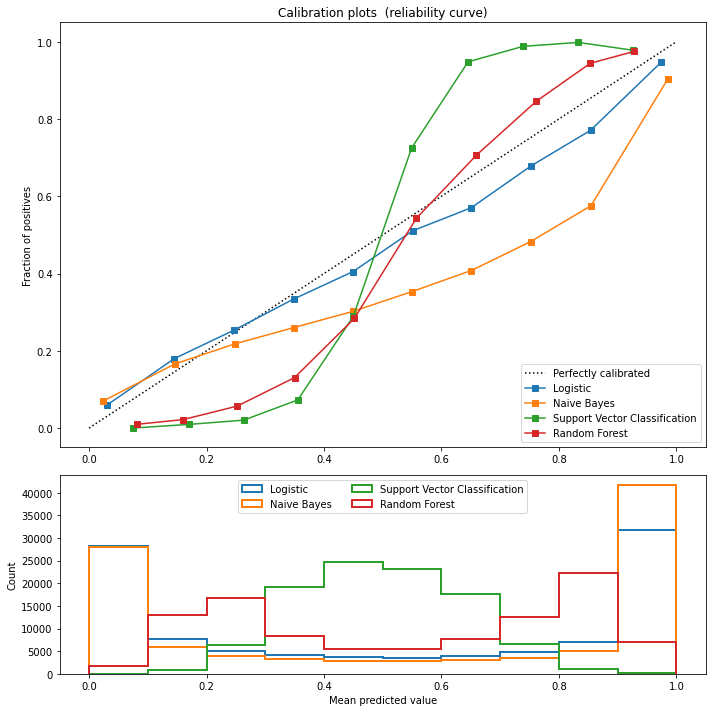

In [ ]:
print(__doc__)

# Author: Jan Hendrik Metzen <jhm@informatik.uni-bremen.de>
# License: BSD Style.

import numpy as np
np.random.seed(0)

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.calibration import calibration_curve

X, y = datasets.make_classification(n_samples=100000, n_features=20,
                                    n_informative=2, n_redundant=2)

train_samples = 100  # Samples used for training the models

X_train = X[:train_samples]
X_test = X[train_samples:]
y_train = y[:train_samples]
y_test = y[train_samples:]

# Create classifiers
lr = LogisticRegression()
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier()


# #############################################################################
# Plot calibration plots

plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))

ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
for clf, name in [(lr, 'Logistic'),
                  (gnb, 'Naive Bayes'),
                  (svc, 'Support Vector Classification'),
                  (rfc, 'Random Forest')]:
    clf.fit(X_train, y_train)
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)[:, 1]
    else:  # use decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = \
            (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, prob_pos, n_bins=10)

    ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
             label="%s" % (name, ))

    ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
             histtype="step", lw=2)

ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots  (reliability curve)')

ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
ax2.legend(loc="upper center", ncol=2)

plt.tight_layout()
plt.show()


In [ ]:
#dataset='complete_fin',accuracy_score=0.9999723535428935,fbeta_score_macro=0.999966325866723,fbeta_score_micro=0.9999723535428934,fbeta_score_weighted=0.9999723531805528
dataset='random_configurations_xgboost_through_mlr_118.csv',accuracy_score=0.9836600411240576,fbeta_score_macro=0.9742766556598902,fbeta_score_micro= 0.9836600411240576,fbeta_score_weighted=0.9835985409666033
dataset='Find_Under_weithed_childern_in_the_United_States_2018'
accuracy_score=0.9201725619486874,fbeta_score_macro=0.9201725619486874,
fbeta_score_micro=0.9201725619486874,fbeta_score_weighted= 0.8861892509679848
dataset='Crime_in_Los_Angeles_2010_2',accuracy_score=0.9978622368219495,fbeta_score_macro=0.8709321456759481,fbeta_score_micro=0.9978622368219495,fbeta_score_weighted=0.9964820135060094
dtatset='Astronomy_and_Astrophysics.csv',accuracy_score=0.9998873801402922,fbeta_score_macro= 0.9874155859521416,fbeta_score_micro=0.9998873801402922,fbeta_score_weighted= 0.9998872726570236
dataset='Flights.csv',accuracy_score=0.9993437089818114,fbeta_score_macro=0.9757230420466743,fbeta_score_micro=0.9993437089818114,fbeta_score_weighted= 0.9993187694124724
dataset2='US_Accidents_June20',accuracy_score=0.8971038859896209  ,fbeta_score_macro=0.7809589687806112,fbeta_score_micro= 0.8971038859896208,fbeta_score_weighted=0.893608098146291
dataset='Traffic_Violations_in_Maryland_County',accuracy_score=0.7656607861343238,,fbeta_score_macro=0.38934466891513847,fbeta_score_micro=0.7656607861343236,,fbeta_score_weighted=0.7392435536078773

In [ ]:
import pandas as pd
res1=[[0.98, 0.97,0.98,'dataset1']][0]
res2=[[0.92, 0.92,0.92,'dataset2']][0]
res3=[[0.99, 0.87,0.99,'dataset3']][0]
res4=[[0.78, 0.38,0.78,'dataset4']][0]
res5=[[0.89, 0.79,0.89,'dataset5']][0]
#res6=[[0.75, 0.76,'Random_RF_PT']][0]
#res7=[[0.91, 0.86,'Fine_No_PT']][0]
#res8=[[0.91, 0.87,'Manual_PT']][0]
#res9=[[0.92,0.88,'Automatic_PT']][0]
#res10=[[0.83,0.87,'OverFitting']][0]
res=[res1,res2,res3,res4,res5]#,res6,res7,res8,res9,res10]
df = pd.DataFrame(res, columns = ['accuracy_score', 'fbeta_score_macro','fbeta_score_micro', 'discription'])  
df = pd.melt(df, id_vars='discription', var_name='type')

In [ ]:
import logging, sys
logging.disable(sys.maxsize)
import seaborn as sns
import matplotlib.pyplot as plt
import pylab as plt
sns.set(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(18, 8))
g = sns.factorplot(x='discription',y='value' ,hue='type',data=df, kind="bar",size=6, palette="muted",legend=False,ax=ax1)
sns.despine(fig)
plt.legend(loc='upper left')
plt.grid(True)
ax=g.ax
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', rotation=90, xytext=(0, 20),
                 textcoords='offset points')  
plt.close(2)

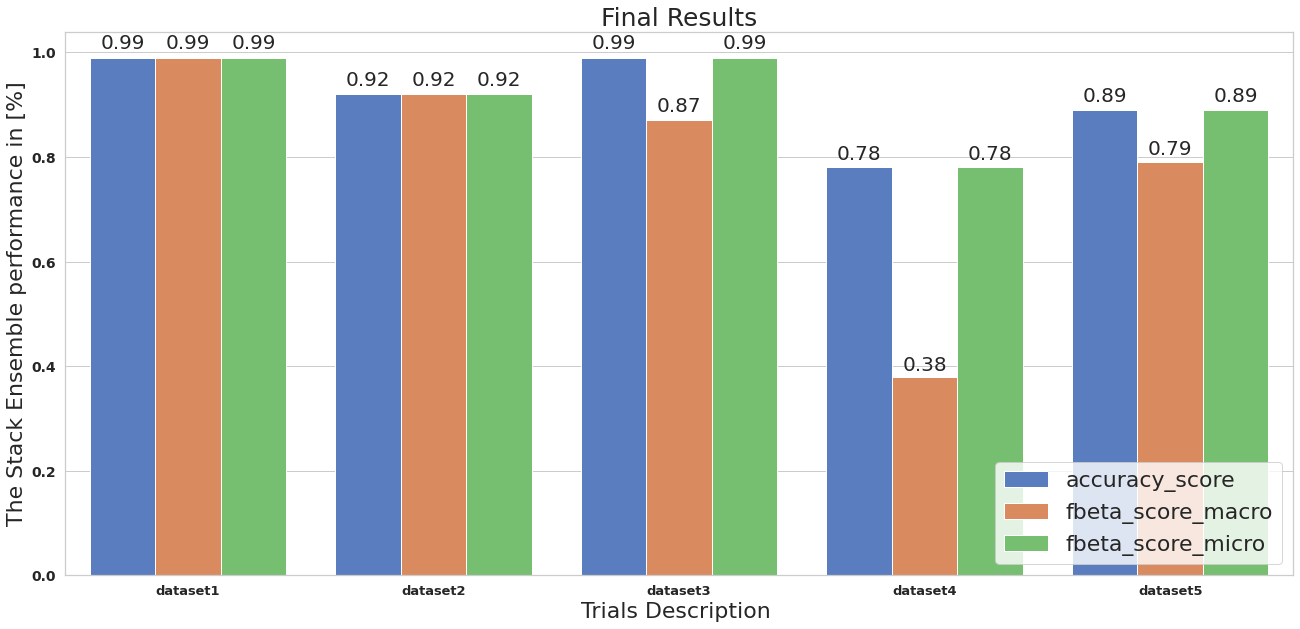

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
fig, ax1 = plt.subplots(figsize=(22, 10))
ax = sns.barplot(x='discription',y='value' ,hue='type',data=df,  palette=sns.color_palette("muted", n_colors=7, desat=1),ax=ax1)
def autolabel(rects, labels=None, height_factor=1.05):
    for i, rect in enumerate(rects):
        height = rect.get_height()
        if labels is not None:
            try:
                label = labels[i]
            except (TypeError, KeyError):
                label = ' '
        else:
            label = '%d' % int(height)
        ax.text(rect.get_x() + rect.get_width()/2., height_factor*height,
                '{}'.format(label),
                ha='center', va='bottom' ,fontsize=20)

plt.legend(loc='lower right',fontsize=22)
autolabel(ax.patches, labels=df['value'].apply(lambda x: round(x, 4)), height_factor=1.01)   
plt.ylabel('The Stack Ensemble performance in [%]', fontsize=22)
plt.xlabel('Trials Description ', fontsize=22)
plt.title('Final Results',fontsize=25) 
plt.xticks(fontsize=13)
plt.yticks(fontsize=14)
plt.setp(ax.get_xticklabels(), fontweight="bold")
plt.setp(ax.get_yticklabels(), fontweight="bold")
plt.show()
plt.savefig('Final_Results.JPEG',dpi=1600, bbox_inches='tight',edgecolors='b')

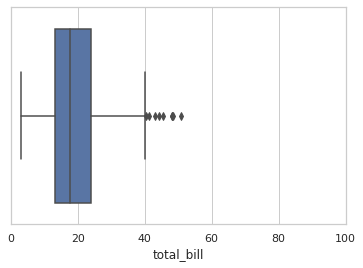

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
tips = sns.load_dataset("tips")

# Create the boxplot
ax = sns.boxplot(x="total_bill", data=tips)

# Set the `xlim`
ax.set(xlim=(0, 100))

# Show the plot
plt.show()

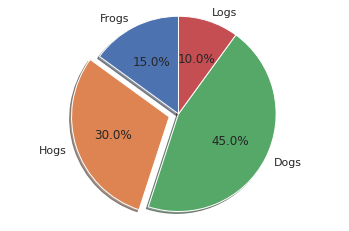

In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [ ]:
!pip install feature-selector

     |████████████████████████████████| 12.4MB 4.0MB/s 
     |████████████████████████████████| 15.0MB 254kB/s 
     |████████████████████████████████| 716kB 9.6MB/s 
     |████████████████████████████████| 184kB 24.5MB/s 
     |████████████████████████████████| 11.8MB 2.7MB/s 
     |████████████████████████████████| 12.2MB 4.4MB/s 
  Created wheel for seaborn: filename=seaborn-0.8.1-cp36-none-any.whl size=184834 sha256=a287d87ad9c131a6969c07c502c3a706f0b9698e6419c9cb51a9397863302a6b
  Stored in directory: /root/.cache/pip/wheels/26/0a/44/53ddd89769e62f7c6691976375b86c6492e7dd20a2d3970e32
Successfully built seaborn
ERROR: yellowbrick 0.9.1 has requirement scikit-learn>=0.20, but you'll have scikit-learn 0.19.1 which is incompatible.
ERROR: xarray 0.15.1 has requirement numpy>=1.15, but you'll have numpy 1.14.5 which is incompatible.
ERROR: xarray 0.15.1 has requirement pandas>=0.25, but you'll have pandas 0.23.1 which is incompatible.
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17

In [ ]:
pip install openml

     |████████████████████████████████| 163kB 3.4MB/s 
  Created wheel for openml: filename=openml-0.10.2-cp36-none-any.whl size=190320 sha256=cd5742a12058b45578f8b536ef9cb5edeea13f6169082eaa5f4013696d1b13ae
  Stored in directory: /root/.cache/pip/wheels/71/ec/5f/aaad9e184680b0b8f1a02ff0ec640cace5adf5bff7bb0af1b4
  Created wheel for liac-arff: filename=liac_arff-2.5.0-cp36-none-any.whl size=11734 sha256=d3406155a3905990f35f57ef22a85b695bdf0453e3c0bf6c4e7ff578ee4eaa50
  Stored in directory: /root/.cache/pip/wheels/77/8d/b4/8bfce5beea9a3496cc15b24961876adb7b6e2912ff09164179
Successfully built openml liac-arff


In [ ]:
import openml
import pandas as pd

openml.config.apikey = "1f583f68a994ee6519f537da8ba063c9" # it is some fake API key, please set your key here!

dataset_id2 = 122  # Adults data set, see https://www.openml.org/d/1590

# get data directly fom openml
dataset2 = openml.datasets.get_dataset(dataset_id2)
X2, y2, categorical_indicator, attribute_names = dataset2.get_data(
    dataset_format='dataframe',
    target=dataset2.default_target_attribute
)
data16 = pd.DataFrame(X2, columns=attribute_names)
data16['target'] = y2
data16.head()

surgery    Age  ...   outcome target
0      no  adult  ...     lived     no
1     yes  adult  ...     lived    yes
2     yes  young  ...      died    yes
3      no  adult  ...     lived     no
4     yes  adult  ...     lived    yes

[5 rows x 23 columns]

In [ ]:
len(data16.columns),data16.columns[:22],data16.columns

0 features with greater than 0.20 missing values.



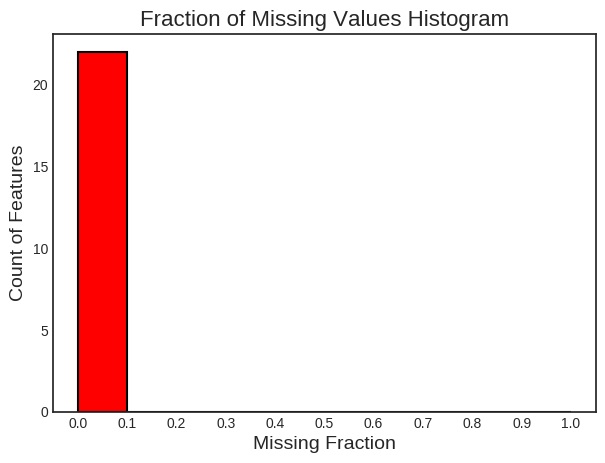

In [ ]:
from feature_selector import FeatureSelector
X = data16.iloc[:,0:22]  #independent columns
y = data16.iloc[:,-1]
# Features are in train and labels are in train_labels
fs = FeatureSelector(data = X , labels = list(data16.columns[:22]))
fs.identify_missing(missing_threshold = 0.2)
missing_features = fs.ops['missing']
fs.plot_missing()

In [ ]:
fs.missing_stats

missing_fraction
surgery                                   0.0
Age                                       0.0
abdomcentesis_total_protein               0.0
abdominocentesis_appearance               0.0
total_protein                             0.0
packed_cell_volume                        0.0
abdomen                                   0.0
rectal_examination                        0.0
nasogastric_reflux_PH                     0.0
nasogastric_reflux                        0.0
nasogastric_tube                          0.0
abdominal_distension                      0.0
peristalsis                               0.0
pain                                      0.0
capillary_refill_time                     0.0
mucous_membranes                          0.0
peripheral_pulse                          0.0
temp_extremities                          0.0
respiratory_rate                          0.0
pulse                                     0.0
rectal_temperature                        0.0
outcome                                   0.0

In [ ]:
missing_features = fs.ops['missing']
missing_features

[]

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
correleation_matrix = data16.corr()
plt.figure(figsize=(18,18))
color = plt.get_cmap('RdYlGn')   # default color
color.set_bad('lightblue')  
sns.heatmap(correleation_matrix, cbar=True, square= True,fmt='.1f', annot=True, annot_kws={'size':8}, cmap=color)

ValueError: ignored

In [ ]:
fs.identify_collinear(correlation_threshold = 0.85)
# list of collinear features to remove
collinear_features = fs.ops['collinear']
# dataframe of collinear features
fs.record_collinear

0 features with a correlation magnitude greater than 0.85.



Empty DataFrame
Columns: [drop_feature, corr_feature, corr_value]
Index: []

In [ ]:
number_columns=data16.select_dtypes(include=[np.number]).columns
categorical_columns=data16.select_dtypes(include=['category']).columns

In [ ]:
categorical_columns

Index(['surgery', 'Age', 'rectal_temperature', 'pulse', 'respiratory_rate',
       'temp_extremities', 'peripheral_pulse', 'mucous_membranes',
       'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distension',
       'nasogastric_tube', 'nasogastric_reflux', 'nasogastric_reflux_PH',
       'rectal_examination', 'abdomen', 'packed_cell_volume', 'total_protein',
       'abdominocentesis_appearance', 'abdomcentesis_total_protein', 'outcome',
       'target'],
      dtype='object')

In [ ]:
count_unique1=[]
for i in range(len(data16.columns)):
  if (data16[data16.columns[i]].nunique())<=7  :
     count_unique1.append([data16.columns[i],(data16[data16.columns[i]].nunique())])
                          
uu=[]
for i in range(len(count_unique1)):
  uu.append(count_unique1[i][0])
s1=[x for x in categorical_columns if x in uu]  

In [ ]:
catorical_col=data16.select_dtypes(include='category')
s1=[x for x in catorical_col if x in uu] 
s1

In [ ]:
import category_encoders as ce
X = data16.iloc[:,:-1]  #independent columns
y=data16.iloc[:,-1]
ce_ord = ce.ordinal.OrdinalEncoder(cols = s1)
data2=ce_ord.fit_transform(X, y)
data2[data16.columns[-1]]=data16.iloc[:,-1]

In [ ]:
 from sklearn.preprocessing import LabelEncoder
 labelencoder = LabelEncoder()
 data16[data16.columns[-1]] = labelencoder.fit_transform(data16[data16.columns[-1]]) 

In [ ]:
import category_encoders as ce
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
CatBoostEncoder=ce.CatBoostEncoder(cols=categorical_columns)
data2 = CatBoostEncoder.fit_transform(X, y)
data2['Target']=data16.iloc[:,-1]

In [ ]:
data2.dtypes

surgery                        int64
Age                            int64
rectal_temperature             int64
pulse                          int64
respiratory_rate               int64
temp_extremities               int64
peripheral_pulse               int64
mucous_membranes               int64
capillary_refill_time          int64
pain                           int64
peristalsis                    int64
abdominal_distension           int64
nasogastric_tube               int64
nasogastric_reflux             int64
nasogastric_reflux_PH          int64
rectal_examination             int64
abdomen                        int64
packed_cell_volume             int64
total_protein                  int64
abdominocentesis_appearance    int64
abdomcentesis_total_protein    int64
outcome                        int64
target                         int64
dtype: object

In [ ]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMRegressor


X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.20, random_state=314 )

lgbc=LGBMRegressor(n_estimators=40, learning_rate=0.05, num_leaves=27, colsample_bytree=0.2,reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median')
embeded_lgb_selector.fit(X2, y2)
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

5 selected features


In [ ]:
pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':list(data16.columns[:22]), 'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
LightGBM1=pd.Series(list(feature_selection_df['LightGBM']),index=feature_selection_df['Feature'])
Random_Forest1=pd.Series(list(feature_selection_df['Random Forest']),index=feature_selection_df['Feature'])
Random_Forest2=pd.Series(Random_Forest1).where(lambda x : x!=False).dropna()
Random_Forest3=list(Random_Forest2.index)
LightGBM2=pd.Series(LightGBM1).where(lambda x : x!=False).dropna()
LightGBM3=list(LightGBM2.index)
col_final=list(set(Random_Forest3).union(LightGBM3))

In [ ]:
col_final

['abdomen',
 'peristalsis',
 'surgery',
 'abdominocentesis_appearance',
 'pulse',
 'peripheral_pulse',
 'outcome',
 'abdominal_distension',
 'mucous_membranes',
 'pain',
 'nasogastric_reflux_PH',
 'rectal_examination']

In [ ]:
# Feature Selection with Univariate Statistical Tests
from pandas import read_csv
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load data
# feature extraction
test = SelectKBest(score_func=f_classif, k=22)
fit = test.fit(X2, y2)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X2)
# summarize selected features
print(features[0:22,:])

[5.976e+05 2.118e+03 2.281e+01 1.346e+04 1.060e+04 3.247e+04 6.363e+04
 2.552e+04 7.849e+03 1.298e+05 8.834e+04 8.359e+04 2.932e+02 3.651e+04
 1.766e+02 3.192e+04 1.016e+05 2.371e+04 9.537e+03 5.192e+04 9.608e+01
 3.570e+04]
[[2 1 2 2 1 4 4 6 3 3 2 1 2 1 2 4 2 3 1 2 1 1]
 [1 1 2 1 1 1 1 1 1 2 2 2 3 1 2 3 4 2 3 1 1 1]
 [1 2 2 2 2 3 1 2 3 5 4 2 2 1 2 4 5 2 1 2 1 2]
 [2 1 2 1 1 4 3 3 1 3 1 2 1 1 2 4 5 3 1 2 1 1]
 [1 1 2 1 1 1 1 3 1 3 3 1 2 1 2 4 5 2 1 2 2 1]
 [2 1 1 2 1 4 1 4 2 5 4 2 1 3 1 4 5 1 2 2 1 1]
 [2 1 2 1 1 1 1 1 1 3 3 1 2 1 2 3 5 2 1 2 1 1]
 [2 1 2 1 1 1 1 1 1 1 3 2 2 1 2 4 5 3 1 2 1 1]
 [2 1 2 2 1 4 1 3 1 3 3 2 2 1 2 4 3 2 1 2 1 1]
 [1 1 2 1 1 1 1 1 1 3 3 1 1 1 2 4 5 2 1 2 1 1]
 [2 1 2 1 1 3 1 3 1 2 2 1 2 1 2 1 5 2 1 1 1 1]
 [2 1 2 1 1 1 1 3 1 1 3 1 3 1 2 4 5 2 3 2 1 1]
 [1 1 2 1 1 3 3 1 1 3 4 4 1 1 2 3 5 2 3 2 1 1]
 [1 1 2 1 1 3 1 2 2 2 3 1 1 1 2 4 5 2 1 3 1 1]
 [2 1 2 1 1 1 1 3 1 3 3 1 1 1 2 4 1 2 1 1 1 1]
 [1 1 2 1 1 1 1 3 1 5 4 4 1 1 2 4 5 3 1 2 1 2]
 [2 1 2 1 1 3 3 3 1 3 3

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

X2 = data2.iloc[:,:-1]  #independent columns
y2=data2.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.20, random_state=314 )

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=25), threshold='1.25*median')
embeded_rf_selector.fit(X2, y2)
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X2.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

9 selected features


In [ ]:
feature_selection_df

Feature  Random Forest  LightGBM  Total
1              mucous_membranes           True      True      2
2                       abdomen           True      True      2
3                       surgery           True     False      1
4            rectal_examination          False      True      1
5                         pulse          False      True      1
6                   peristalsis           True     False      1
7              peripheral_pulse           True     False      1
8                          pain           True     False      1
9                       outcome           True     False      1
10        nasogastric_reflux_PH          False      True      1
11  abdominocentesis_appearance           True     False      1
12         abdominal_distension           True     False      1
13                total_protein          False     False      0
14             temp_extremities          False     False      0
15             respiratory_rate          False     False      0
16           rectal_temperature          False     False      0
17           packed_cell_volume          False     False      0
18             nasogastric_tube          False     False      0
19           nasogastric_reflux          False     False      0
20        capillary_refill_time          False     False      0
21  abdomcentesis_total_protein          False     False      0
22                          Age          False     False      0

[0.39  0.009 0.014 0.024 0.018 0.023 0.02  0.034 0.017 0.065 0.031 0.048
 0.023 0.017 0.02  0.024 0.064 0.018 0.026 0.023 0.012 0.079]


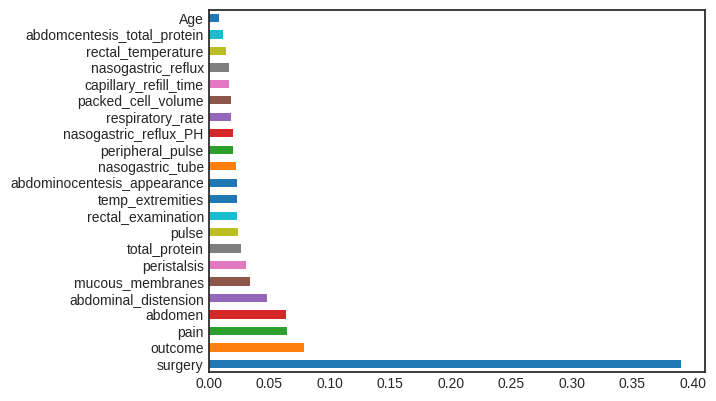

In [ ]:
import pandas as pd
import numpy as np

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model1 = ExtraTreesRegressor()
model1.fit(X2,y2)
print(model1.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances2 = pd.Series(model1.feature_importances_, index=X2.columns)
feat_importances2.nlargest(22).plot(kind='barh')
plt.show()

In [ ]:
feat_importances2

surgery                        0.390213
Age                            0.008960
rectal_temperature             0.014190
pulse                          0.024238
respiratory_rate               0.018436
temp_extremities               0.023304
peripheral_pulse               0.020460
mucous_membranes               0.033888
capillary_refill_time          0.016607
pain                           0.064834
peristalsis                    0.031095
abdominal_distension           0.048402
nasogastric_tube               0.022681
nasogastric_reflux             0.016589
nasogastric_reflux_PH          0.019933
rectal_examination             0.023818
abdomen                        0.064039
packed_cell_volume             0.018122
total_protein                  0.026481
abdominocentesis_appearance    0.023262
abdomcentesis_total_protein    0.011590
outcome                        0.078856
dtype: float64